In [1]:
from NeuralNetwork import NeuralNetwork, VGG1, FC, VGG, VGG16
from Dataset import Dataset, SPIRAL, MOON, CIRCLE
from NeuroEvolution import NeuroEvolution
from tensorflow import keras
from Representation import Function, PAU
from Activation import PANGAEA_Activation, Pade_Activation_Unit
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import random


In [2]:
exp_df = pd.DataFrame(columns=['activation', 'data', 'validation', 'test', 'epoch time'])


In [30]:
#exp_df = pd.DataFrame(columns=['activation', 'validation', 'test', 'training time', 'inference time'])
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
num_classes = 10
input_shape = (28, 28, 1)
#input_shape = (32, 32, 3)
mnist_dataset = Dataset(X_train, y_train, X_test, y_test, num_classes, input_shape, 
                        expand=False, label_noise=0, training_split=.8)

input_shape = (2)

spiral_dataset = SPIRAL(10000, 1, input_shape)
circle_dataset = CIRCLE(10000, 0.02, input_shape, training_split=.8)
moon_dataset = MOON(10000, 0.1, input_shape)

neurons = 50
layers = 2
blocks = 3

nn = FC(mnist_dataset, layers, neurons)

rep =5
metric = keras.metrics.CategoricalAccuracy()
loss_noise = 0.
activation_noise = 0.0
input_noise = 0.
gradient_noise =  0.
weight_noise = 0.
label_smoothing = 0.31856776514618423
gradient_dropout = 0.38075869709100446
dropout = 0.
drop_connect = 0.
batch_size = 64
double_batch_on = .01
drnn = 0.
weight_std = 0.0753562582308603
verbose = 1
epochs = 50
iterations = 100000000
patience = np.inf
save_best = False
sleep = 0.
cut_threshold = 0.12
max_batch = len(nn.dataset.X_train)
max_batch = 1024
random_flip=0
random_rotation=0.
random_zoom=0.
random_translation=0.
random_contrast=0.
shuffle = 1




nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, label_smoothing, shuffle,
              random_flip, random_rotation, random_zoom, random_translation, random_contrast,
              metric, epochs, iterations, patience, verbose=verbose,
              max_batch=max_batch, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
nn.create_model()


1


In [31]:
import copy
w1 = copy.copy(nn.model.get_weights())
for weight in w1:
    print(weight)

[[-0.12337524 -0.00623863  0.04554757 ... -0.05140733  0.10449755
  -0.12210853]
 [-0.03011485 -0.10771544  0.05433053 ...  0.00829872 -0.05773077
  -0.0505094 ]
 [-0.22912768 -0.02255934  0.04982046 ...  0.04510226 -0.12815954
   0.100715  ]
 ...
 [-0.07740075  0.04511164 -0.02685938 ...  0.05862475  0.01374329
  -0.09821535]
 [-0.02699246  0.1659423   0.11470564 ... -0.04535792  0.00836569
  -0.07400829]
 [ 0.03455423  0.07713357 -0.14723268 ... -0.00568314  0.06218418
  -0.10679291]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[[-0.06168376  0.03712392 -0.07774844 ...  0.00860647 -0.00982051
   0.00962132]
 [ 0.00152385  0.00347408  0.01387014 ... -0.00386793  0.00143839
   0.01602043]
 [ 0.13348714  0.03212782  0.0717394  ... -0.07378227  0.01825922
   0.13825296]
 ...
 [ 0.08715732 -0.13163398  0.00896834 ... -0.1928222  -0.07113712
  -0.06989064]
 [ 0.05422914 -0.05495273

In [32]:
nn.fit()


Start of epoch 0
cuurent batch: 64
Training acc: 0.8712
Validation acc: 0.9401
Time taken: 2.31s
Patience:  1

Start of epoch 1
cuurent batch: 128
Training acc: 0.9465
Validation acc: 0.9545
Time taken: 1.37s
Patience:  1

Start of epoch 2
cuurent batch: 256
Training acc: 0.9579
Validation acc: 0.9586
Time taken: 1.03s
Patience:  1

Start of epoch 3
cuurent batch: 512
Training acc: 0.9636
Validation acc: 0.9633
Time taken: 0.89s
Patience:  1

Start of epoch 4
cuurent batch: 1024
Training acc: 0.9684
Validation acc: 0.9649
Time taken: 0.76s
Patience:  1

Start of epoch 5
cuurent batch: 1024
Training acc: 0.9708
Validation acc: 0.9657
Time taken: 0.72s
Patience:  1

Start of epoch 6
cuurent batch: 1024
Training acc: 0.9728
Validation acc: 0.9681
Time taken: 0.77s
Patience:  1

Start of epoch 7
cuurent batch: 1024
Training acc: 0.9749
Validation acc: 0.9685
Time taken: 0.67s
Patience:  1

Start of epoch 8
cuurent batch: 1024
Training acc: 0.9765
Validation acc: 0.9700
Time taken: 0.67s
P

In [31]:
import copy
w1 = copy.copy(nn.model.get_weights())
for weight in w1:
    print(weight)

[[[[ 0.0276777  -0.02256063 -0.05106863 -0.14192767  0.0096819
    -0.3436318   0.08051868 -0.04177501 -0.10381187  0.04841803
     0.09503289 -0.08970008 -0.113644   -0.09914663  0.14362083
    -0.03524767 -0.091993   -0.14725497 -0.19701117 -0.08339674
    -0.02305211 -0.09006342 -0.09758962 -0.10568368  0.10029408
     0.00741655 -0.09073294 -0.17684864 -0.06787828 -0.0104265
    -0.00356569  0.05790197]
   [ 0.00717218 -0.14469688 -0.05278274 -0.07907937 -0.17888169
    -0.4021251  -0.07132412 -0.23593394 -0.03850343 -0.11759902
     0.15522152 -0.01135897 -0.06013859 -0.12523903 -0.05494229
    -0.12953     0.00792718 -0.17152154 -0.06795736  0.17315908
    -0.14637603 -0.11736128 -0.11277536  0.07595976 -0.11683758
    -0.0429405   0.04182075 -0.12624253 -0.11056238 -0.01382635
     0.03711172  0.01334841]
   [-0.19432342 -0.01007429 -0.13940692  0.04618582 -0.06620552
    -0.34808448 -0.02817472 -0.04091093  0.02537138 -0.06766032
     0.1650906   0.1874854   0.07358059 -0.03743

ValueError: x must have 2 or fewer dimensions

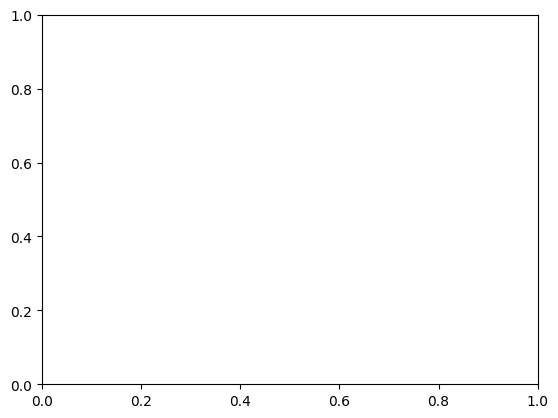

In [14]:
flat_list = [item for sublist in w1 for item in sublist]
plt.hist(flat_list, bins=50)
plt.show()

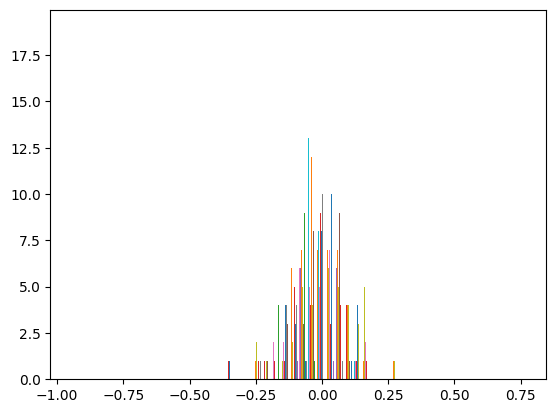

In [40]:
flat_list = [item for sublist in w1 for item in sublist]
plt.hist(flat_list, bins=50)
plt.show()

In [13]:
for weights in w1:
    print(len(weights))

3
32
3
32
3
64
3
64
3
128
3
128
1152
128
128
10


In [33]:
row = [ nn.test_score, nn.training_time, nn.inference_time]

print(row)
    

[0.9750000238418579, 42.43860340118408, 0.5354585647583008]


In [34]:
score_test = nn.model.evaluate(nn.dataset.X_test, nn.dataset.y_test, verbose=0)
nn.test_score = score_test[1]
nn.test_loss = score_test[0]

In [35]:
score_test

[1.2831844091415405, 0.9750000238418579]

In [9]:
nn.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 28, 28, 1)        0         
 se)                                                             
                                                                 
 drop_connect (DropConnect)  (None, 28, 28, 32)        320       
                                                                 
 noisy_re_lu (NoisyReLU)     (None, 28, 28, 32)        0         
                                                                 
 drop_connect_1 (DropConnect  (None, 28, 28, 32)       9248      
 )                                                               
                                                                 
 noisy_re_lu_1 (NoisyReLU)   (None, 28, 28, 32)        0     

In [45]:
nn.batch_size = 1024

In [36]:
from Swarm import Star, Swarm
import numpy as np
import copy 
np.set_printoptions(suppress=True)

exp_df = pd.DataFrame(columns=['method', 'loss', 'activation', 'input', 'gradient noise', 'weight', 
                               'gradient dropout', 'dropout', 
           'dropconnect', 'batch', 'increase batch' , 'drnn', 'init', 'label smoothing',
                               'shuffle', 'test'])


methods = ['loss', 'activation', 'input', 'gradient noise', 'weight', 'gradient dropout', 'dropout', 
           'dropconnect', 'batch', 'increase batch' , 'drnn', 'init', 'label smoothing',
          'shuffle']

default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0, 0.0]


for _ in range(5):

    
            fitness = NeuroEvolution.evaluate(default_settings, [nn], test_time=True)[0]
            row = []
            row .append('default')
            for value in default_settings:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()

50

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 50 , drnn: 0.0 , weight_std: 0.05 , random_flip: 0 , random_rotation: 0.0 , random_zoom: 0.0 , random_translation: 0.0 , random_contrast: 0.0 , shuffle: 0.0

Start of epoch 0
cuurent batch: 32
Training acc: 0.8947
Validation acc: 0.9291
Time taken: 4.22s
Patience:  1

Start of epoch 1
cuurent batch: 32
Training acc: 0.9431
Validation acc: 0.9498
Time taken: 3.83s
Patience:  1

Start of epoch 2
cuurent batch: 32
Training acc: 0.9576
Validation acc: 0.9578
Time taken: 3.92s
Patience:  1

Start of epoch 3
cuurent batch: 32
Training acc: 0.9675
Validation acc: 0.9625
Time taken: 3.86s
Patience:  1

Start of epoch 4
cuurent batch: 32
Training acc: 0.9736
Validation acc: 0.9662
Time taken: 3.90s
Patience:  1

Start of epoch 5
cuurent batch: 32


KeyboardInterrupt: 

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9597499966621399 0.9559999704360962
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9557499885559082 0.9550999999046326
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9557499885559082 0.954800009727478
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

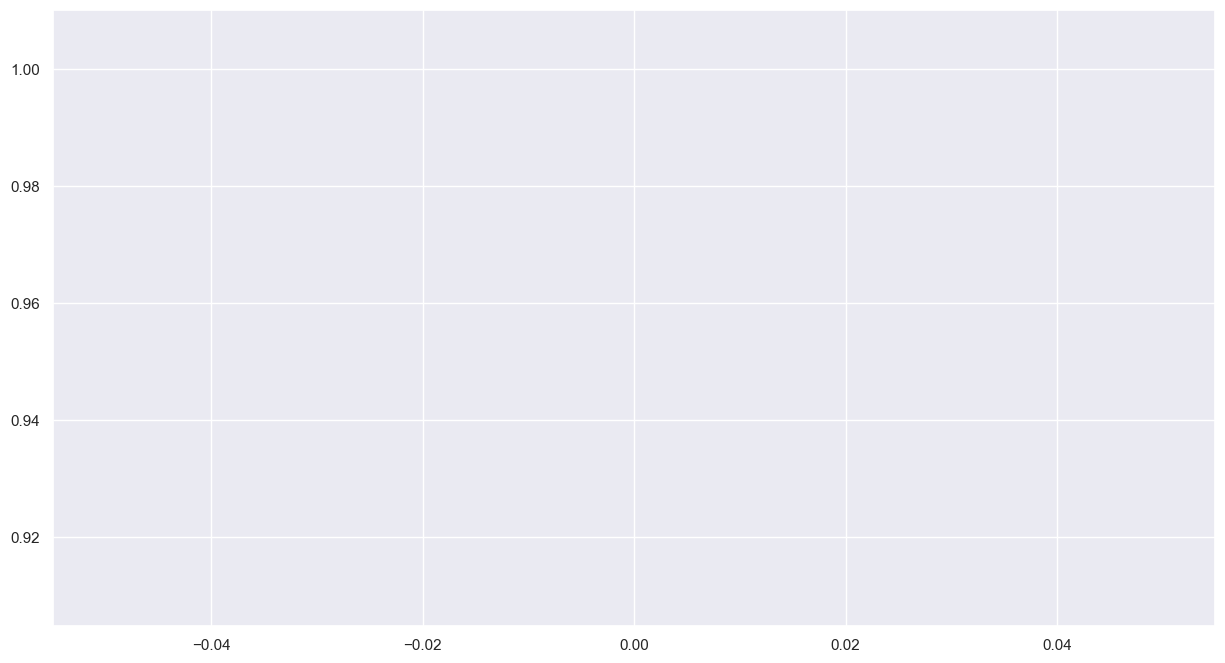

20

loss_noise: 0.1111111111111111 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9568333625793457 0.9570000171661377
20

loss_noise: 0.1111111111111111 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9544166922569275 0.9556000232696533
20

loss_noise: 0.1111111111111111 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9556666612625122 0.9527999758720398
20

loss_noise: 0.1111111111111111 , activation_noise: 0.0 , inp

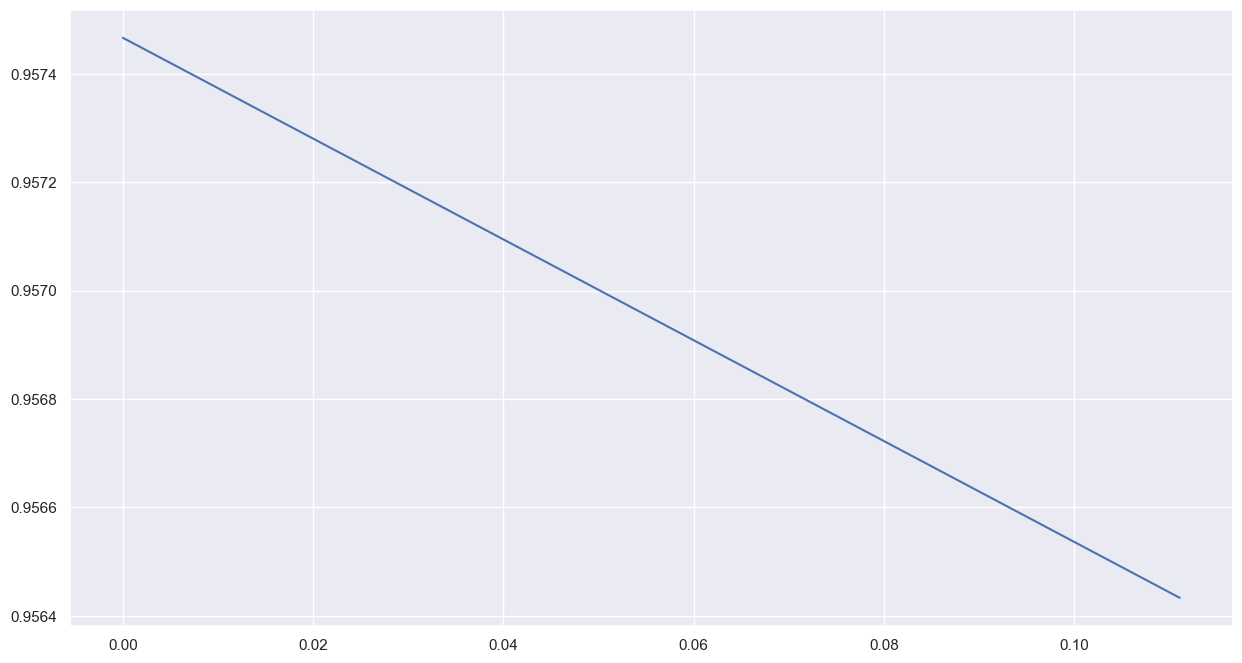

20

loss_noise: 0.2222222222222222 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9547500014305115 0.9527999758720398
20

loss_noise: 0.2222222222222222 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9575833082199097 0.9575999975204468
20

loss_noise: 0.2222222222222222 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9565833210945129 0.9545000195503235
20

loss_noise: 0.2222222222222222 , activation_noise: 0.0 , inp

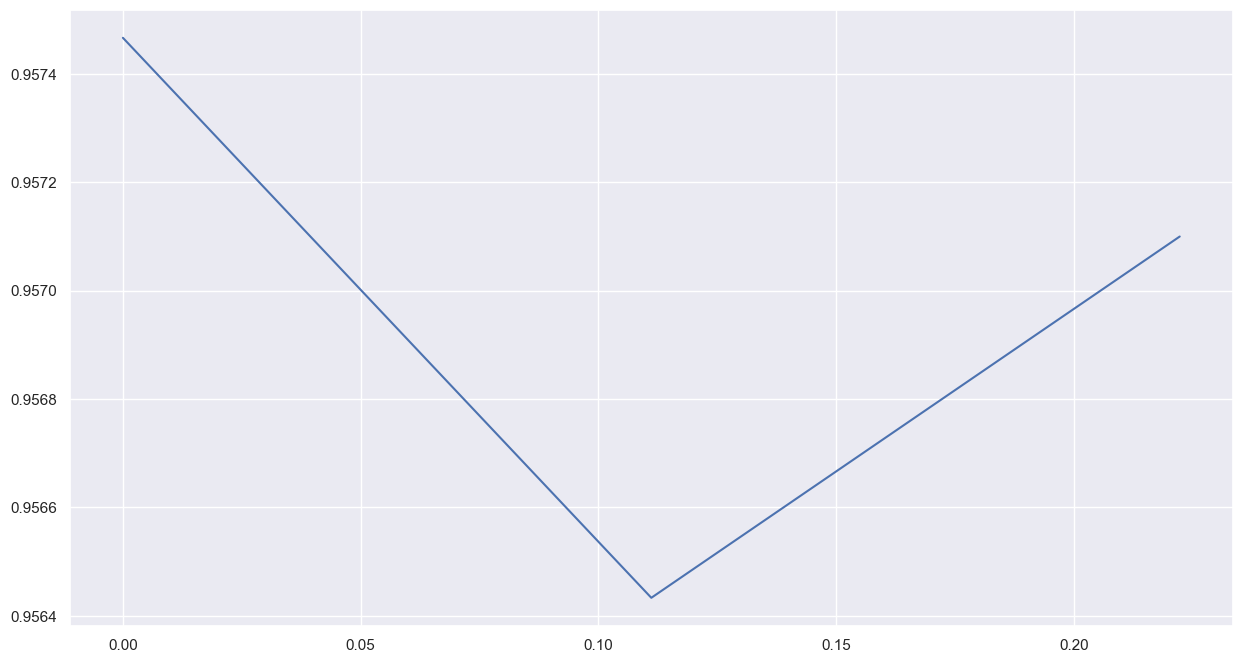

20

loss_noise: 0.3333333333333333 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9591666460037231 0.9560999870300293
20

loss_noise: 0.3333333333333333 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956250011920929 0.9520999789237976
20

loss_noise: 0.3333333333333333 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570000171661377 0.9556000232696533
20

loss_noise: 0.3333333333333333 , activation_noise: 0.0 , inpu

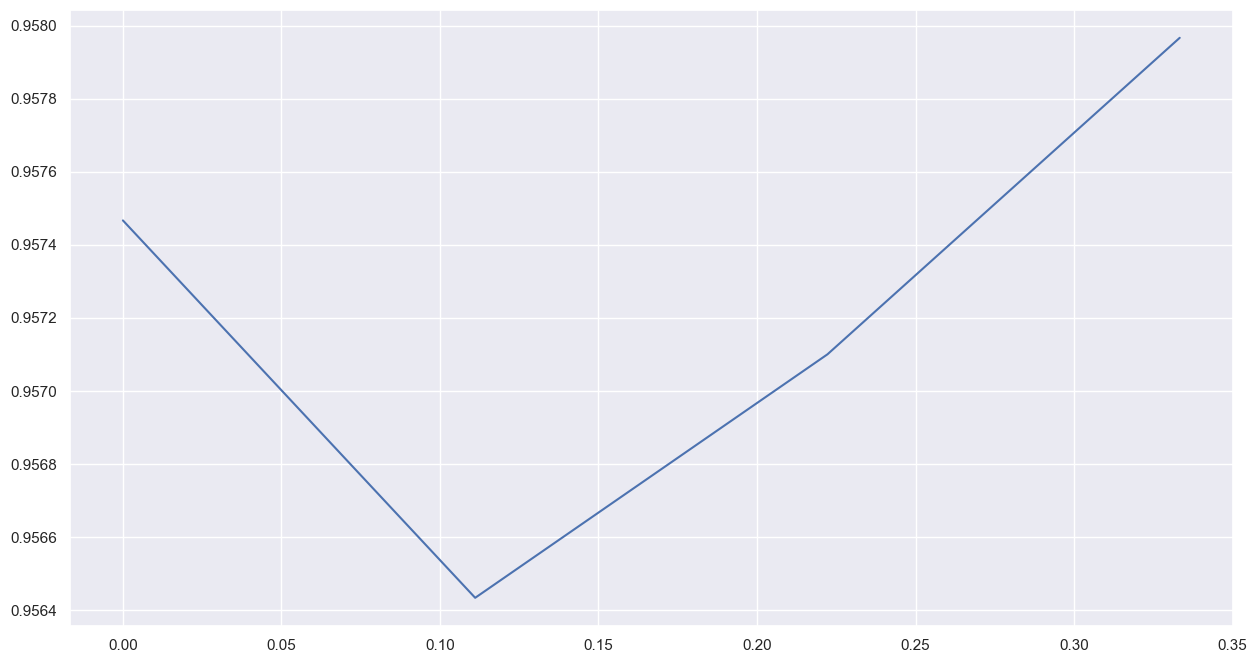

20

loss_noise: 0.4444444444444444 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9568333625793457 0.9563999772071838
20

loss_noise: 0.4444444444444444 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.955299973487854
20

loss_noise: 0.4444444444444444 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9558333158493042 0.9557999968528748
20

loss_noise: 0.4444444444444444 , activation_noise: 0.0 , inpu

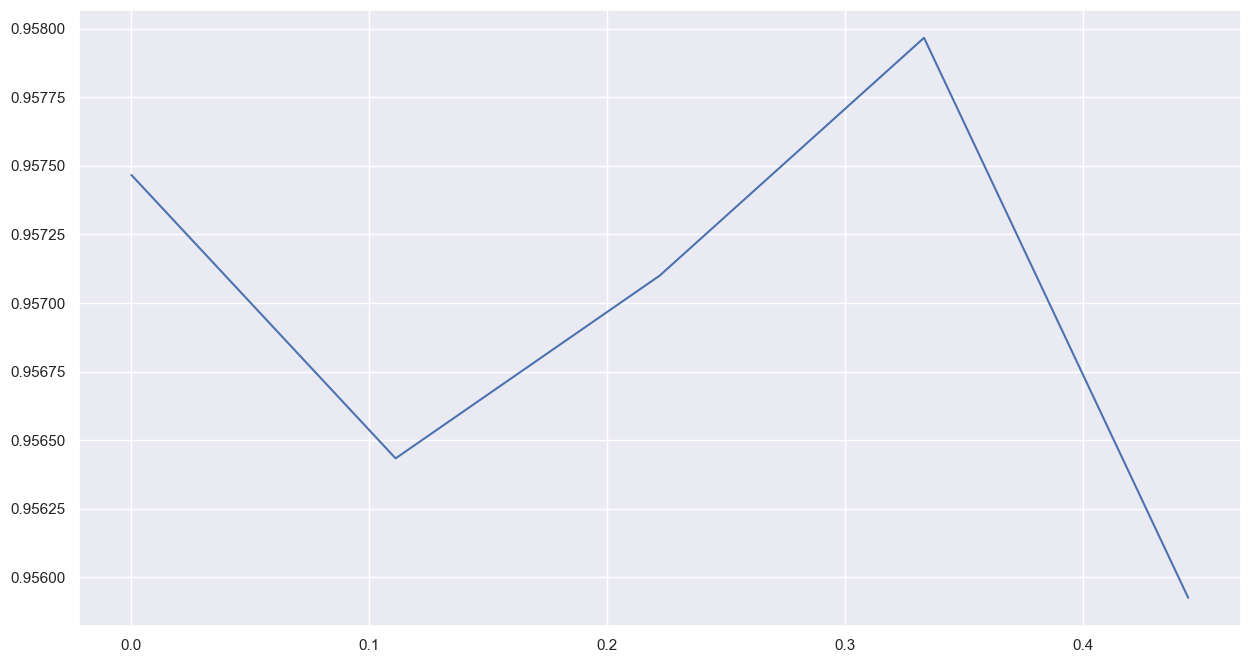

20

loss_noise: 0.5555555555555556 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9557499885559082 0.955299973487854
20

loss_noise: 0.5555555555555556 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9577500224113464 0.9545999765396118
20

loss_noise: 0.5555555555555556 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9558333158493042 0.9546999931335449
20

loss_noise: 0.5555555555555556 , activation_noise: 0.0 , inpu

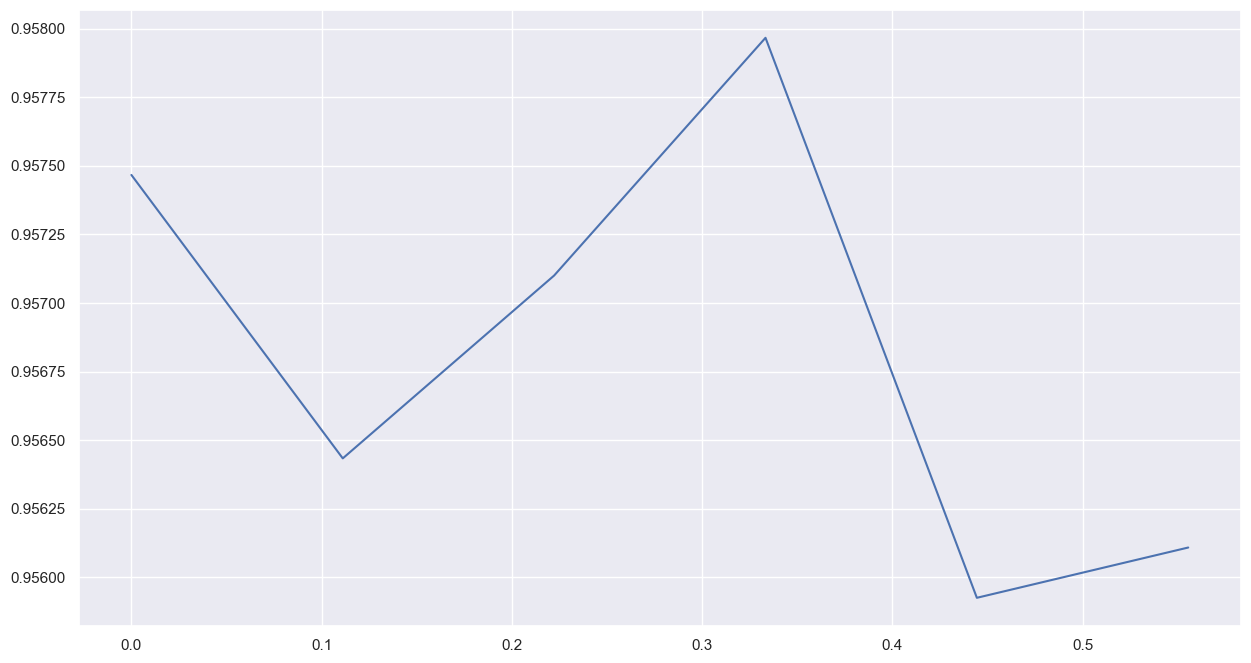

20

loss_noise: 0.6666666666666666 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9543333053588867 0.9553999900817871
20

loss_noise: 0.6666666666666666 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9521666765213013 0.9513999819755554
20

loss_noise: 0.6666666666666666 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549166560173035 0.9531999826431274
20

loss_noise: 0.6666666666666666 , activation_noise: 0.0 , inp

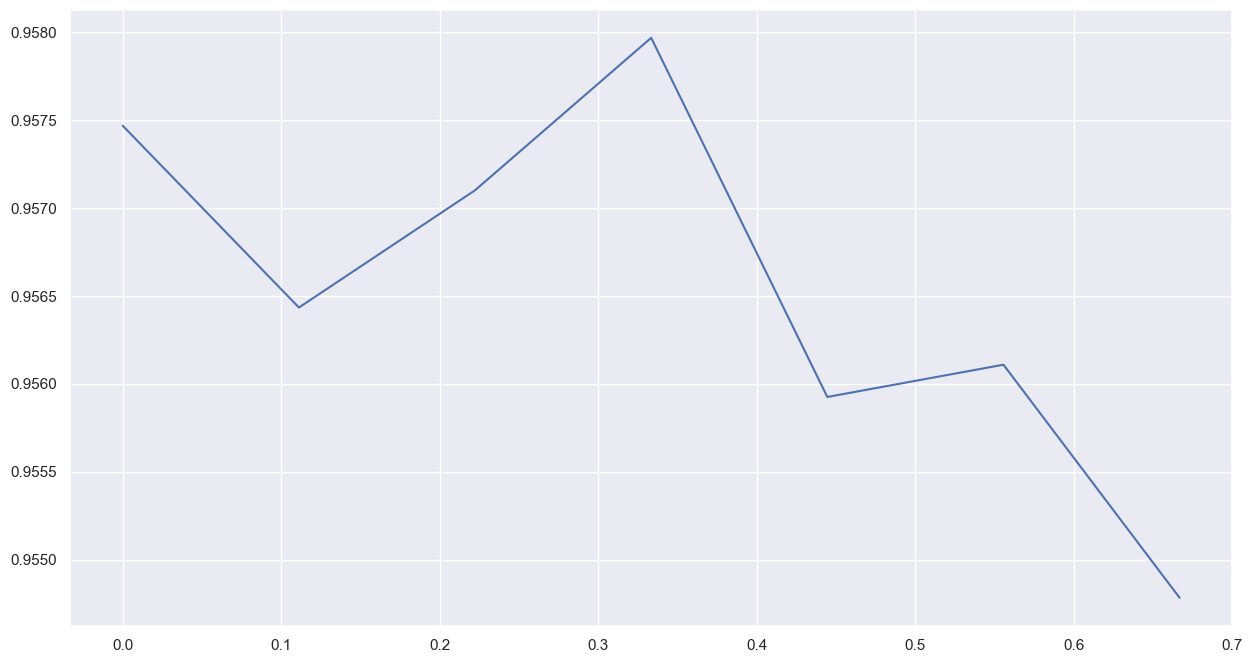

20

loss_noise: 0.7777777777777777 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.95291668176651 0.9485999941825867
20

loss_noise: 0.7777777777777777 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9545000195503235 0.9527999758720398
20

loss_noise: 0.7777777777777777 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9538333415985107 0.9538999795913696
20

loss_noise: 0.7777777777777777 , activation_noise: 0.0 , input

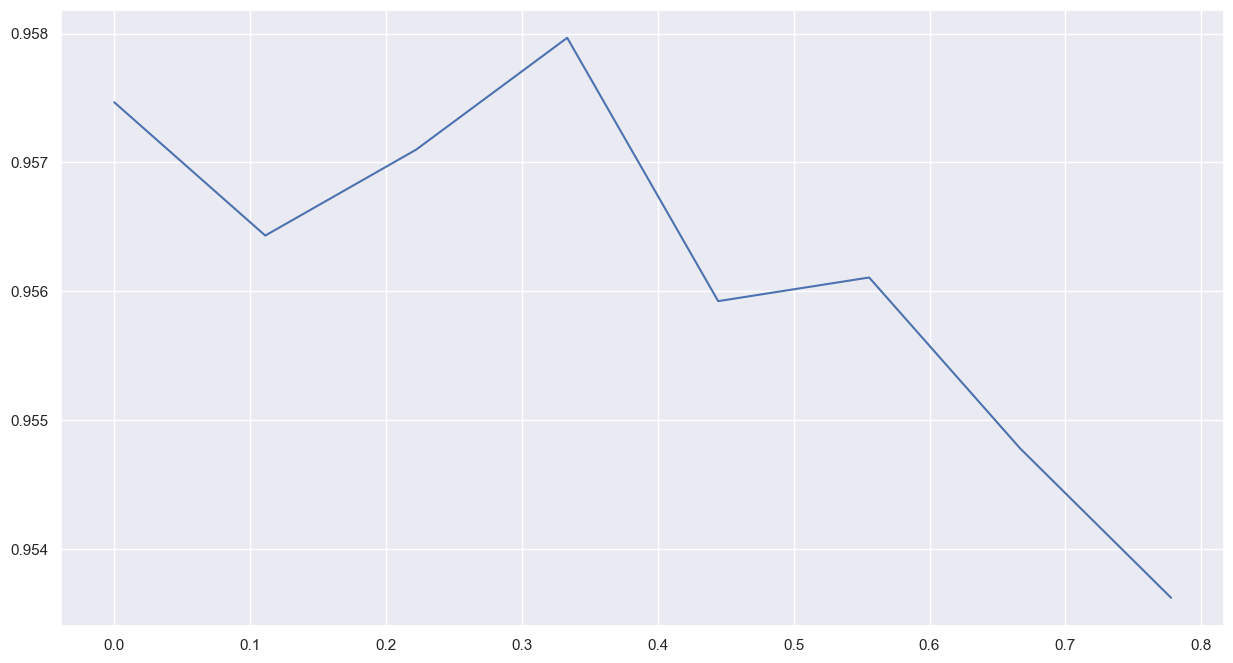

20

loss_noise: 0.8888888888888888 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9547500014305115 0.9488999843597412
20

loss_noise: 0.8888888888888888 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9553333520889282 0.9535999894142151
20

loss_noise: 0.8888888888888888 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9586666822433472 0.9569000005722046
20

loss_noise: 0.8888888888888888 , activation_noise: 0.0 , inp

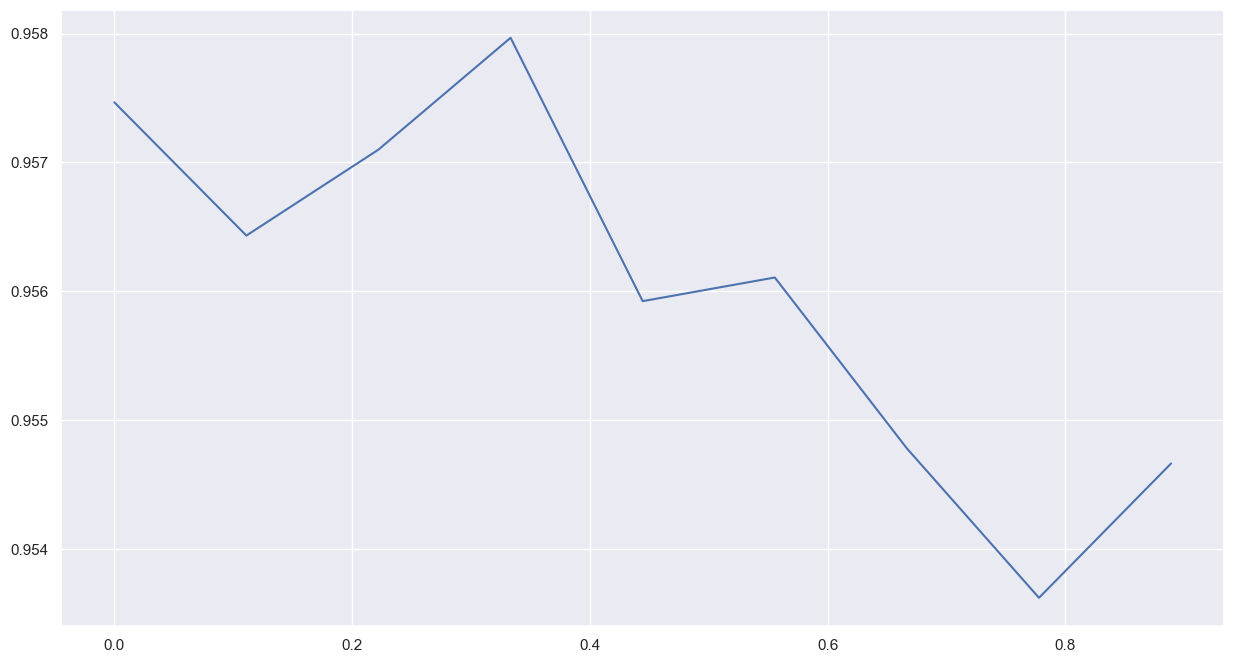

20

loss_noise: 1.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9554166793823242 0.9506000280380249
20

loss_noise: 1.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.953416645526886 0.9513000249862671
20

loss_noise: 1.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9546666741371155 0.9513999819755554
20

loss_noise: 1.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

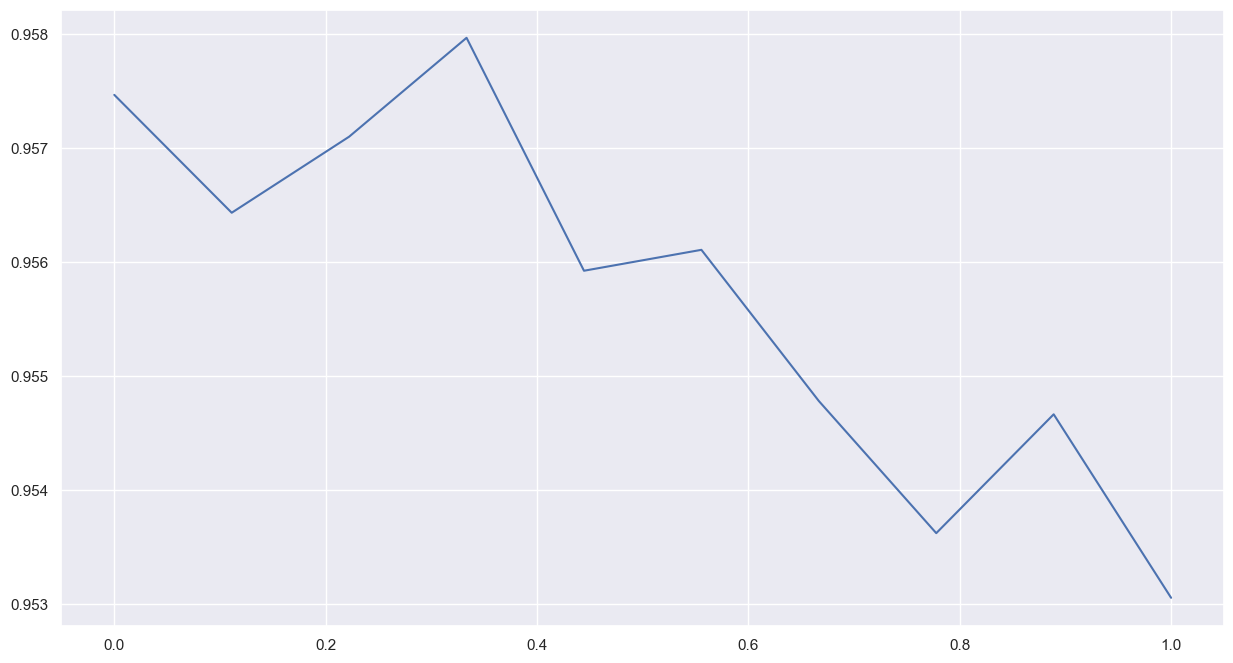

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570833444595337 0.9542999863624573
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574999809265137 0.9555000066757202
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9583333134651184 0.9585999846458435
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

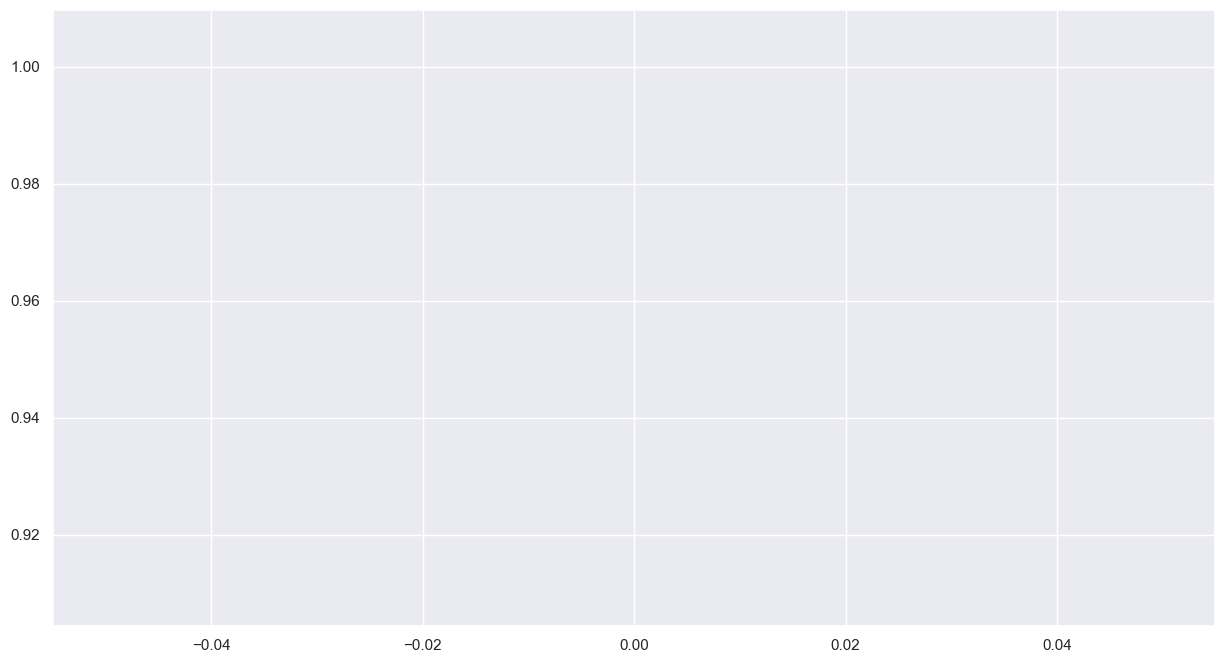

20

loss_noise: 0.0 , activation_noise: 0.011111111111111112 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9547500014305115 0.9526000022888184
20

loss_noise: 0.0 , activation_noise: 0.011111111111111112 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9565833210945129 0.9535999894142151
20

loss_noise: 0.0 , activation_noise: 0.011111111111111112 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9546666741371155 0.9542999863624573
20

loss_noise: 0.0 , activation_noise: 0.0111111111111111

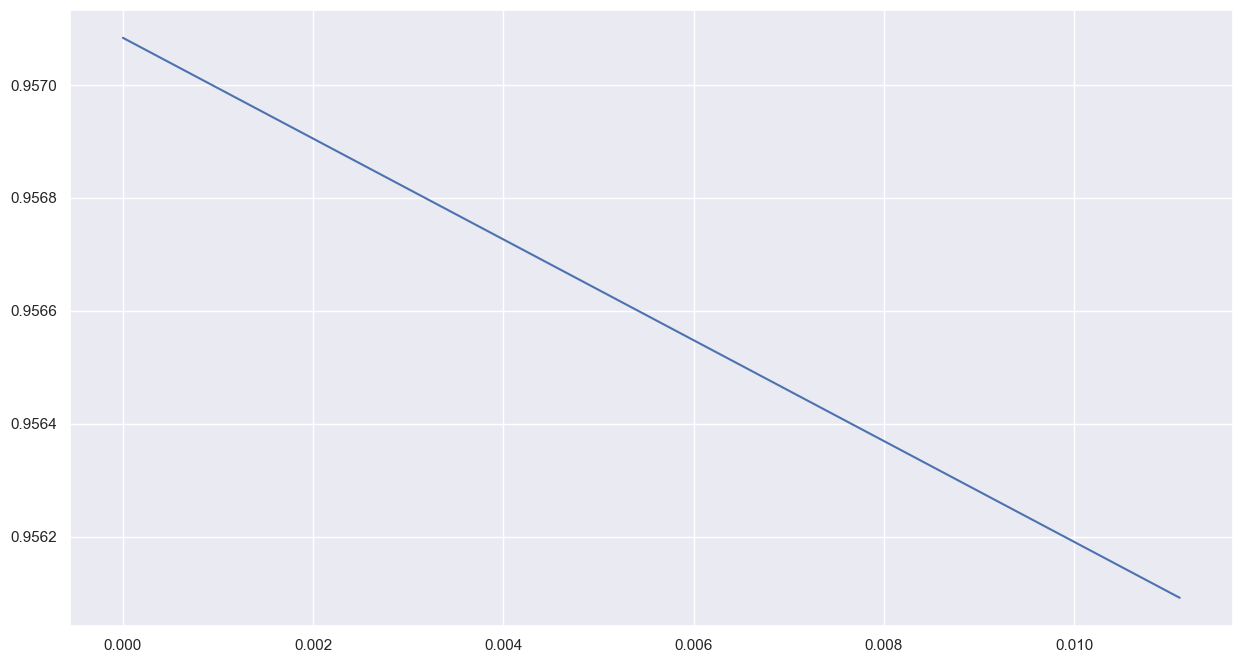

20

loss_noise: 0.0 , activation_noise: 0.022222222222222223 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9569166898727417 0.957099974155426
20

loss_noise: 0.0 , activation_noise: 0.022222222222222223 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9581666588783264 0.9574000239372253
20

loss_noise: 0.0 , activation_noise: 0.022222222222222223 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9588333368301392 0.9571999907493591
20

loss_noise: 0.0 , activation_noise: 0.02222222222222222

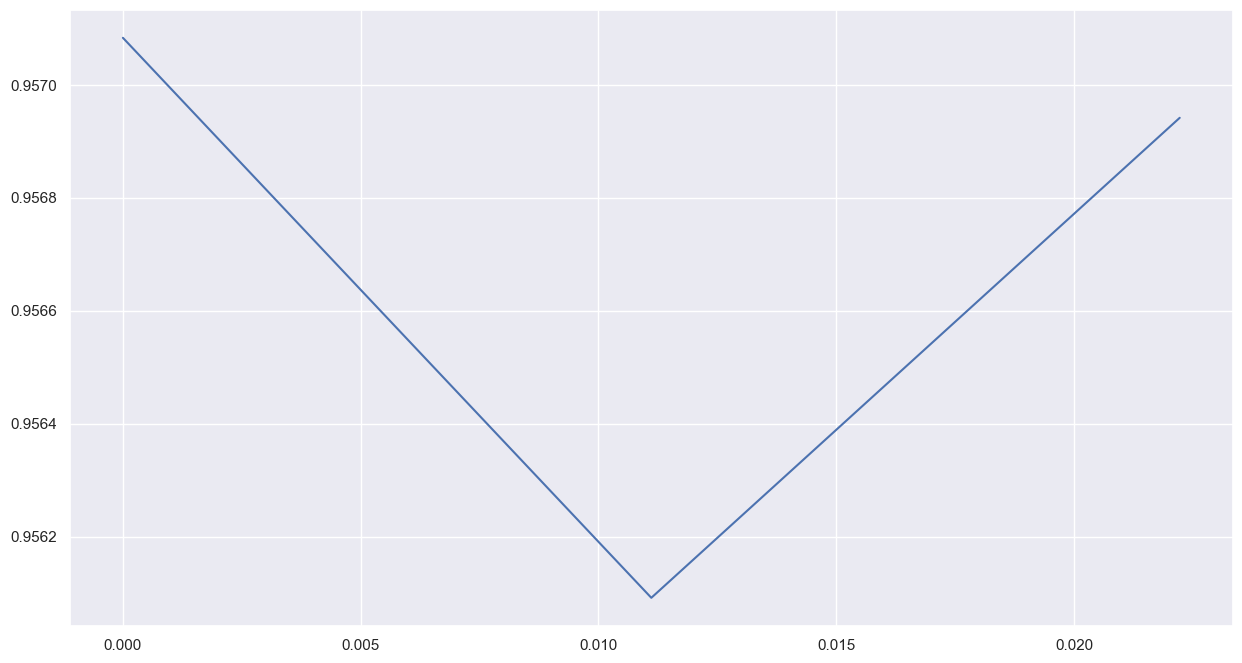

20

loss_noise: 0.0 , activation_noise: 0.03333333333333333 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9520000219345093 0.949400007724762
20

loss_noise: 0.0 , activation_noise: 0.03333333333333333 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9585000276565552 0.9570000171661377
20

loss_noise: 0.0 , activation_noise: 0.03333333333333333 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9553333520889282 0.9550999999046326
20

loss_noise: 0.0 , activation_noise: 0.03333333333333333 , 

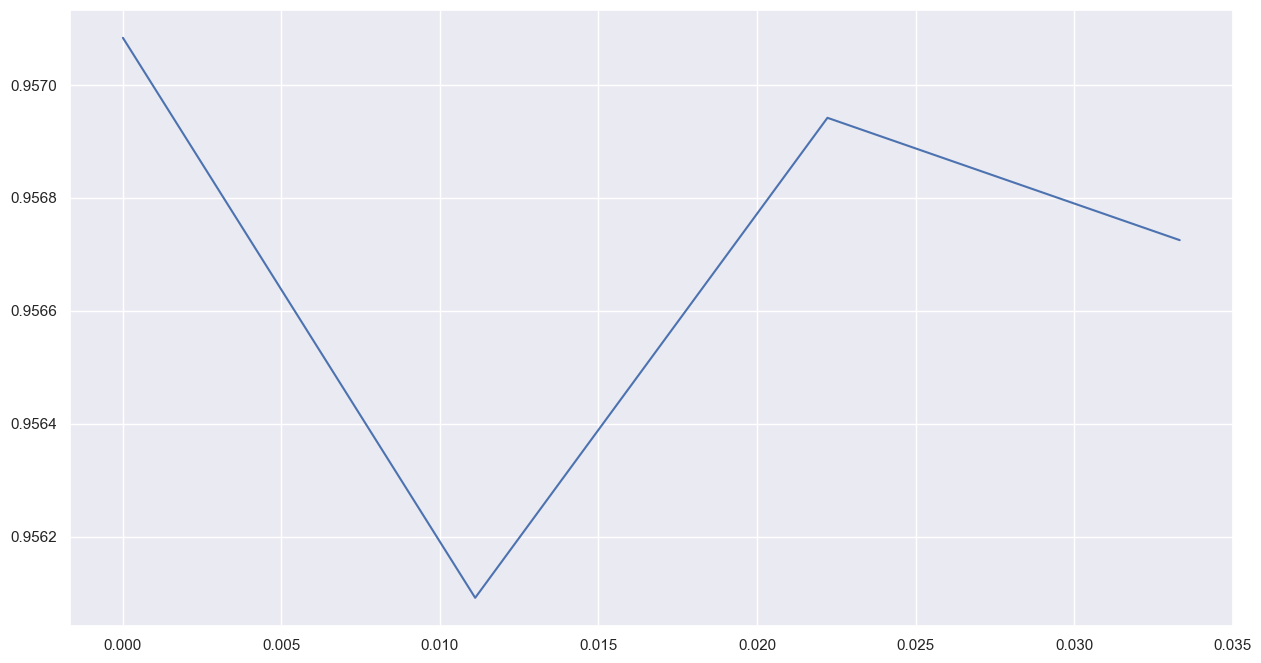

20

loss_noise: 0.0 , activation_noise: 0.044444444444444446 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9553333520889282 0.9541000127792358
20

loss_noise: 0.0 , activation_noise: 0.044444444444444446 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570833444595337 0.957099974155426
20

loss_noise: 0.0 , activation_noise: 0.044444444444444446 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956166684627533 0.9549000263214111
20

loss_noise: 0.0 , activation_noise: 0.044444444444444446

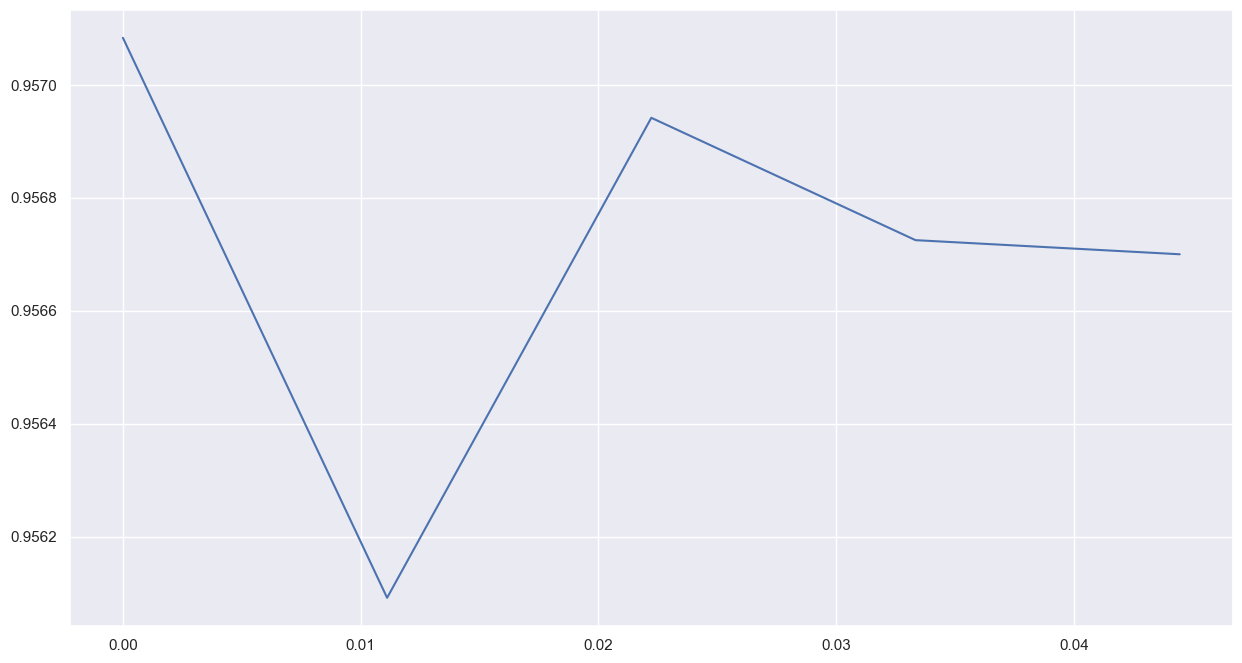

20

loss_noise: 0.0 , activation_noise: 0.05555555555555556 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549166560173035 0.9538999795913696
20

loss_noise: 0.0 , activation_noise: 0.05555555555555556 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574166536331177 0.954800009727478
20

loss_noise: 0.0 , activation_noise: 0.05555555555555556 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9584166407585144 0.9571999907493591
20

loss_noise: 0.0 , activation_noise: 0.05555555555555556 , 

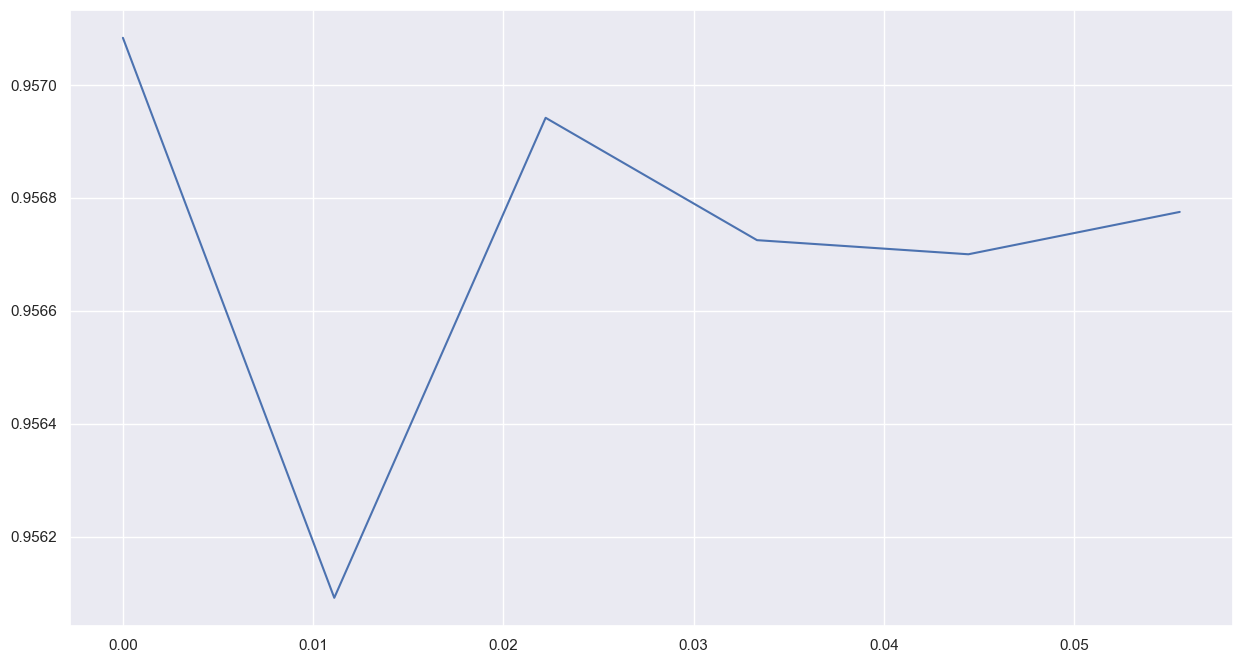

20

loss_noise: 0.0 , activation_noise: 0.06666666666666667 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9558333158493042 0.9531999826431274
20

loss_noise: 0.0 , activation_noise: 0.06666666666666667 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9552500247955322 0.9532999992370605
20

loss_noise: 0.0 , activation_noise: 0.06666666666666667 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9597499966621399 0.9581000208854675
20

loss_noise: 0.0 , activation_noise: 0.06666666666666667 ,

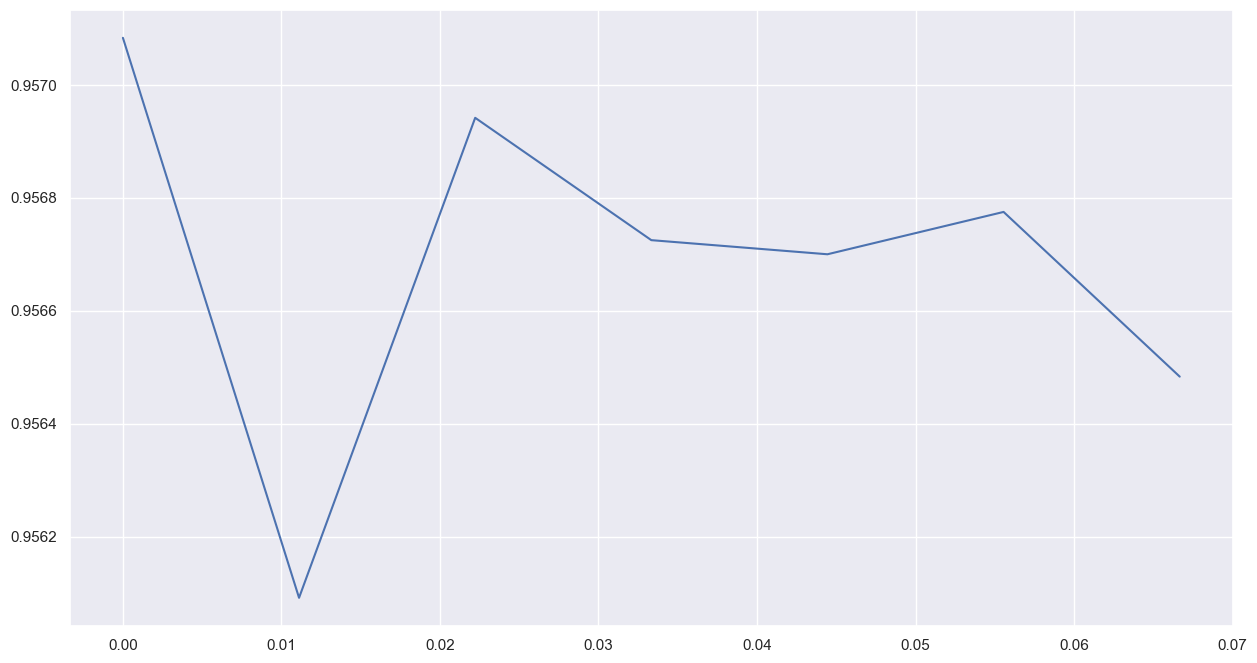

20

loss_noise: 0.0 , activation_noise: 0.07777777777777778 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570000171661377 0.9556999802589417
20

loss_noise: 0.0 , activation_noise: 0.07777777777777778 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9582499861717224 0.9567000269889832
20

loss_noise: 0.0 , activation_noise: 0.07777777777777778 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9586666822433472 0.9569000005722046
20

loss_noise: 0.0 , activation_noise: 0.07777777777777778 ,

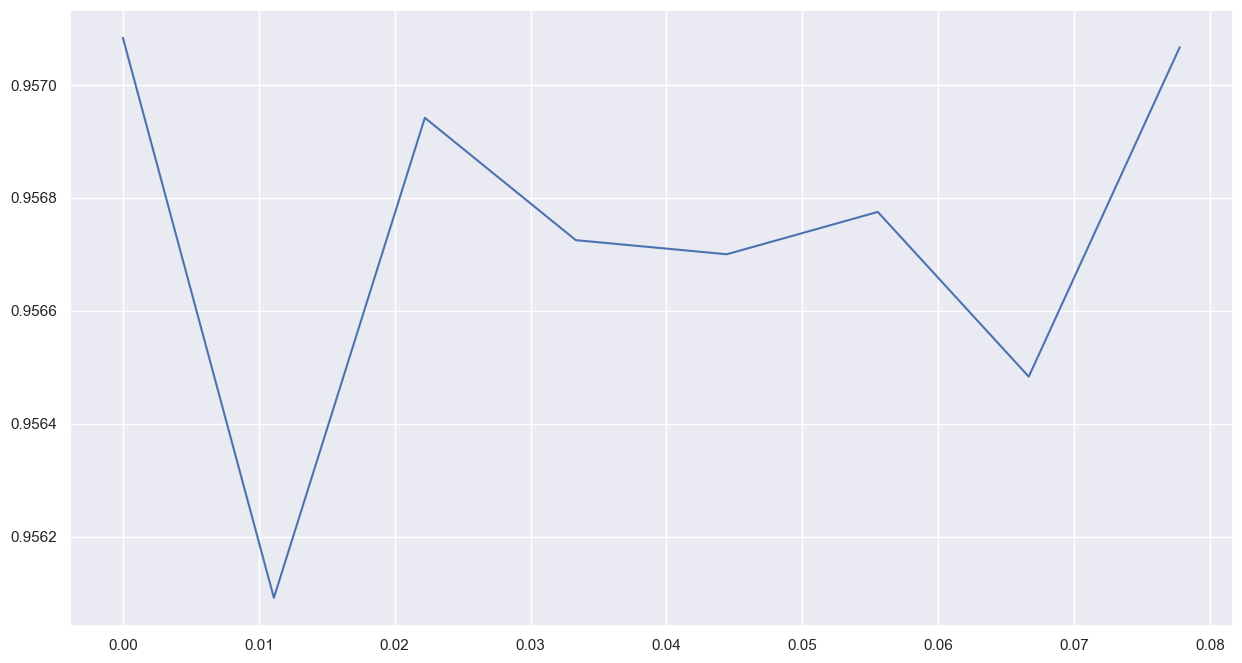

20

loss_noise: 0.0 , activation_noise: 0.08888888888888889 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.9557999968528748
20

loss_noise: 0.0 , activation_noise: 0.08888888888888889 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9571666717529297 0.9545999765396118
20

loss_noise: 0.0 , activation_noise: 0.08888888888888889 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9535833597183228 0.9534000158309937
20

loss_noise: 0.0 , activation_noise: 0.08888888888888889 ,

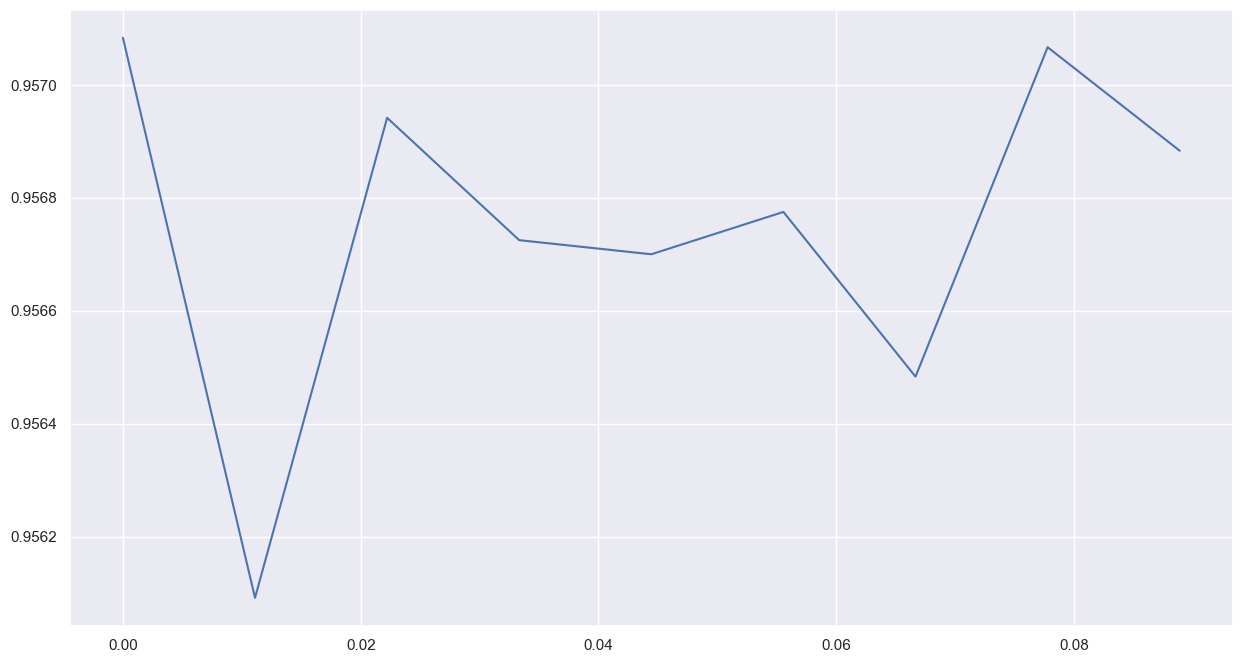

20

loss_noise: 0.0 , activation_noise: 0.1 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9585000276565552 0.9562000036239624
20

loss_noise: 0.0 , activation_noise: 0.1 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956166684627533 0.9562000036239624
20

loss_noise: 0.0 , activation_noise: 0.1 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9567499756813049 0.9574000239372253
20

loss_noise: 0.0 , activation_noise: 0.1 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

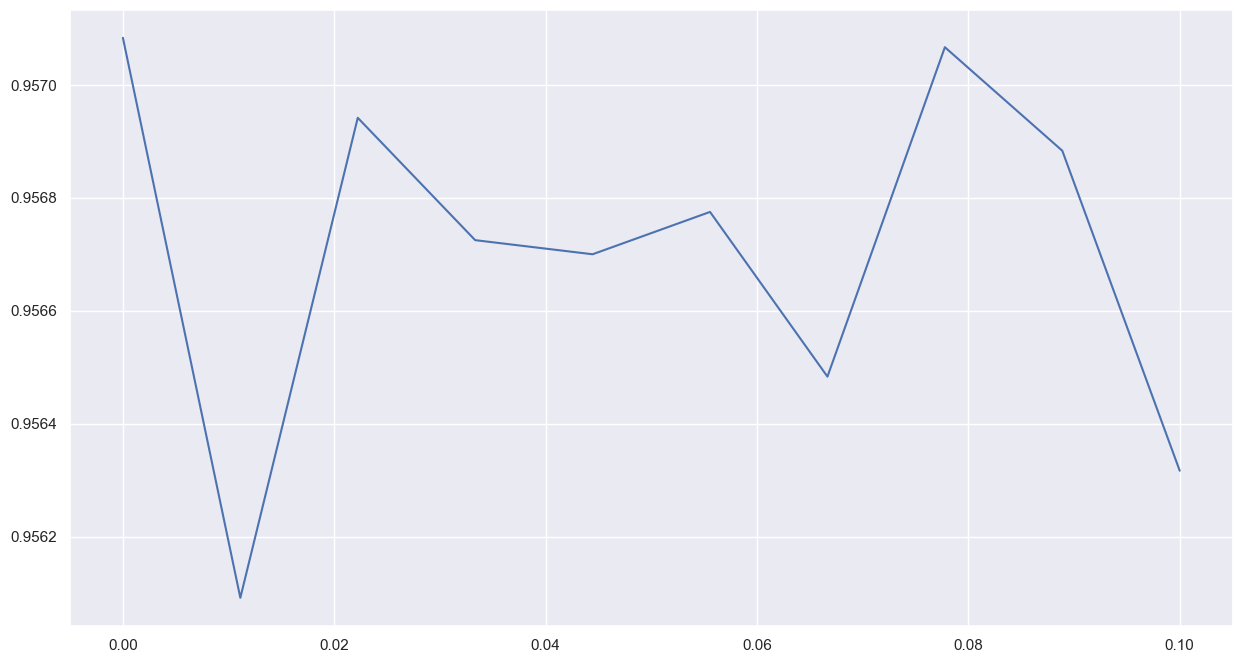

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9580833315849304 0.9592000246047974
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9590833187103271 0.954800009727478
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956250011920929 0.9564999938011169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gra

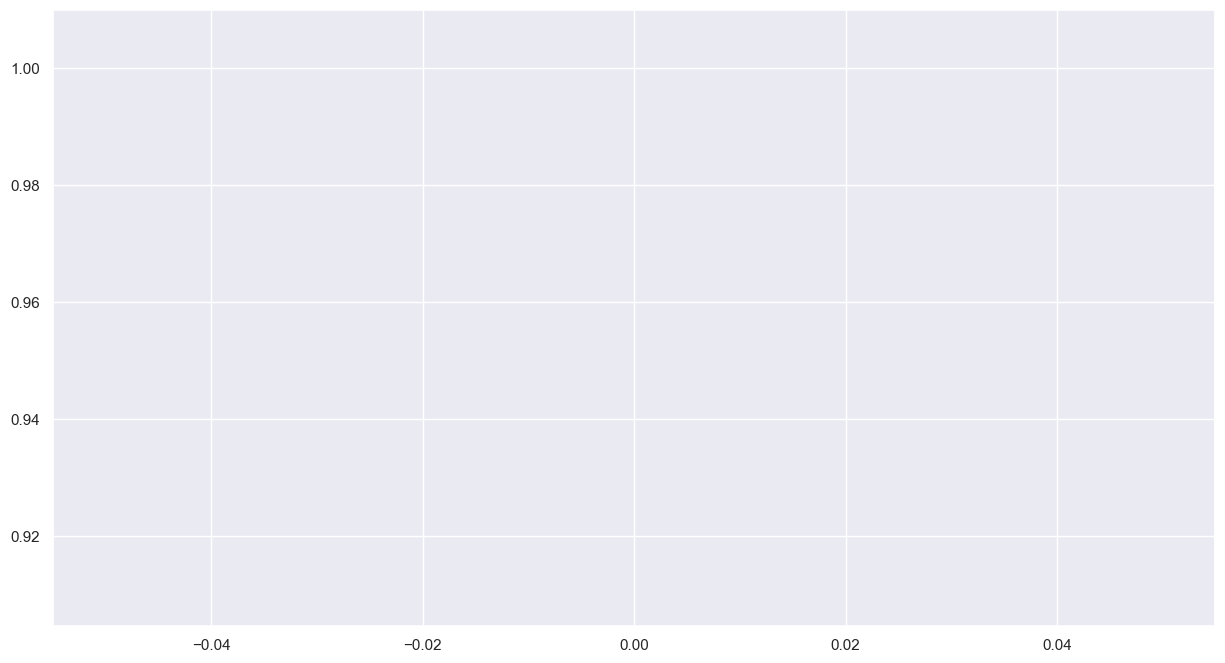

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.1111111111111111 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956416666507721 0.9538000226020813
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.1111111111111111 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9602500200271606 0.9593999981880188
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.1111111111111111 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9547500014305115 0.9585999846458435
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.1111

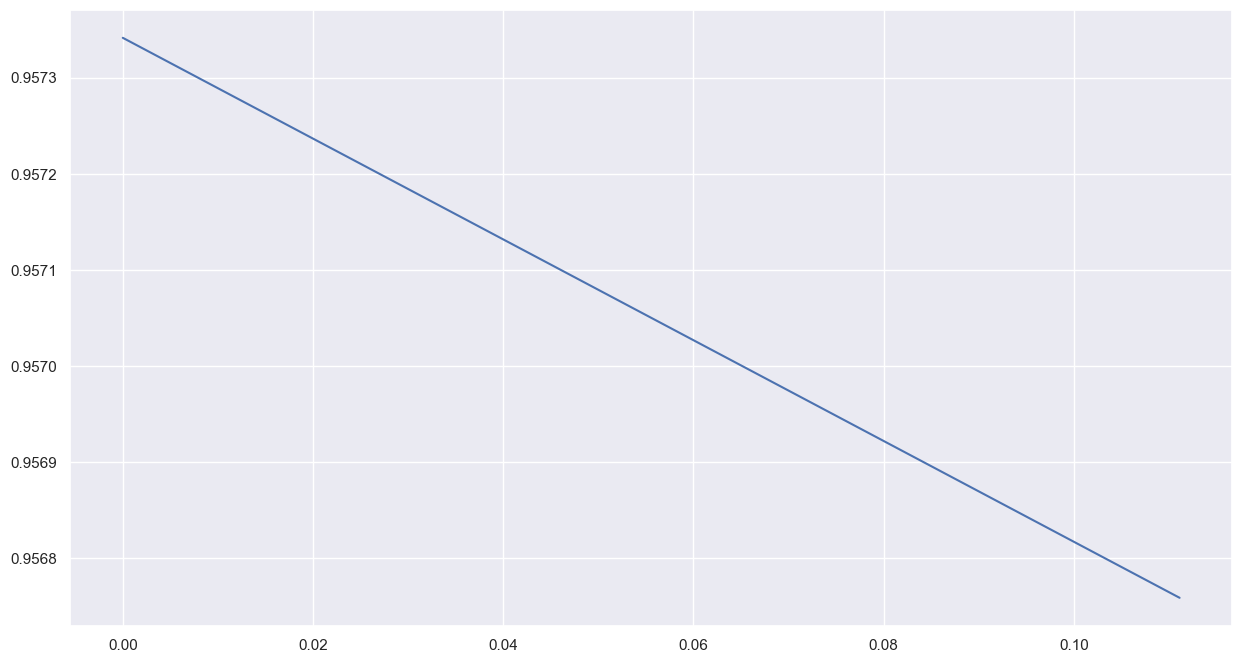

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.2222222222222222 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.953499972820282 0.9538000226020813
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.2222222222222222 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9541666507720947 0.9531000256538391
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.2222222222222222 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9565833210945129 0.953499972820282
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.22222

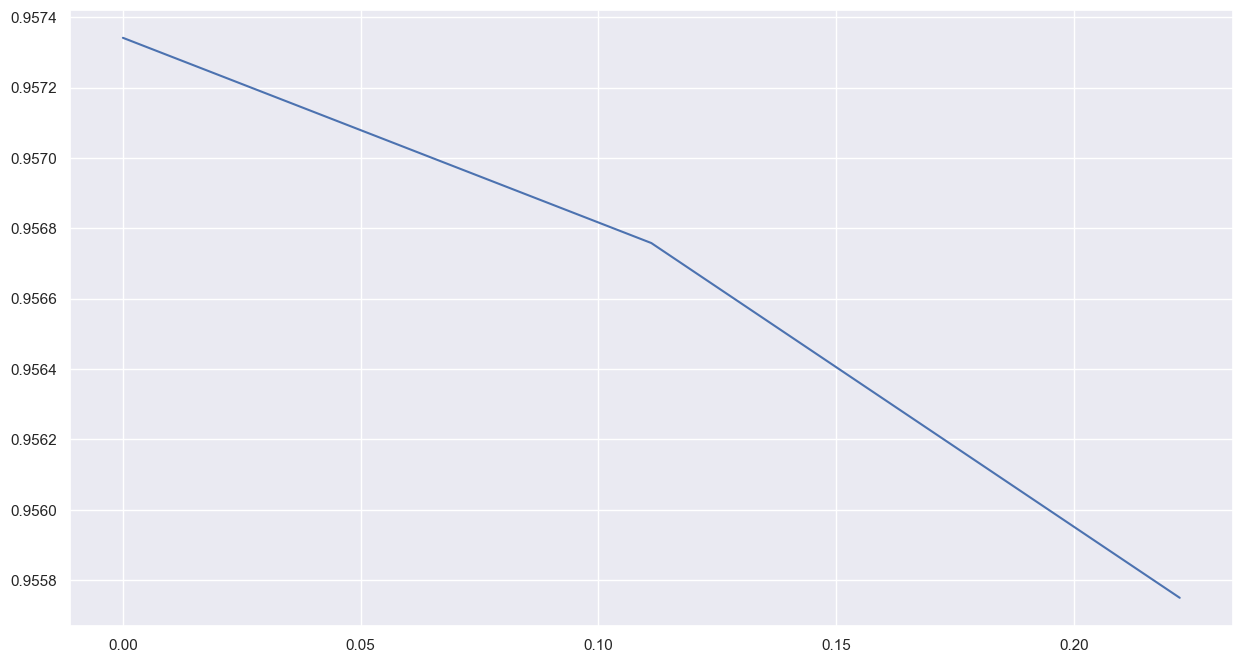

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.3333333333333333 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.95291668176651 0.9534000158309937
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.3333333333333333 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9523333311080933 0.9509999752044678
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.3333333333333333 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549166560173035 0.9541000127792358
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.33333

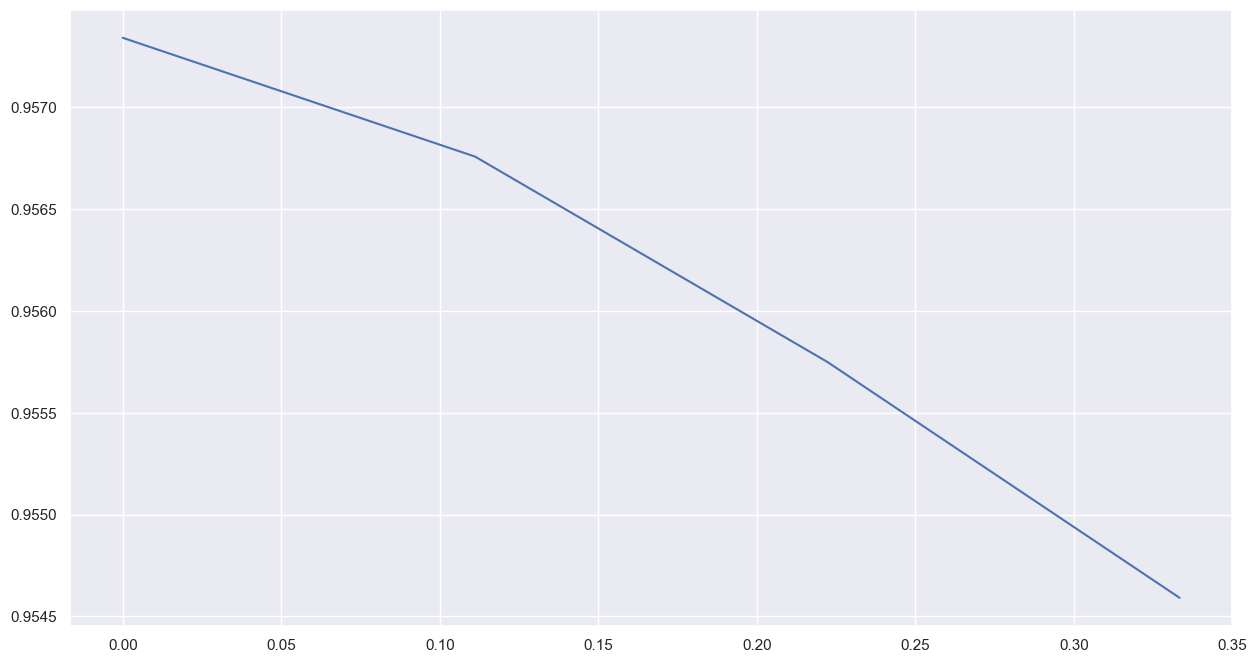

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.4444444444444444 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574999809265137 0.9513999819755554
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.4444444444444444 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9509999752044678 0.9519000053405762
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.4444444444444444 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9489166736602783 0.9501000046730042
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.444

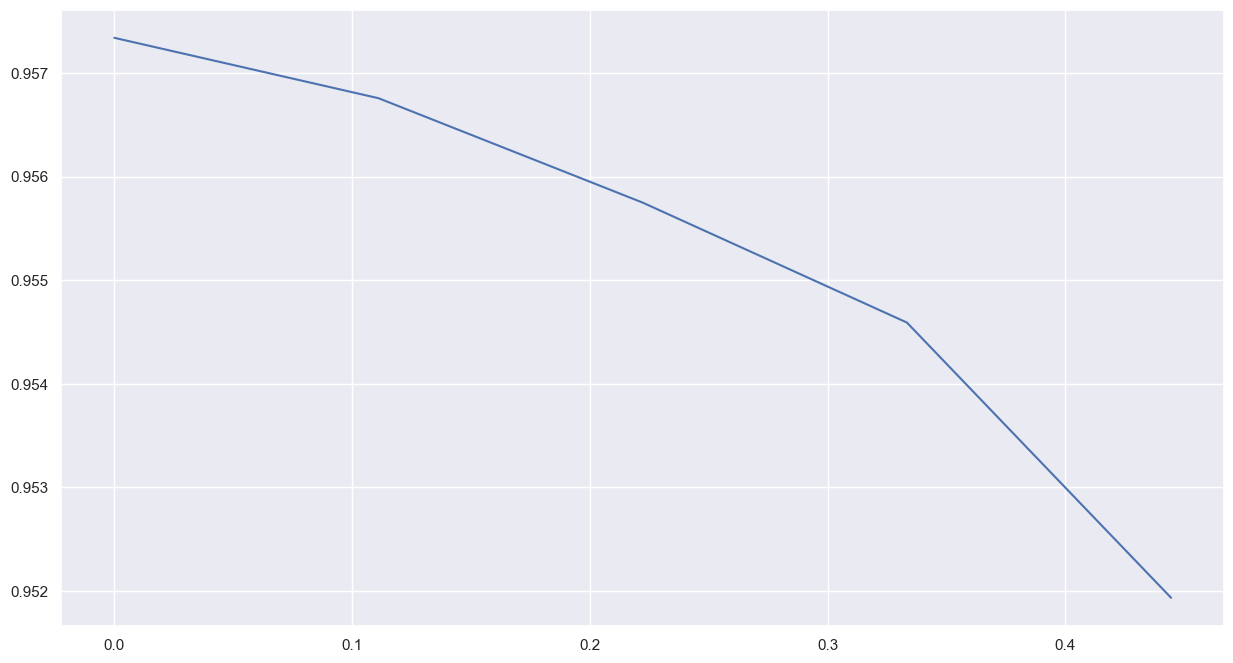

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5555555555555556 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9480000138282776 0.9484000205993652
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5555555555555556 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9474999904632568 0.9488000273704529
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5555555555555556 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9509166479110718 0.949999988079071
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5555

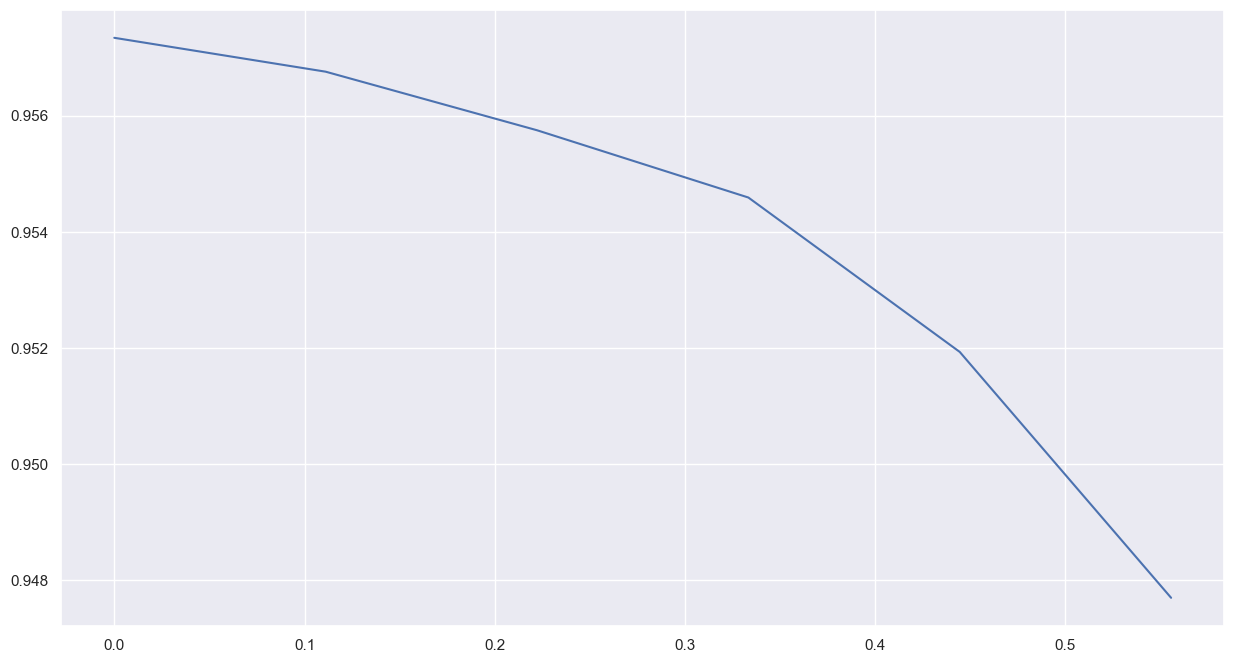

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.6666666666666666 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9424999952316284 0.9423999786376953
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.6666666666666666 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9446666836738586 0.9408000111579895
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.6666666666666666 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9437500238418579 0.9444000124931335
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.666

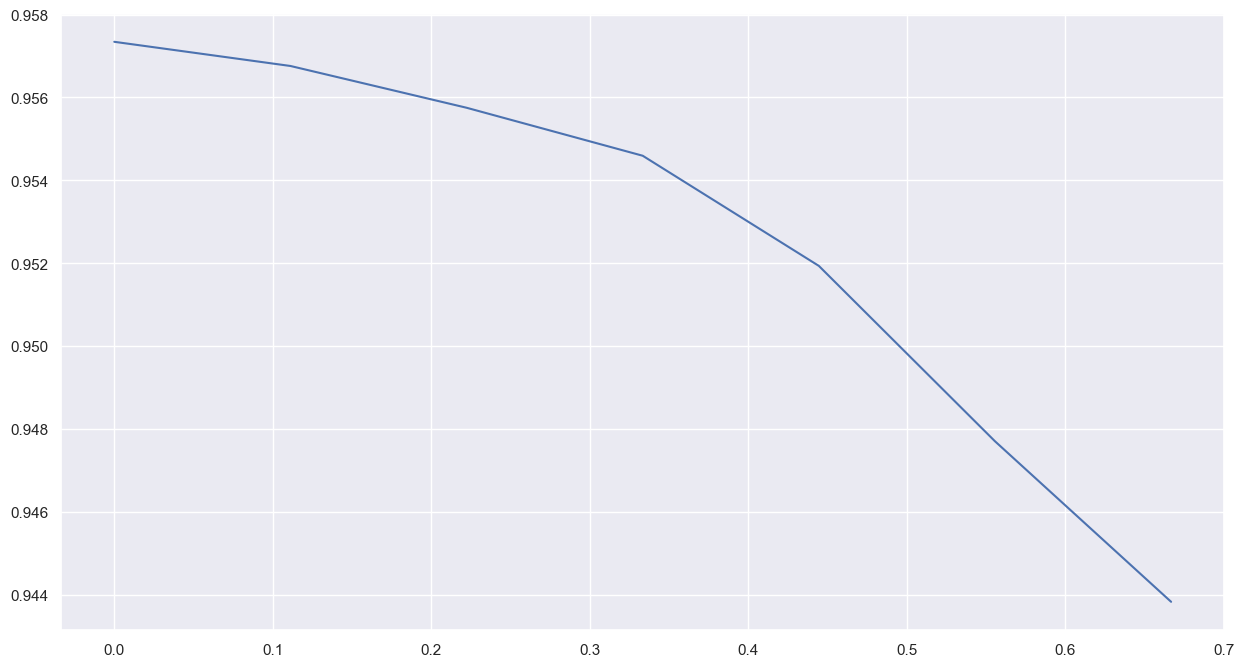

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.7777777777777777 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9431666731834412 0.9413999915122986
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.7777777777777777 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.940500020980835 0.9423999786376953
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.7777777777777777 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9422500133514404 0.9448999762535095
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.7777

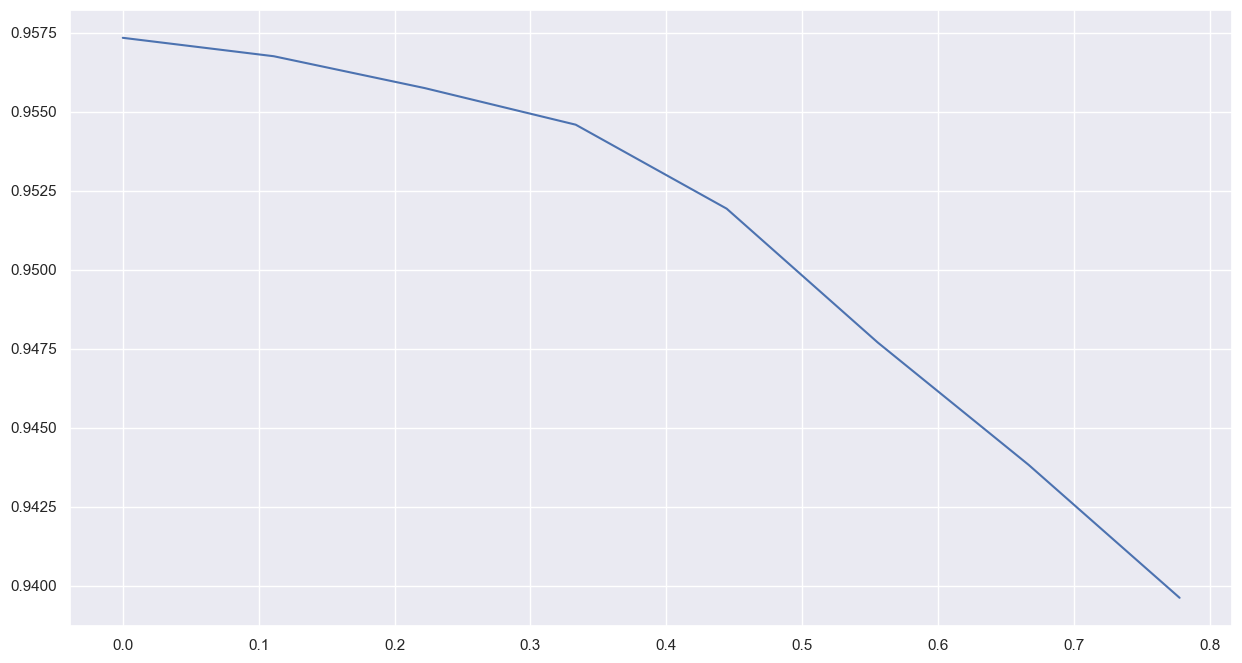

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.8888888888888888 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9340000152587891 0.9307000041007996
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.8888888888888888 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9324166774749756 0.9305999875068665
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.8888888888888888 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9340000152587891 0.9307000041007996
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.888

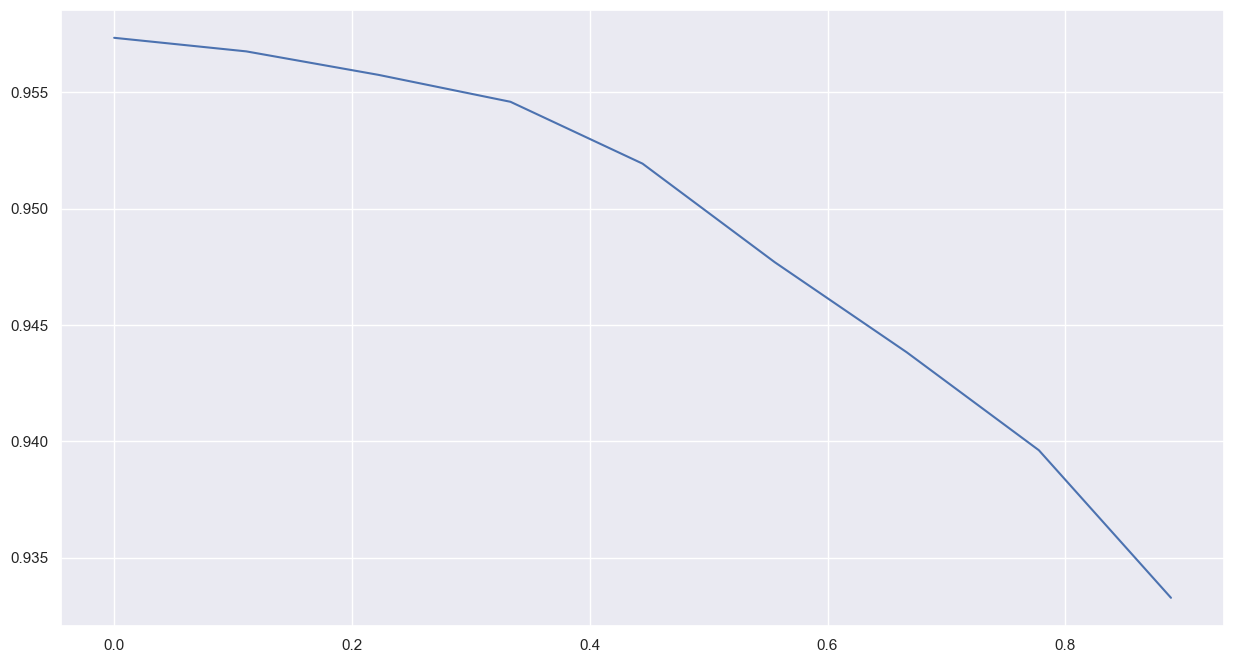

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 1.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9300000071525574 0.9283000230789185
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 1.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9232500195503235 0.92330002784729
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 1.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9259166717529297 0.9230999946594238
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 1.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gra

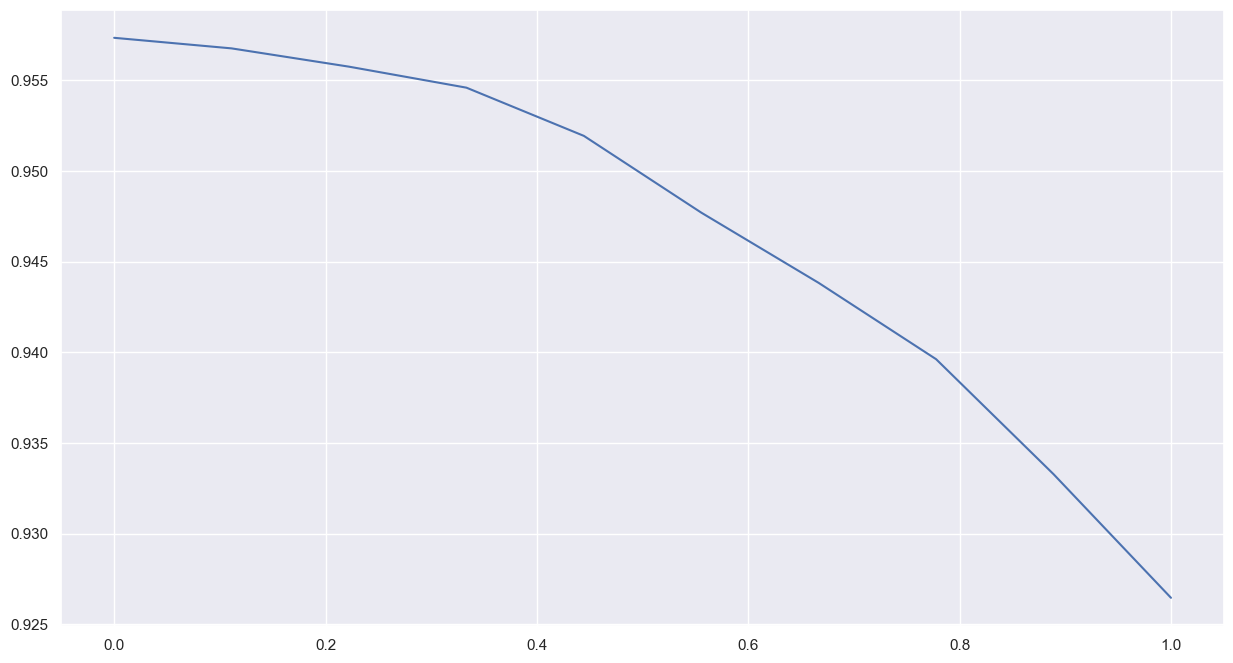

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9576666951179504 0.9545000195503235
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570000171661377 0.9560999870300293
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9567499756813049 0.9546999931335449
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

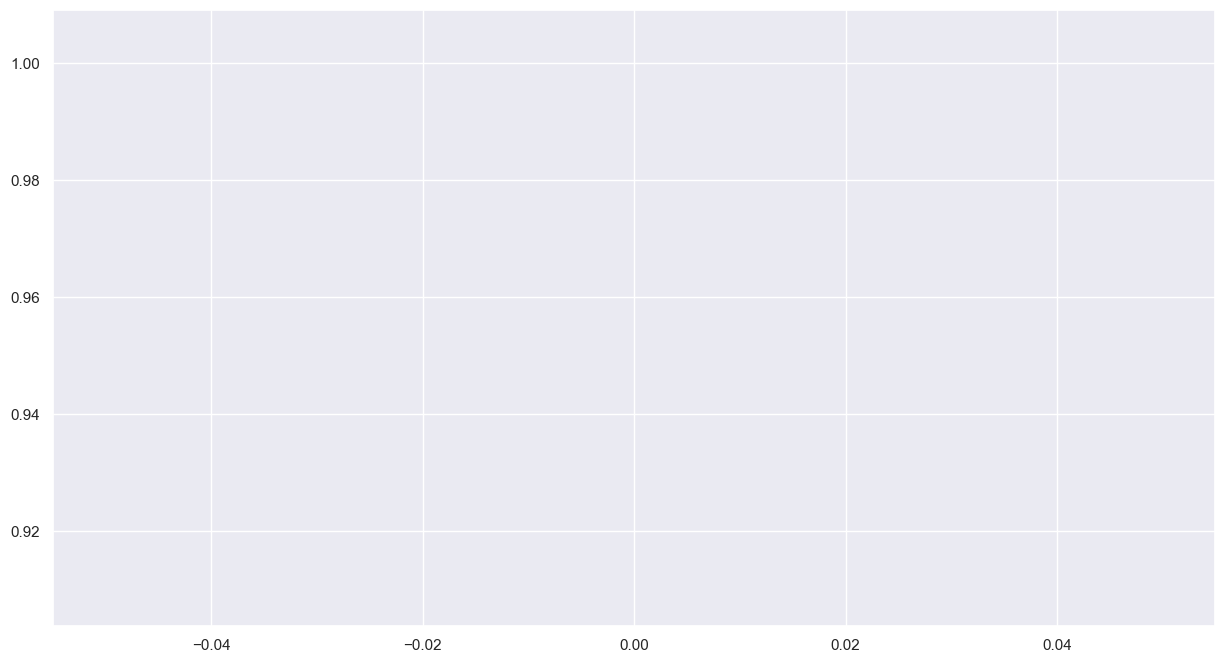

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.1111111111111111 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9569166898727417 0.957099974155426
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.1111111111111111 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9584166407585144 0.9567999839782715
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.1111111111111111 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9589166641235352 0.958299994468689
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

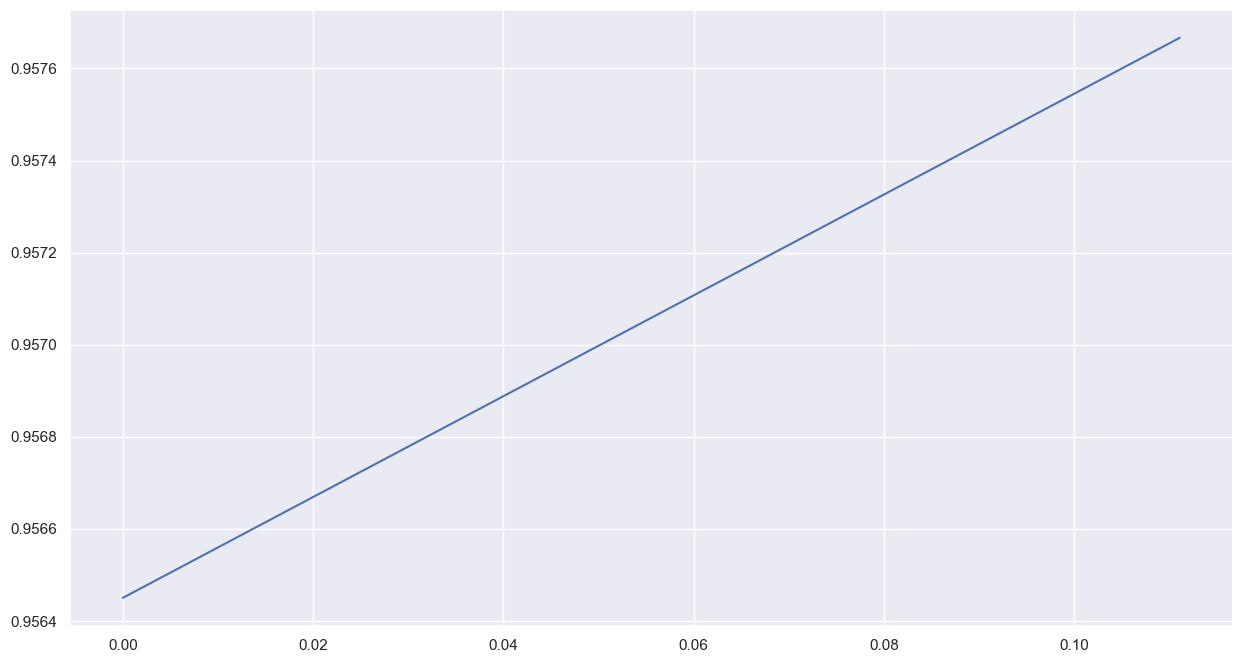

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.2222222222222222 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9580000042915344 0.9598000049591064
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.2222222222222222 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9593333601951599 0.9593999981880188
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.2222222222222222 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549999833106995 0.9534000158309937
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

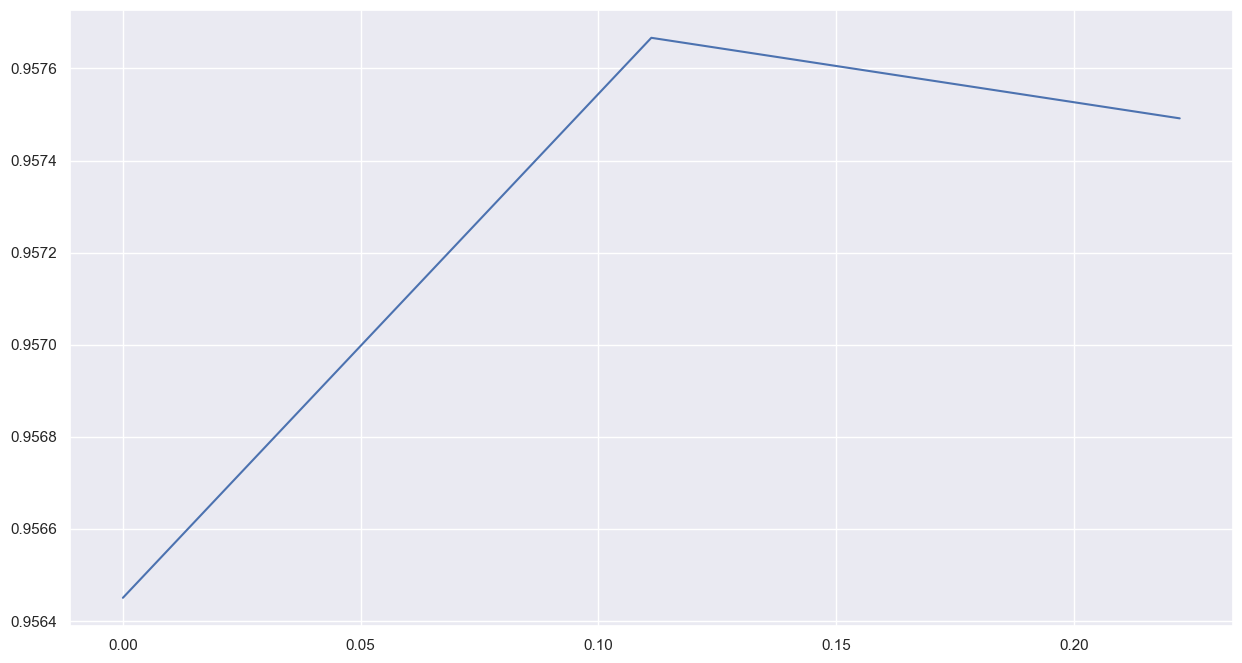

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.3333333333333333 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9590833187103271 0.9585000276565552
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.3333333333333333 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9582499861717224 0.9562000036239624
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.3333333333333333 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9568333625793457 0.9559000134468079
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

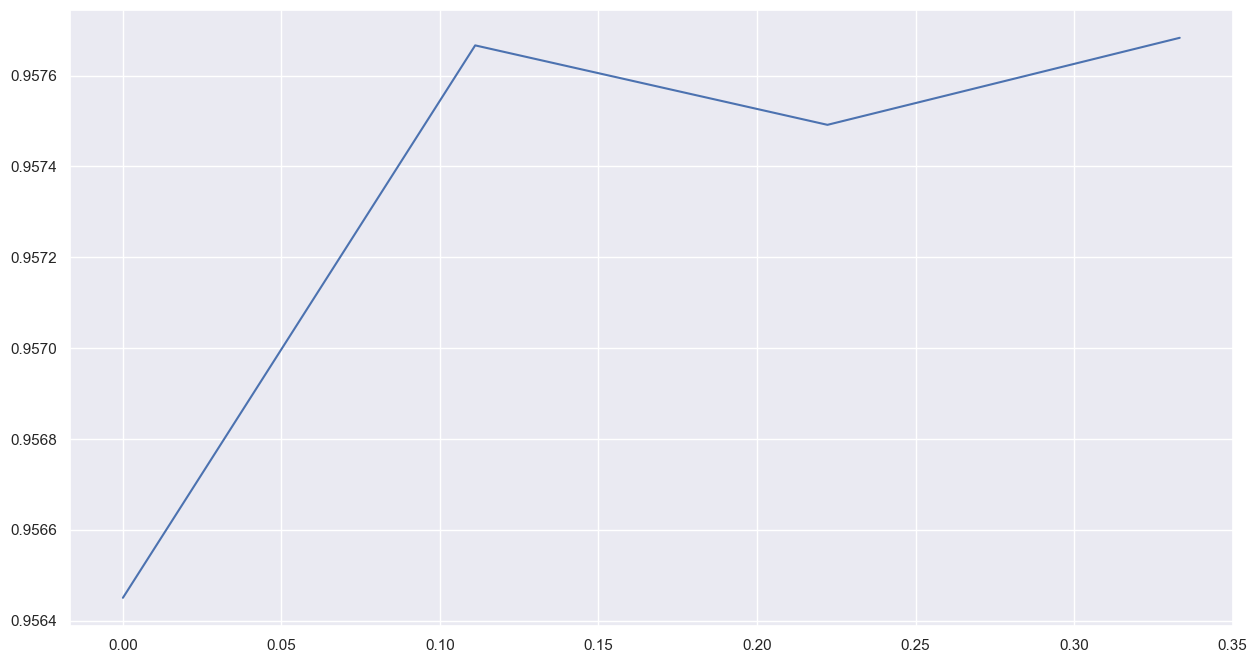

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.4444444444444444 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9547500014305115 0.9535999894142151
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.4444444444444444 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574999809265137 0.9545999765396118
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.4444444444444444 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570833444595337 0.9535999894142151
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

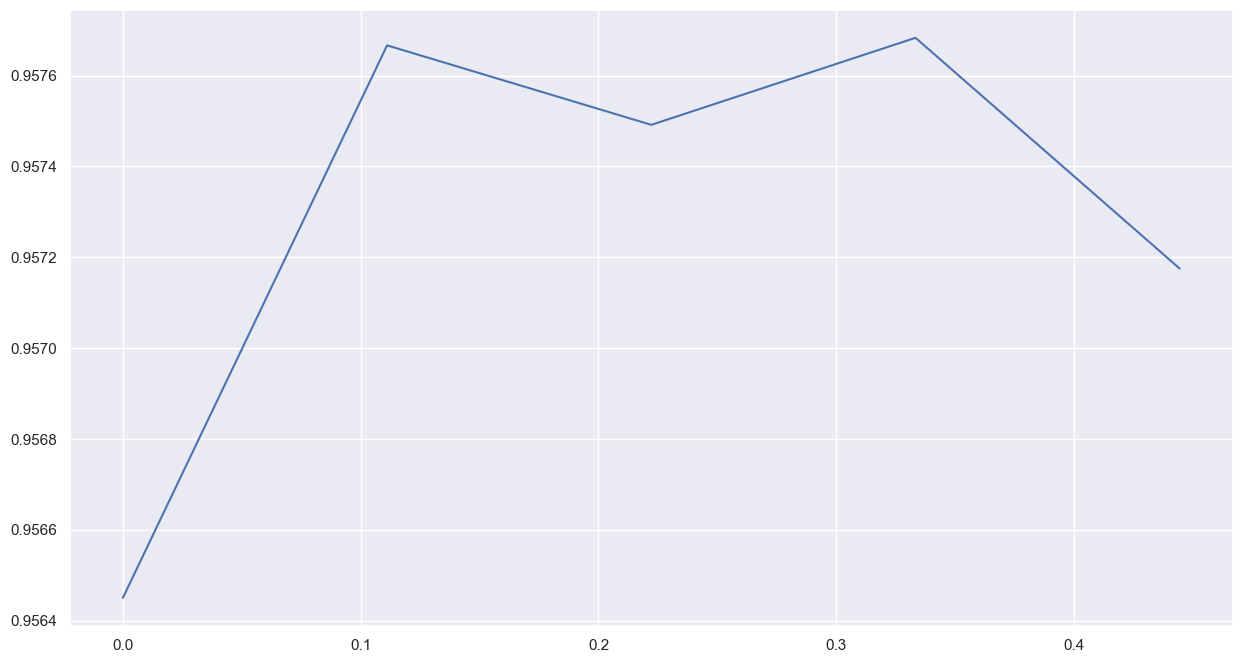

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5555555555555556 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549999833106995 0.953499972820282
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5555555555555556 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9584166407585144 0.9581000208854675
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5555555555555556 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9570833444595337 0.954200029373169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

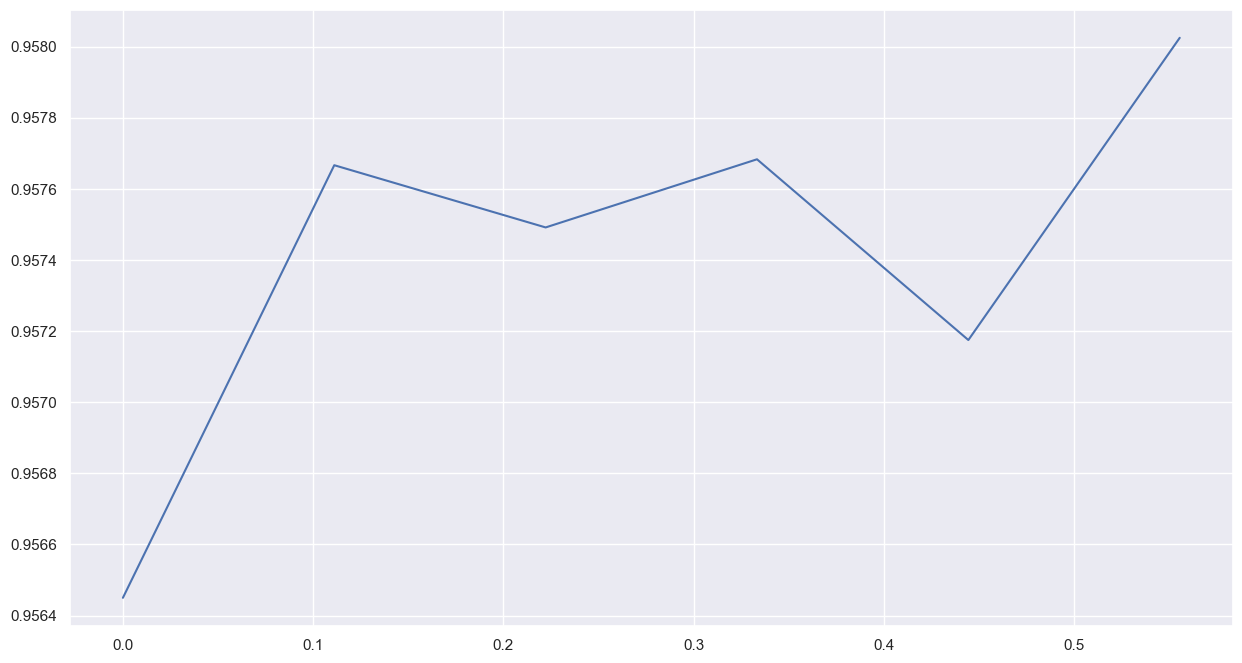

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.6666666666666666 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.95333331823349 0.9509000182151794
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.6666666666666666 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9548333287239075 0.9553999900817871
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.6666666666666666 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9603333473205566 0.9595999717712402
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

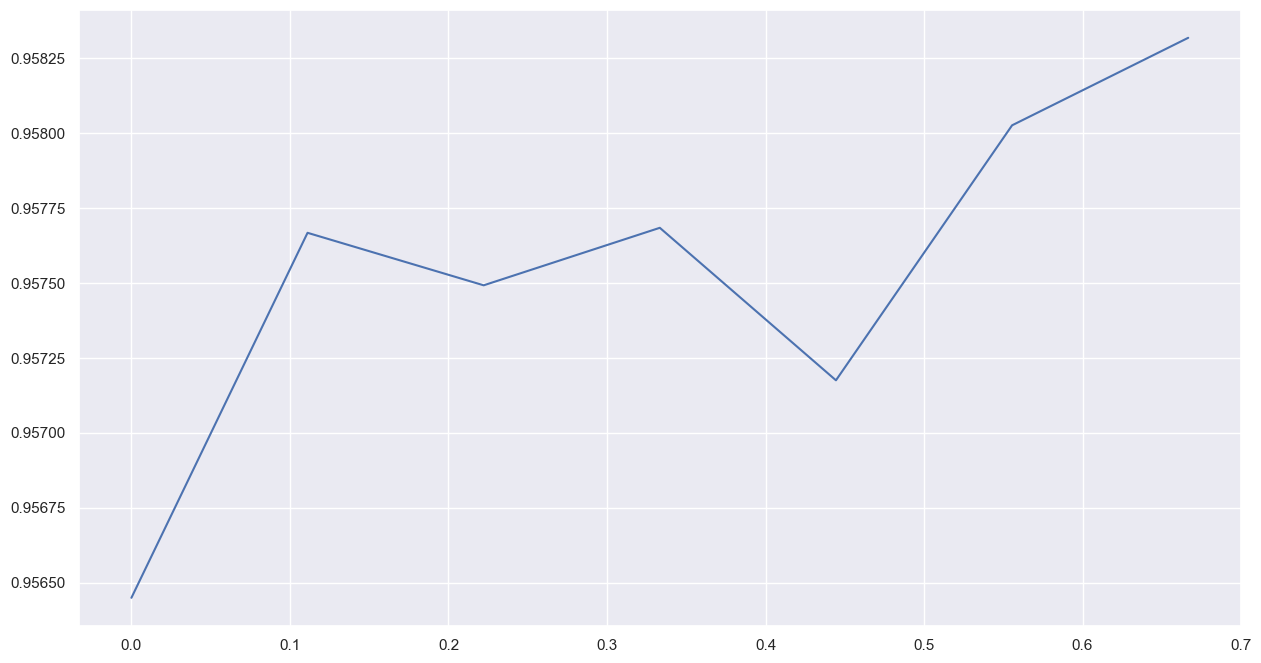

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.7777777777777777 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574999809265137 0.9577999711036682
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.7777777777777777 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9607499837875366 0.9585000276565552
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.7777777777777777 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956416666507721 0.9559000134468079
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , 

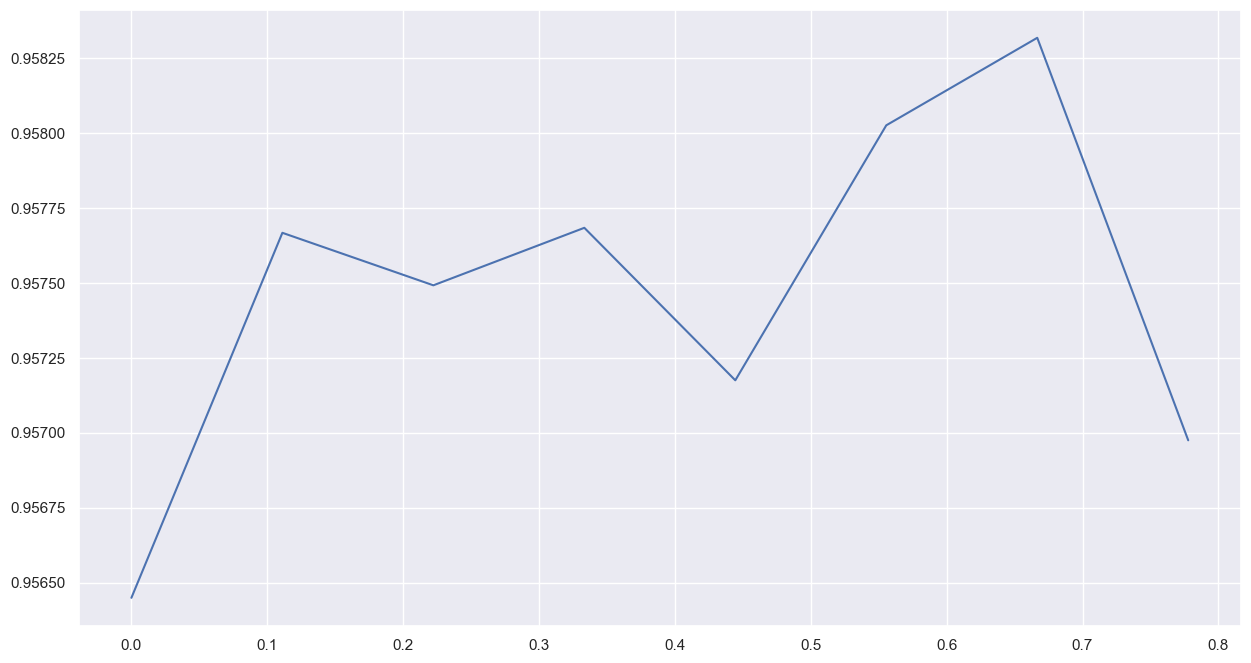

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.8888888888888888 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9585833549499512 0.9592000246047974
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.8888888888888888 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9601666927337646 0.9580000042915344
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.8888888888888888 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9595833420753479 0.9581999778747559
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

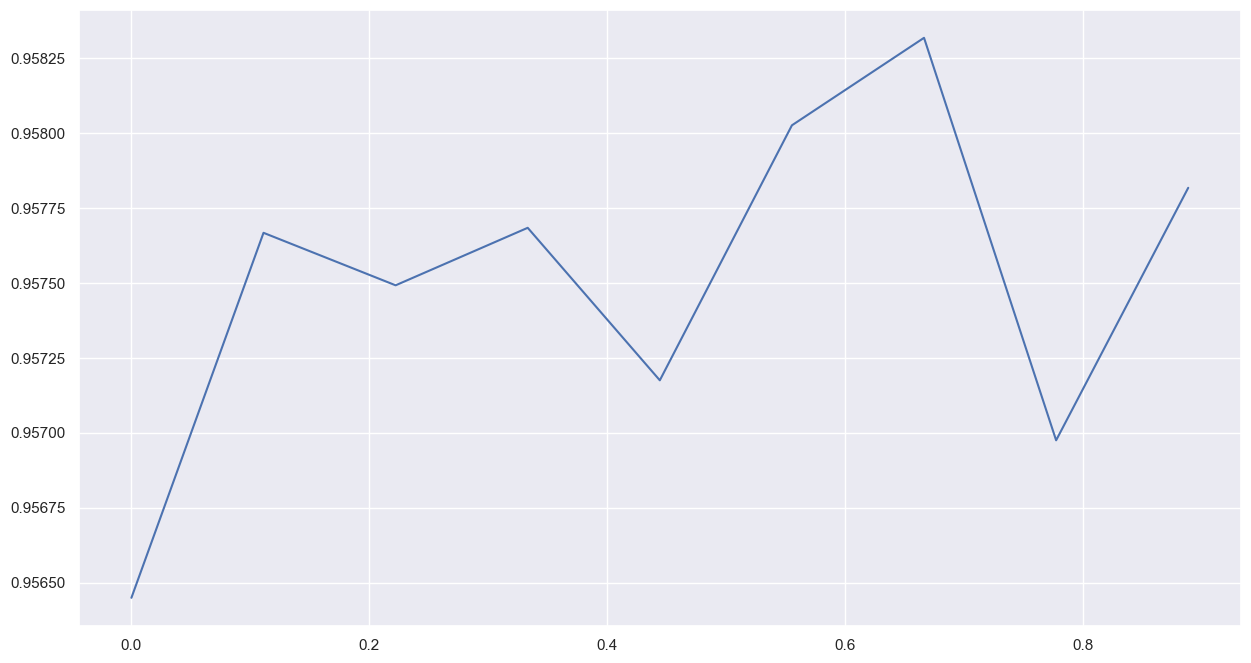

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 1.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9605000019073486 0.9574000239372253
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 1.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9598333239555359 0.9592000246047974
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 1.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9595000147819519 0.9562000036239624
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

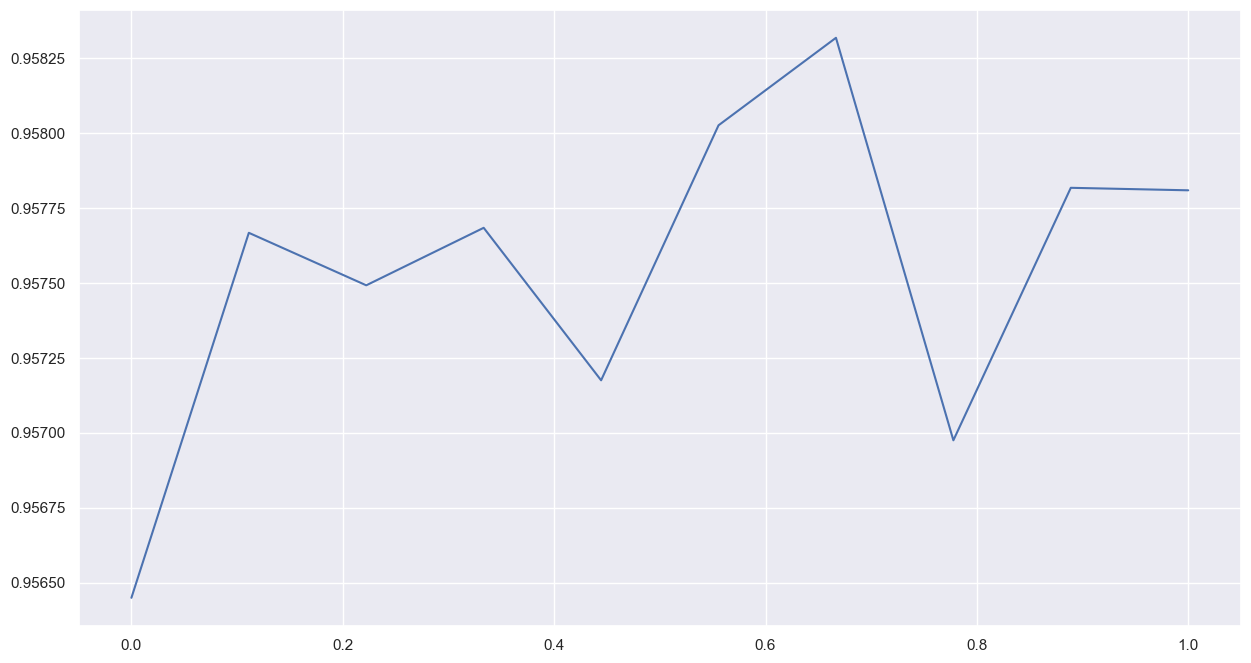

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9568333625793457 0.9555000066757202
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9605000019073486 0.9588000178337097
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9585833549499512 0.9605000019073486
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

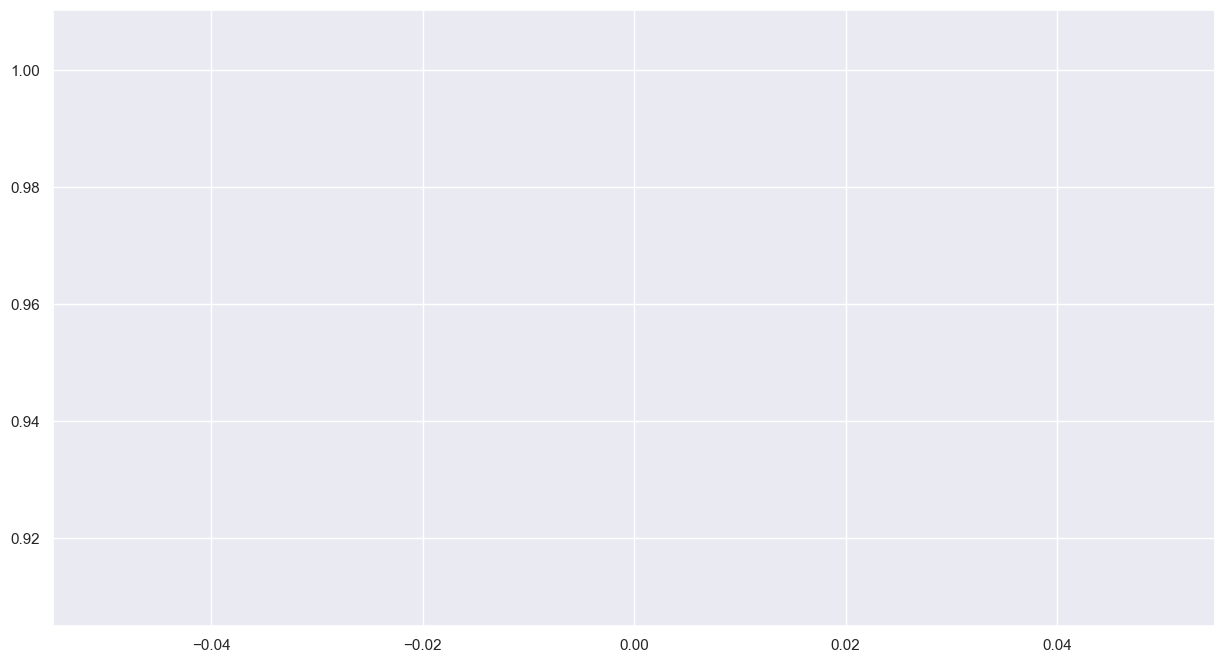

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00011111111111111112 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.9556000232696533
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00011111111111111112 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9556666612625122 0.9570000171661377
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00011111111111111112 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9592499732971191 0.9575999975204468
20

loss_noise: 0.0 , activation_noise: 0.0 , input_

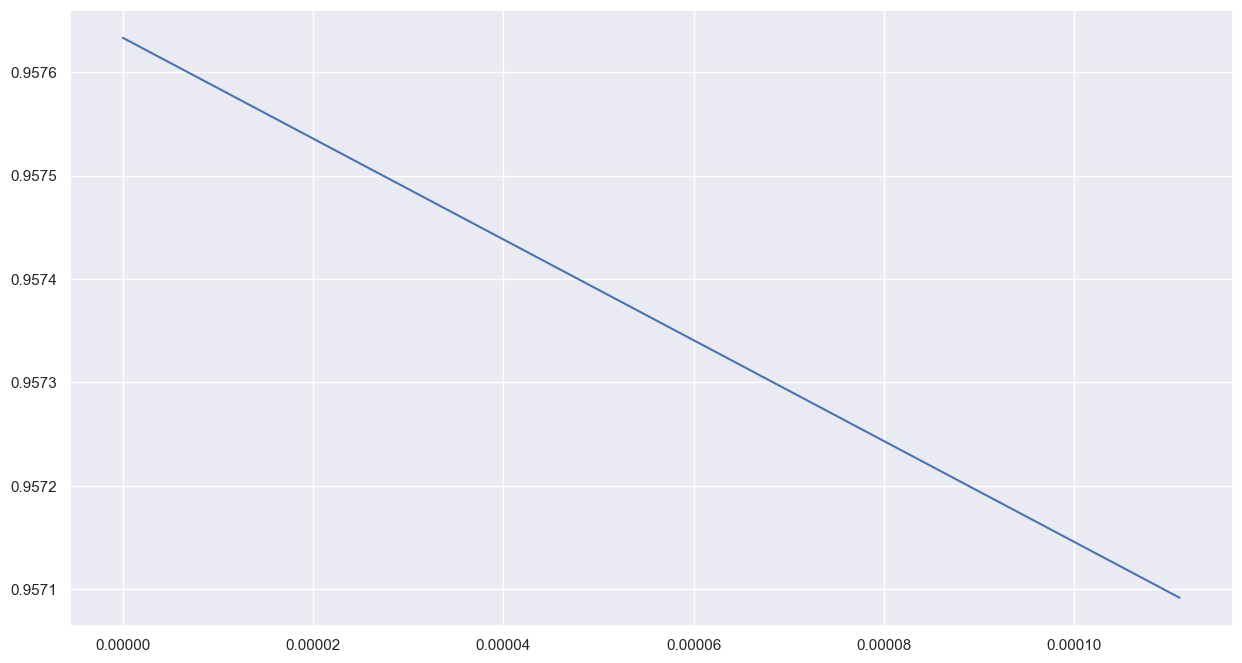

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00022222222222222223 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9538333415985107 0.9559000134468079
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00022222222222222223 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9540833234786987 0.9563999772071838
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00022222222222222223 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9567499756813049 0.9562000036239624
20

loss_noise: 0.0 , activation_noise: 0.0 , input_

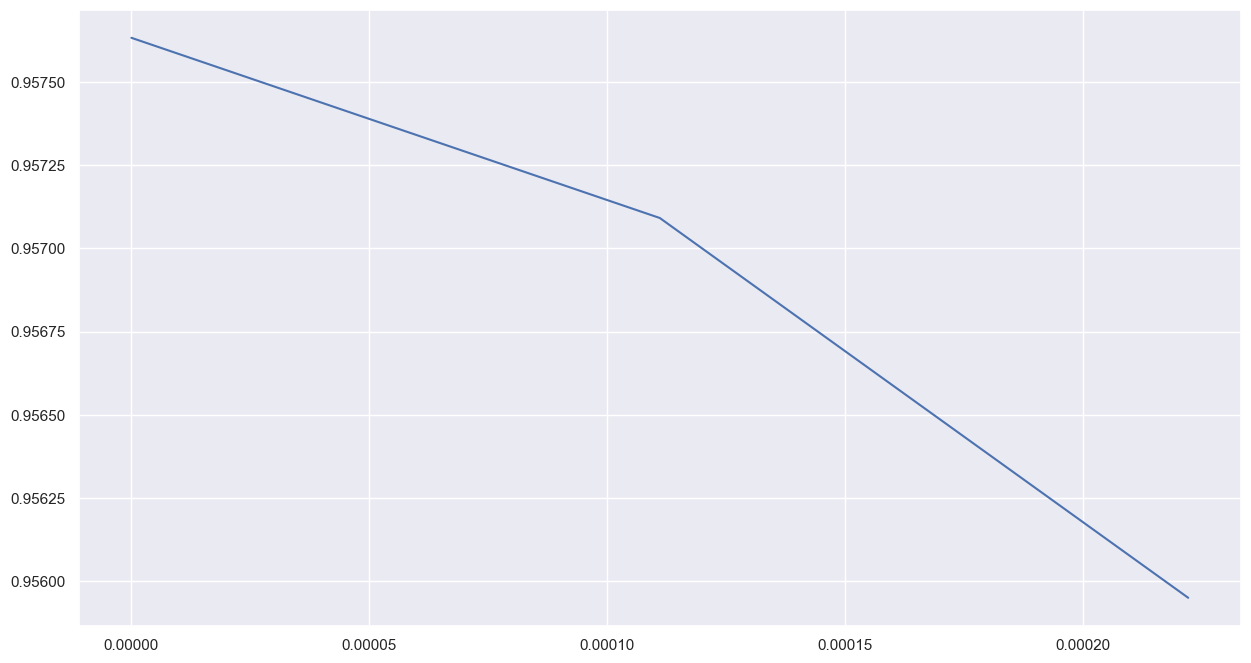

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0003333333333333334 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9555833339691162 0.9524999856948853
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0003333333333333334 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9558333158493042 0.9544000029563904
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0003333333333333334 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9538333415985107 0.9555000066757202
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noi

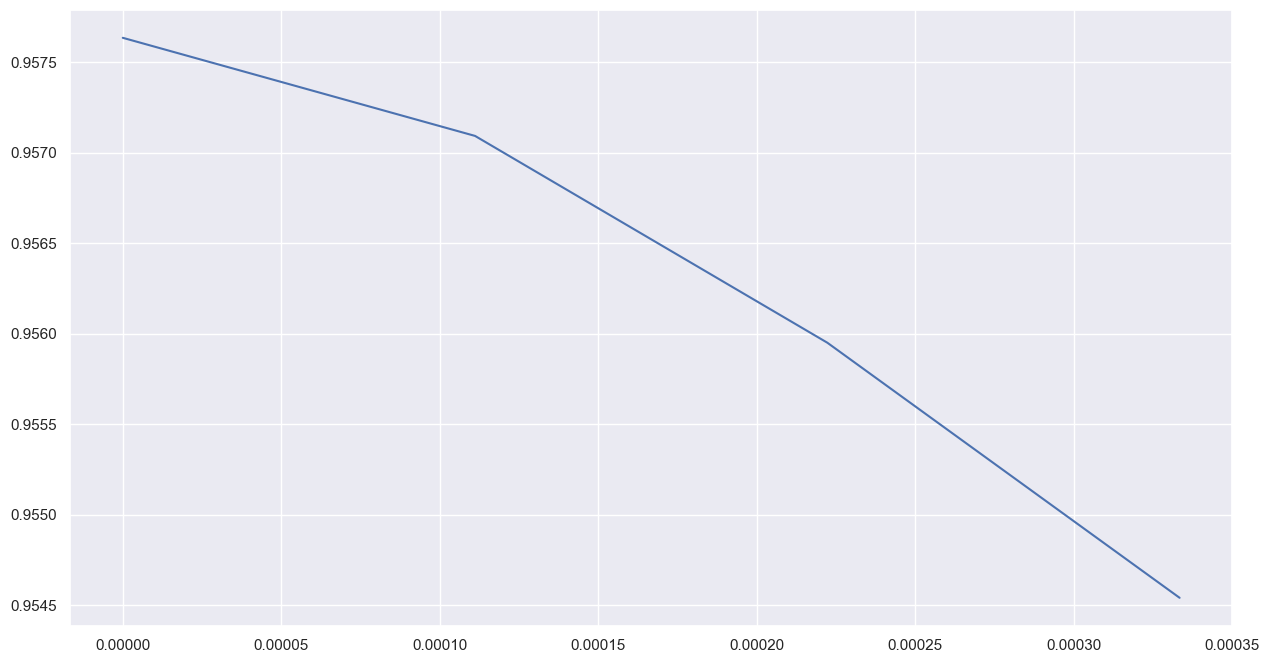

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00044444444444444447 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9539166688919067 0.9538000226020813
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00044444444444444447 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9542499780654907 0.9527999758720398
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.00044444444444444447 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9535833597183228 0.9538999795913696
20

loss_noise: 0.0 , activation_noise: 0.0 , input_

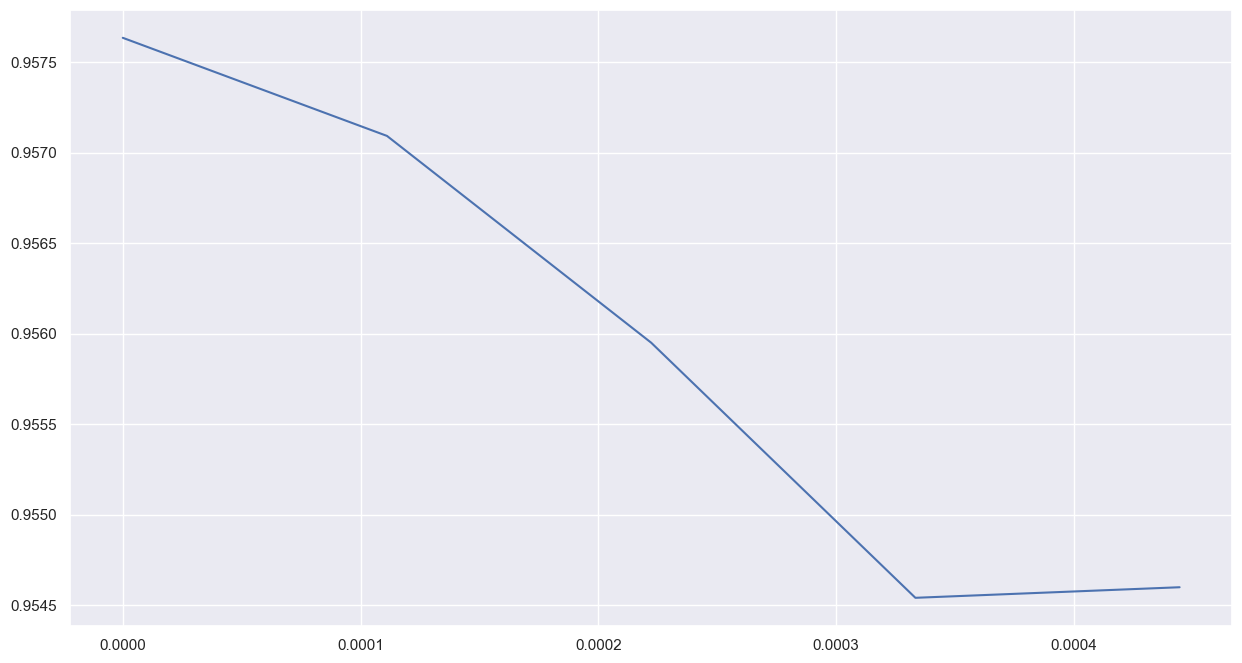

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0005555555555555556 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549166560173035 0.9496999979019165
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0005555555555555556 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.953499972820282 0.9538999795913696
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0005555555555555556 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9509166479110718 0.9466000199317932
20

loss_noise: 0.0 , activation_noise: 0.0 , input_nois

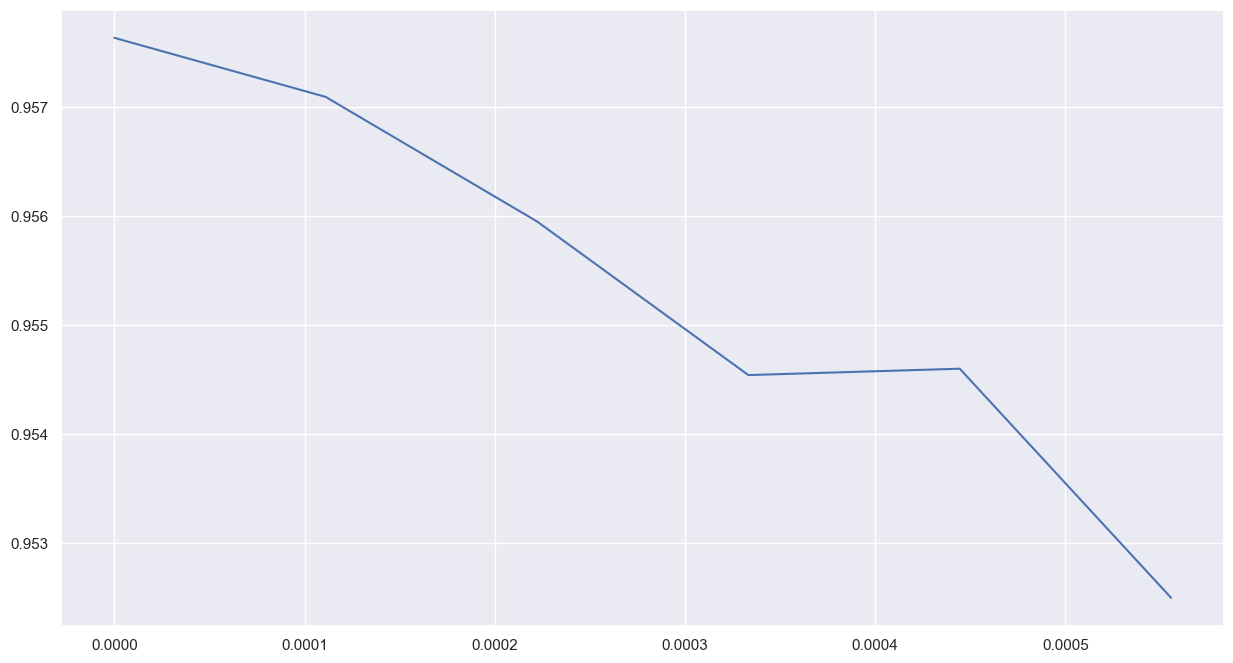

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0006666666666666668 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.950083315372467 0.9509000182151794
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0006666666666666668 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9505000114440918 0.95169997215271
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0006666666666666668 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9555833339691162 0.9564999938011169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise:

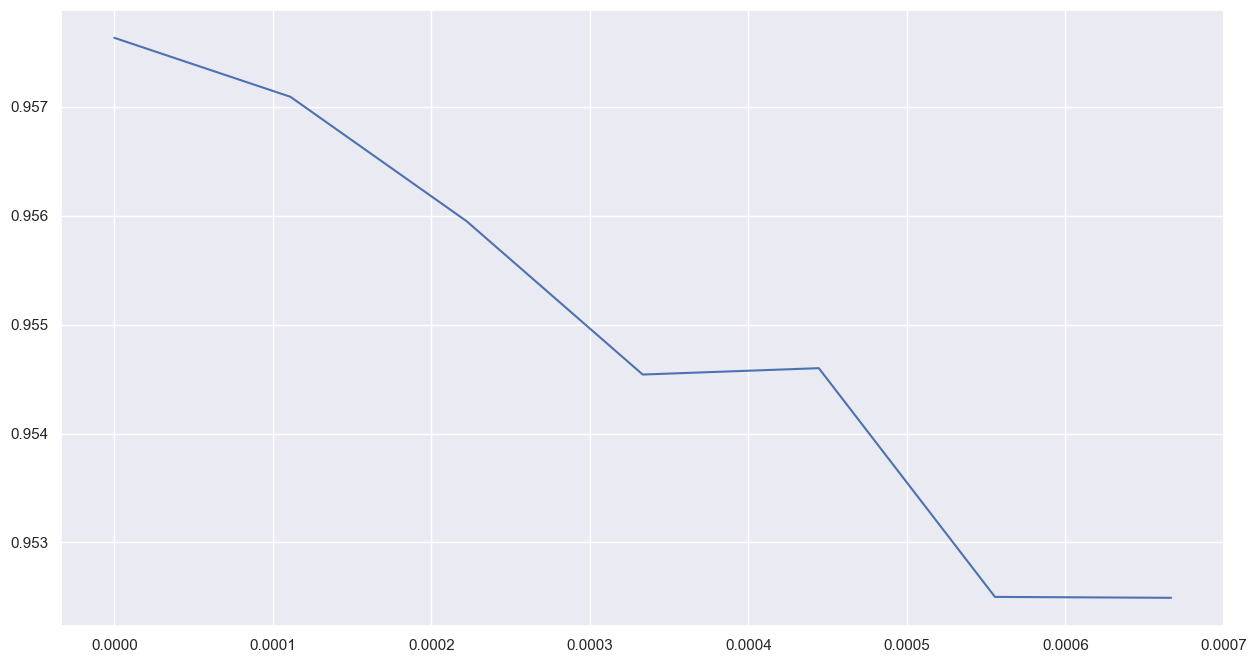

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0007777777777777778 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9514999985694885 0.9513000249862671
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0007777777777777778 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9518333077430725 0.9498000144958496
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0007777777777777778 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.949833333492279 0.947700023651123
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise

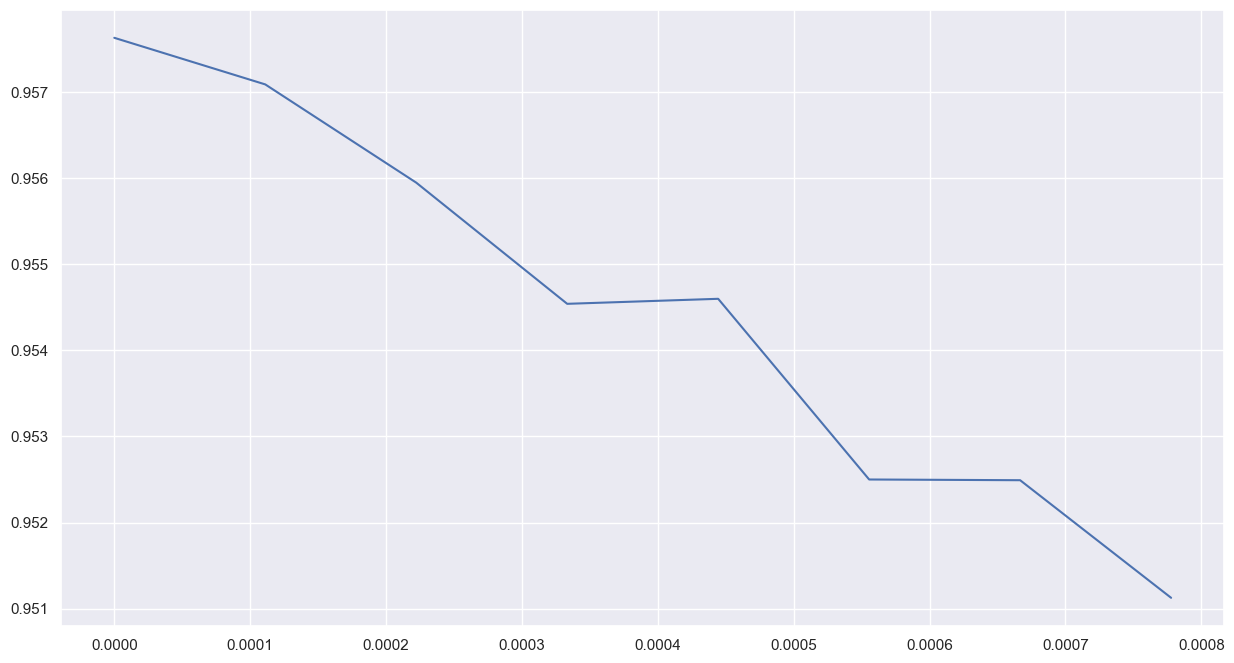

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0008888888888888889 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9462500214576721 0.9469000101089478
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0008888888888888889 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9465833306312561 0.9438999891281128
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0008888888888888889 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9496666789054871 0.9520999789237976
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noi

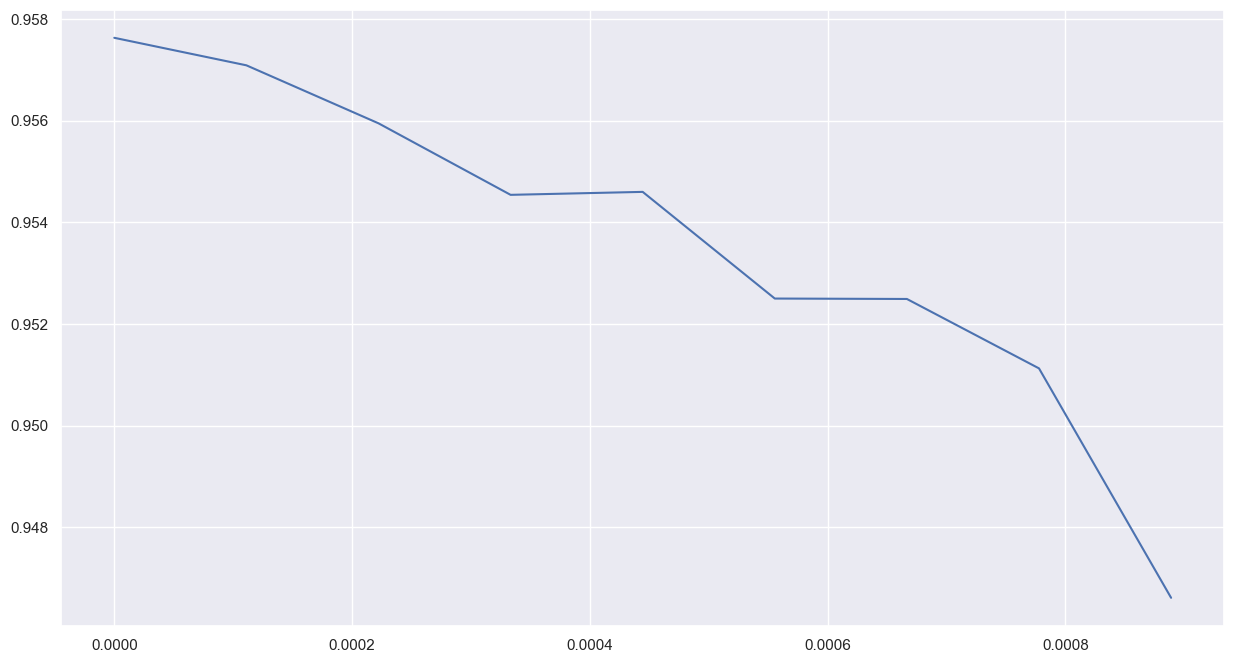

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.001 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9477499723434448 0.9480000138282776
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.001 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9440000057220459 0.9409999847412109
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.001 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9476666450500488 0.9452999830245972
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0

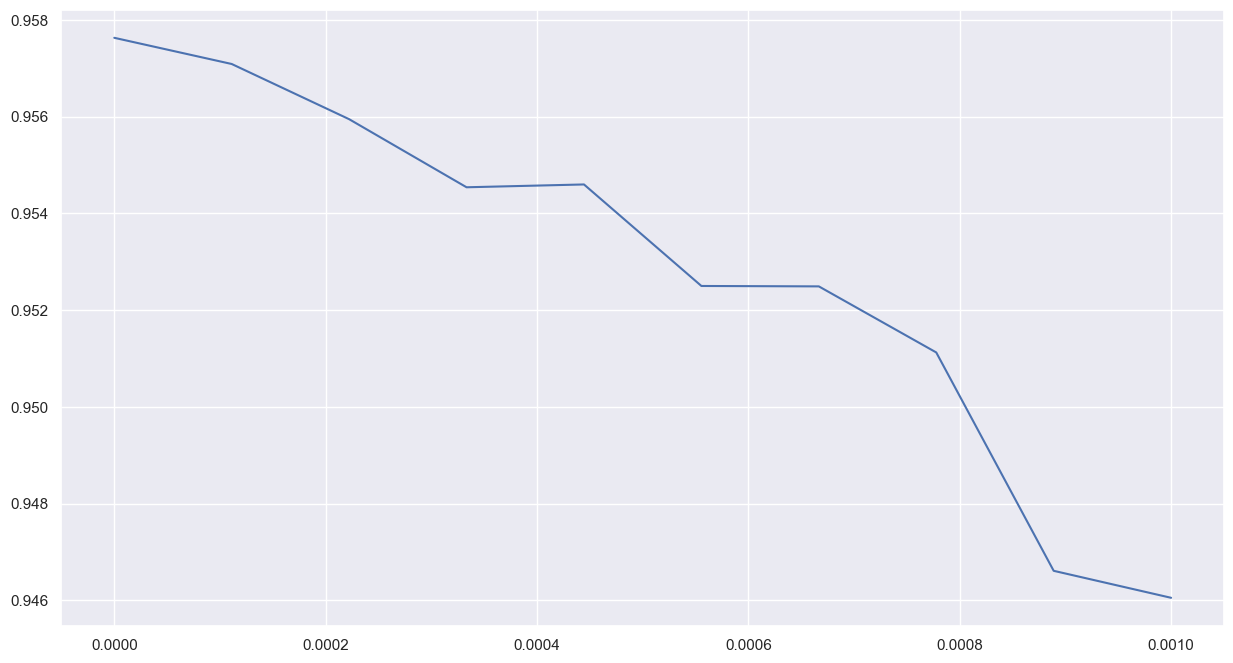

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9577500224113464 0.9556000232696533
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9566666483879089 0.9524000287055969
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574166536331177 0.9573000073432922
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

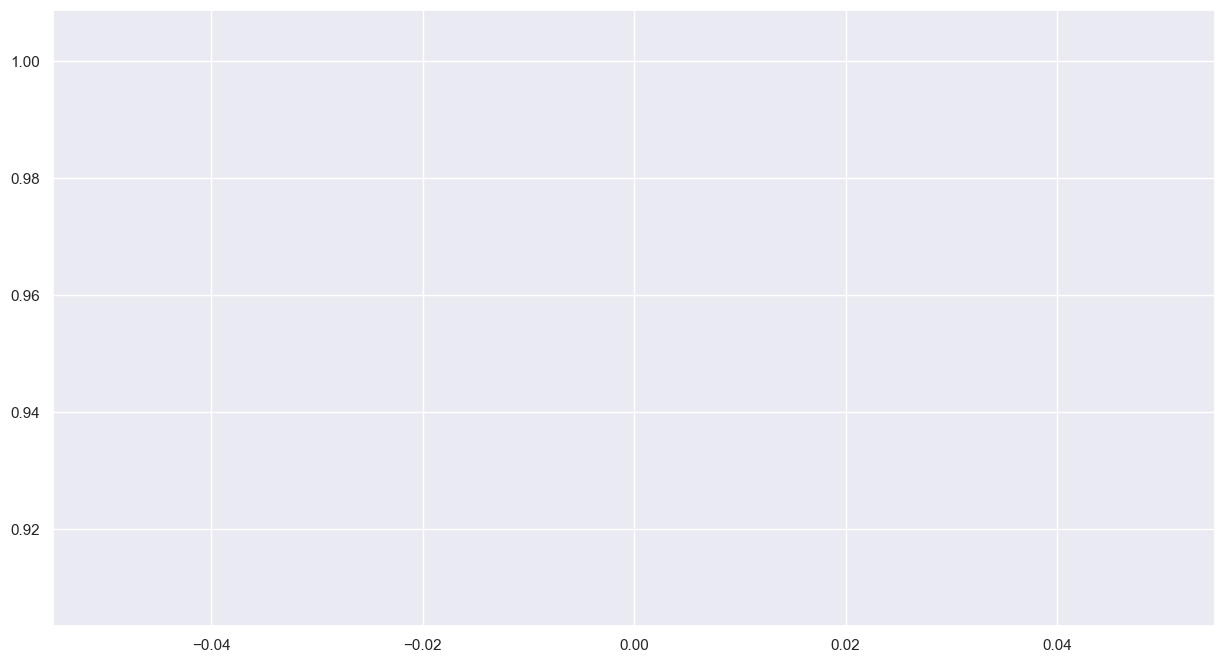

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.05555555555555555 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9580833315849304 0.9549999833106995
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.05555555555555555 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9602500200271606 0.9563999772071838
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.05555555555555555 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9555833339691162 0.9549000263214111
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

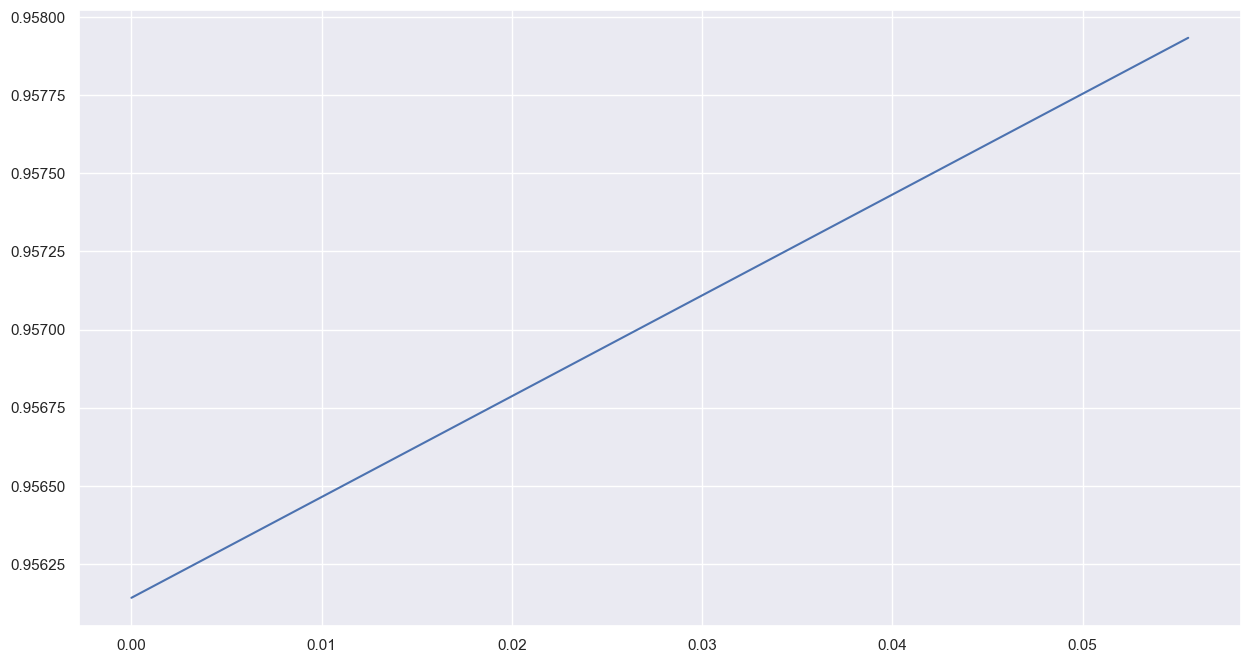

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.1111111111111111 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9580833315849304 0.9577999711036682
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.1111111111111111 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9555833339691162 0.9521999955177307
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.1111111111111111 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9575833082199097 0.9545000195503235
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

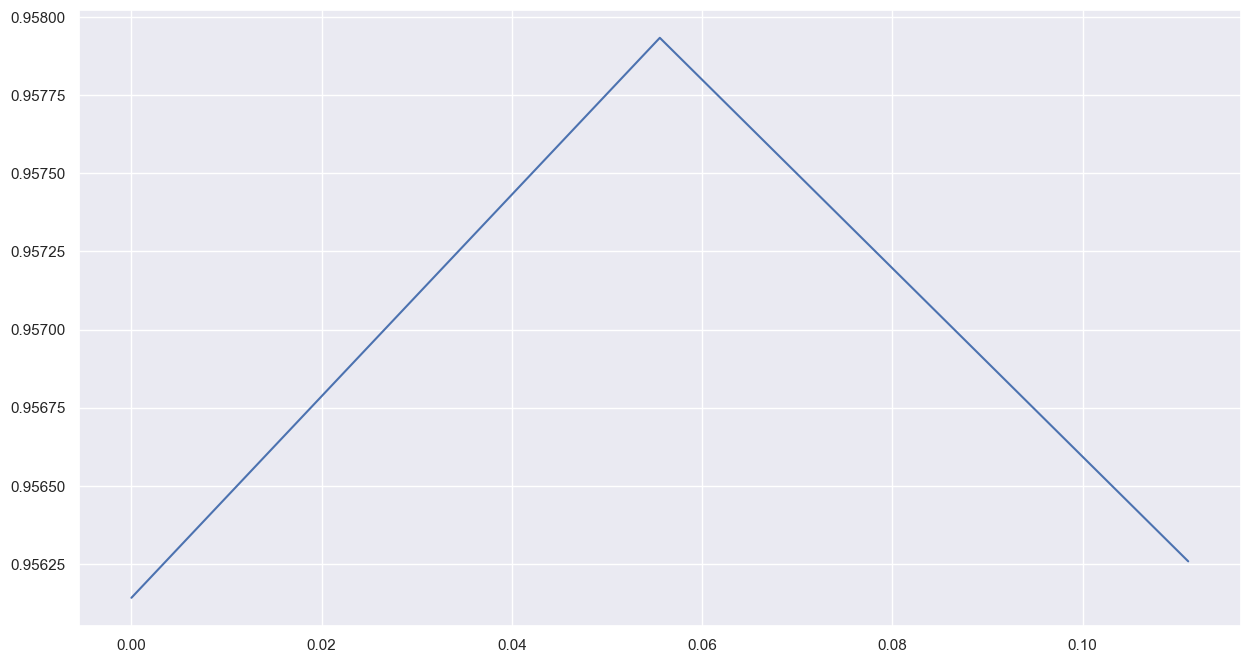

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.16666666666666666 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9545833468437195 0.9545000195503235
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.16666666666666666 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9559999704360962 0.9539999961853027
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.16666666666666666 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9567499756813049 0.9534000158309937
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

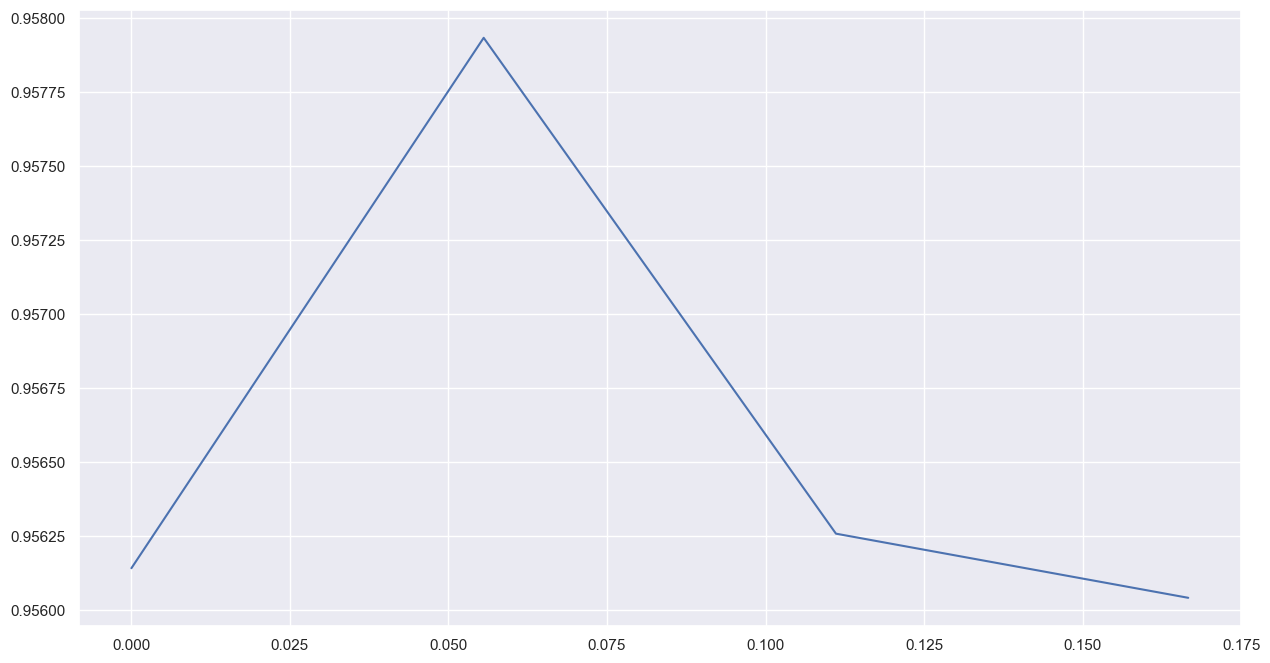

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2222222222222222 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956250011920929 0.9552000164985657
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2222222222222222 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9547500014305115 0.9545000195503235
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2222222222222222 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9526666402816772 0.9496999979019165
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , 

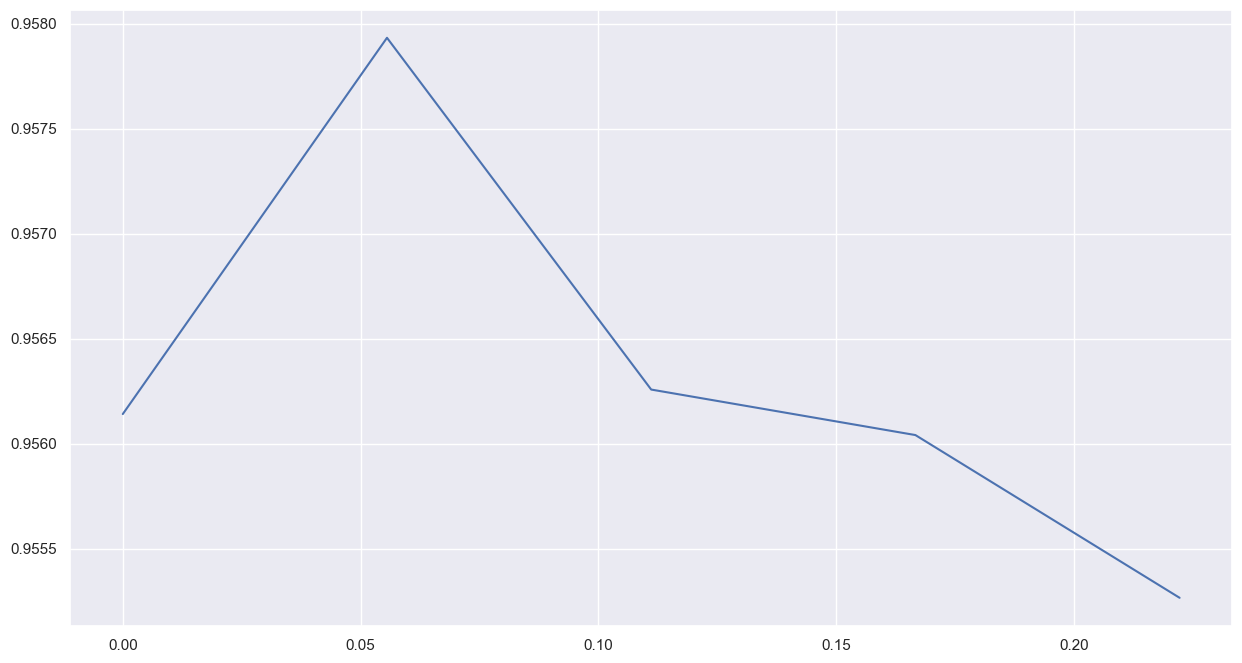

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2777777777777778 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9542499780654907 0.9556999802589417
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2777777777777778 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9542499780654907 0.9524999856948853
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2777777777777778 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9569166898727417 0.9545000195503235
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

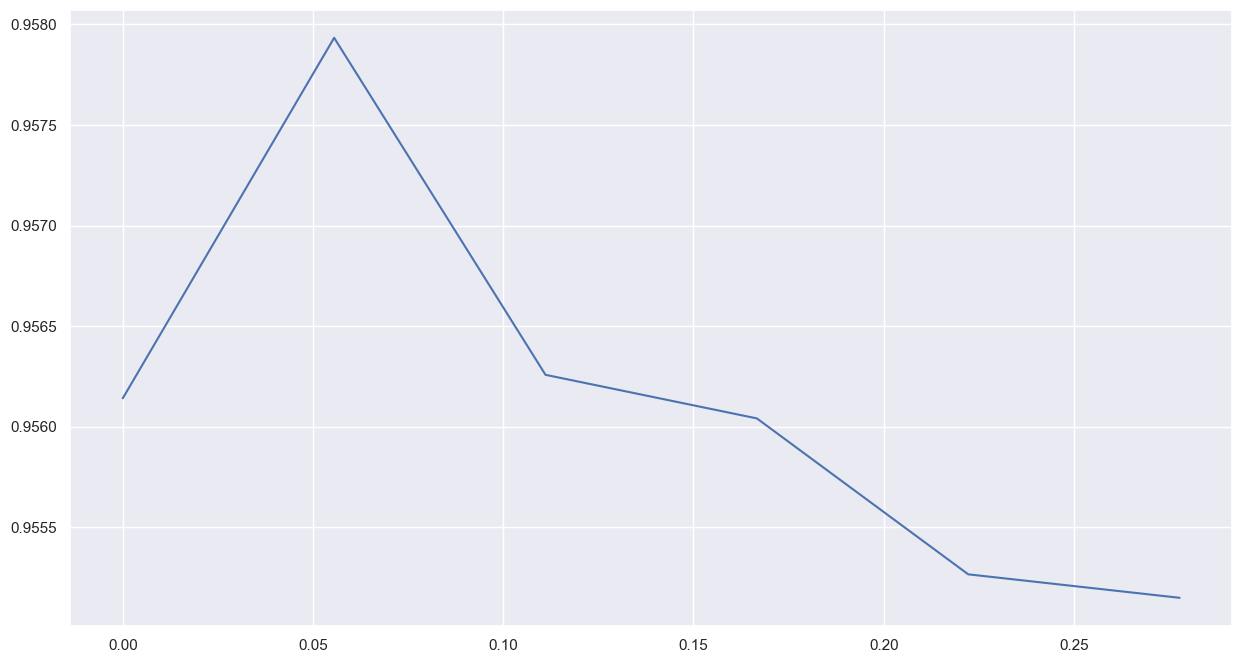

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.3333333333333333 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9537500143051147 0.9527999758720398
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.3333333333333333 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9544166922569275 0.9524999856948853
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.3333333333333333 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9553333520889282 0.9527999758720398
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

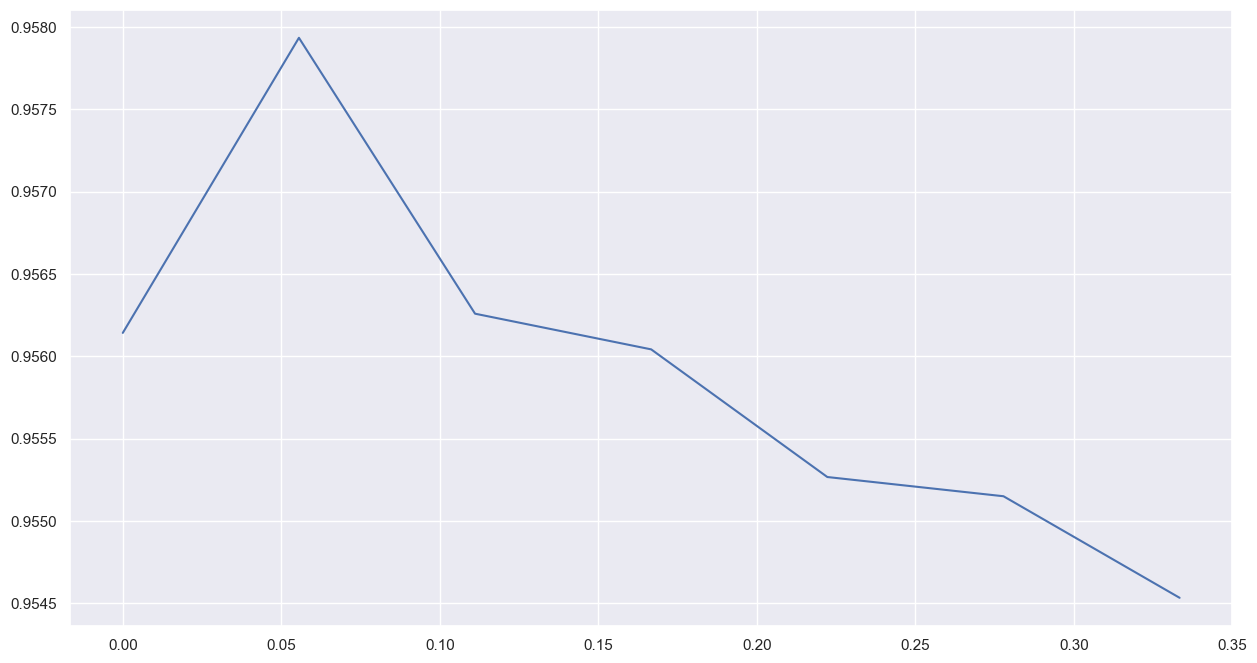

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.38888888888888884 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9566666483879089 0.9545999765396118
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.38888888888888884 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9539999961853027 0.9521999955177307
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.38888888888888884 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9514166712760925 0.9488999843597412
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

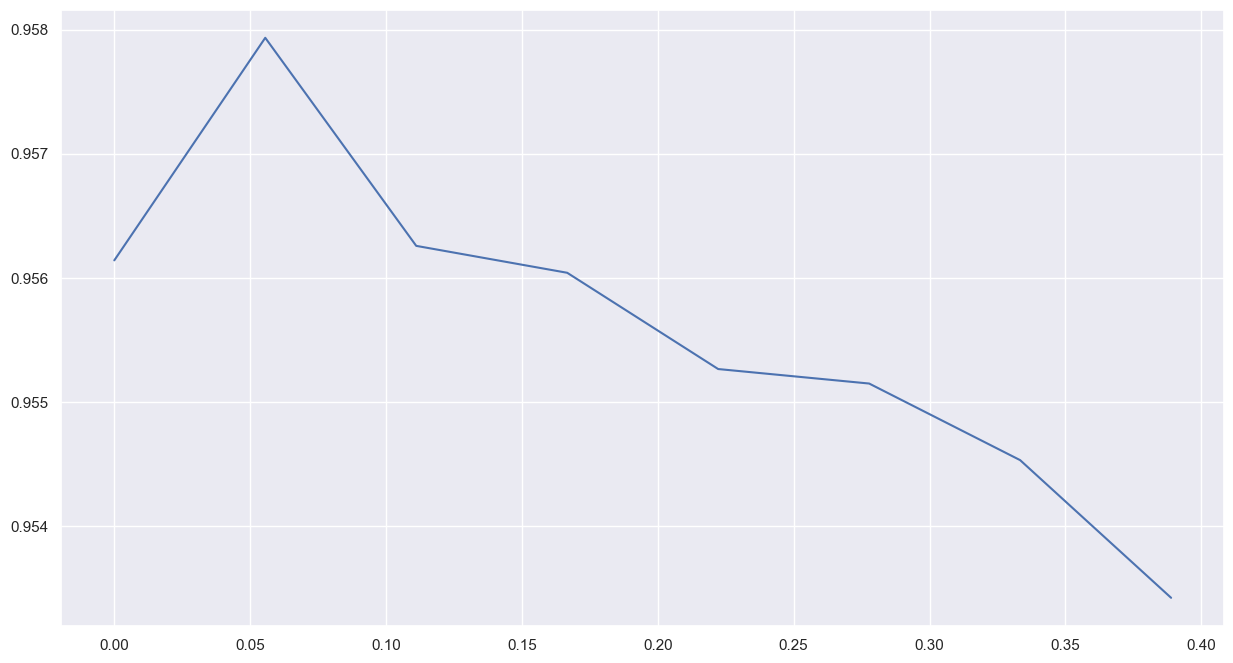

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.4444444444444444 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9514999985694885 0.951200008392334
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.4444444444444444 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.953000009059906 0.9491000175476074
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.4444444444444444 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9516666531562805 0.9498000144958496
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

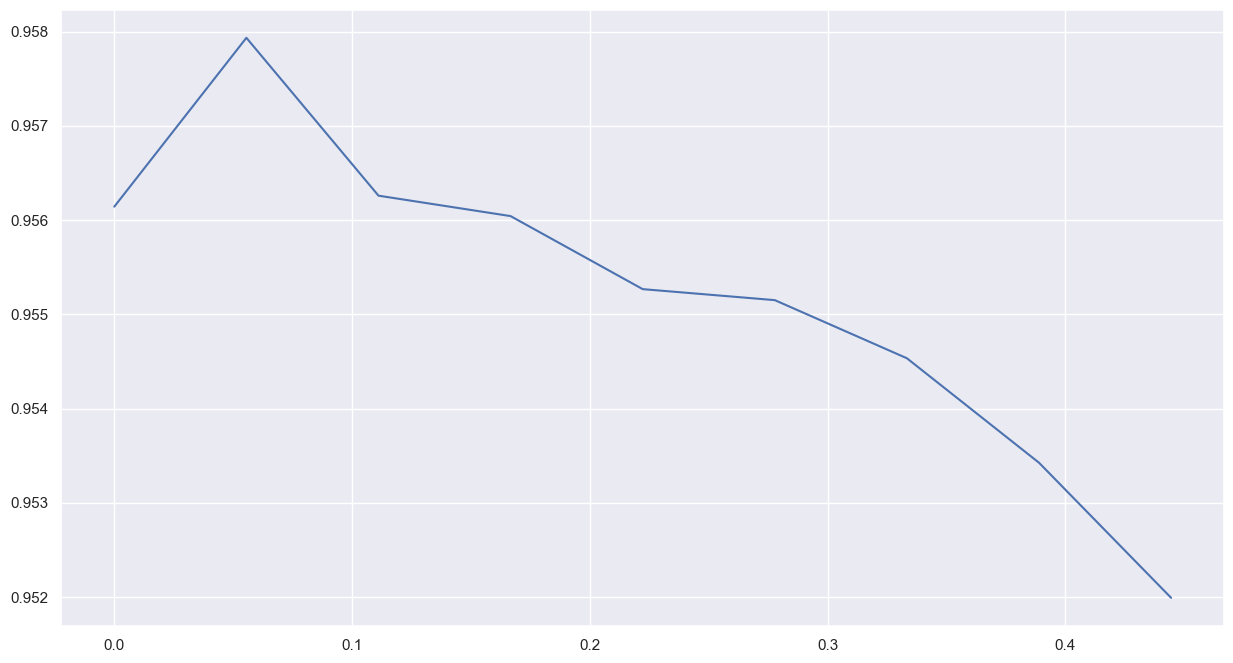

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.5 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.949833333492279 0.9472000002861023
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.5 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9495000243186951 0.9455000162124634
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.5 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9555000066757202 0.9524999856948853
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

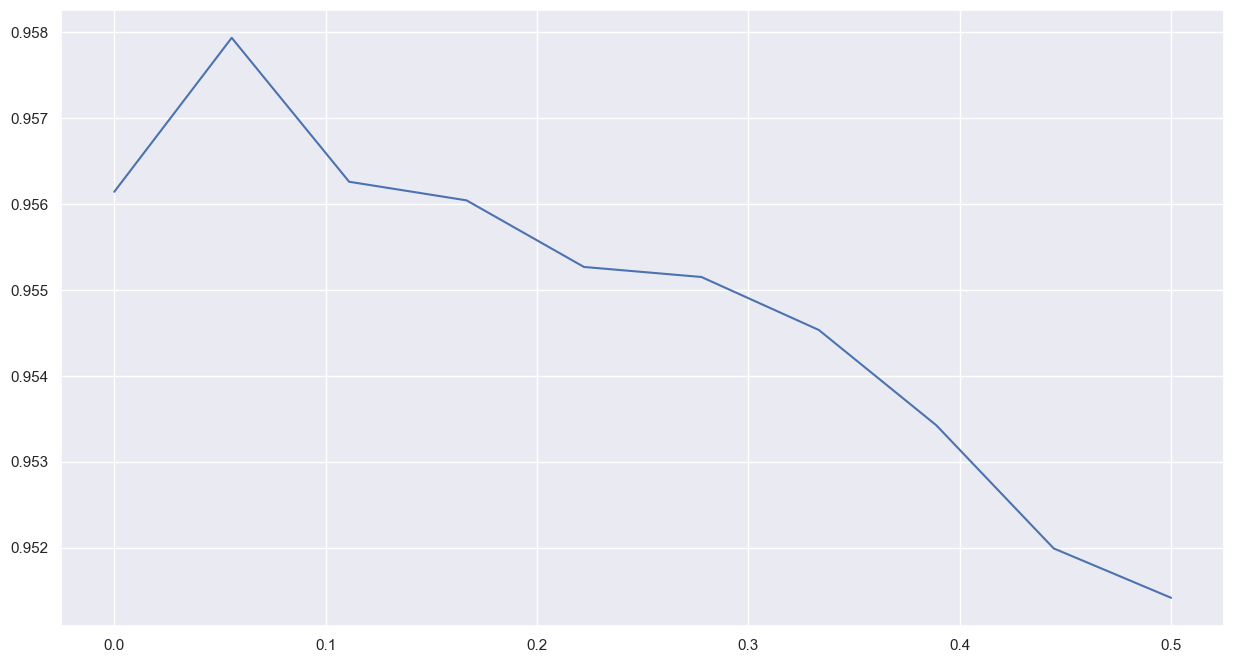

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549166560173035 0.9550999999046326
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9572499990463257 0.9550999999046326
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956250011920929 0.9545999765396118
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

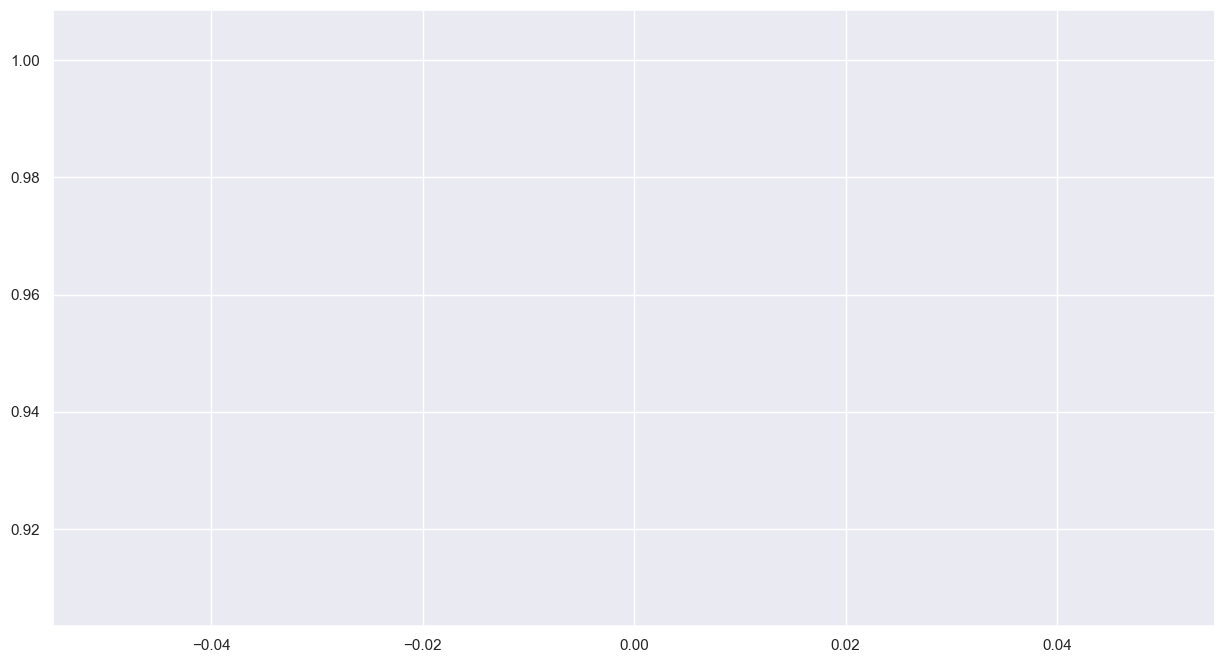

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.05555555555555555 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9614166617393494 0.9613000154495239
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.05555555555555555 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9613333344459534 0.9607999920845032
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.05555555555555555 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9623333215713501 0.9609000086784363
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

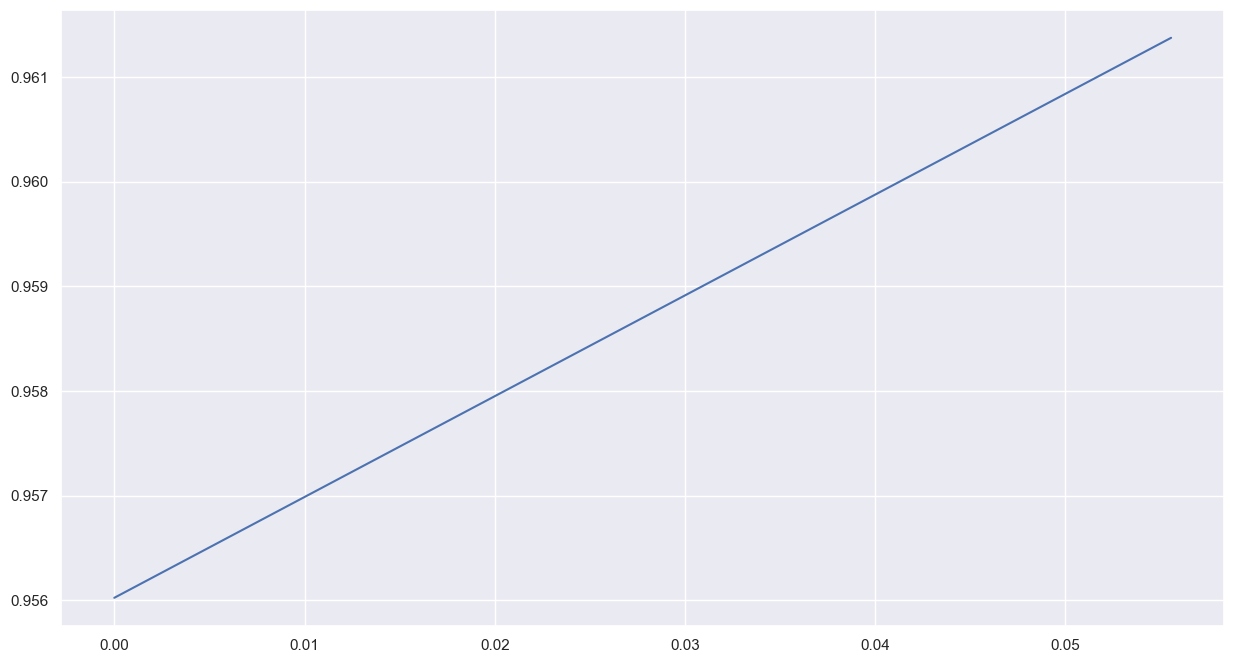

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.1111111111111111 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9632499814033508 0.9621000289916992
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.1111111111111111 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9609166383743286 0.9610999822616577
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.1111111111111111 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9629999995231628 0.9627000093460083
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

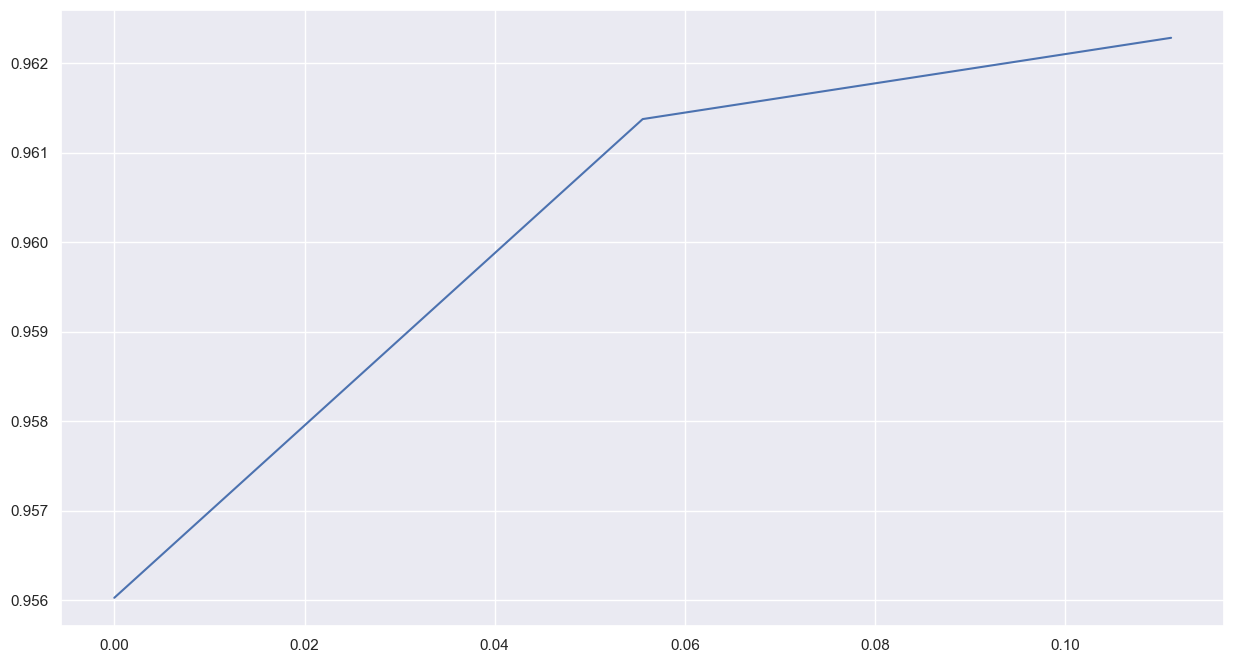

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.16666666666666666 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9621666669845581 0.9580000042915344
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.16666666666666666 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9609166383743286 0.9588000178337097
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.16666666666666666 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9620833396911621 0.9603999853134155
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

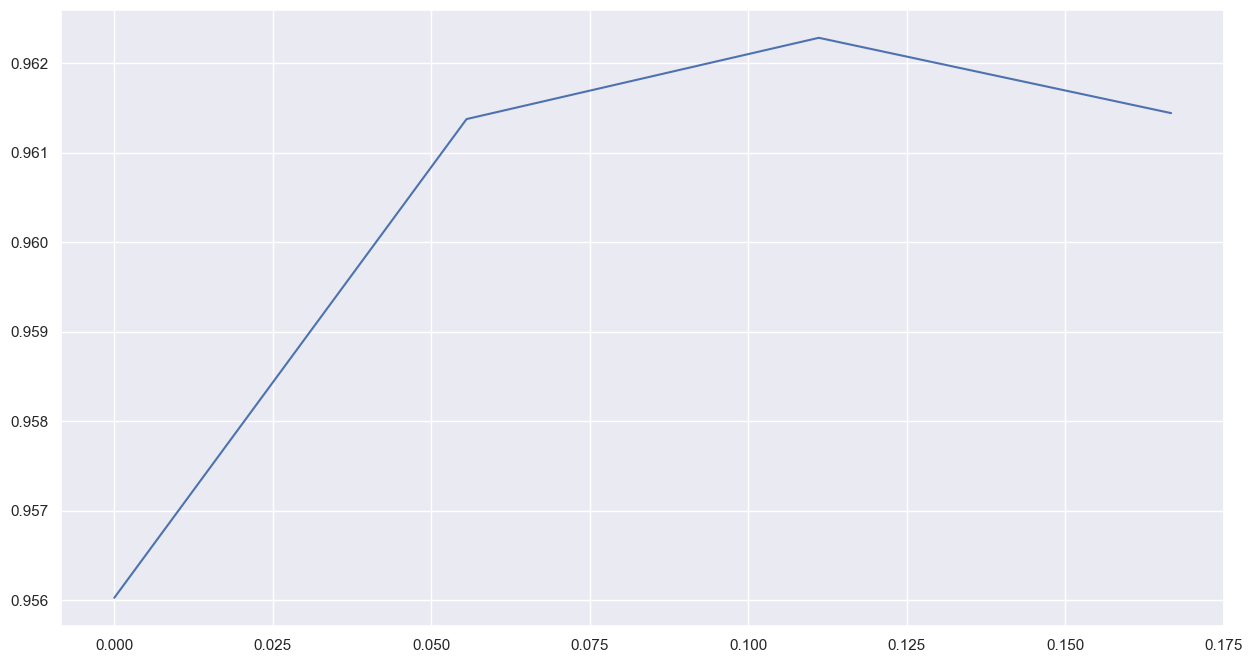

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.2222222222222222 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9610000252723694 0.9599999785423279
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.2222222222222222 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9621666669845581 0.9599999785423279
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.2222222222222222 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9585833549499512 0.9560999870300293
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

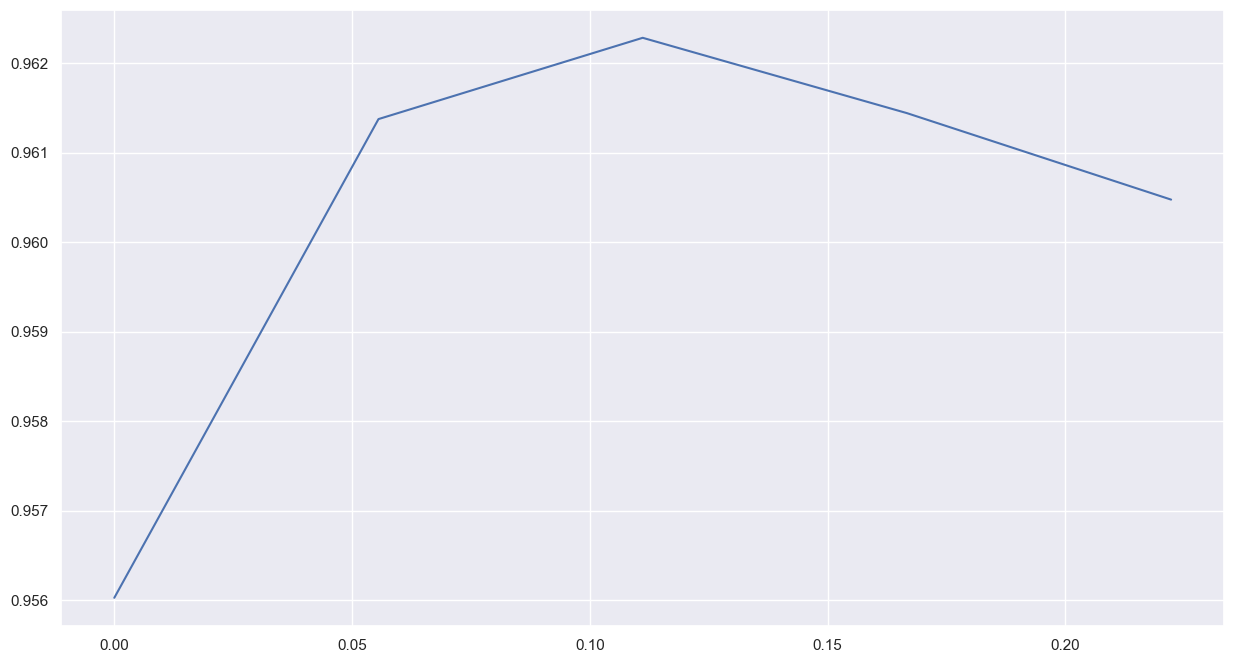

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.2777777777777778 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9587500095367432 0.9575999975204468
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.2777777777777778 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.9556999802589417
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.2777777777777778 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9585833549499512 0.9549000263214111
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

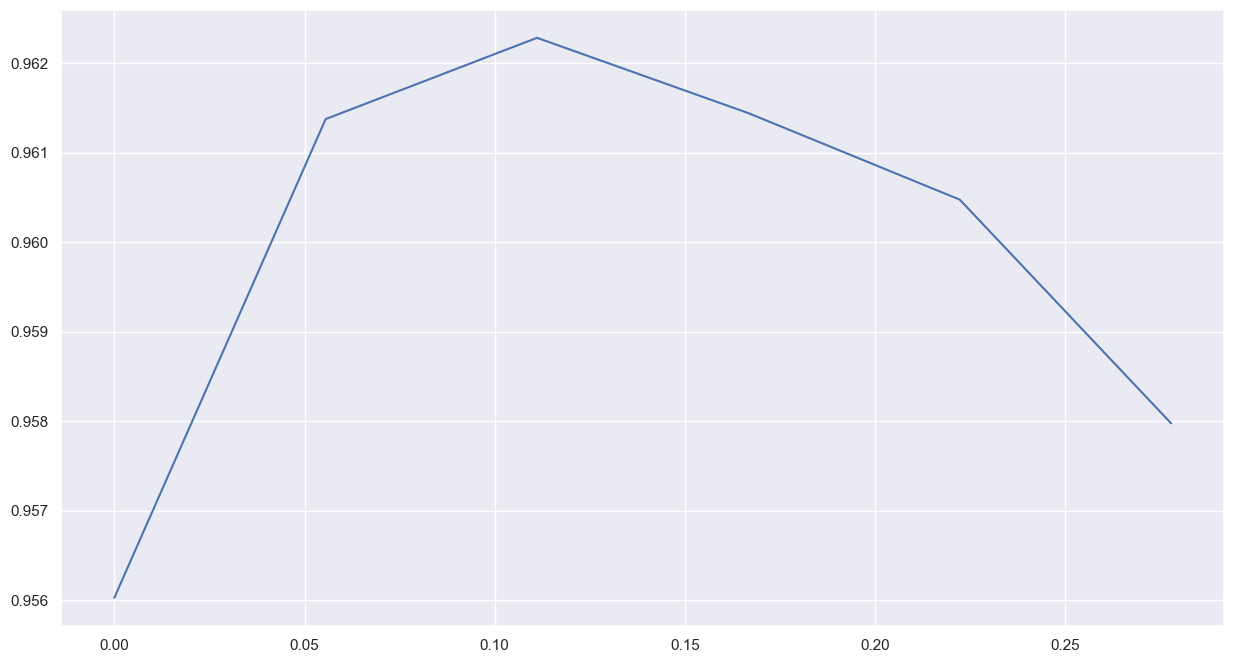

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.3333333333333333 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9535833597183228 0.9517999887466431
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.3333333333333333 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9516666531562805 0.9520999789237976
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.3333333333333333 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9535833597183228 0.9521999955177307
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

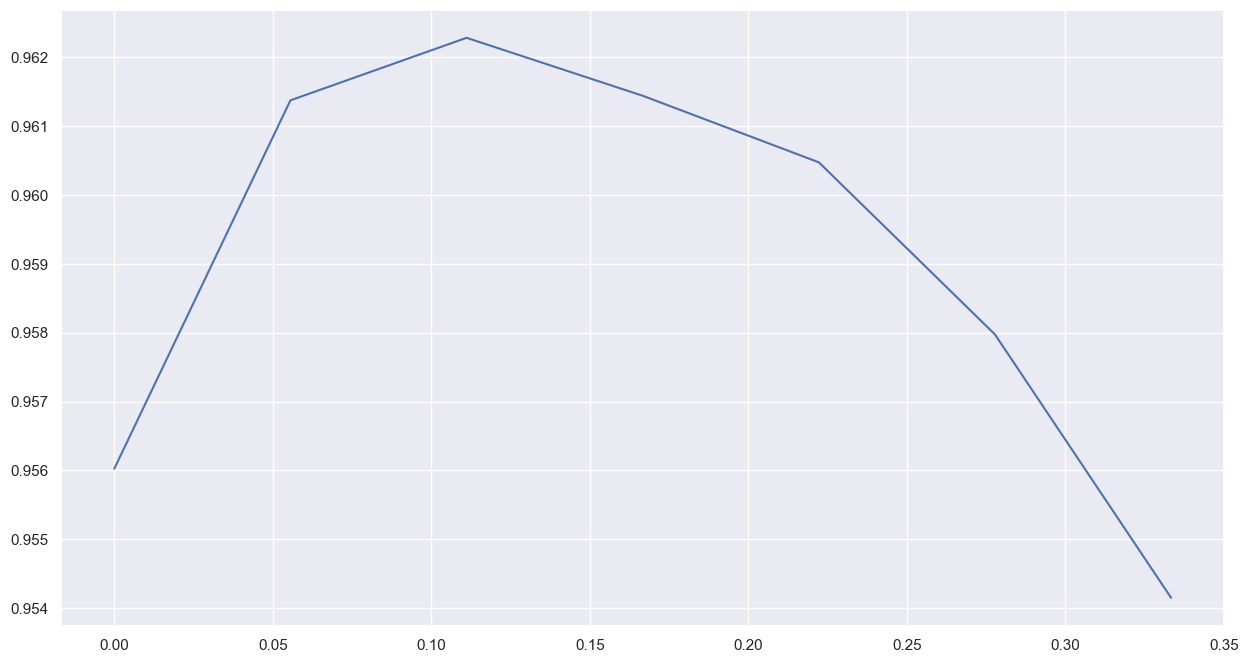

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.38888888888888884 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9493333101272583 0.9463000297546387
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.38888888888888884 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9495000243186951 0.9462000131607056
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.38888888888888884 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9510833621025085 0.9473000168800354
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

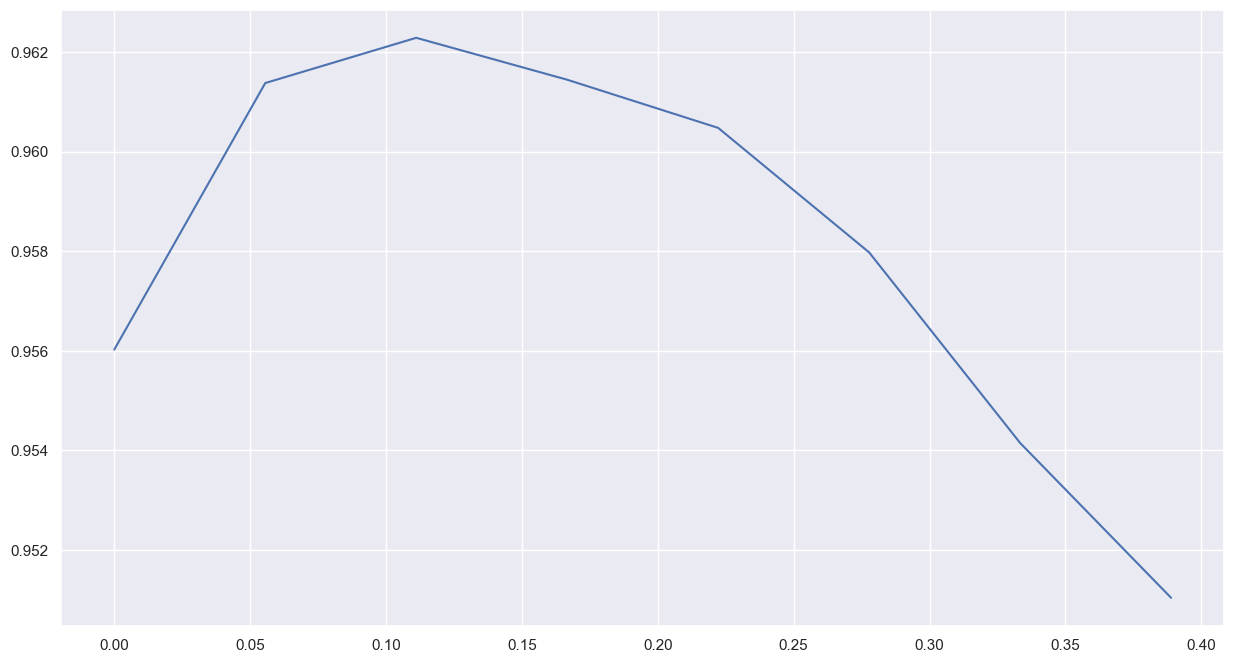

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.4444444444444444 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9481666684150696 0.9449999928474426
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.4444444444444444 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9486666917800903 0.9435999989509583
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.4444444444444444 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9485833048820496 0.9456999897956848
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

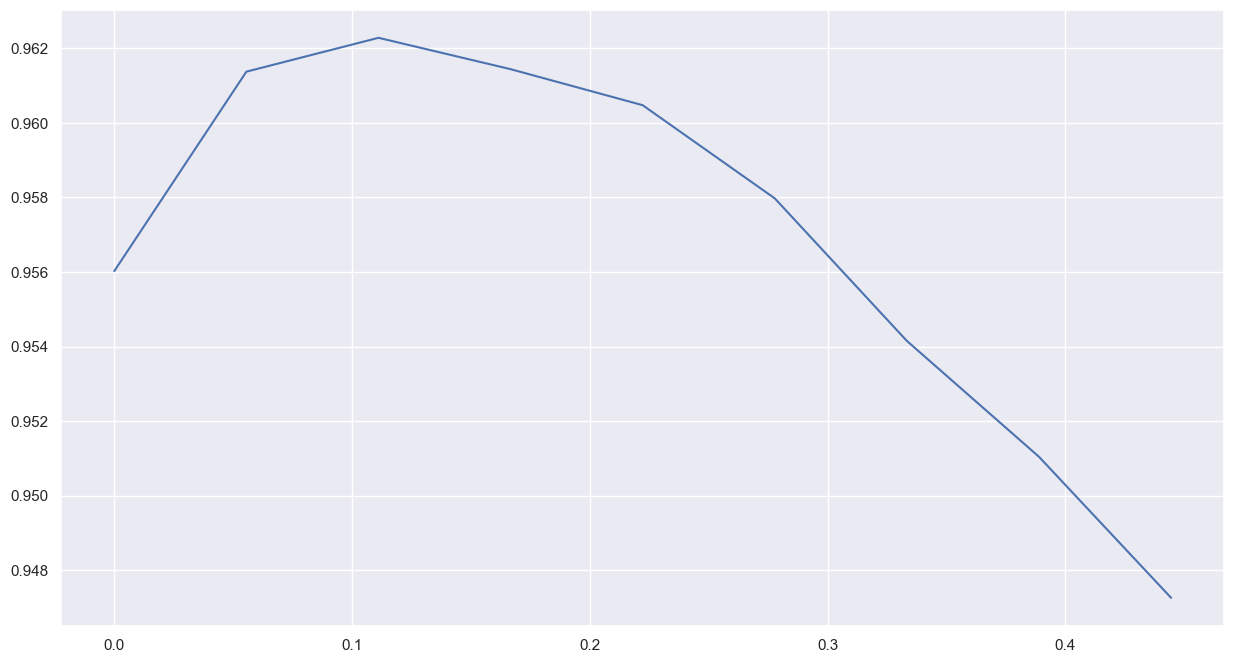

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.5 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9435833096504211 0.9398000240325928
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.5 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9430833458900452 0.9406999945640564
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.5 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9452499747276306 0.9438999891281128
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

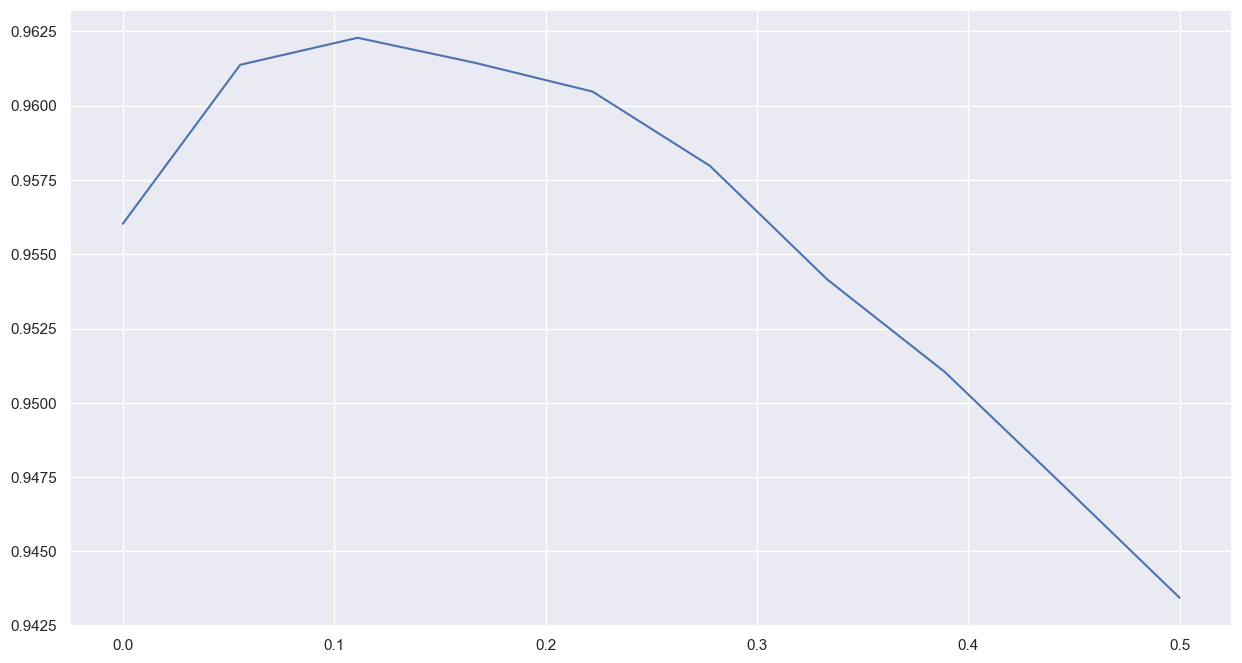

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9549166560173035 0.9534000158309937
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956166684627533 0.9556999802589417
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9582499861717224 0.9538000226020813
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

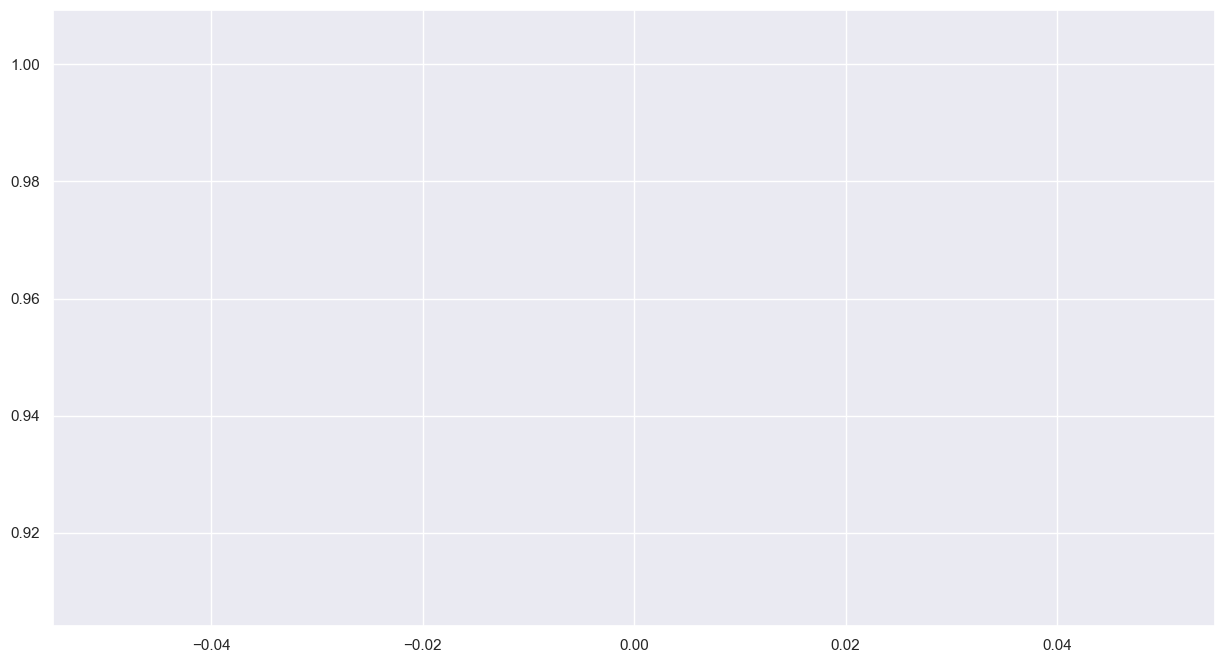

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.05555555555555555 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9613333344459534 0.9585000276565552
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.05555555555555555 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9594166874885559 0.9595000147819519
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.05555555555555555 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9587500095367432 0.9549999833106995
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

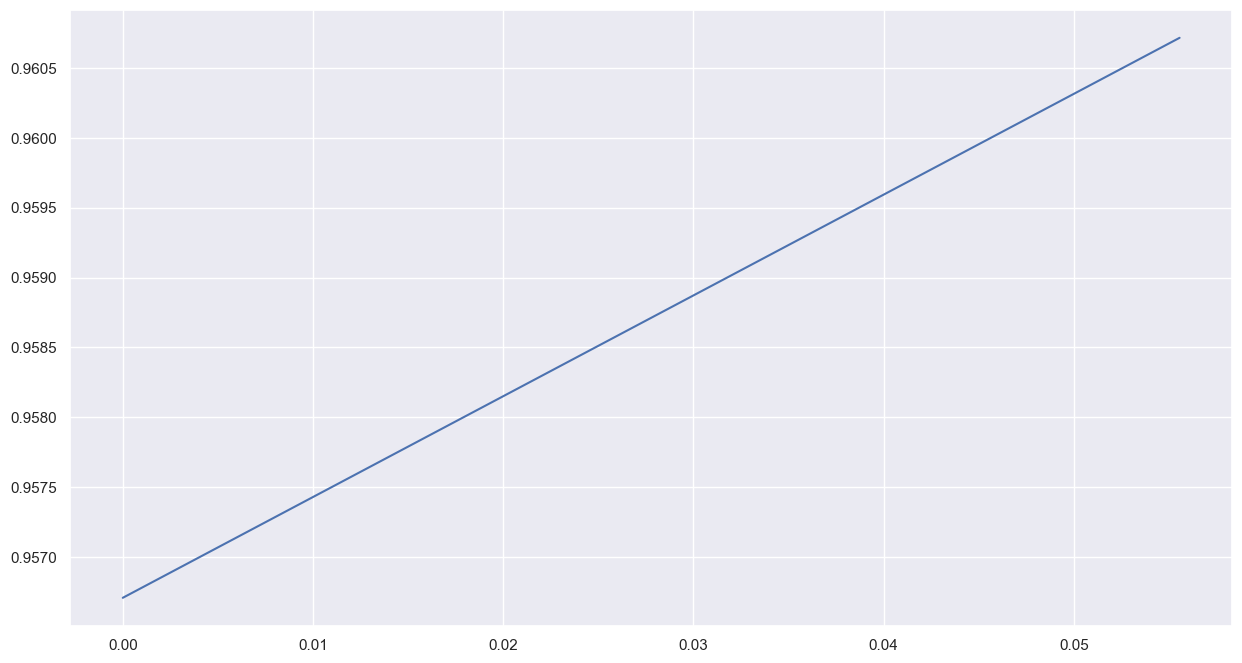

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.1111111111111111 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9593333601951599 0.9581999778747559
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.1111111111111111 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9618333578109741 0.958899974822998
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.1111111111111111 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9605833292007446 0.9595999717712402
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , 

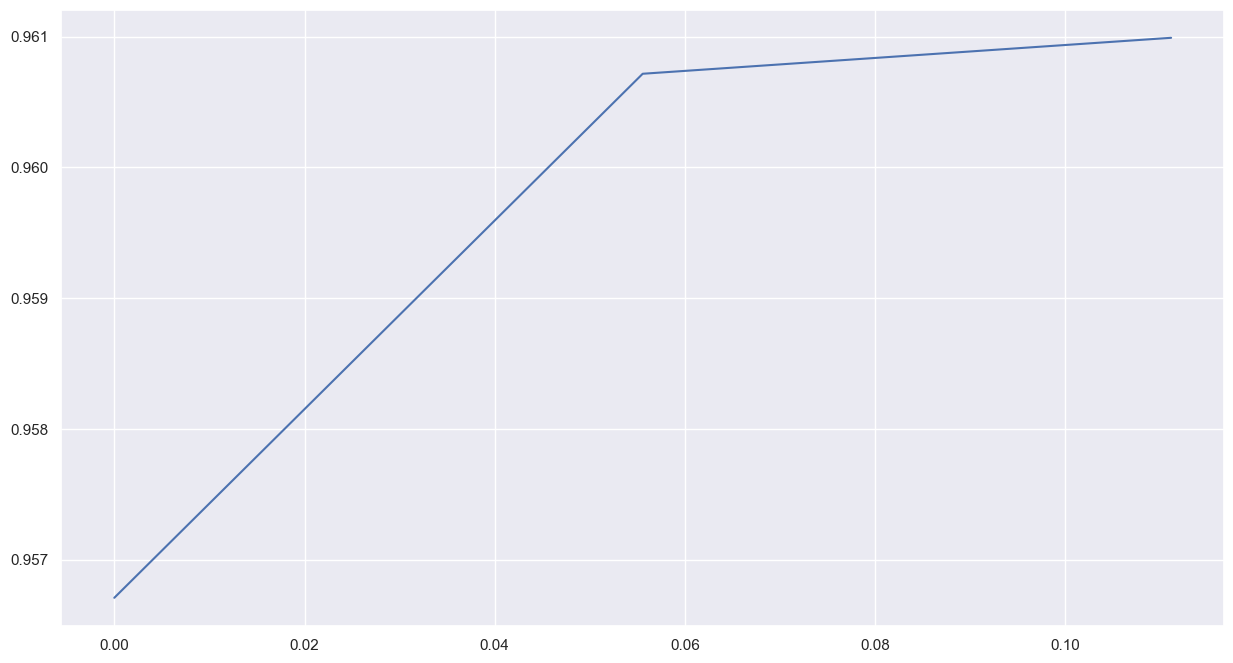

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.16666666666666666 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9597499966621399 0.9580000042915344
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.16666666666666666 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9589999914169312 0.9580000042915344
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.16666666666666666 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9587500095367432 0.9574000239372253
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

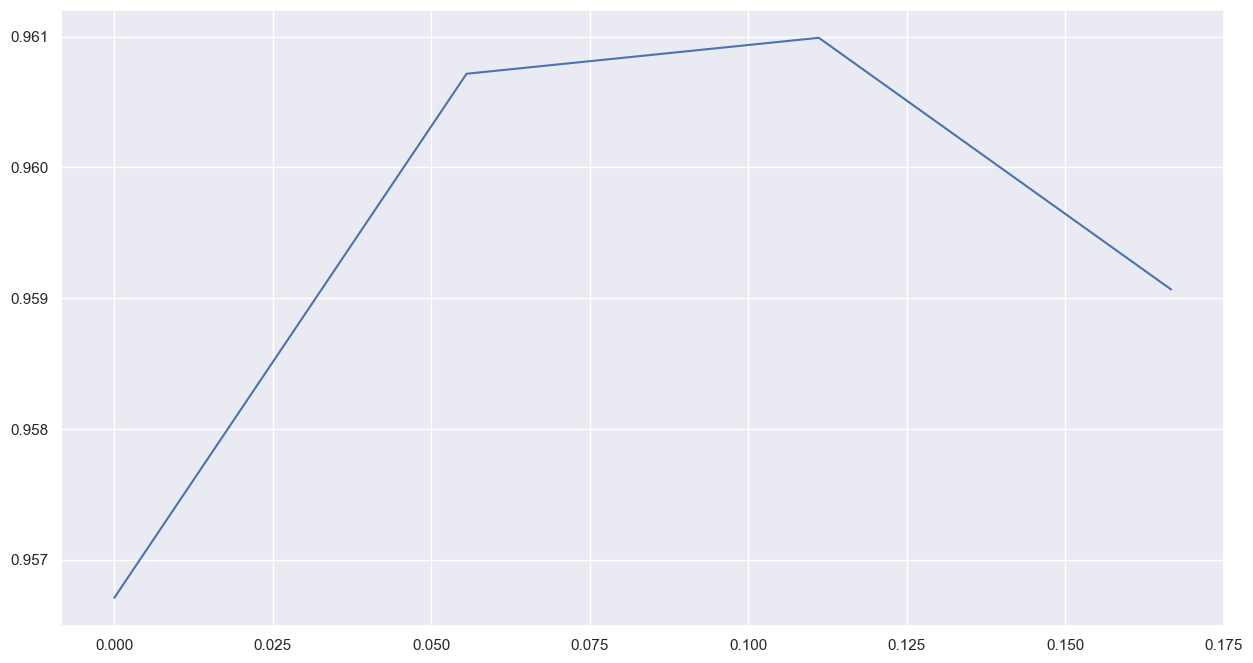

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.2222222222222222 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9574999809265137 0.954200029373169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.2222222222222222 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9584166407585144 0.9549000263214111
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.2222222222222222 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.954200029373169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

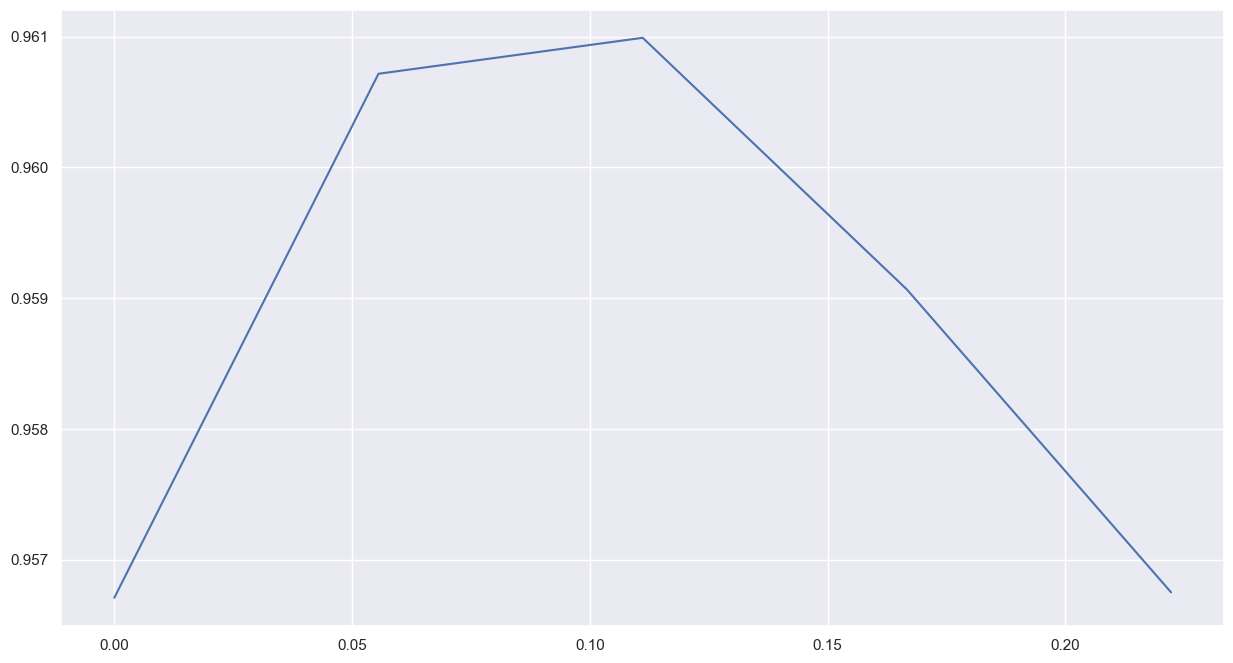

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.2777777777777778 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.953499972820282 0.9508000016212463
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.2777777777777778 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9539166688919067 0.9513000249862671
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.2777777777777778 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9541666507720947 0.948199987411499
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

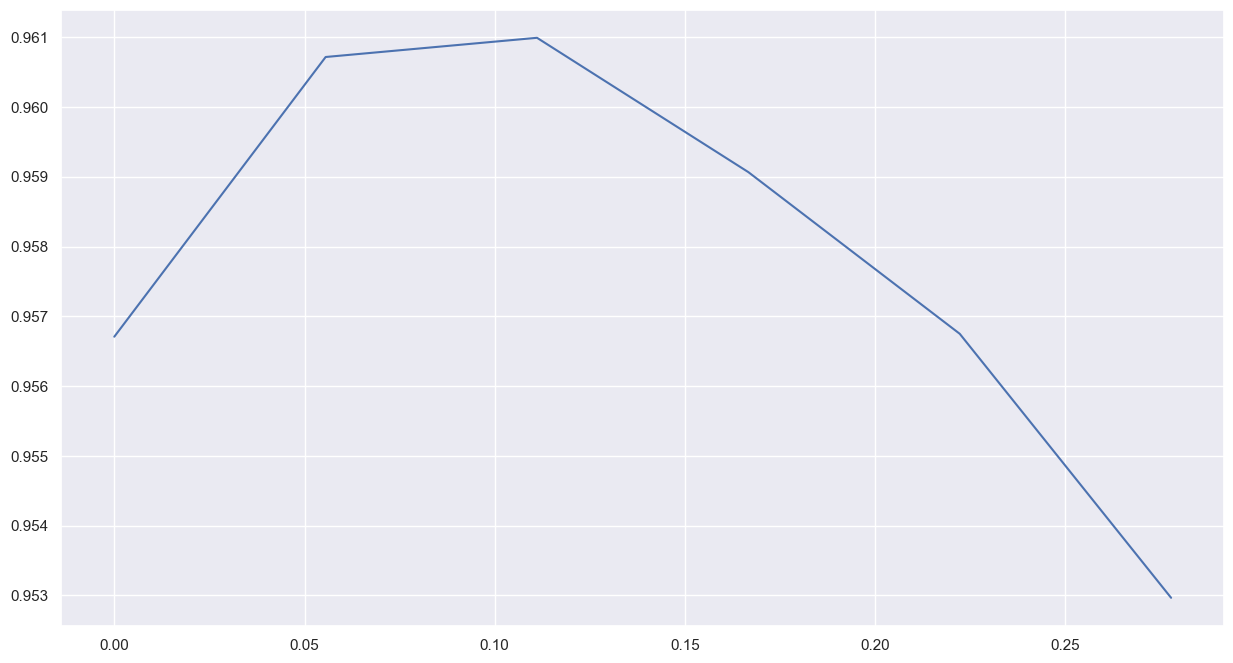

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.3333333333333333 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9477499723434448 0.9455999732017517
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.3333333333333333 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9479166865348816 0.9448000192642212
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.3333333333333333 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9454166889190674 0.9429000020027161
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

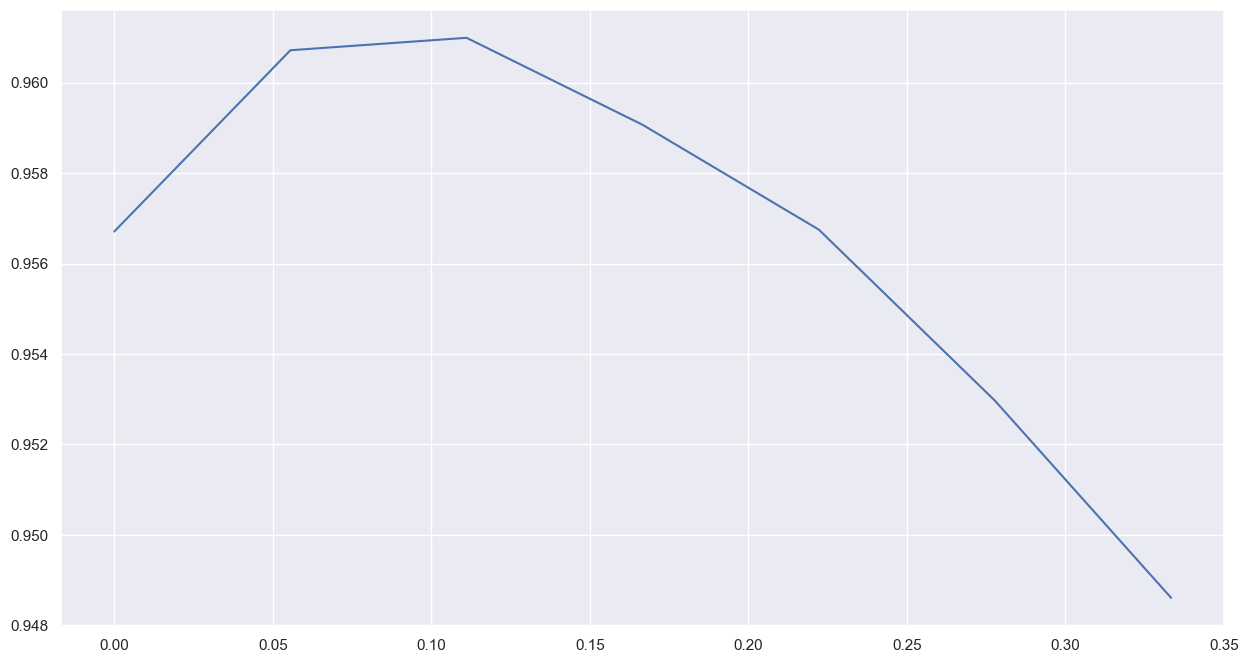

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.38888888888888884 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9418333172798157 0.9387999773025513
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.38888888888888884 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9427499771118164 0.9401999711990356
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.38888888888888884 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9440000057220459 0.9419000148773193
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

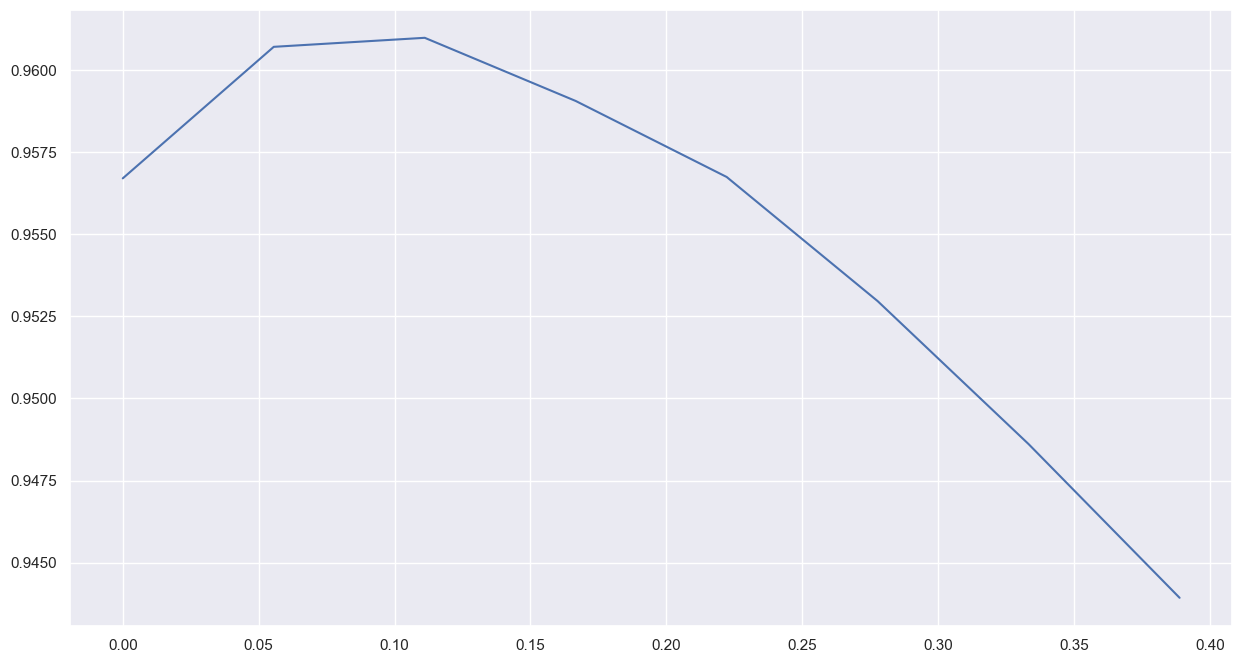

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.4444444444444444 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9310833215713501 0.928600013256073
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.4444444444444444 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9339166879653931 0.9319000244140625
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.4444444444444444 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9351666569709778 0.934499979019165
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

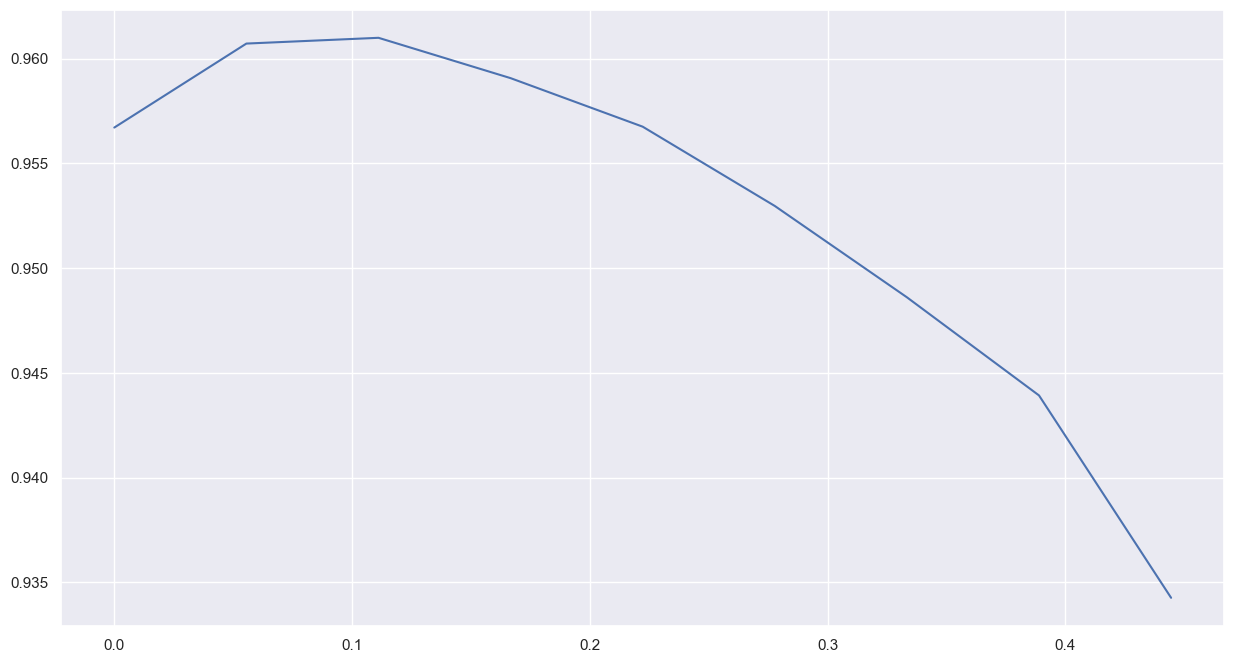

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.5 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9247499704360962 0.9204999804496765
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.5 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9247499704360962 0.9241999983787537
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.5 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9295833110809326 0.9286999702453613
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

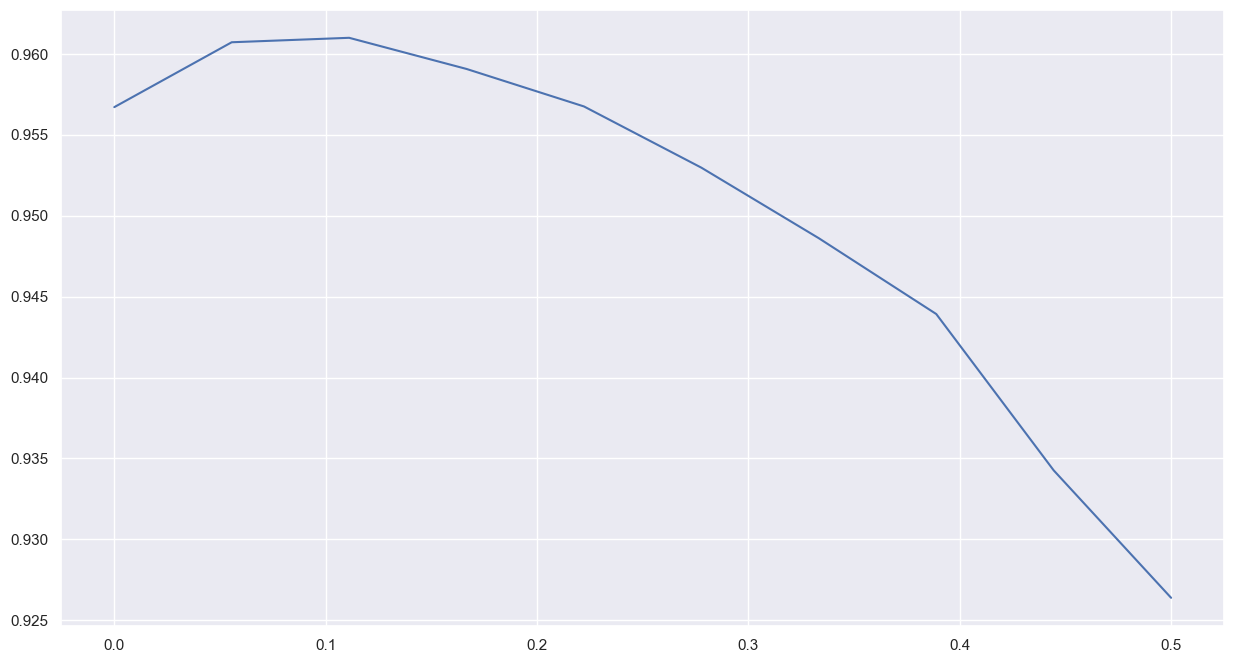

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9681666493415833 0.9678999781608582
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9680833220481873 0.9686999917030334
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.968583345413208 0.9668999910354614
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient

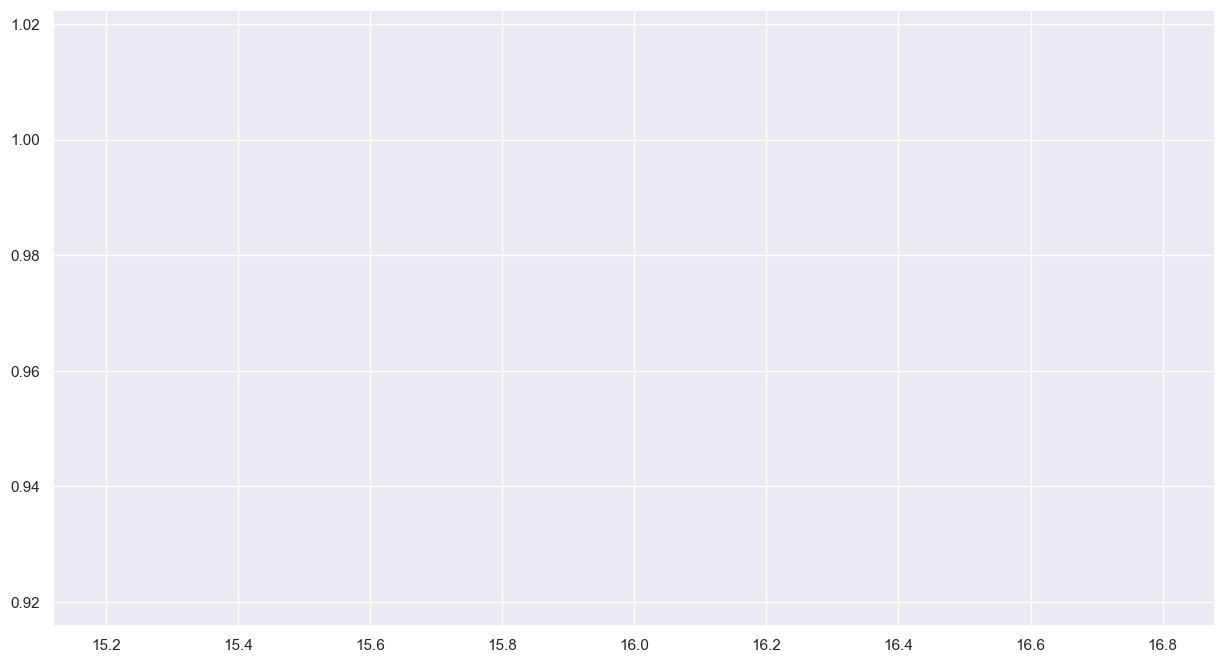

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9702500104904175 0.9681000113487244
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.968833327293396 0.9688000082969666
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9677500128746033 0.9656000137329102
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradi

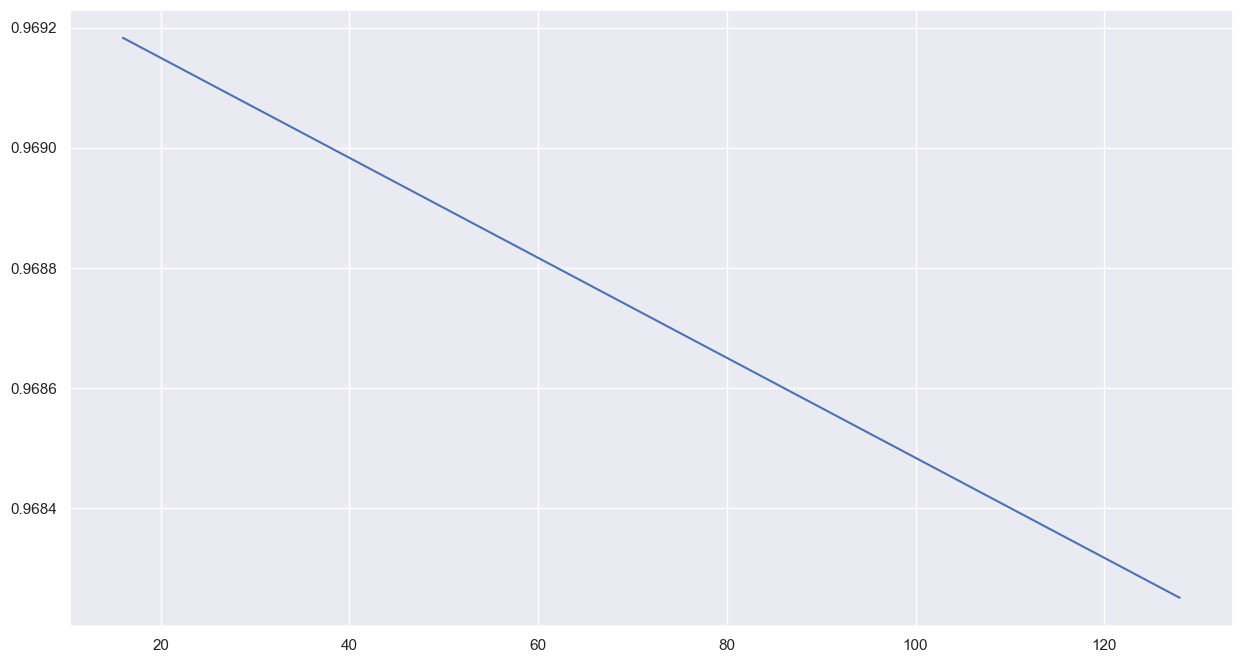

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 240 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9701666831970215 0.972100019454956
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 240 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9659166932106018 0.9671000242233276
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 240 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9661666750907898 0.9685999751091003
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradi

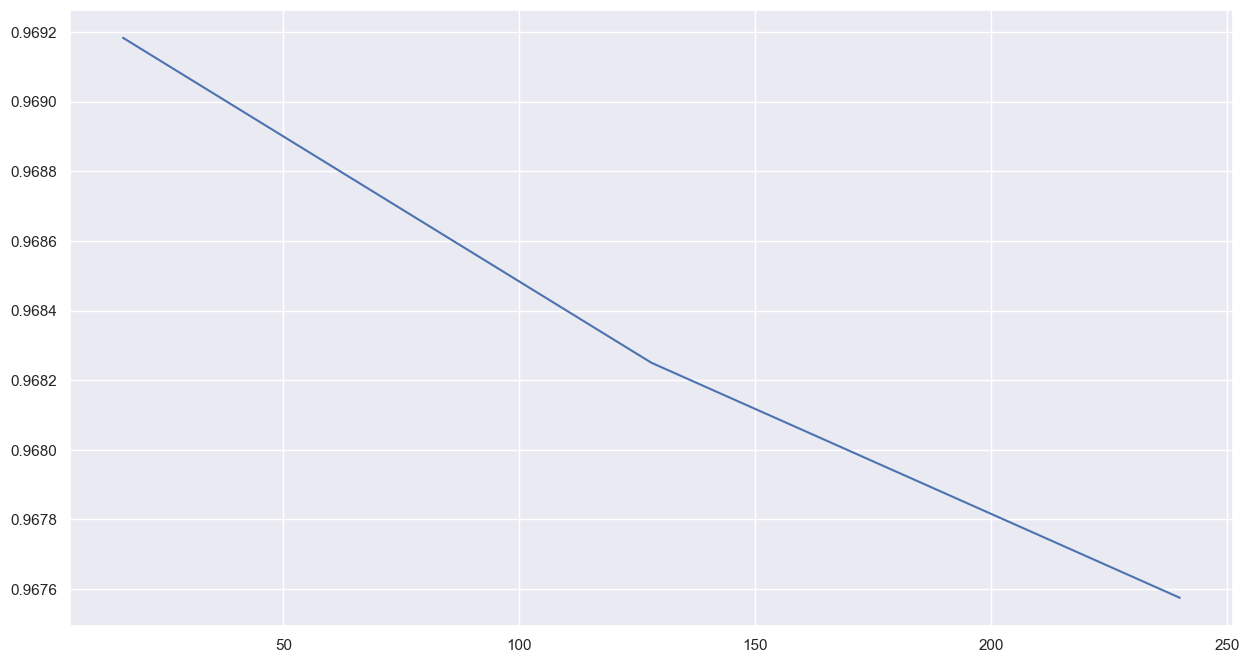

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 352 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.965583324432373 0.9660000205039978
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 352 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9649166464805603 0.9689000248908997
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 352 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.965749979019165 0.9682000279426575
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradie

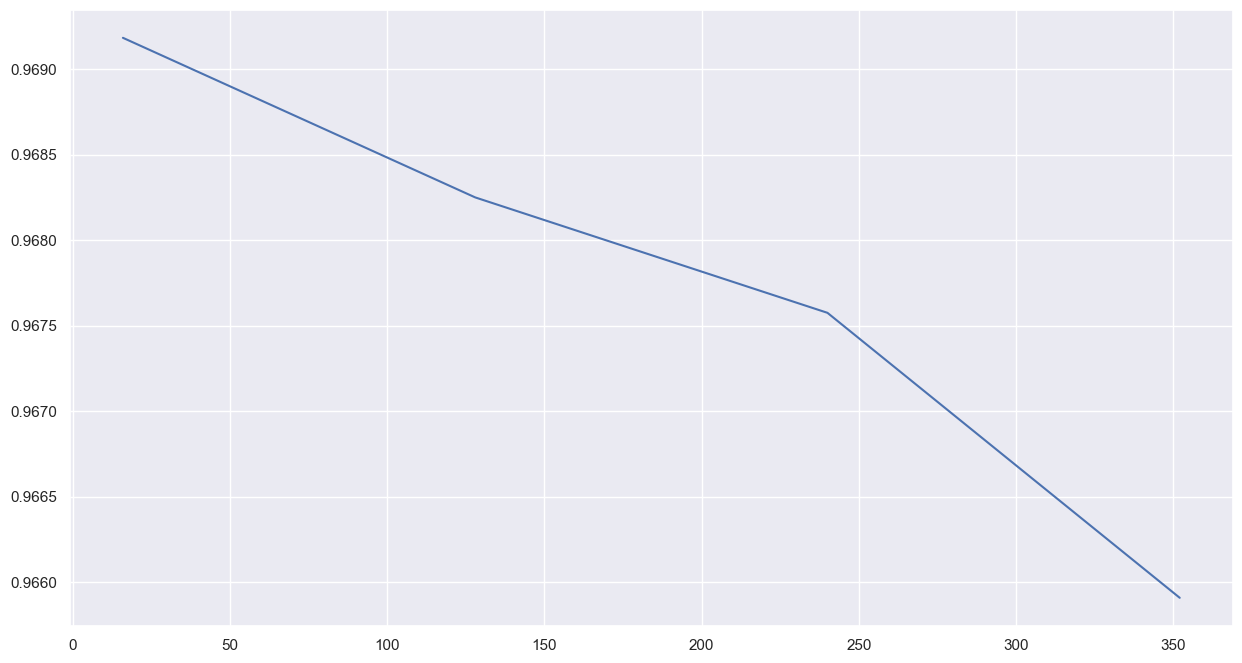

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 464 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9647499918937683 0.964900016784668
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 464 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9642500281333923 0.9663000106811523
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 464 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9639166593551636 0.965399980545044
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradie

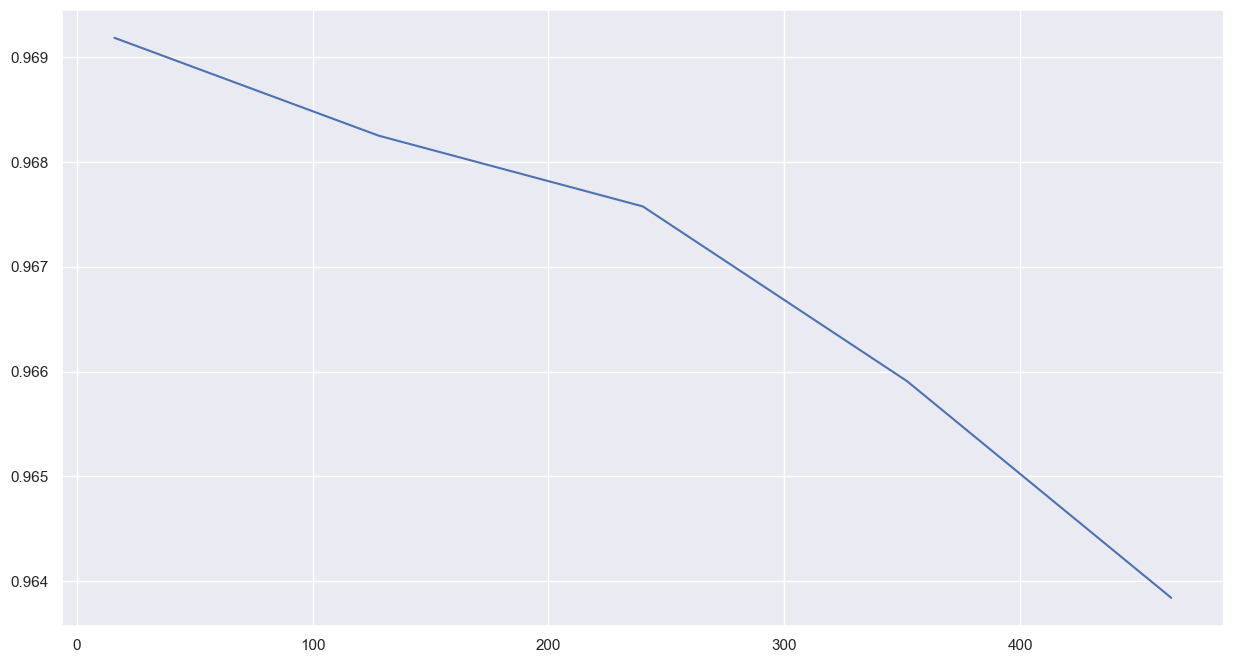

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 576 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9638333320617676 0.9645000100135803
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 576 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9629999995231628 0.9614999890327454
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 576 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9588333368301392 0.9603999853134155
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , grad

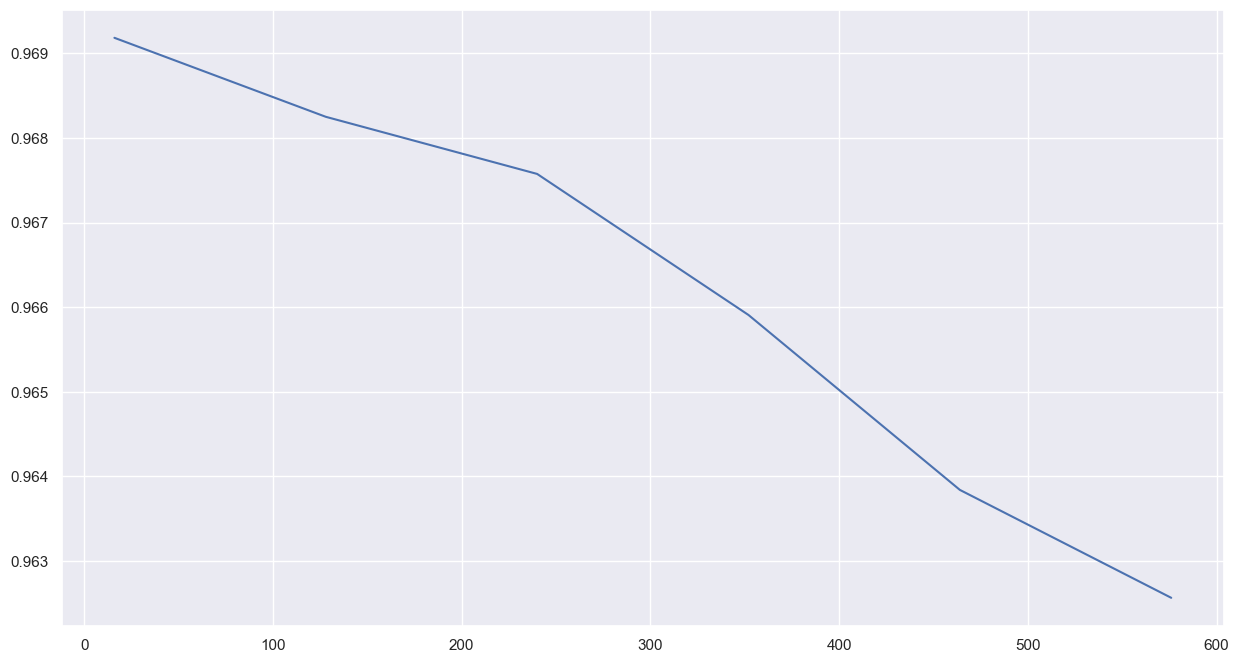

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 688 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9614166617393494 0.9620000123977661
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 688 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9614166617393494 0.9595999717712402
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 688 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9623333215713501 0.9613000154495239
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , grad

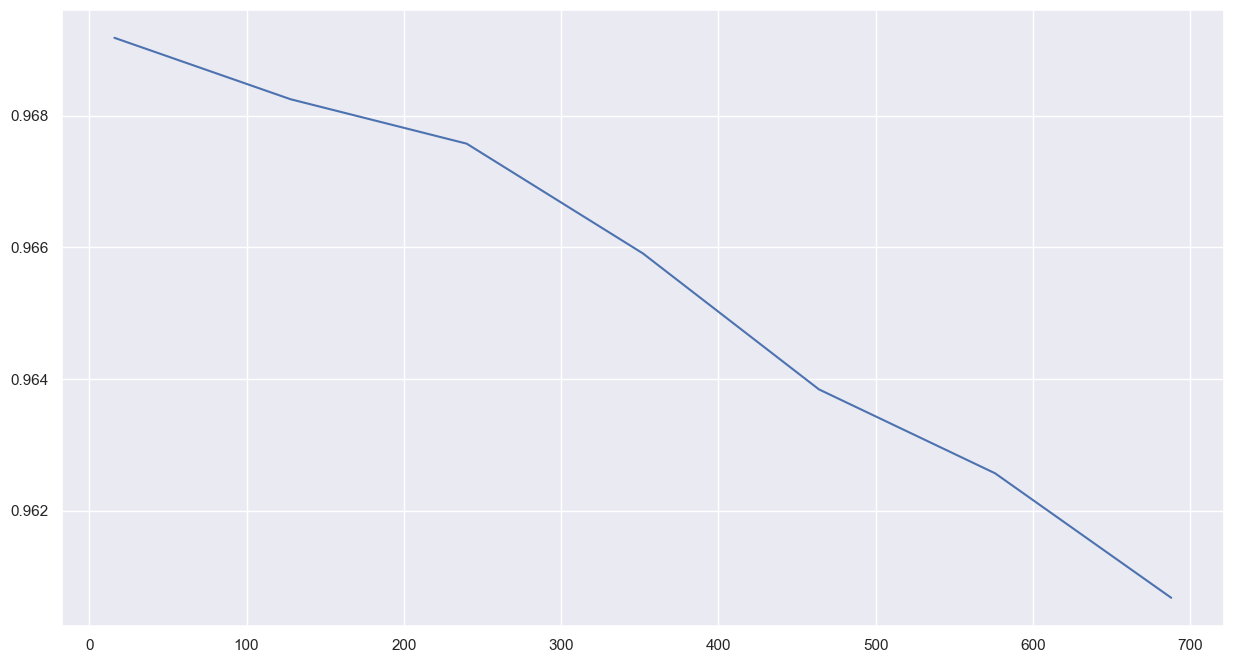

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 800 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9593333601951599 0.9593999981880188
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 800 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9583333134651184 0.9574000239372253
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 800 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9627500176429749 0.9631999731063843
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , grad

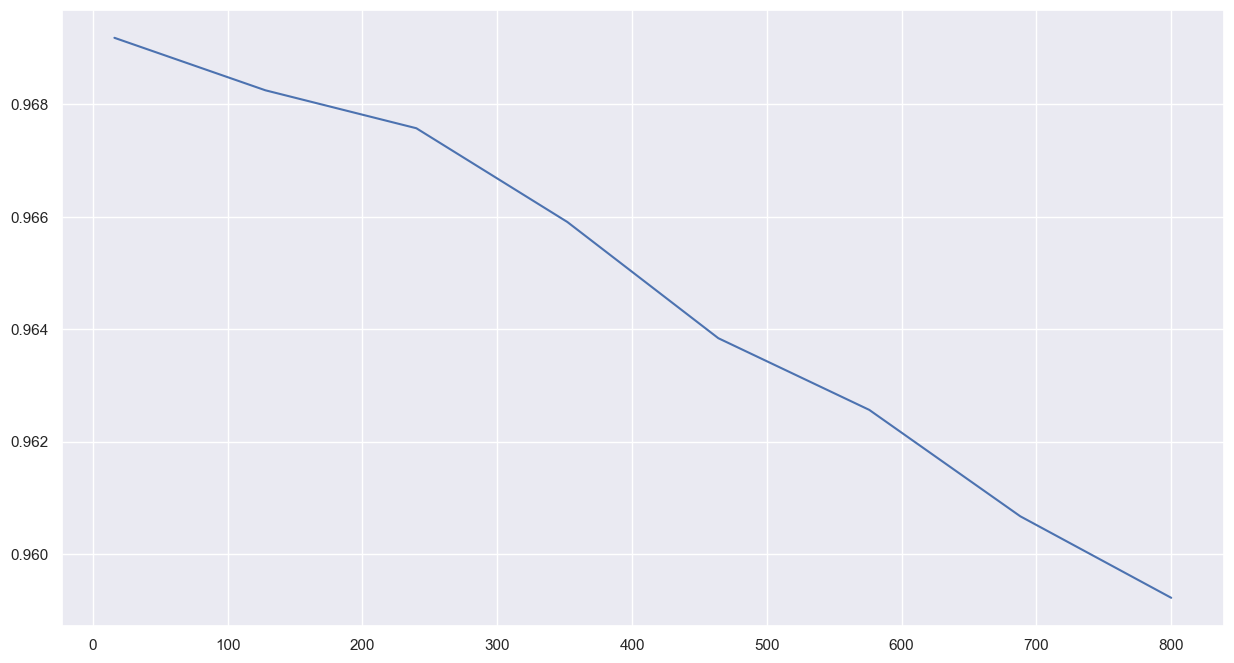

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 912 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956416666507721 0.9545000195503235
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 912 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9597499966621399 0.958899974822998
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 912 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9614999890327454 0.9595000147819519
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradie

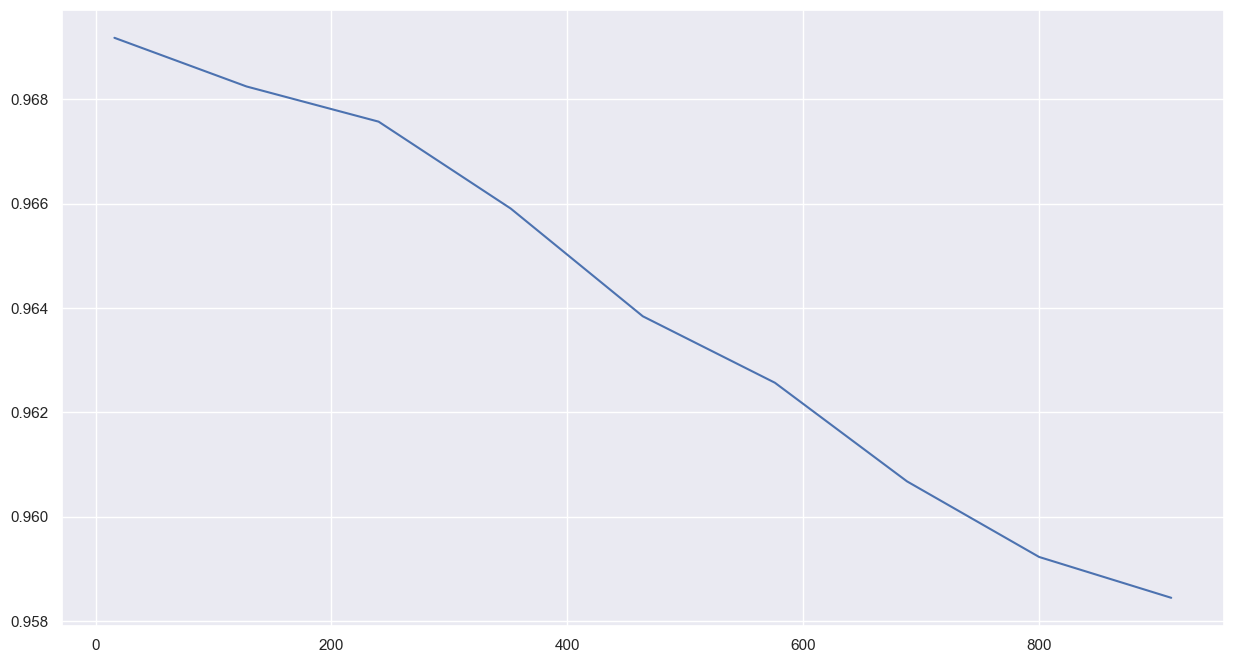

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9569166898727417 0.9537000060081482
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9559166431427002 0.9563000202178955
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9577500224113464 0.957099974155426
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

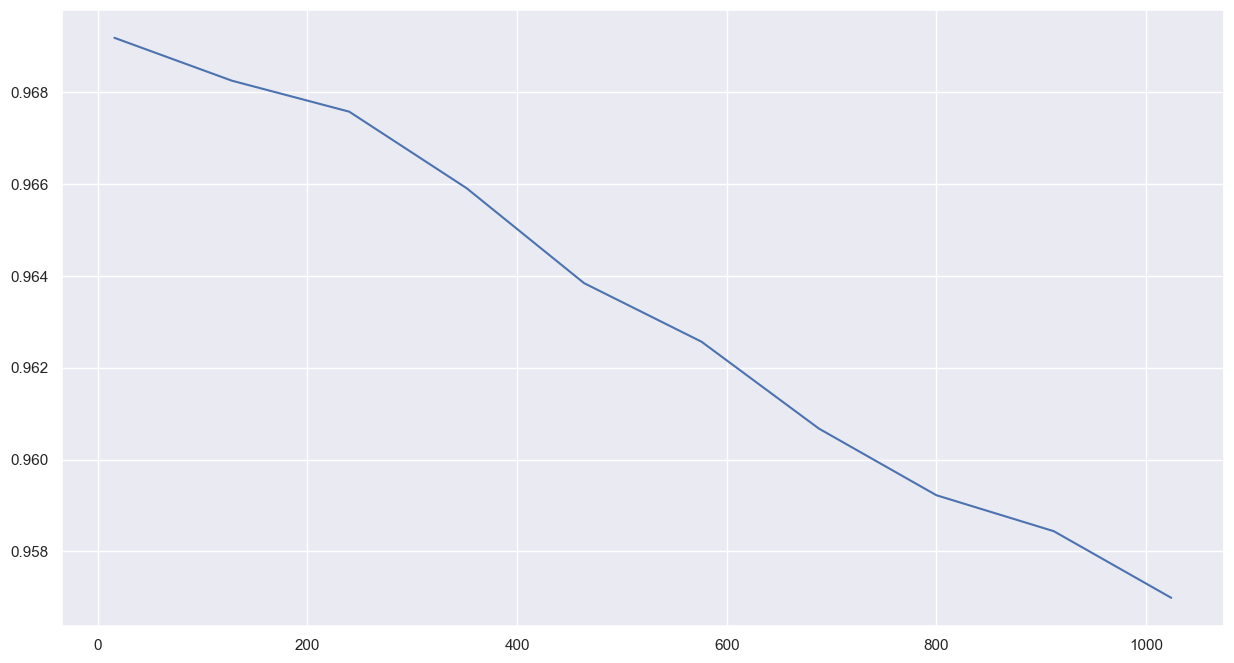

0

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 0 , drnn: 0.0 , weight_std: 0.05
0.9576666951179504 0.9545000195503235
0

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 0 , drnn: 0.0 , weight_std: 0.05
0.9579166769981384 0.9581999778747559
0

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 0 , drnn: 0.0 , weight_std: 0.05
0.9554166793823242 0.9541000127792358
0

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient

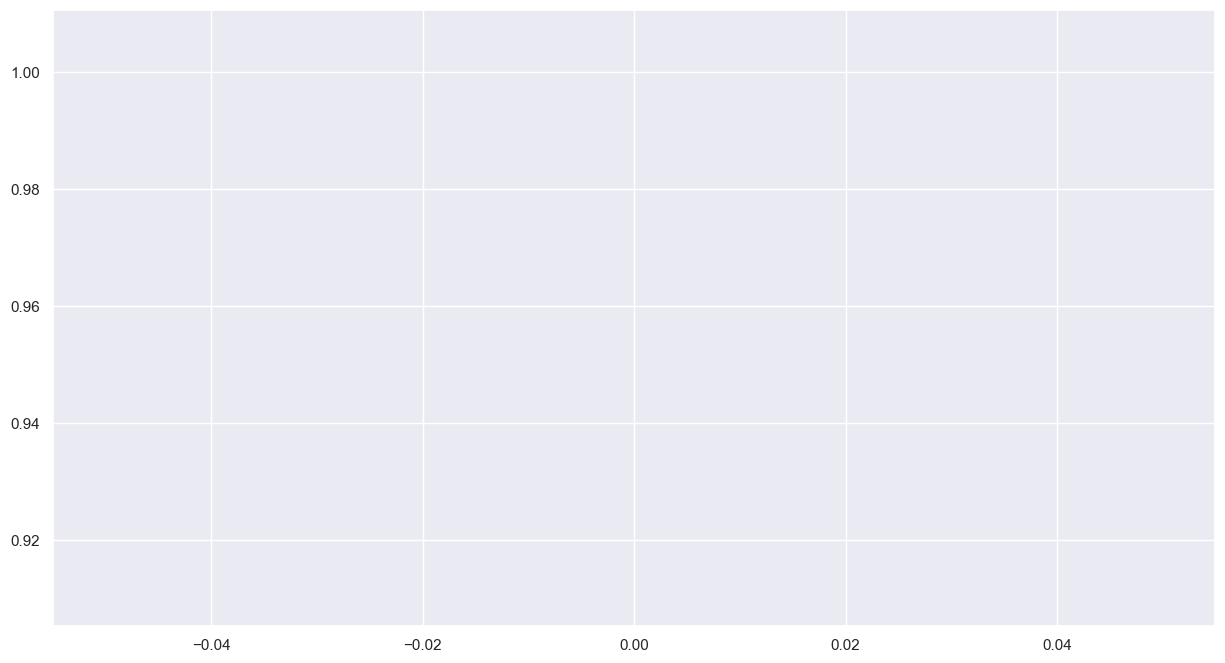

3

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 3 , drnn: 0.0 , weight_std: 0.05
0.9571666717529297 0.9550999999046326
3

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 3 , drnn: 0.0 , weight_std: 0.05
0.9591666460037231 0.9574999809265137
3

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 3 , drnn: 0.0 , weight_std: 0.05
0.9542499780654907 0.9520999789237976
3

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient

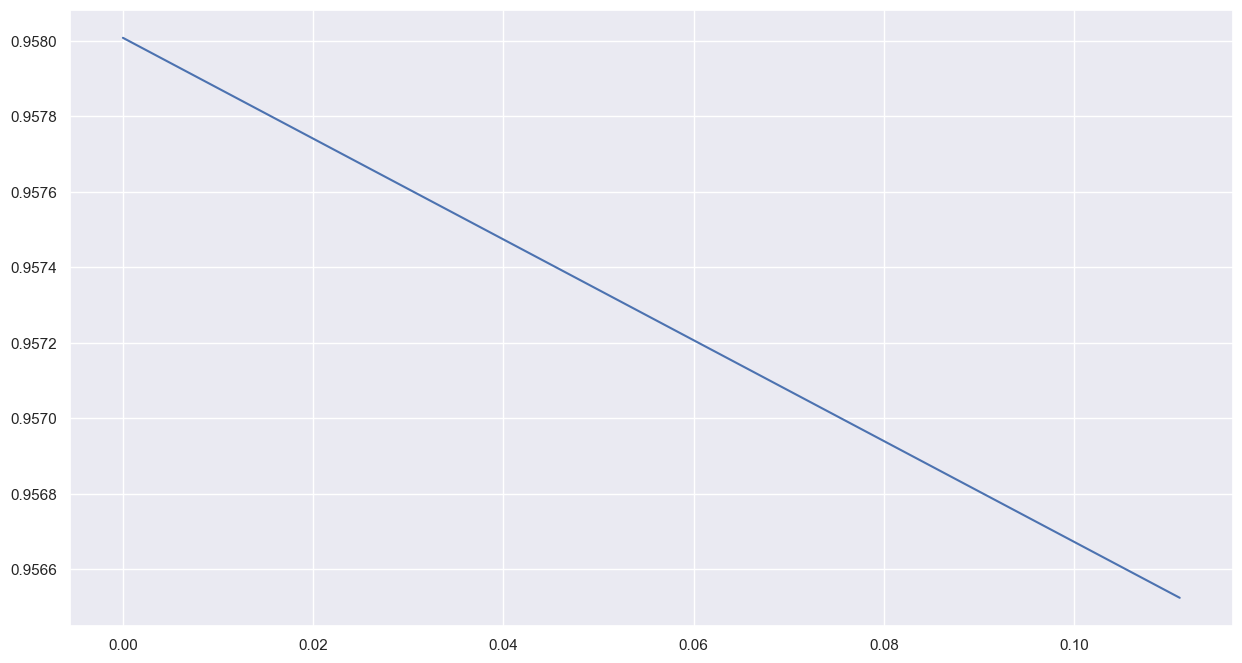

5

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 5 , drnn: 0.0 , weight_std: 0.05
0.9564999938011169 0.953499972820282
5

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 5 , drnn: 0.0 , weight_std: 0.05
0.9555833339691162 0.9545999765396118
5

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 5 , drnn: 0.0 , weight_std: 0.05
0.9569166898727417 0.9539999961853027
5

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_

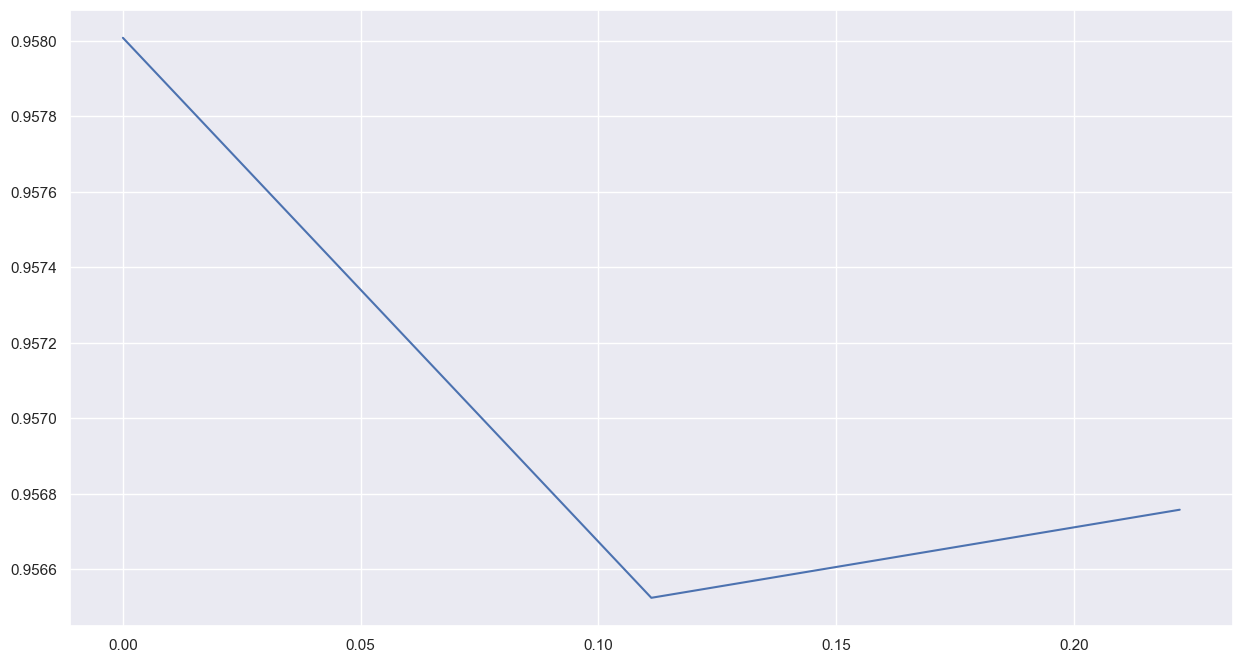

7

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 7 , drnn: 0.0 , weight_std: 0.05
0.9549999833106995 0.954200029373169
7

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 7 , drnn: 0.0 , weight_std: 0.05
0.9579166769981384 0.9574999809265137
7

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 7 , drnn: 0.0 , weight_std: 0.05
0.9558333158493042 0.9555000066757202
7

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_

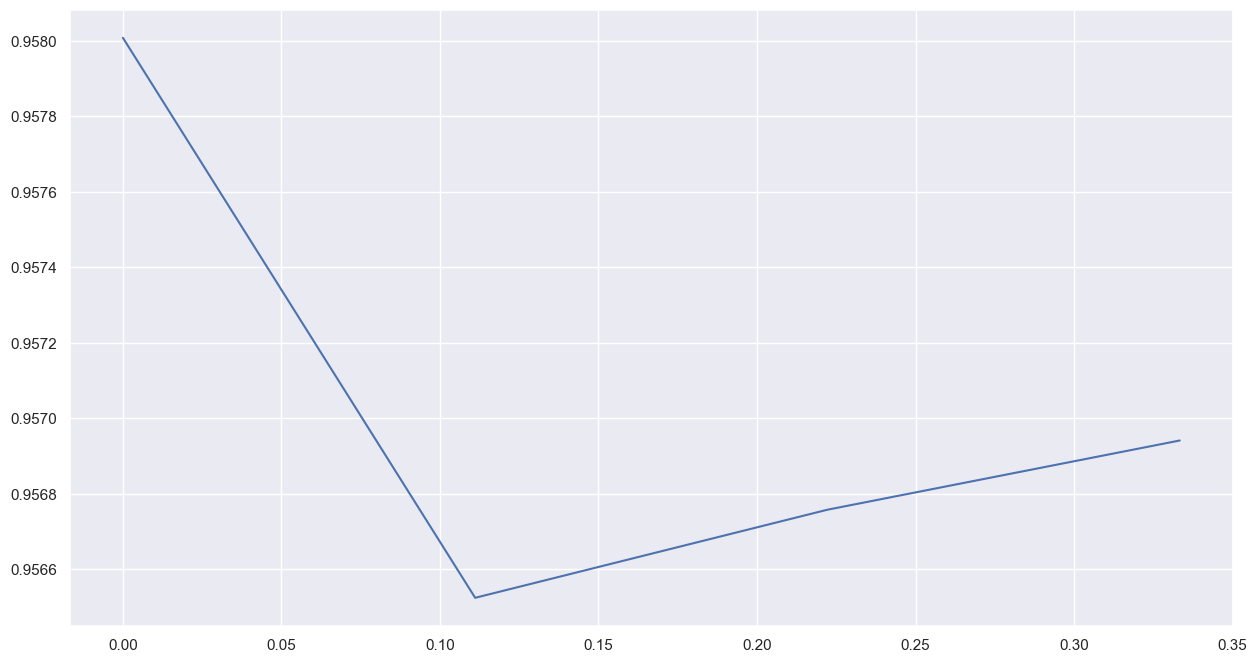

9

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 9 , drnn: 0.0 , weight_std: 0.05
0.9580000042915344 0.9555000066757202
9

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 9 , drnn: 0.0 , weight_std: 0.05
0.9557499885559082 0.9550999999046326
9

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 9 , drnn: 0.0 , weight_std: 0.05
0.9571666717529297 0.9556000232696533
9

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient

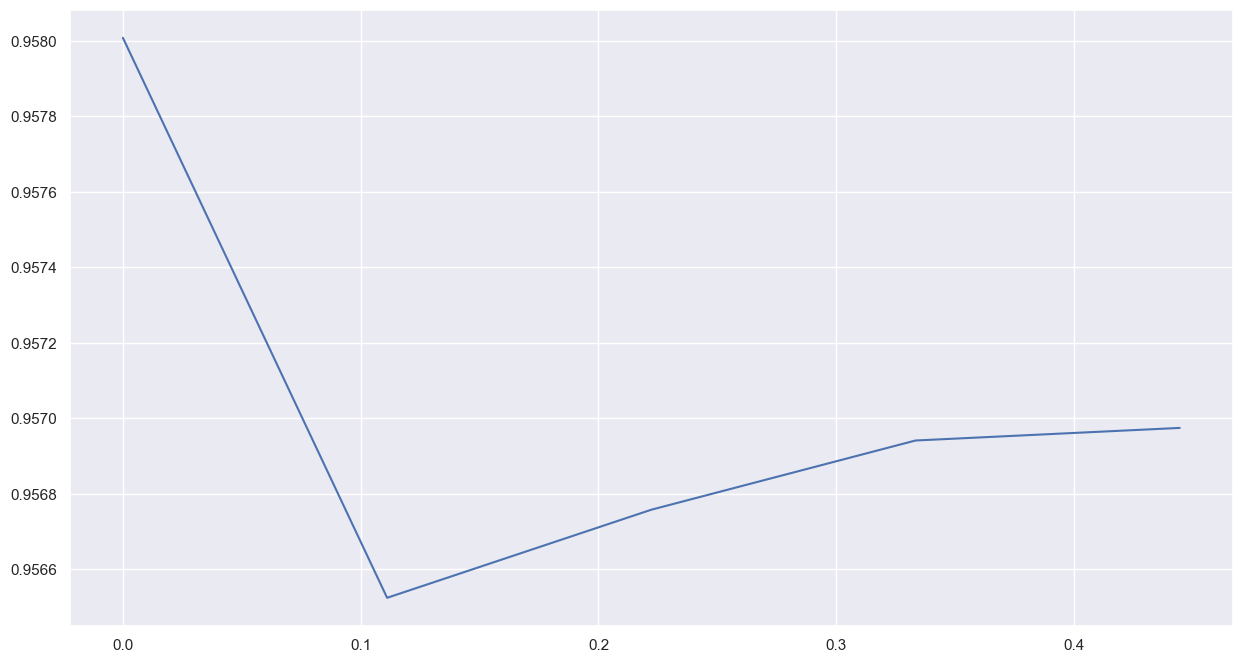

12

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 12 , drnn: 0.0 , weight_std: 0.05
0.956250011920929 0.9538999795913696
12

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 12 , drnn: 0.0 , weight_std: 0.05
0.9596666693687439 0.9559999704360962
12

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 12 , drnn: 0.0 , weight_std: 0.05
0.9557499885559082 0.9545999765396118
12

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

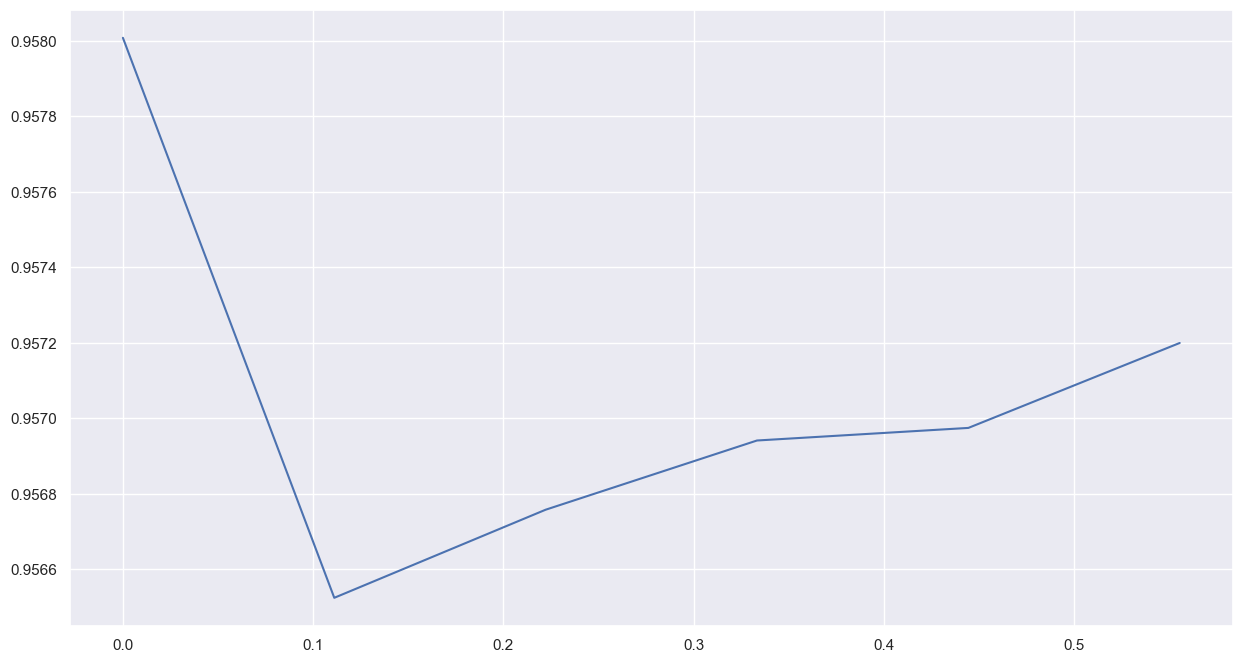

14

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 14 , drnn: 0.0 , weight_std: 0.05
0.9553333520889282 0.953499972820282
14

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 14 , drnn: 0.0 , weight_std: 0.05
0.9535833597183228 0.9513999819755554
14

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 14 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.9569000005722046
14

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gr

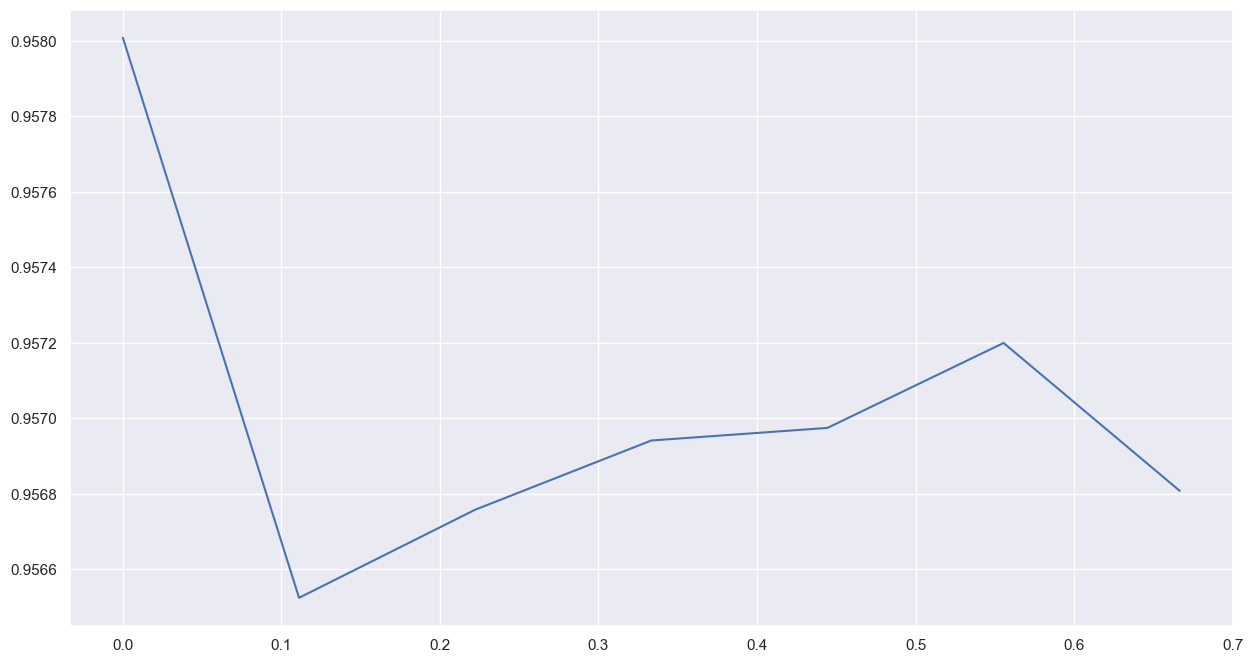

16

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 16 , drnn: 0.0 , weight_std: 0.05
0.9584166407585144 0.9563000202178955
16

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 16 , drnn: 0.0 , weight_std: 0.05
0.9564999938011169 0.954800009727478
16

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 16 , drnn: 0.0 , weight_std: 0.05
0.9559999704360962 0.954800009727478
16

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gra

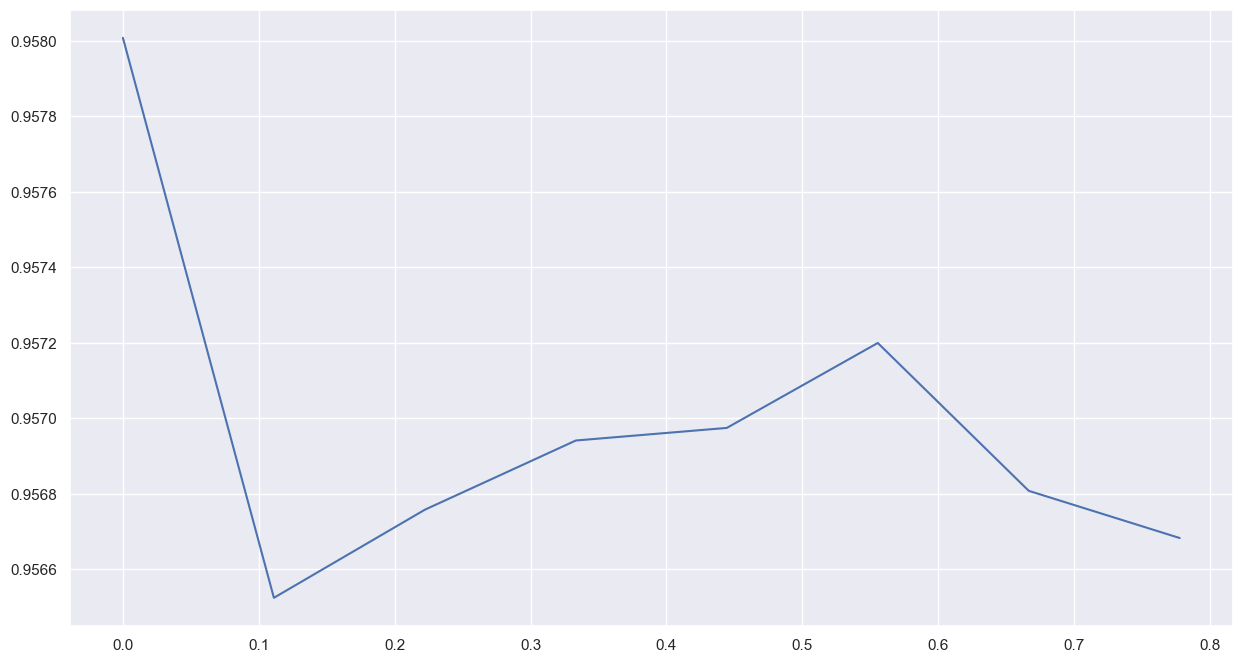

18

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 18 , drnn: 0.0 , weight_std: 0.05
0.9570833444595337 0.9553999900817871
18

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 18 , drnn: 0.0 , weight_std: 0.05
0.9568333625793457 0.9520000219345093
18

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 18 , drnn: 0.0 , weight_std: 0.05
0.9578333497047424 0.9577999711036682
18

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

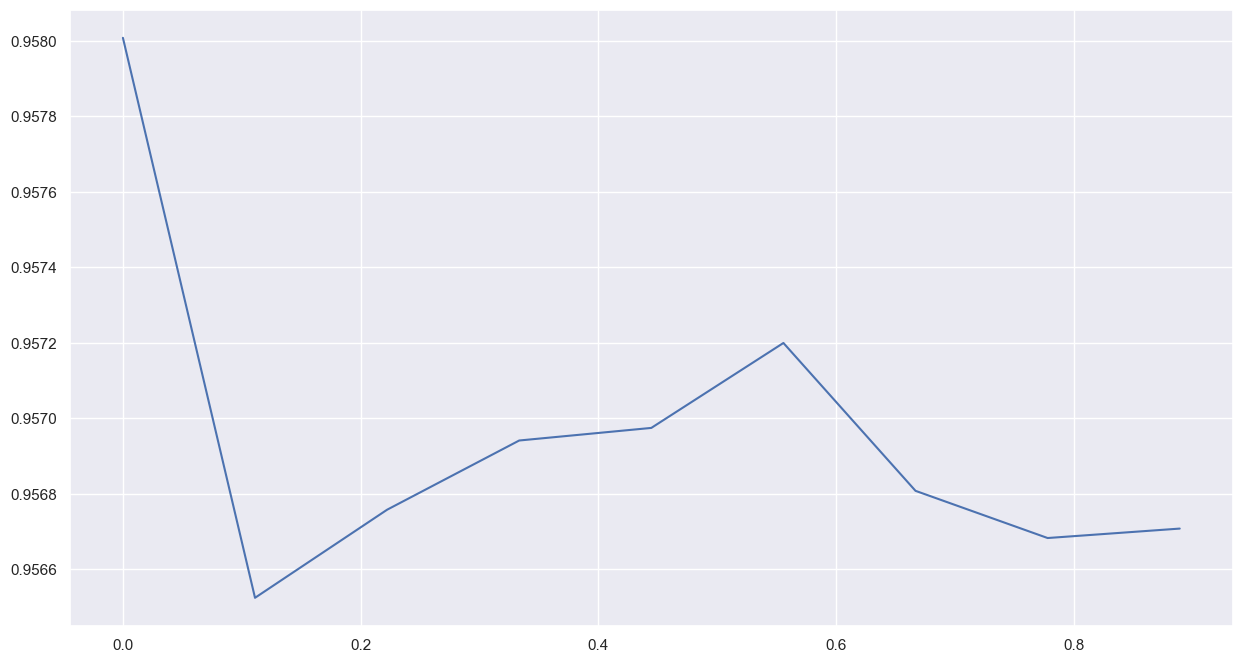

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.956333339214325 0.954800009727478
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9557499885559082 0.9541000127792358
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9573333263397217 0.957099974155426
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , grad

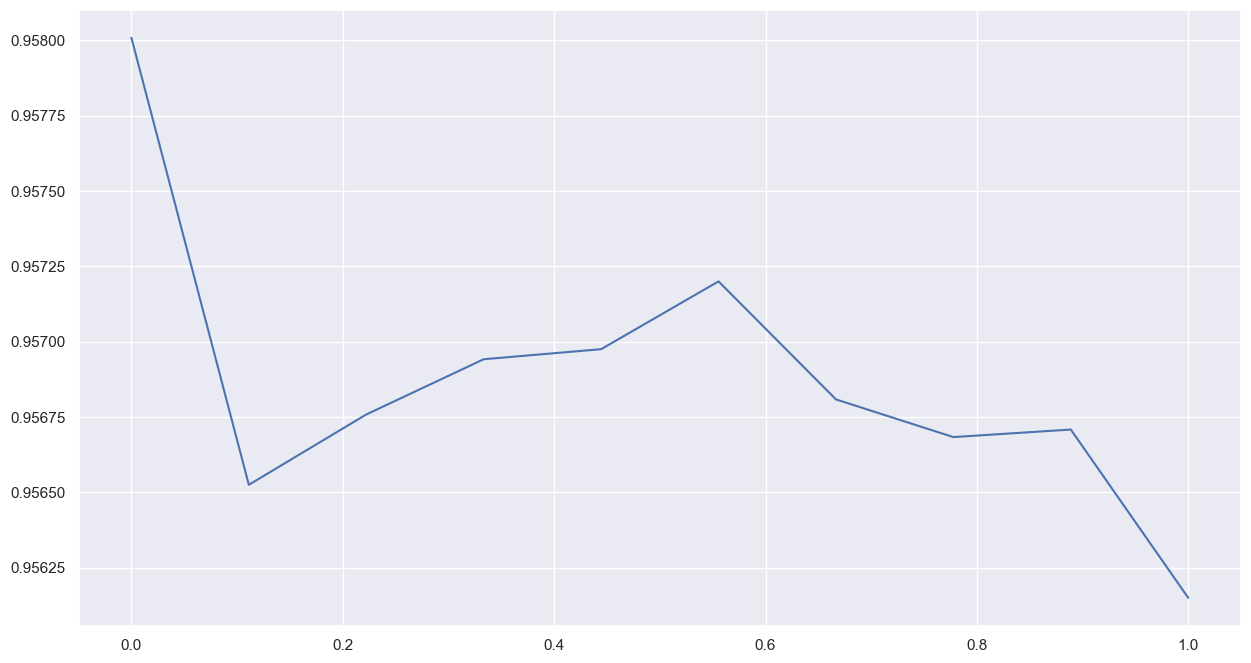

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9577500224113464 0.9538999795913696
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9535833597183228 0.9520999789237976
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9573333263397217 0.9564999938011169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

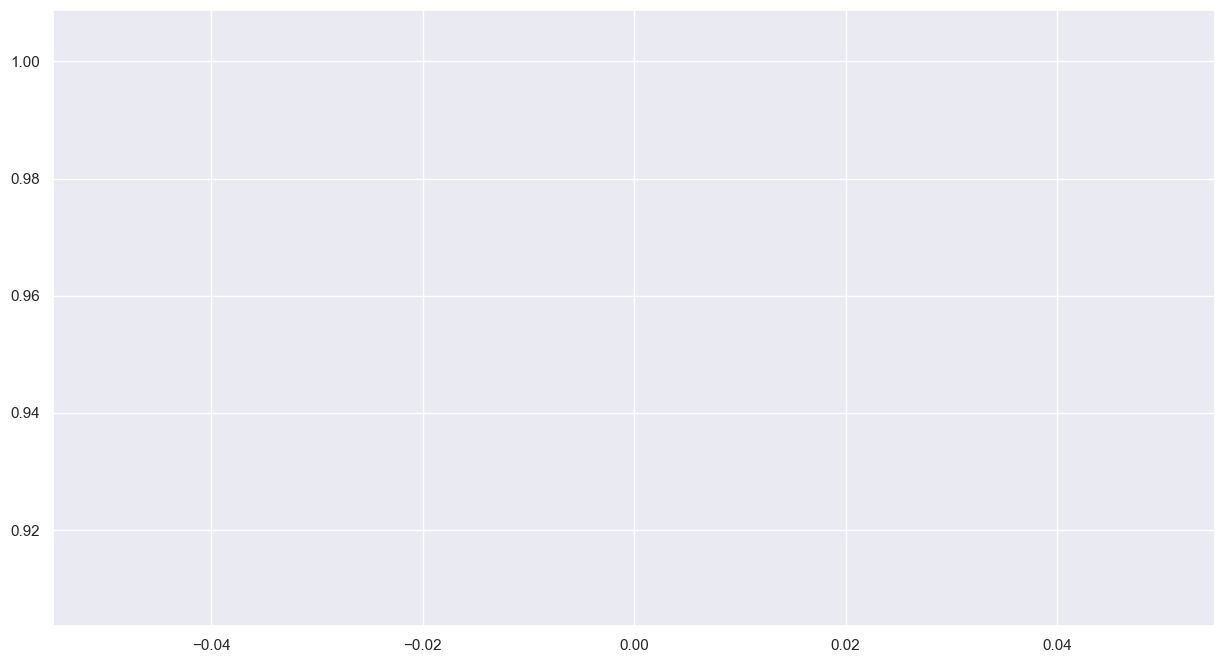

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.05555555555555555 , weight_std: 0.05
0.9585000276565552 0.9573000073432922
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.05555555555555555 , weight_std: 0.05
0.9582499861717224 0.9557999968528748
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.05555555555555555 , weight_std: 0.05
0.9559166431427002 0.9544000029563904
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

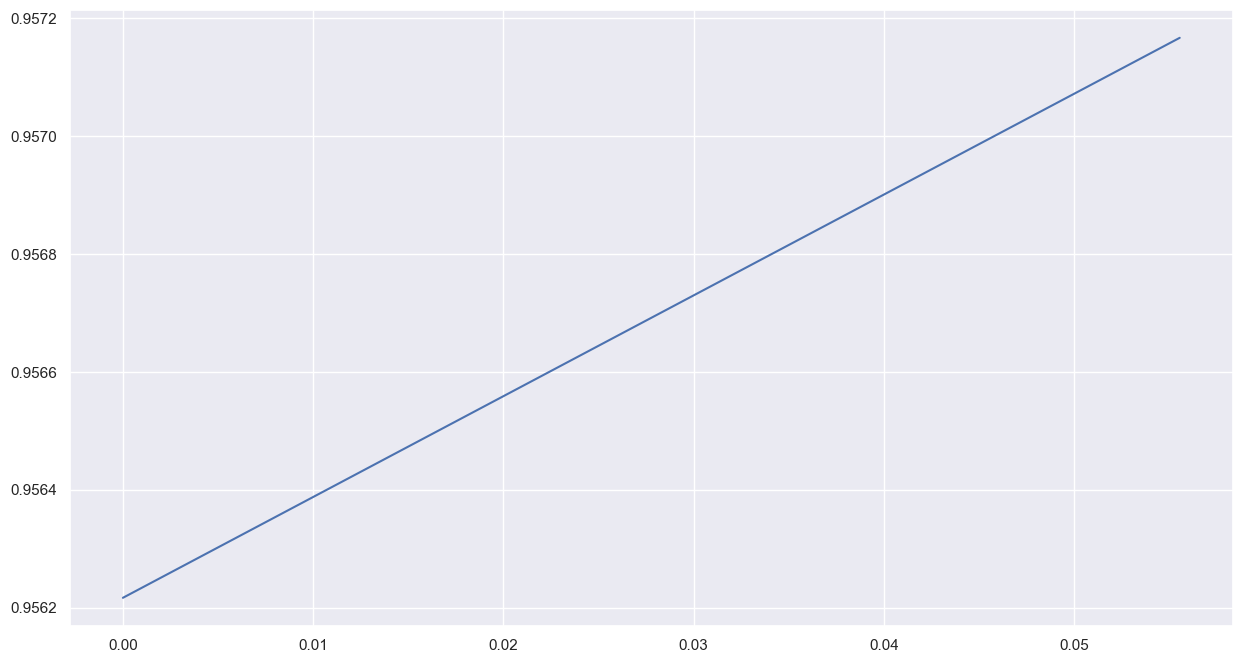

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.1111111111111111 , weight_std: 0.05
0.9547500014305115 0.9505000114440918
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.1111111111111111 , weight_std: 0.05
0.9546666741371155 0.9531000256538391
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.1111111111111111 , weight_std: 0.05
0.9549999833106995 0.9545999765396118
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

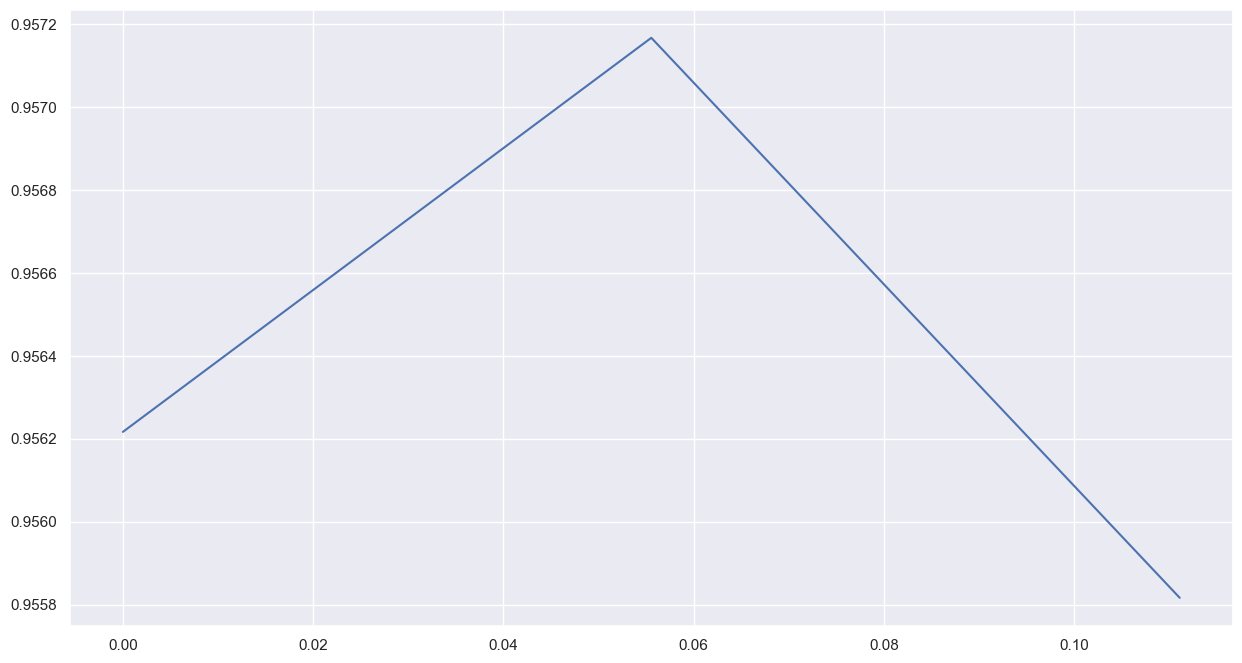

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.16666666666666666 , weight_std: 0.05
0.9549166560173035 0.9520999789237976
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.16666666666666666 , weight_std: 0.05
0.9523333311080933 0.9505000114440918
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.16666666666666666 , weight_std: 0.05
0.953416645526886 0.9527000188827515
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0

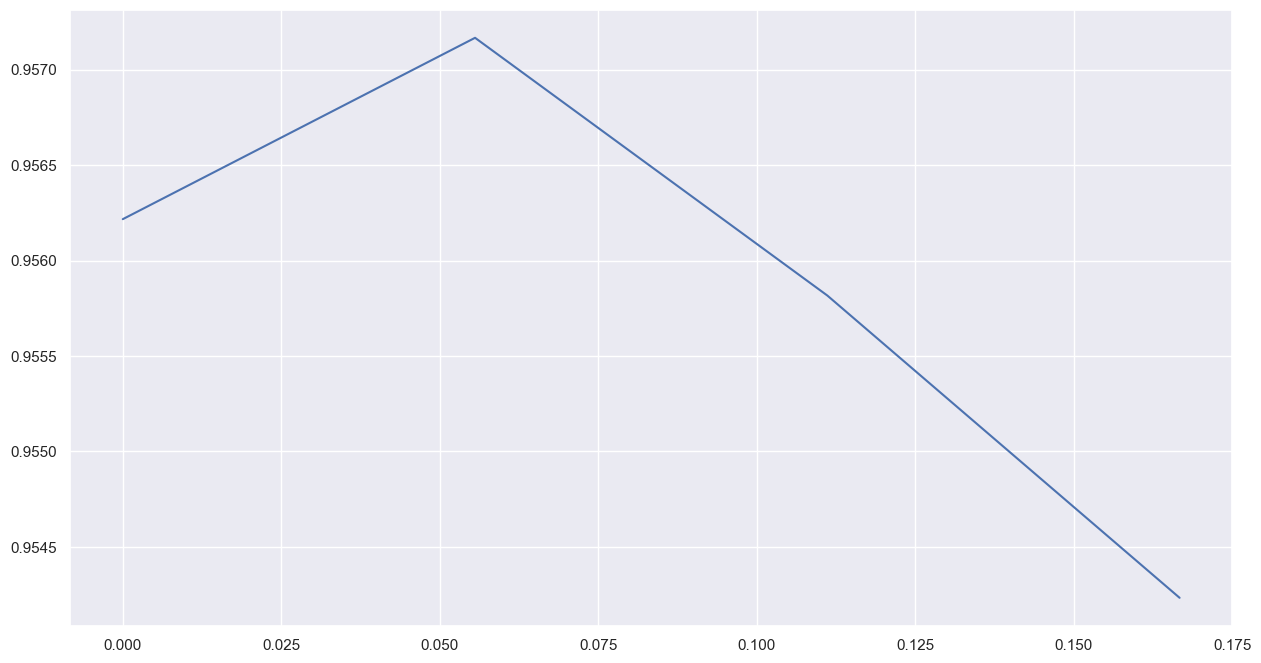

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.2222222222222222 , weight_std: 0.05
0.9542499780654907 0.9544000029563904
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.2222222222222222 , weight_std: 0.05
0.95333331823349 0.9509999752044678
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.2222222222222222 , weight_std: 0.05
0.949916660785675 0.9458000063896179
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , la

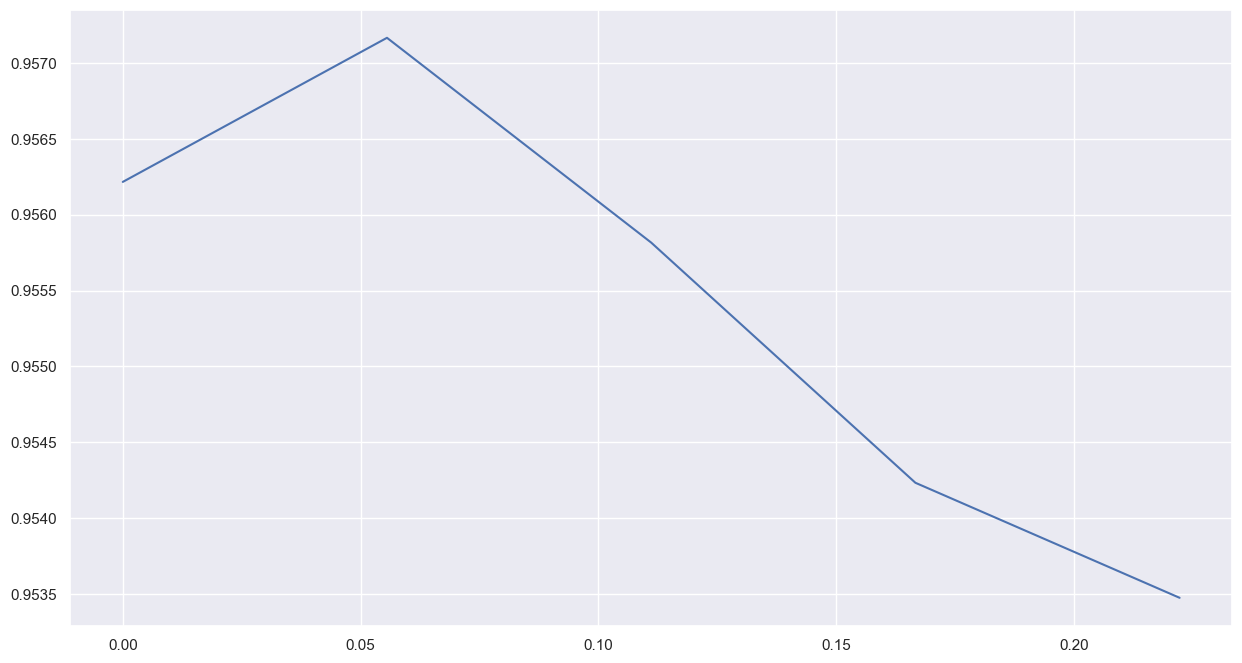

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.2777777777777778 , weight_std: 0.05
0.9512500166893005 0.949400007724762
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.2777777777777778 , weight_std: 0.05
0.9522500038146973 0.9501000046730042
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.2777777777777778 , weight_std: 0.05
0.9536666870117188 0.9513000249862671
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , 

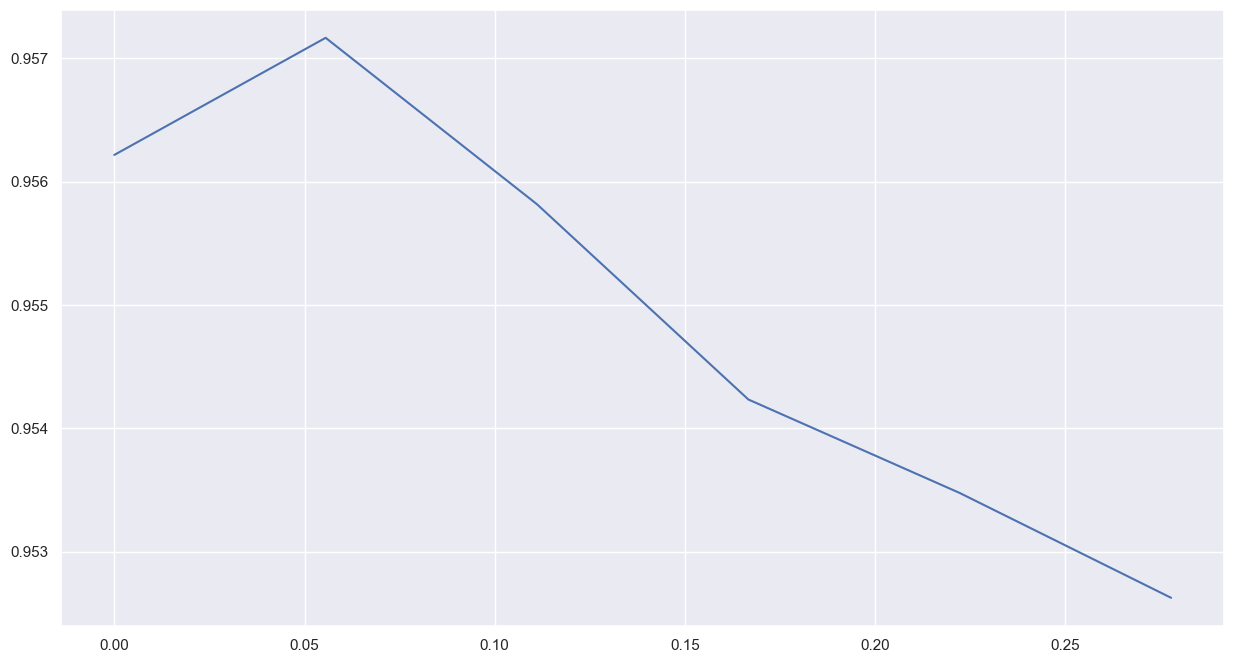

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.3333333333333333 , weight_std: 0.05
0.953416645526886 0.951200008392334
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.3333333333333333 , weight_std: 0.05
0.9489166736602783 0.9492999911308289
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.3333333333333333 , weight_std: 0.05
0.9540833234786987 0.9506999850273132
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

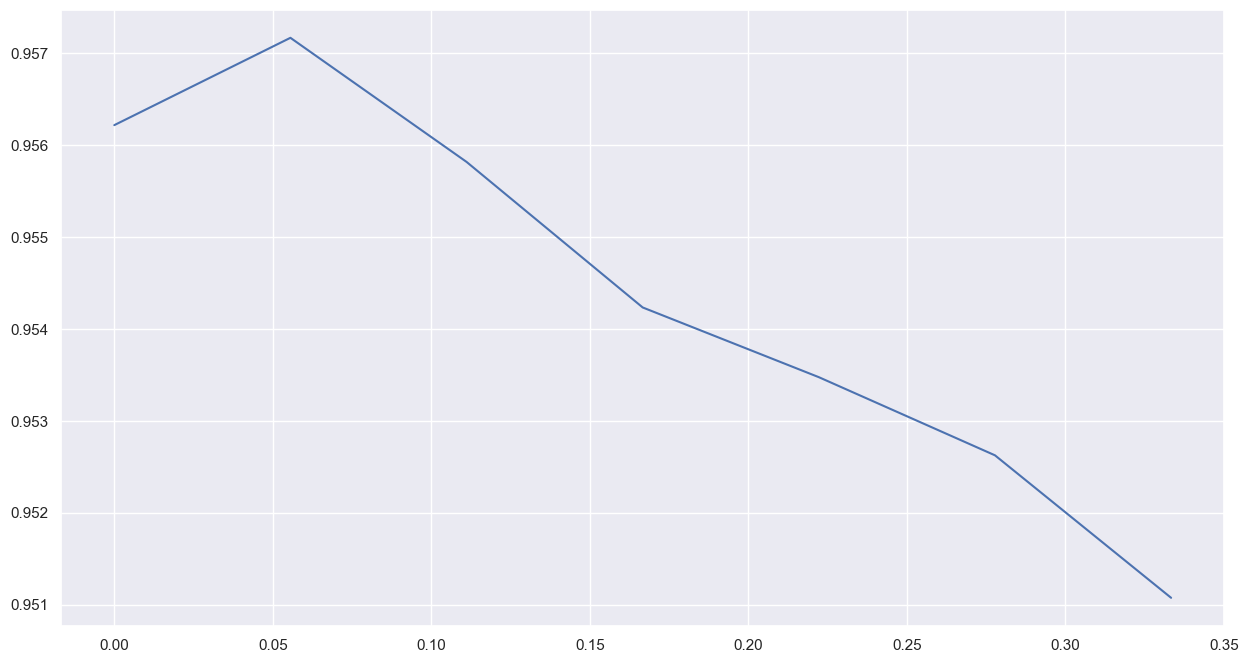

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.38888888888888884 , weight_std: 0.05
0.9512500166893005 0.9491000175476074
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.38888888888888884 , weight_std: 0.05
0.9507499933242798 0.9485999941825867
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.38888888888888884 , weight_std: 0.05
0.9462500214576721 0.9453999996185303
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.

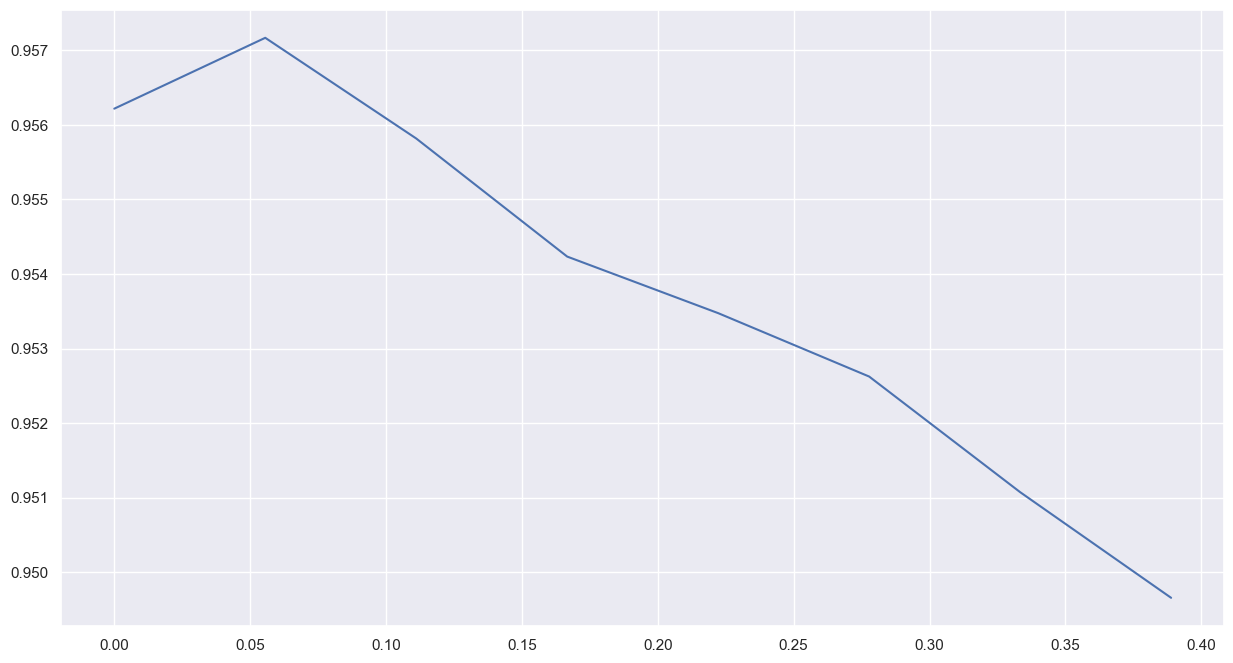

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.4444444444444444 , weight_std: 0.05
0.950166642665863 0.948199987411499
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.4444444444444444 , weight_std: 0.05
0.9495833516120911 0.9473000168800354
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.4444444444444444 , weight_std: 0.05
0.9471666812896729 0.9449999928474426
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

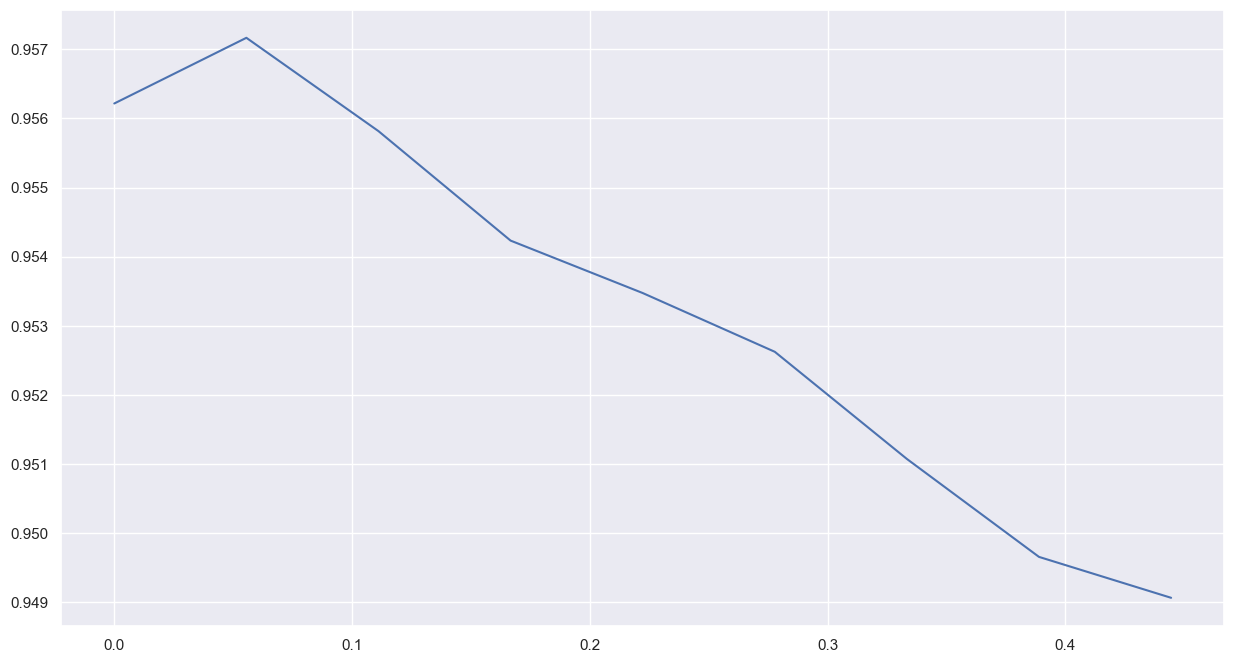

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.5 , weight_std: 0.05
0.9475833177566528 0.9445000290870667
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.5 , weight_std: 0.05
0.9449999928474426 0.9415000081062317
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.5 , weight_std: 0.05
0.9487500190734863 0.9476000070571899
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

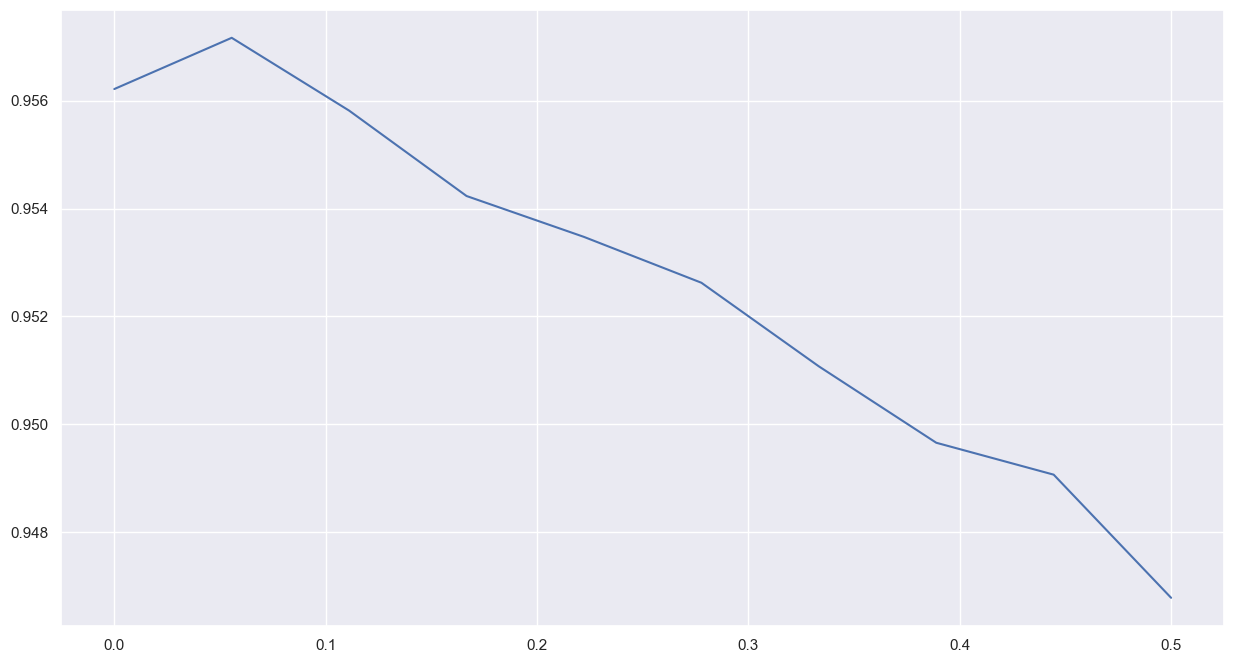

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.0
0.10599999874830246 0.11349999904632568
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.0
0.10599999874830246 0.11349999904632568
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.0
0.10599999874830246 0.11349999904632568
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 

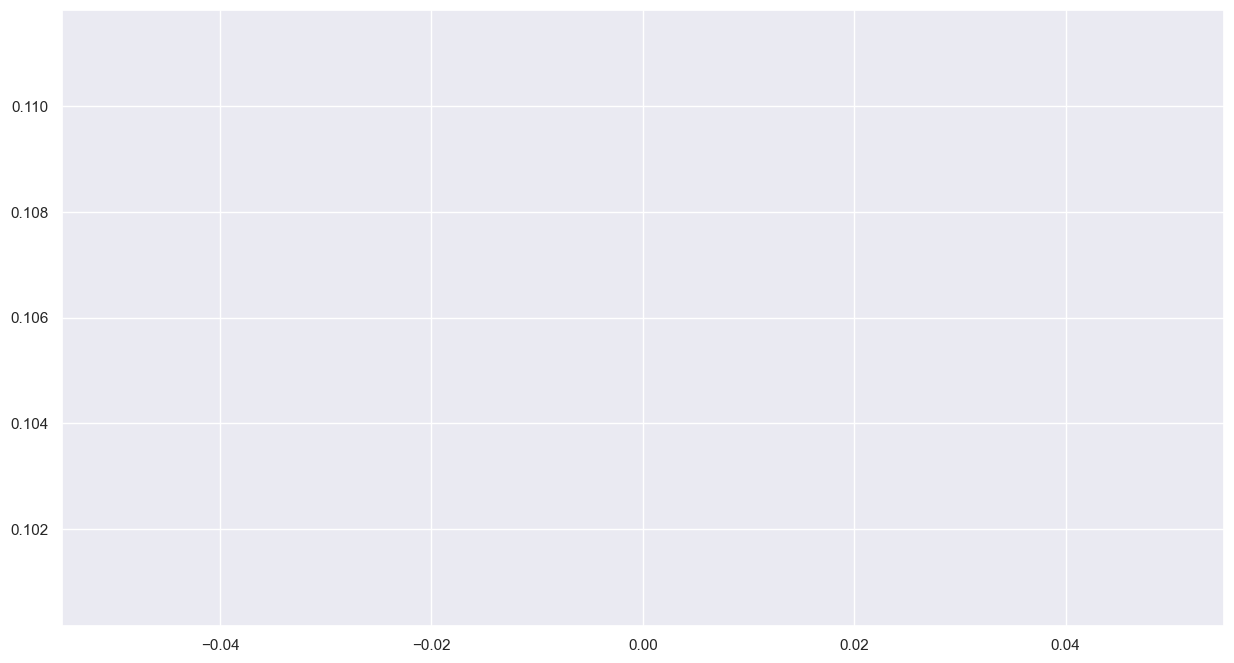

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.011111111111111112
0.9445000290870667 0.9415000081062317
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.011111111111111112
0.950166642665863 0.9467999935150146
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.011111111111111112
0.9502500295639038 0.9488000273704529
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0

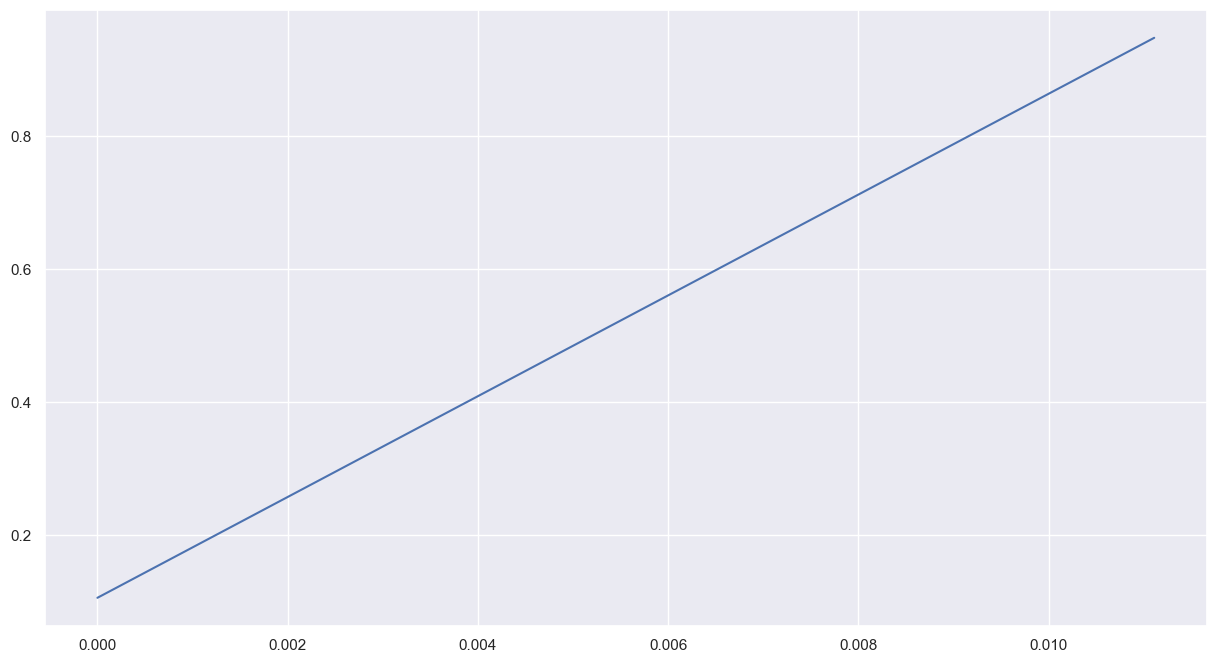

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.022222222222222223
0.9537500143051147 0.9517999887466431
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.022222222222222223
0.9511666893959045 0.9501000046730042
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.022222222222222223
0.953499972820282 0.9513000249862671
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0

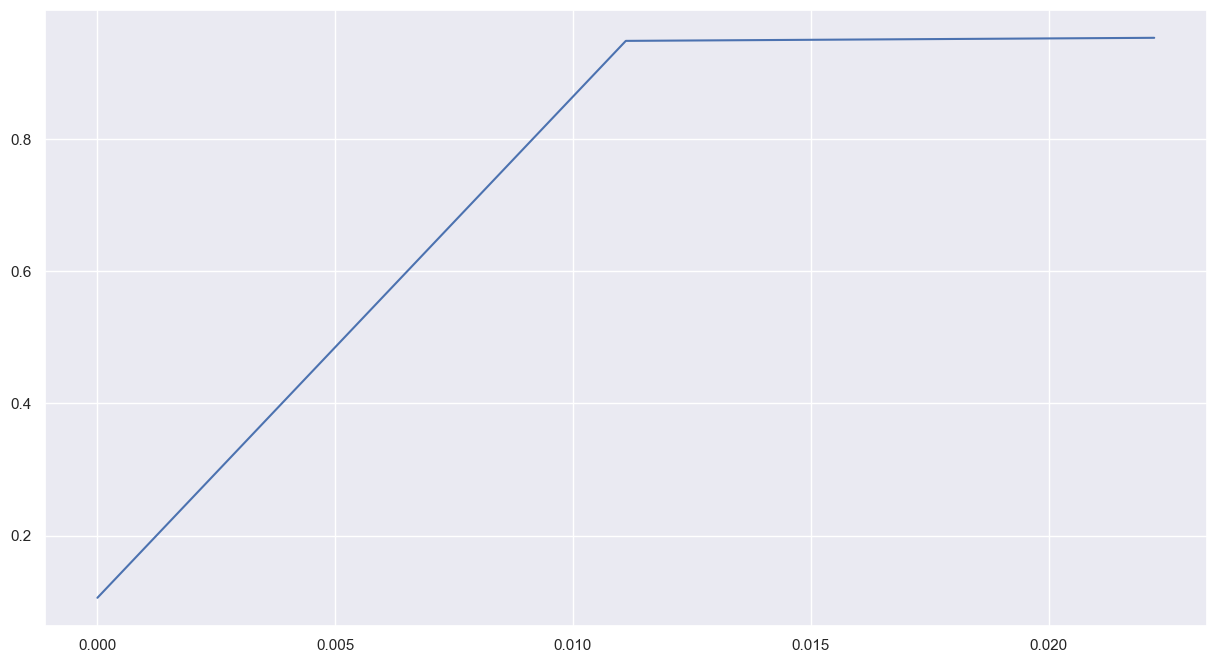

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.03333333333333333
0.9565833210945129 0.9520000219345093
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.03333333333333333
0.9524166584014893 0.9520000219345093
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.03333333333333333
0.9545833468437195 0.9509000182151794
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

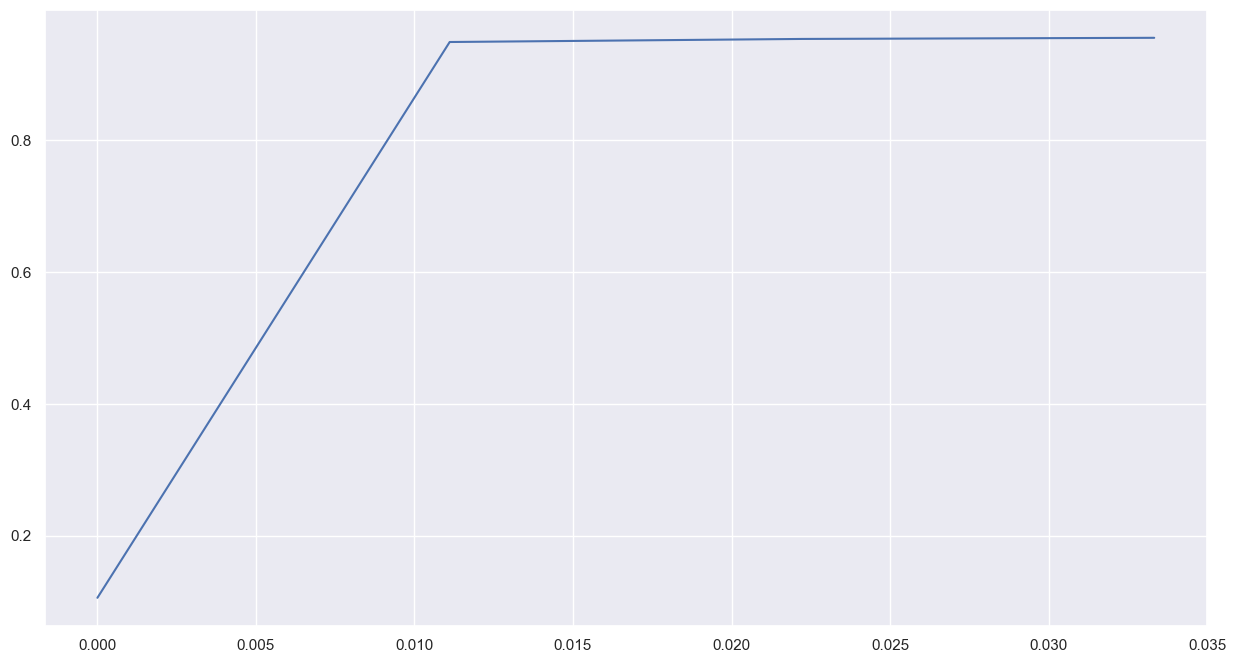

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.044444444444444446
0.956333339214325 0.9563999772071838
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.044444444444444446
0.9558333158493042 0.9567000269889832
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.044444444444444446
0.9585000276565552 0.9581000208854675
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0

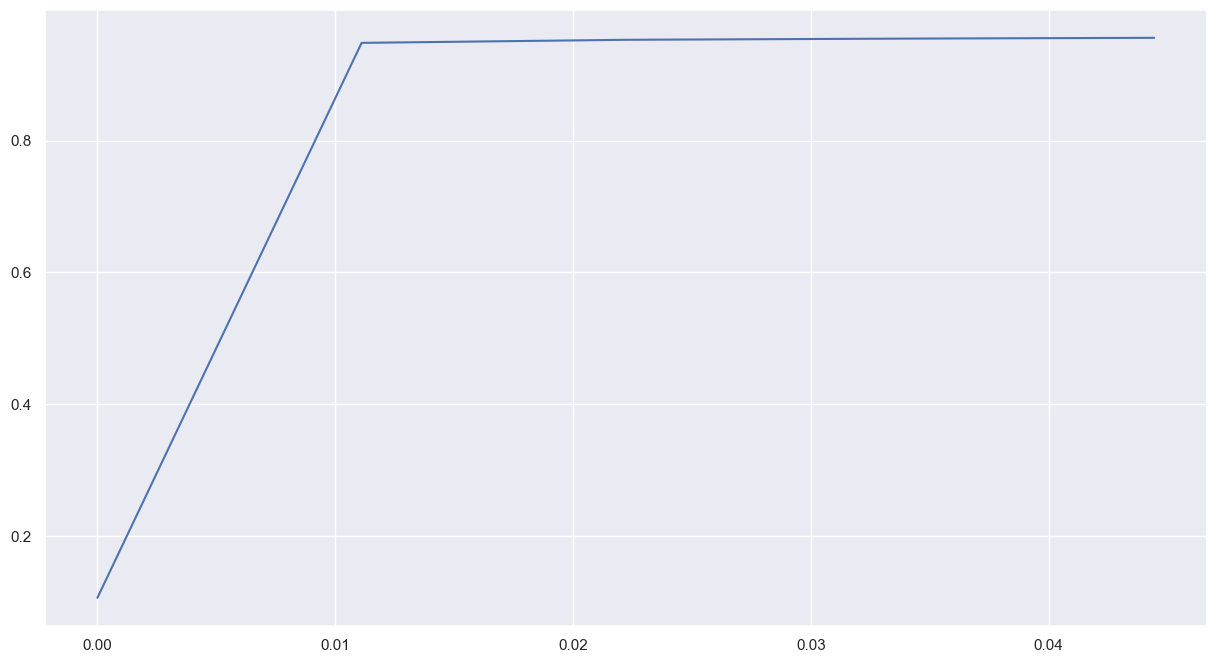

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05555555555555556
0.9579166769981384 0.953499972820282
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05555555555555556
0.9568333625793457 0.954200029373169
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05555555555555556
0.9573333263397217 0.9537000060081482
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

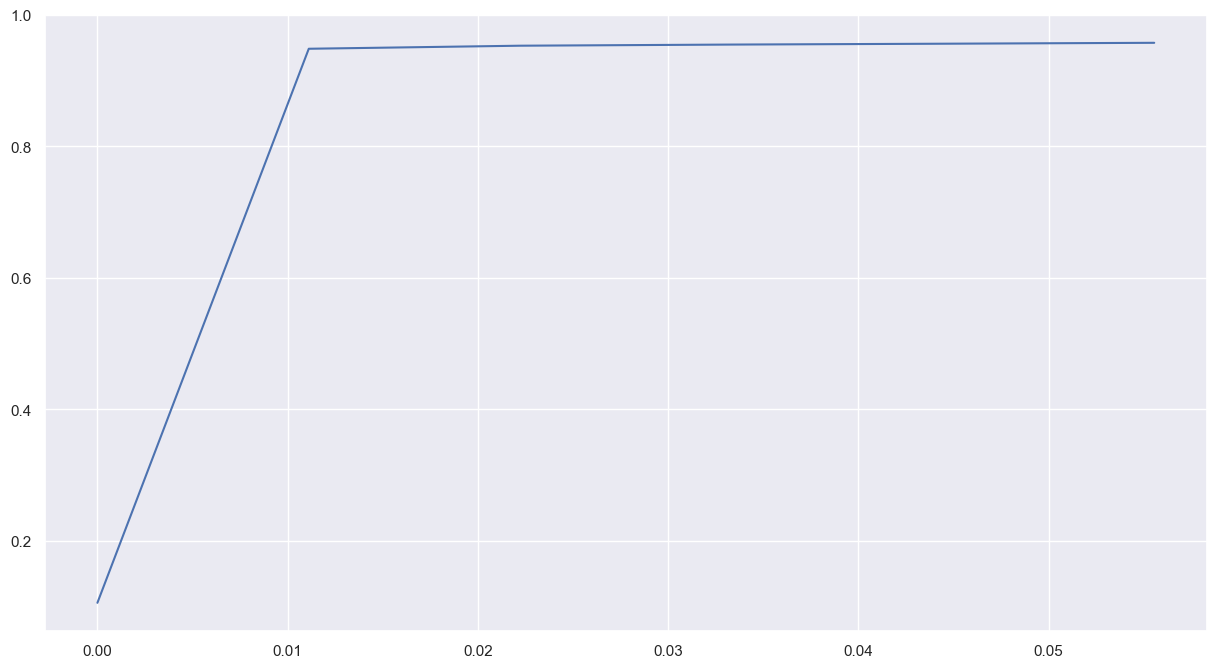

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.06666666666666667
0.9583333134651184 0.9560999870300293
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.06666666666666667
0.9572499990463257 0.9549999833106995
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.06666666666666667
0.9610000252723694 0.9587000012397766
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

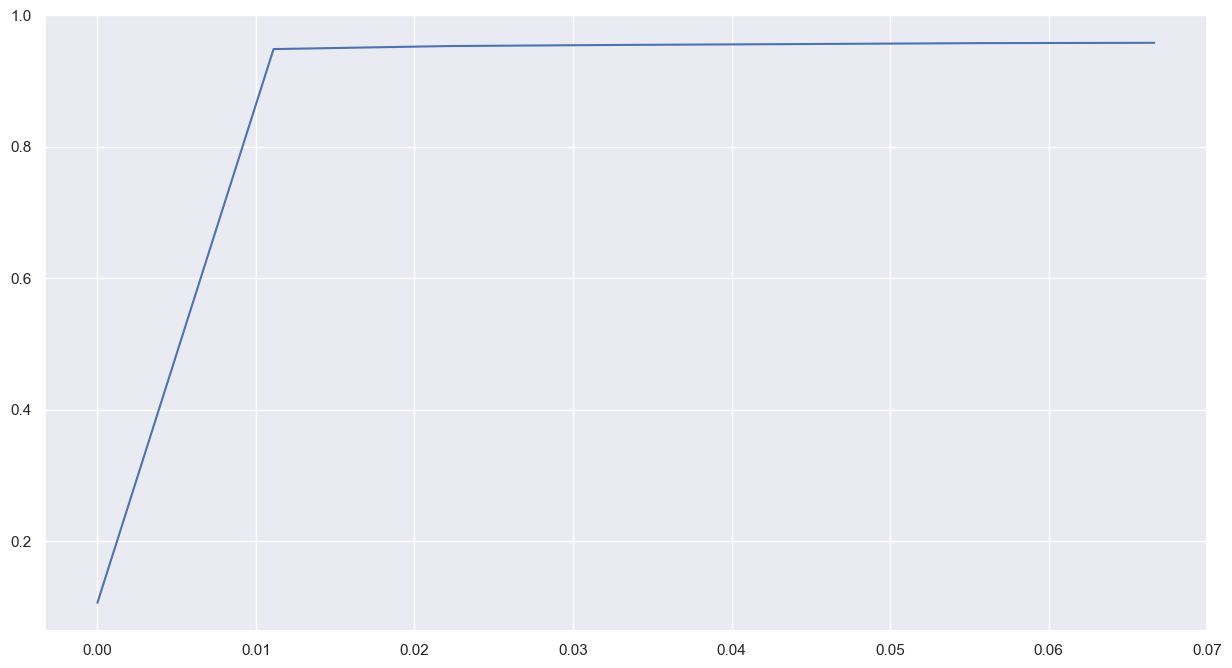

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.07777777777777778
0.9605000019073486 0.9599999785423279
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.07777777777777778
0.9595000147819519 0.960099995136261
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.07777777777777778
0.9576666951179504 0.9570000171661377
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , 

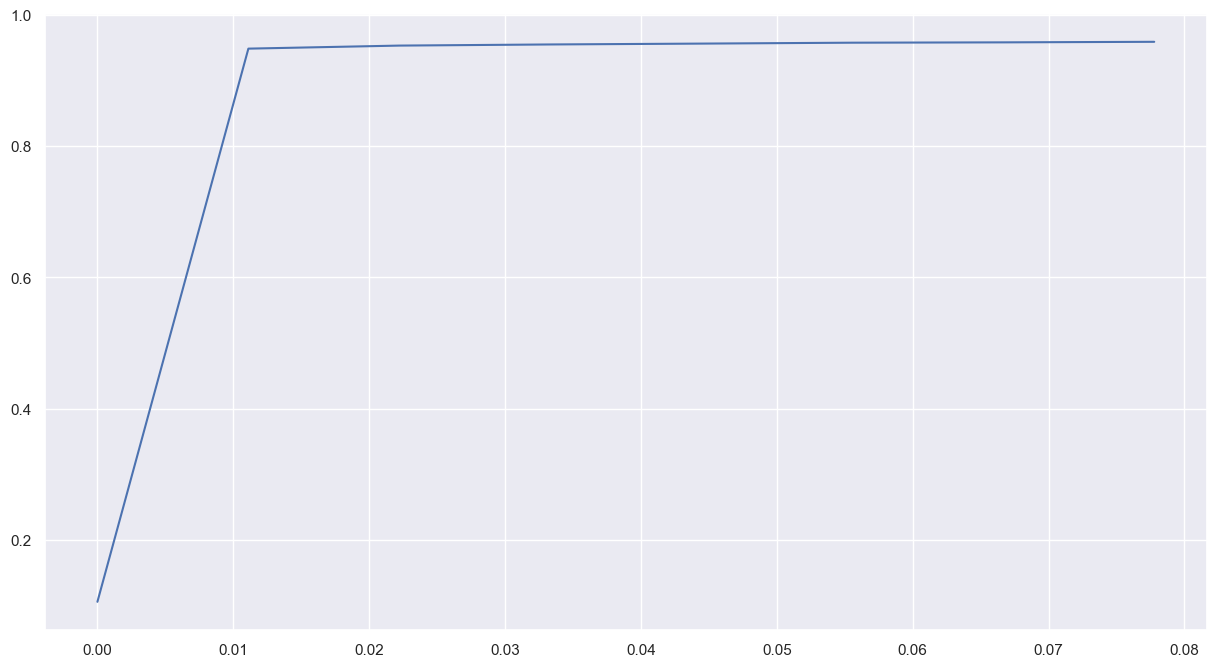

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.08888888888888889
0.9582499861717224 0.95660001039505
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.08888888888888889
0.9615833163261414 0.9599000215530396
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.08888888888888889
0.9640833139419556 0.9625999927520752
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

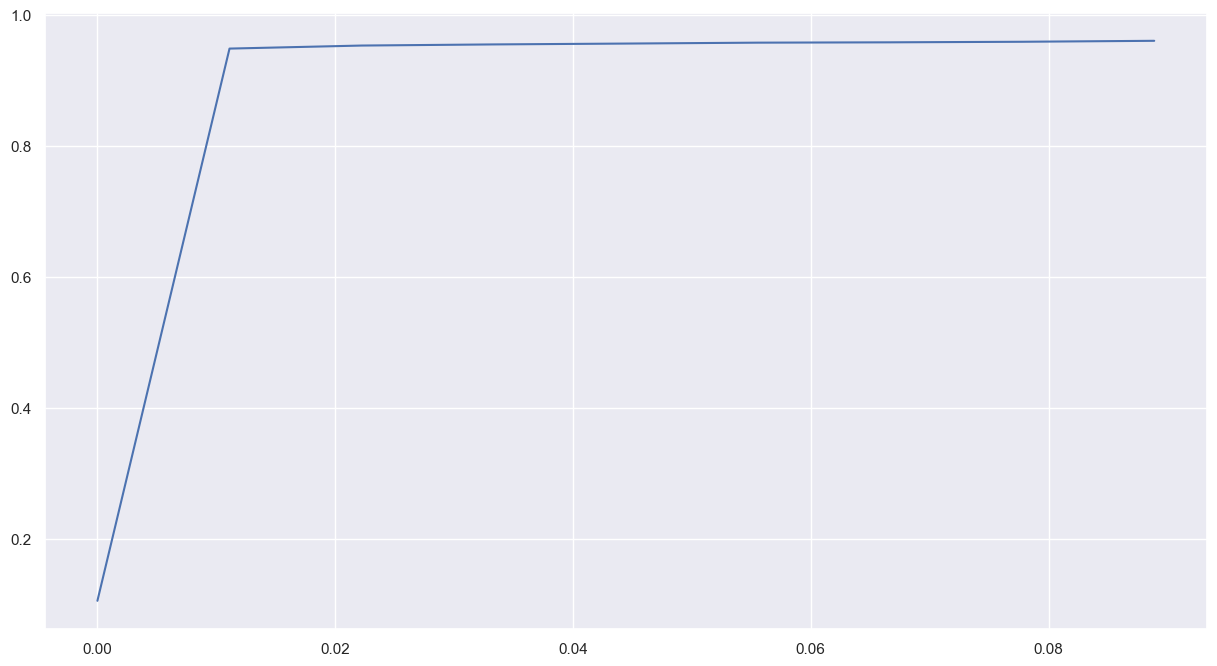

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.1
0.9589999914169312 0.9585000276565552
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.1
0.9610000252723694 0.9605000019073486
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.1
0.9607499837875366 0.958299994468689
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradi

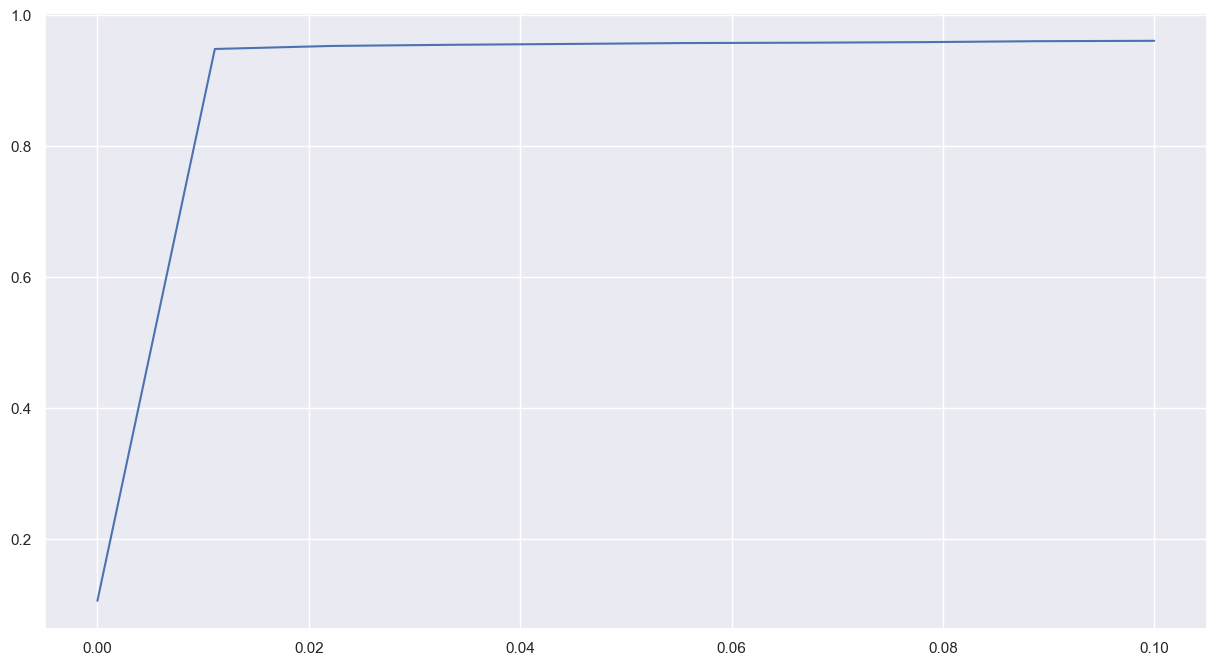

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9575833082199097 0.9538999795913696
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9555833339691162 0.9524999856948853
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9576666951179504 0.9559999704360962
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , g

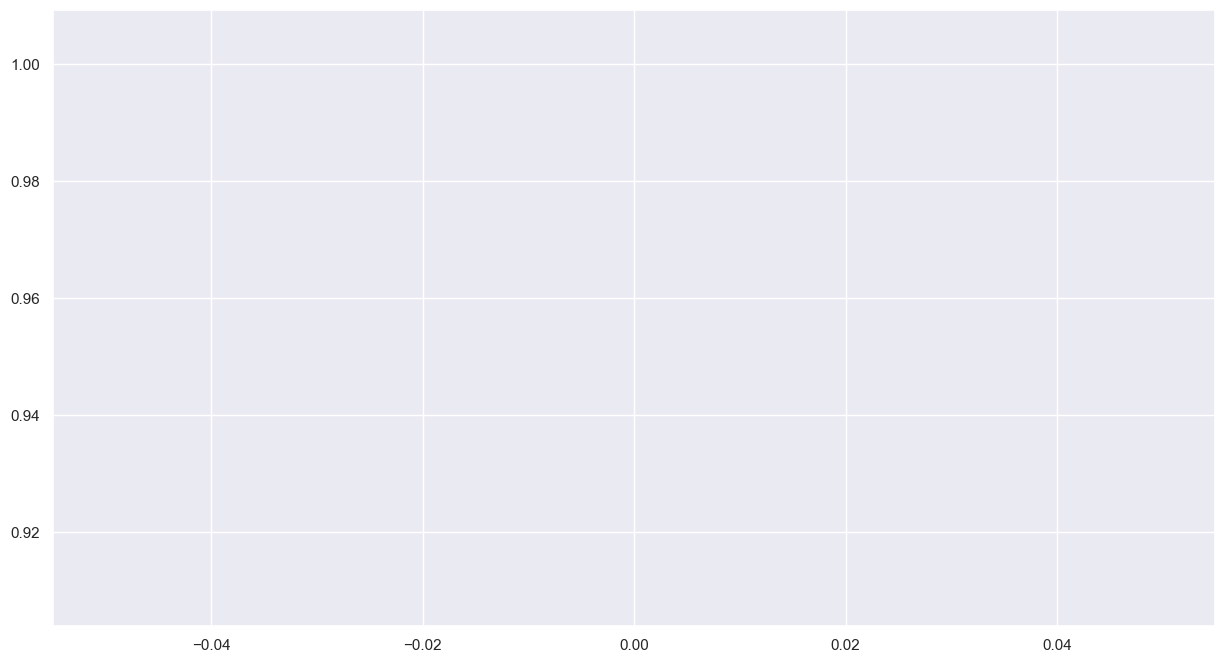

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.1111111111111111 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9628333449363708 0.9642000198364258
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.1111111111111111 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9636666774749756 0.9627000093460083
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.1111111111111111 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.965499997138977 0.9653000235557556
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , 

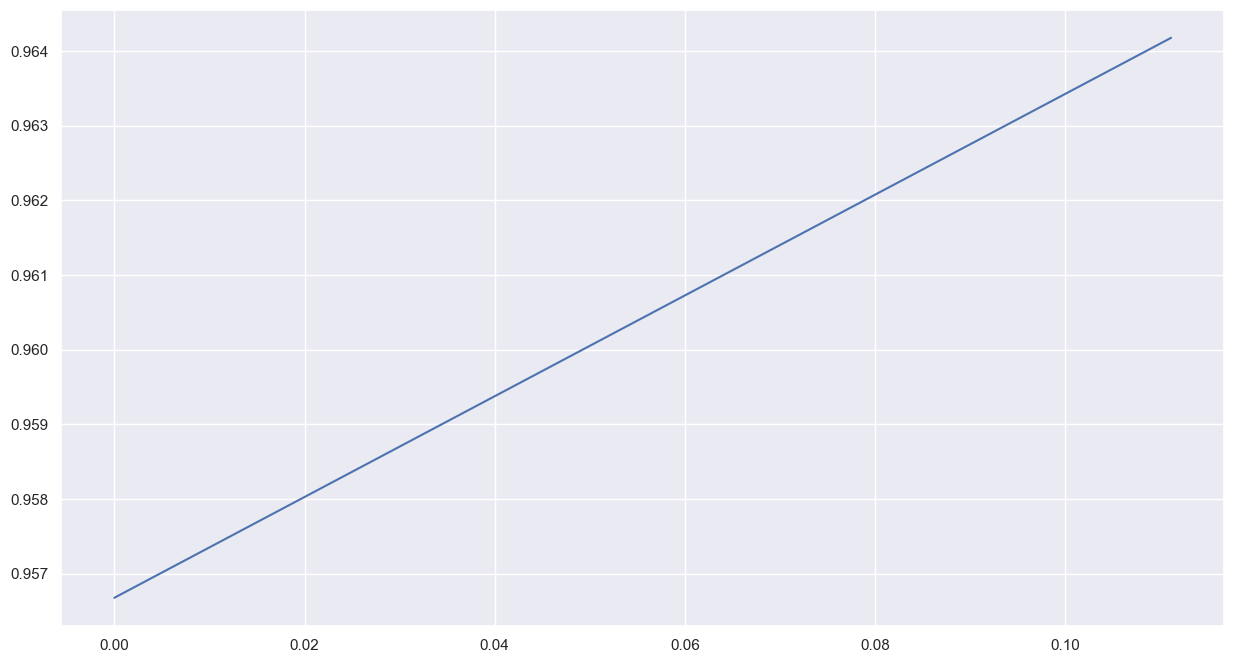

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.2222222222222222 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9635000228881836 0.9621999859809875
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.2222222222222222 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9622499942779541 0.9620000123977661
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.2222222222222222 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9644166827201843 0.9645000100135803
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

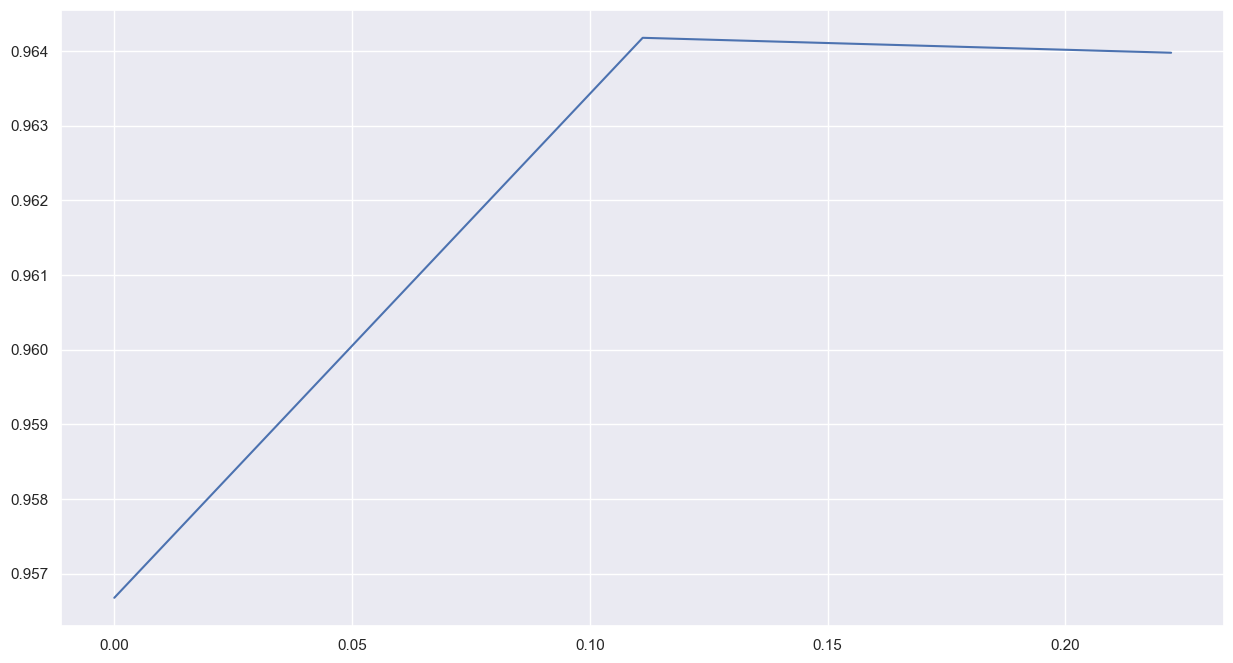

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.3333333333333333 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9653333425521851 0.9653000235557556
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.3333333333333333 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9616666436195374 0.9620000123977661
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.3333333333333333 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9648333191871643 0.9639000296592712
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

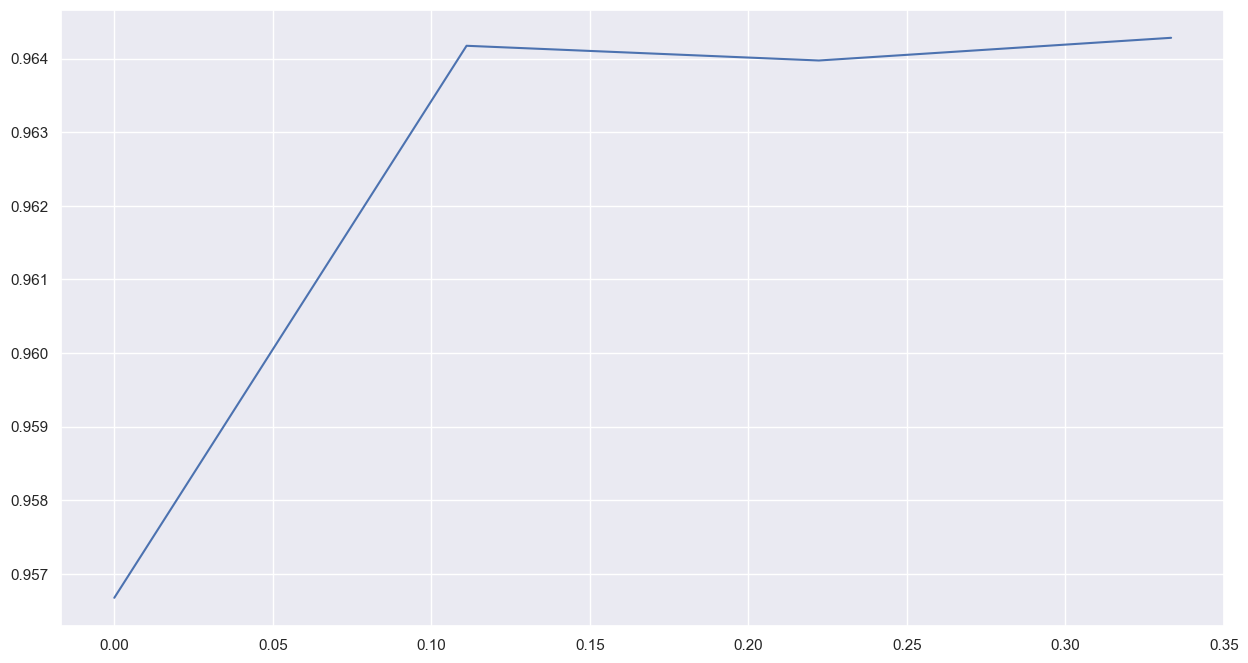

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.4444444444444444 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9660000205039978 0.96670001745224
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.4444444444444444 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9664166569709778 0.9643999934196472
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.4444444444444444 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9632499814033508 0.9610999822616577
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

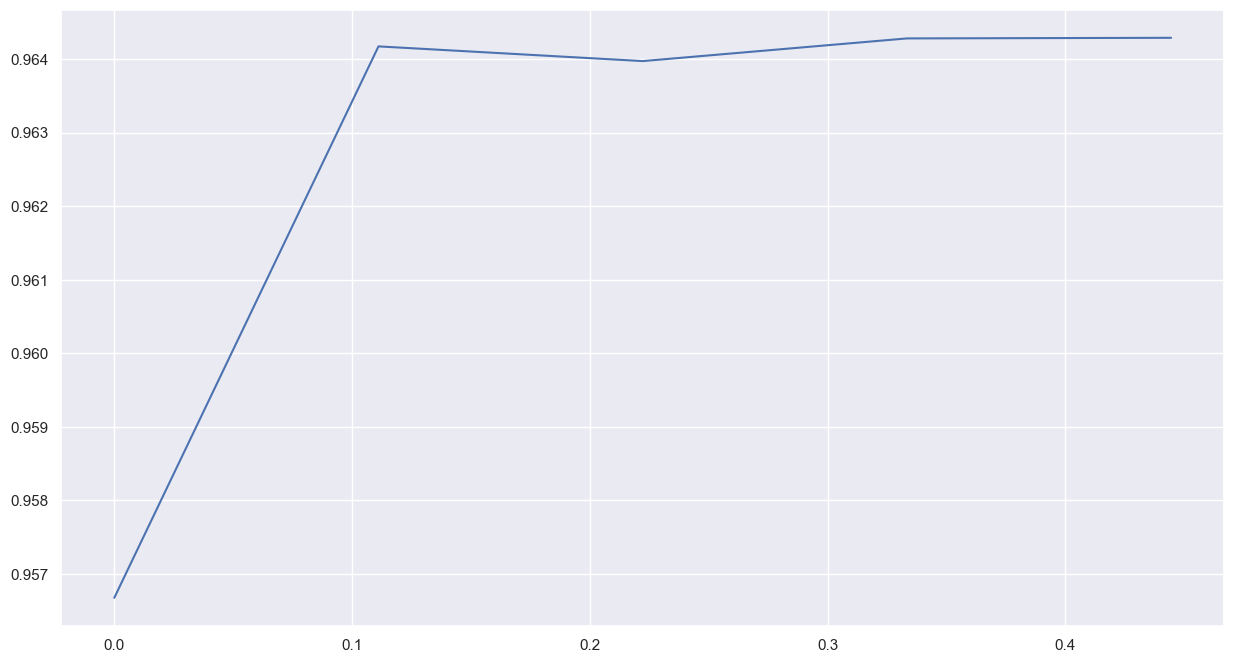

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.5555555555555556 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9627500176429749 0.9624999761581421
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.5555555555555556 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9646666646003723 0.963100016117096
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.5555555555555556 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.965833306312561 0.9648000001907349
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

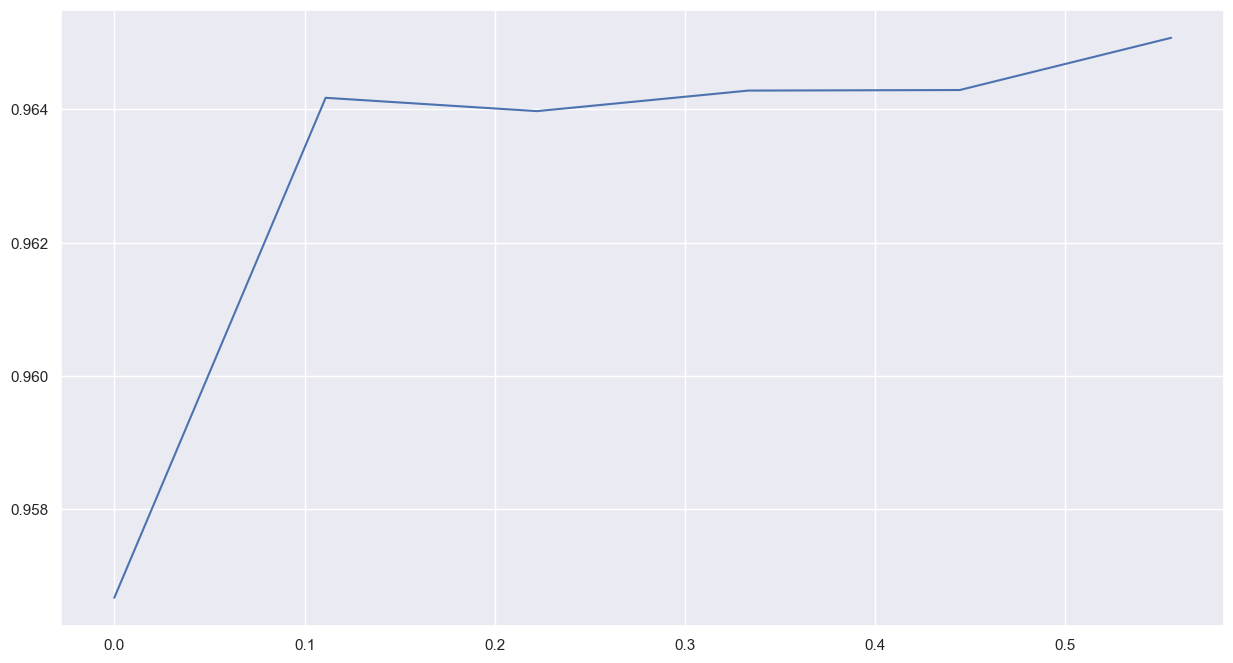

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.6666666666666666 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9664999842643738 0.965399980545044
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.6666666666666666 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.965749979019165 0.9646999835968018
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.6666666666666666 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9664166569709778 0.9667999744415283
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , l

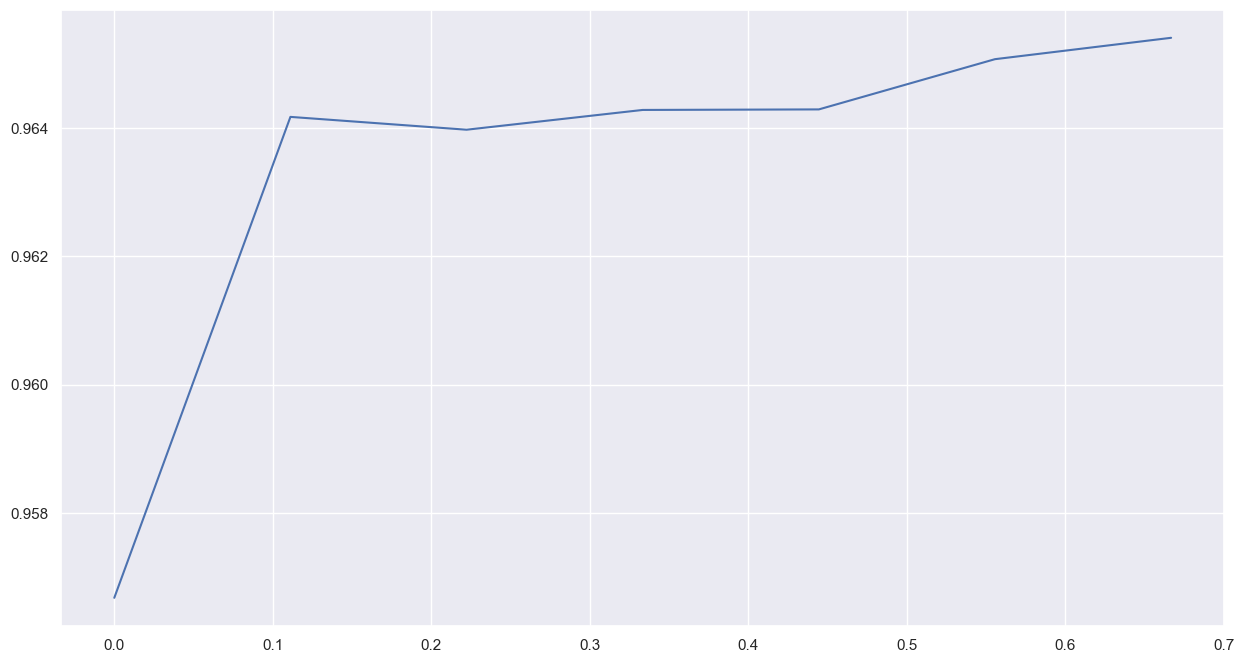

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.7777777777777777 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9649166464805603 0.9625999927520752
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.7777777777777777 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9660833477973938 0.9646000266075134
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.7777777777777777 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9676666855812073 0.9643999934196472
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

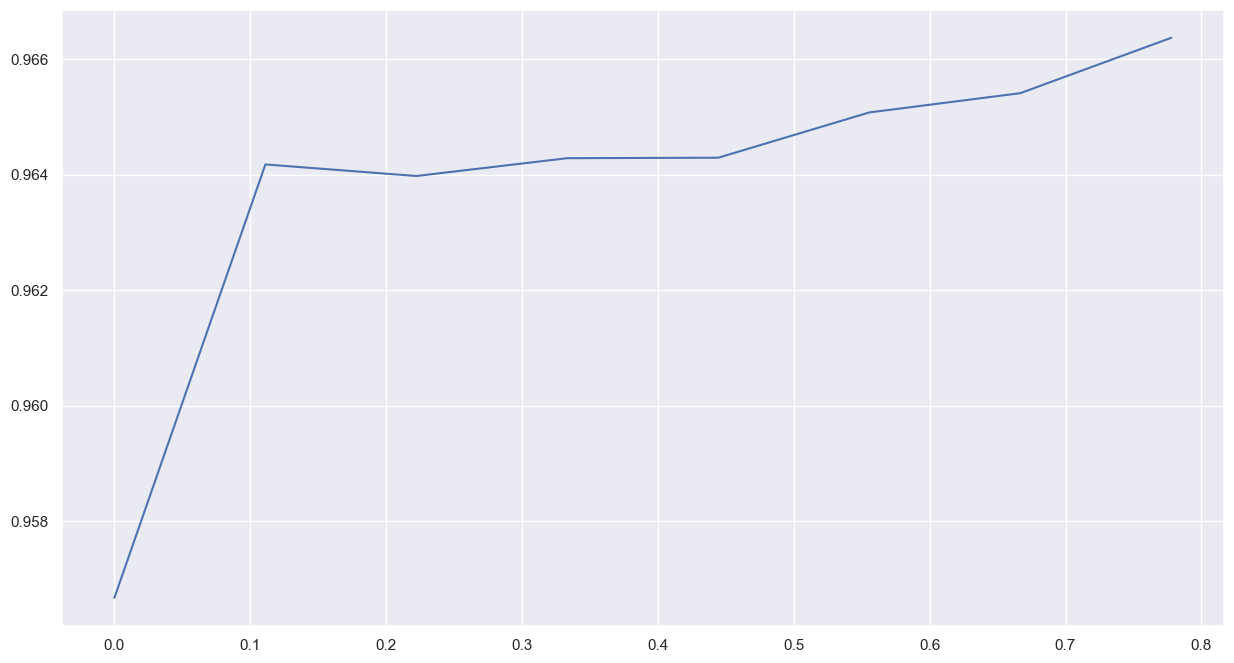

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.8888888888888888 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9677500128746033 0.9685999751091003
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.8888888888888888 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9633333086967468 0.9617000222206116
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.8888888888888888 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.9663333296775818 0.9671000242233276
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 ,

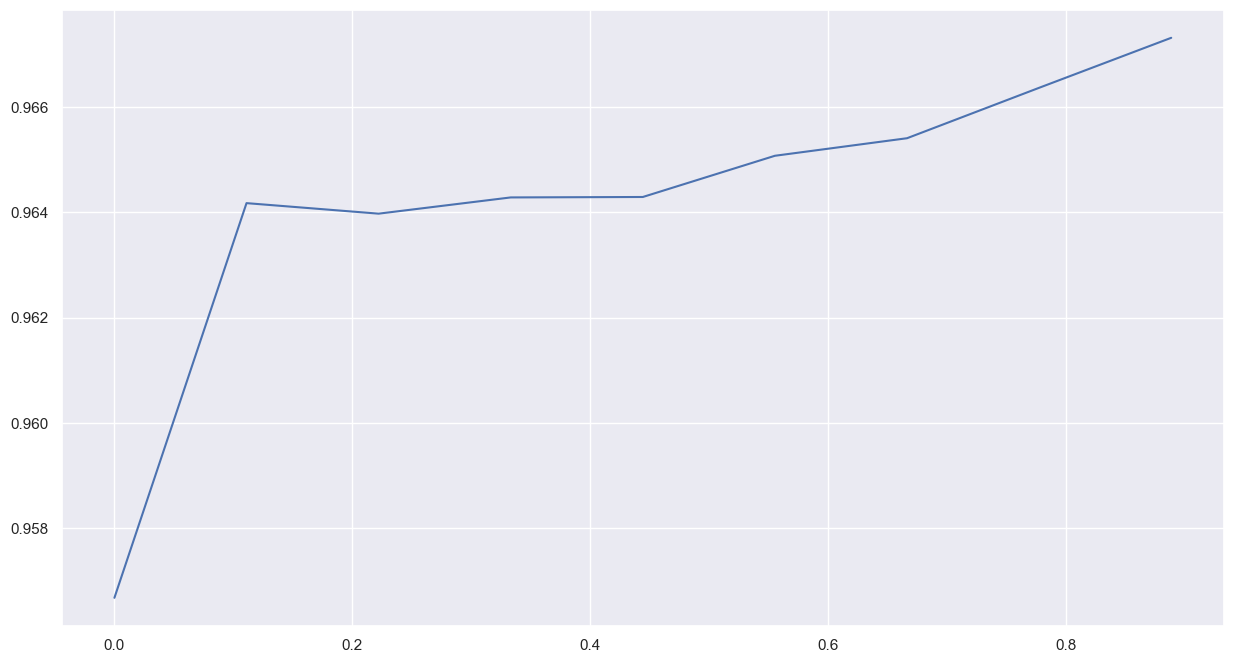

20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 1.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.11758333444595337 0.12189999967813492
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 1.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.09391666948795319 0.093299999833107
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 1.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0.0 , weight_std: 0.05
0.08108333498239517 0.07649999856948853
20

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 1.0 , weight_noise: 0.0

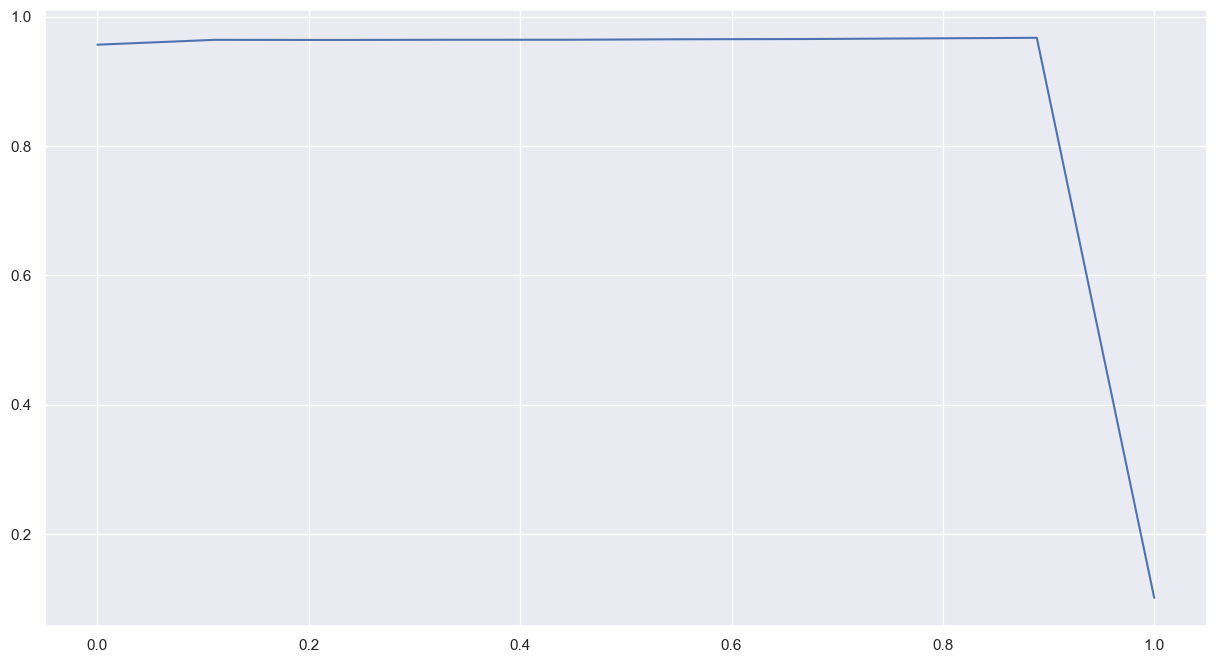

In [50]:
from Swarm import Star, Swarm
import numpy as np
import copy 
np.set_printoptions(suppress=True)

#exp_df = pd.DataFrame(columns=['method', 'loss', 'activation', 'input', 'gradient noise', 'weight', 
#                               'gradient dropout', 'dropout', 
#           'dropconnect', 'batch', 'increase batch' , 'drnn', 'init', 'label smoothing','test'])


methods = ['loss', 'activation', 'input', 'gradient noise', 'weight', 'gradient dropout', 'dropout', 
           'dropconnect', 'batch', 'increase batch' , 'drnn', 'init', 'label smoothing']

bounds = [[0.0, 1.], [0.0, .1], [0.0, 1.], [0.0, 1.], [0.0, .001], [0.0, 0.50], [0.0, 0.50], [0.0, 0.50], [16, nn.max_batch], [0.0, 1.0], [0.0, 0.50], [0., 0.1], [0.0, 1.0]]
population_size = 10
ind_size = 13
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}

default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1024, 1.0, 0.0, 0.05, 0.0]




for choice, method in zip(range(len(methods)), methods):
    values = []
    fitnesses = []
    for value in np.linspace(bounds[choice][0], bounds[choice][1], 10):
        tmp_setting = copy.copy(default_settings)
        tmp_setting[choice] = value

            
        tmp_fitness= 0
        for _ in range(10):
            fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
            tmp_fitness += fitness
        
        values.append(value)
        fitnesses.append(tmp_fitness/10)
        
        
        plt.plot(values, fitnesses)
        plt.show()

        #print(value, fitness)
            


In [5]:


exp_df = pd.DataFrame(columns=['method', 'loss', 'activation', 'input', 'gradient noise', 'weight', 
                               'gradient dropout', 'dropout', 
           'dropconnect', 'batch', 'increase batch' , 'drnn', 'init', 'label smoothing','test'])


methods = ['loss', 'activation', 'input', 'gradient noise', 'weight', 'gradient dropout', 'dropout', 
           'dropconnect', 'batch', 'increase batch' , 'drnn', 'init', 'label smoothing']

bounds = [[0.0, 1.], [0.0, .1], [0.0, 1.], [0.0, 1.], [0.0, .001], [0.0, 0.50], [0.0, 0.50], [0.0, 0.50], [16, nn.max_batch], [0.0, 1.0], [0.0, 0.50], [0., 0.1], [0.0, 1.0]]
population_size = 10
ind_size = 13
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}

default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]




for choice, method in zip(range(len(methods)), methods):
    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
    best_fitness = 0
    for i in range(population_size):

        for j in range(ind_size):
            if j != choice:
                swarm.position[i][j] = default_settings[j]
            
                
        fitness = NeuroEvolution.evaluate(swarm.position[i], [nn])[0]
            
        if fitness > best_fitness:
                best_fitness = fitness
                best_setting = swarm.position[i]
                print(method, fitness)
                
    for _ in range(5):
            fitness = NeuroEvolution.evaluate(best_setting, [nn], test_time=True)[0]
            row = []
            row .append(method)
            for value in best_setting:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row

            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
                
            


IndexError: index 13 is out of bounds for axis 0 with size 13

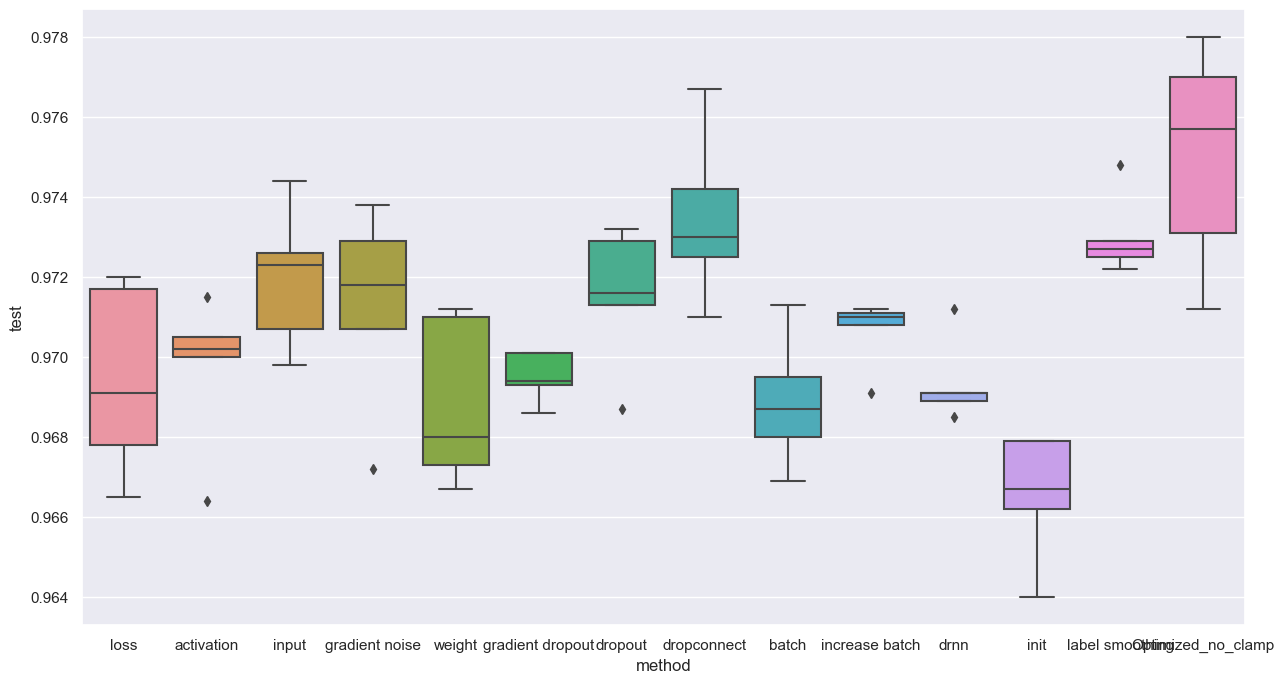

In [16]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='method', y='test', data=exp_df)
#plt.ylim(0.9, 1.0)
plt.show()

In [26]:
population_size = 10
ind_size = 14
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}
bounds = [[0.0, 1.], [0.0, .1], [0.0, 1.], [0.0, 1.], [0.0, .001], [0.0, 0.50], [0.0, 0.50], [0.0, 0.50], [16, nn.max_batch], [0.0, 1.0], [0.0, 0.50], [0., 0.1], [0.0, 1.0], [0.0, 1.0]]


for _ in range(5):
    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)


        

    for i in range(population_size):
        choice = np.random.choice(range(18), 4, replace=False)
        for j in range(ind_size):
            if j not in choice and j not in [8,9,11]:
                swarm.position[i][j] = default_settings[j]


    ost, pos, time_found = swarm.optimize(nn, steps=10, no_change=np.inf, verbose=1)
    
    for _ in range(5):

    
            fitness = NeuroEvolution.evaluate(pos, [nn], test_time=True)[0]
            row = []
            row .append('Optimized')
            for value in pos:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()

1

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.2341597742130317 , gradient_noise: 0.6863046535031346 , batch_size: 74 , dropout: 0.11586054238373023 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0.0 , weight_std: 0.015623395263737006 , random_flip: 0 , random_rotation: 0.0 , random_zoom: 0.2956395937591599 , random_translation: 0.0 , random_contrast: 0.0
0.10599999874830246 0.11349999904632568
1

loss_noise: 0.0 , activation_noise: 0.0945566223853575 , input_noise: 0.0 , label_smoothing: 0.725895895341243 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 952 , dropout: 0.3742065336385274 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0.0 , weight_std: 0.08312898820263248 , random_flip: 0 , random_rotation: 0.0 , random_zoom: 0.0 , random_translation: 0.0 , random_contrast: 0.1594209553155455
0.10599999874830246 0.11349999904632568
1

loss_noise: 0.0 , activation_noise: 0.0

KeyboardInterrupt: 

1


In [5]:
pos = [  0.01108191,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.06863313,   0.        ,
       482.52215721,   0.86935831,   0.25605821,   0.05473403,
         0.34246499]

In [23]:
pos

array([  0.01108191,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.06863313,   0.        ,
       482.52215721,   0.86935831,   0.25605821,   0.05473403,
         0.34246499])

In [14]:
exp_df

method      loss  activation     input  gradient noise  \
0   Optimized-24random4  0.011082    0.000000  0.000000        0.000000   
1   Optimized-24random4  0.011082    0.000000  0.000000        0.000000   
2   Optimized-24random4  0.011082    0.000000  0.000000        0.000000   
3   Optimized-24random4  0.011082    0.000000  0.000000        0.000000   
4   Optimized-24random4  0.011082    0.000000  0.000000        0.000000   
5   Optimized-24random4  0.000000    0.030878  0.000000        0.000000   
6   Optimized-24random4  0.000000    0.030878  0.000000        0.000000   
7   Optimized-24random4  0.000000    0.030878  0.000000        0.000000   
8   Optimized-24random4  0.000000    0.030878  0.000000        0.000000   
9   Optimized-24random4  0.000000    0.030878  0.000000        0.000000   
10  Optimized-24random4  0.000000    0.000000  0.000000        0.000000   
11  Optimized-24random4  0.000000    0.000000  0.000000        0.000000   
12  Optimized-24random4  0.000000    0.000000  0.000000        0.000000   
13  Optimized-24random4  0.000000    0.000000  0.000000        0.000000   
14  Optimized-24random4  0.000000    0.000000  0.000000        0.000000   
15  Optimized-24random4  0.000000    0.000000  0.002512        0.006984   
16  Optimized-24random4  0.000000    0.000000  0.002512        0.006984   
17  Optimized-24random4  0.000000    0.000000  0.002512        0.006984   
18  Optimized-24random4  0.000000    0.000000  0.002512        0.006984   
19  Optimized-24random4  0.000000    0.000000  0.002512        0.006984   
20  Optimized-24random4  0.395158    0.050617  0.010668        0.144568   
21  Optimized-24random4  0.395158    0.050617  0.010668        0.144568   
22  Optimized-24random4  0.395158    0.050617  0.010668        0.144568   
23  Optimized-24random4  0.395158    0.050617  0.010668        0.144568   
24  Optimized-24random4  0.395158    0.050617  0.010668        0.144568   

      weight  gradient dropout   dropout  dropconnect       batch  \
0   0.000000          0.000000  0.068633      0.00000  482.522157   
1   0.000000          0.000000  0.068633      0.00000  482.522157   
2   0.000000          0.000000  0.068633      0.00000  482.522157   
3   0.000000          0.000000  0.068633      0.00000  482.522157   
4   0.000000          0.000000  0.068633      0.00000  482.522157   
5   0.000072          0.000000  0.118760      0.00223  129.944212   
6   0.000072          0.000000  0.118760      0.00223  129.944212   
7   0.000072          0.000000  0.118760      0.00223  129.944212   
8   0.000072          0.000000  0.118760      0.00223  129.944212   
9   0.000072          0.000000  0.118760      0.00223  129.944212   
10  0.000000          0.066175  0.098045      0.00000  261.669707   
11  0.000000          0.066175  0.098045      0.00000  261.669707   
12  0.000000          0.066175  0.098045      0.00000  261.669707   
13  0.000000          0.066175  0.098045      0.00000  261.669707   
14  0.000000          0.066175  0.098045      0.00000  261.669707   
15  0.000000          0.256436  0.078243      0.00000  225.583172   
16  0.000000          0.256436  0.078243      0.00000  225.583172   
17  0.000000          0.256436  0.078243      0.00000  225.583172   
18  0.000000          0.256436  0.078243      0.00000  225.583172   
19  0.000000          0.256436  0.078243      0.00000  225.583172   
20  0.000000          0.000000  0.084628      0.00000   16.000000   
21  0.000000          0.000000  0.084628      0.00000   16.000000   
22  0.000000          0.000000  0.084628      0.00000   16.000000   
23  0.000000          0.000000  0.084628      0.00000   16.000000   
24  0.000000          0.000000  0.084628      0.00000   16.000000   

    increase batch      drnn      init  label smoothing    test  
0         0.869358  0.256058  0.054734         0.342465  0.9960  
1         0.869358  0.256058  0.054734         0.342465  0.9957  
2         0.869358  0.256058  0.054734         0.342465  0.9955  
3      

In [ ]:
##### import copy

#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nn.max_batch, 100, 0.0, 0.1]
#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]


settings = []
for idx, row in exp_df[exp_df['method'] == 'Optimized'].iloc[:, 1:].iterrows():
        setting = row.astype(np.float32)
        print(setting)

        for i in range(len(methods)):
            if (setting[i] == default_settings[i]):
                print(methods[i], setting[i])
                
                    
                line = []
                line .append('No '+methods[i])
                for value in setting:
                    line.append(value)
                
                
            else:
                temp_setting = copy.copy(setting)
                temp_setting[i] = default_settings[i]
                
                if (methods[i] == 'increase batch'):
                    temp_setting[i-1] = setting[i-1]
                    
                fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
                line = []
                line .append('No '+methods[i])
                for value in temp_setting[:-1]:
                    line.append(value)
                line.append(fitness)
                
            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()

            

In [46]:
exp_df = exp_df.iloc[:465,:]

In [14]:
exp_df

method  loss  activation     input  gradient noise  weight  \
0           default   0.0         0.0  0.000000             0.0     0.0   
1           default   0.0         0.0  0.000000             0.0     0.0   
2           default   0.0         0.0  0.000000             0.0     0.0   
3           default   0.0         0.0  0.000000             0.0     0.0   
4           default   0.0         0.0  0.000000             0.0     0.0   
..              ...   ...         ...       ...             ...     ...   
475         No flip   0.0         0.0  0.261131             0.0     0.0   
476     No rotation   0.0         0.0  0.261131             0.0     0.0   
477         No zoom   0.0         0.0  0.261131             0.0     0.0   
478  No translation   0.0         0.0  0.261131             0.0     0.0   
479     No contrast   0.0         0.0  0.261131             0.0     0.0   

     gradient dropout  dropout  dropconnect  batch  increase batch      drnn  \
0             0.00000      0.0          0.0   32.0        1.000000  0.000000   
1             0.00000      0.0          0.0   32.0        1.000000  0.000000   
2             0.00000      0.0          0.0   32.0        1.000000  0.000000   
3             0.00000      0.0          0.0   32.0        1.000000  0.000000   
4             0.00000      0.0          0.0   32.0        1.000000  0.000000   
..                ...      ...          ...    ...             ...       ...   
475           0.22285      0.0          0.0   16.0        0.261858  0.051063   
476           0.22285      0.0          0.0   16.0        0.261858  0.051063   
477           0.22285      0.0          0.0   16.0        0.261858  0.051063   
478           0.22285      0.0          0.0   16.0        0.261858  0.051063   
479           0.22285      0.0          0.0   16.0        0.261858  0.051063   

         init  label smoothing      flip  rotation  zoom  translation  \
0    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
1    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
2    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
3    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
4    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
..        ...              ...       ...       ...   ...          ...   
475  0.023819              0.0  0.000000  0.154241   0.0     0.358419   
476  0.023819              0.0  2.055565  0.000000   0.0     0.358419   
477  0.023819              0.0  2.055565  0.154241   0.0     0.358419   
478  0.023819              0.0  2.055565  0.154241   0.0     0.000000   
479  0.023819              0.0  2.055565  0.154241   0.0     0.358419   

     contrast    test  
0    0.000000  0.9719  
1    0.000000  0.9712  
2    0.000000  0.9688  
3    0.000000  0.9735  
4    0.000000  0.9717  
..        ...     ...  
475  0.394561  0.9801  
476  0.394561  0.9827  
477  0.394561  0.9808  
478  0.394561  0.9812  
479  0.000000  0.9798  

[480 rows x 20 columns]

In [15]:
for method in exp_df['method'].unique():
    print(method, exp_df[exp_df['method'] == method]['test'].mean())

default 0.9714200019836425
Optimized 0.9781159973144531
No loss 0.9787199974060059
No activation 0.9782439994812012
No input 0.9750599956512451
No gradient noise 0.9778999972343445
No weight 0.9785399961471558
No gradient dropout 0.9784239983558655
No dropout 0.9781639981269836
No dropconnect 0.9780760002136231
No batch 0.9780519986152649
No increase batch 0.9772519993782044
No drnn 0.9784639978408813
No init 0.9784519982337951
No label smoothing 0.9774279975891114
No flip 0.9781239986419678
No rotation 0.9782919979095459
No zoom 0.9786479949951172
No translation 0.9783599972724915
No contrast 0.9779800033569336


In [19]:
from scipy.stats import ttest_ind, ttest_rel

for method in exp_df['method'].iloc[90:].unique():
    #print(method, exp_df[exp_df['method'] == method]['test'].mean())
    res = ttest_rel(exp_df[exp_df['method'] == method]['test'], exp_df[exp_df['method'] == 'Optimized']['test'])
    if (res[1] < 0.05):
        print(method, res)
        print(100*np.mean(exp_df[exp_df['method'] == method]['test'].values- exp_df[exp_df['method'] == 'Optimized']['test'].values))


No increase batch TtestResult(statistic=-2.4238301175092167, pvalue=0.0232614703075617, df=24)
-0.08639979362487793
No label smoothing TtestResult(statistic=-2.27847784022304, pvalue=0.031888848183412054, df=24)
-0.06879997253417969
No loss TtestResult(statistic=2.638195286833199, pvalue=0.014401905429621286, df=24)
0.06040000915527344
No input TtestResult(statistic=-4.823901538269976, pvalue=6.498776266724542e-05, df=24)
-0.3056001663208008


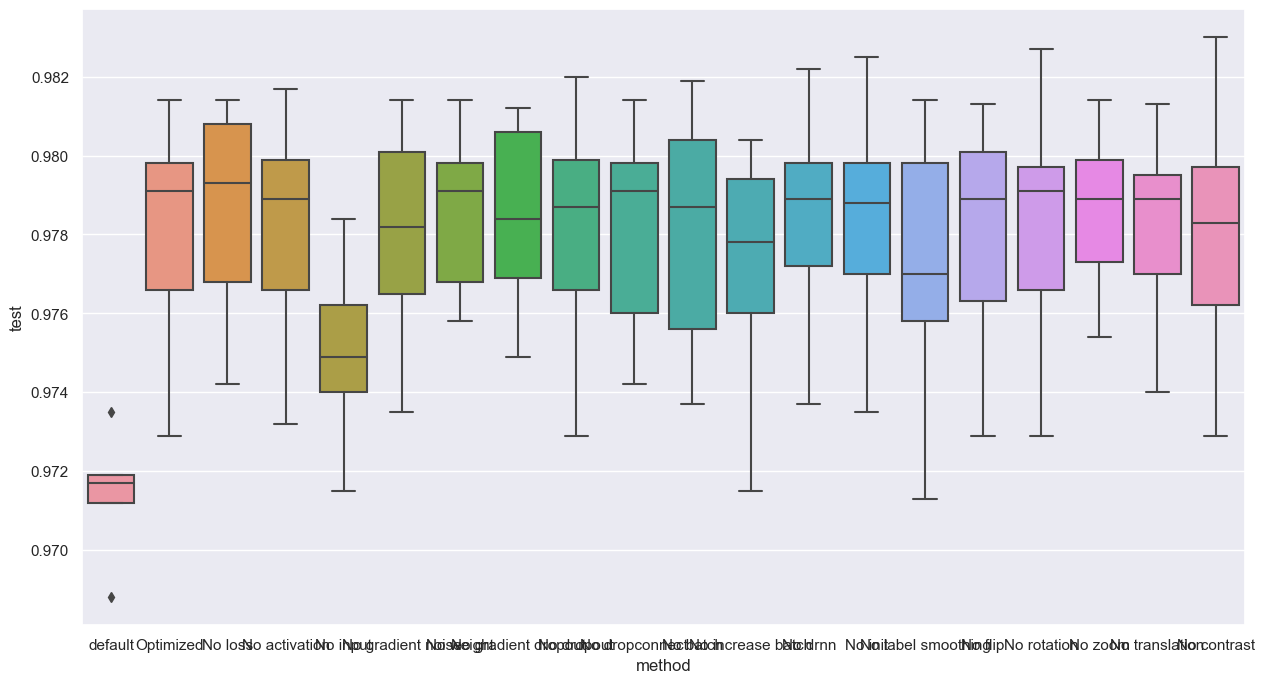

In [17]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='method', y='test', data=exp_df)
#plt.ylim(0.9, 1.0)
plt.show()


In [39]:
exp_df

method  loss  activation  input  gradient noise  weight  gradient dropout  \
0  default   0.0         0.0    0.0             0.0     0.0               0.0   
1  default   0.0         0.0    0.0             0.0     0.0               0.0   
2  default   0.0         0.0    0.0             0.0     0.0               0.0   
3  default   0.0         0.0    0.0             0.0     0.0               0.0   
4  default   0.0         0.0    0.0             0.0     0.0               0.0   

   dropout  dropconnect  batch  increase batch  drnn  init  label smoothing  \
0      0.0          0.0     32             1.0   0.0  0.05              0.0   
1      0.0          0.0     32             1.0   0.0  0.05              0.0   
2      0.0          0.0     32             1.0   0.0  0.05              0.0   
3      0.0          0.0     32             1.0   0.0  0.05              0.0   
4      0.0          0.0     32             1.0   0.0  0.05              0.0   

   flip  rotation  zoom  translation  contrast    test  
0   0.0       0.0   0.0          0.0       0.0  0.9821  
1   0.0       0.0   0.0          0.0       0.0  0.9789  
2   0.0       0.0   0.0          0.0       0.0  0.9888  
3   0.0       0.0   0.0          0.0       0.0  0.9847  
4   0.0       0.0   0.0          0.0       0.0  0.9880

In [38]:
exp_df[exp_df['method'] == 'Optimized']

Empty DataFrame
Columns: [method, loss, activation, input, gradient noise, weight, gradient dropout, dropout, dropconnect, batch, increase batch, drnn, init, label smoothing, flip, rotation, zoom, translation, contrast, test]
Index: []

In [72]:
from Swarm import Star, Swarm
import numpy as np
np.set_printoptions(suppress=True)

nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, patience, verbose=verbose,
              max_batch=max_batch, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)

loss_noise = 0.0
activation_noise = 0.0
input_noise = 0.0
gradient_noise = 0.0
weight_noise = 0.0
gradient_dropout = .0
dropout = 0.0
drop_connect = 0.0
batch_size = len(nn.dataset.X_train)
double_batch_on = np.inf
drnn = 0.0

bounds = [[0.0, 1.], [0.0, .1], [0.0, 1.], [0.0, 1.], [0.0, .01], [0.0, 0.50], [0.0, 0.50], [0.0, 0.50], [1024, nn.max_batch], [1, 100], [0.0, 0.50], [0., 1.]]
population_size = 12
ind_size = 12
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}
star = Star(population_size)
swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)

#i = 0
#for choice in [0,1,2,3,4,5,6,7,10]:
#    for j in range(ind_size):
#        if j != choice and j != 8 and j != 9 and j !=11:
#            swarm.position[i][j] = bounds[j][0]
#    i += 1
                
        

for i in range(population_size//2):
    choice = np.random.choice([0,1,2,3,4,5,6,7,10], 1, replace=False)
    for j in range(ind_size):
        if j not in choice and j != 8 and j != 9 and j !=11:
            swarm.position[i][j] = bounds[j][0]
        


ost, pos, time_found = swarm.optimize(nn, steps=10, no_change=np.inf, verbose=1)


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.9994776829066808 , batch_size: 5674 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 80 , drnn: 0.0 , weight_std: 0.5427292747927617
0.11641667038202286 0.12399999797344208

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.008040264675279777 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 3858 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 15 , drnn: 0.0 , weight_std: 0.08258055579980106


KeyboardInterrupt: 

In [30]:
ost, pos, time_found = swarm.optimize(nn, steps=10, no_change=np.inf, verbose=1)


loss_noise: 0.0 , activation_noise: 0.036878749308192384 , input_noise: 0.0 , weight_noise: 0.0011303171842425505 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 100 , drnn: 0.0 , weight_std: 0.7832206408334241


KeyboardInterrupt: 

In [33]:
swarm.best_pos

array([   0.74304649,    0.02883355,    0.30363384,    0.30922167,
          0.        ,    0.        ,    0.        ,    0.        ,
       1024.        ,   64.93006522,    0.        ,    0.1488505 ])

In [74]:
swarm.best_cost

0.9785833358764648

In [18]:
swarm.best_pos

array([ 0.25371868,  0.03945196,  0.03666946,  0.        ,  0.        ,
        0.06510112,  0.23321079,  0.        , 24.0076223 , 10.41801129,
        0.07480038])

In [ ]:
array([   0.74304649,    0.02883355,    0.30363384,    0.30922167,
          0.        ,    0.        ,    0.        ,    0.        ,
       1024.        ,   64.93006522,    0.        ,    0.1488505 ])

In [35]:
exp_df = pd.DataFrame(columns=['settings', 'test', 'training time', 'inference time'])


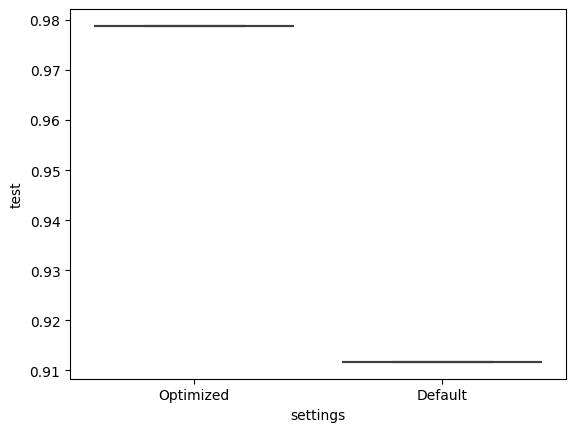

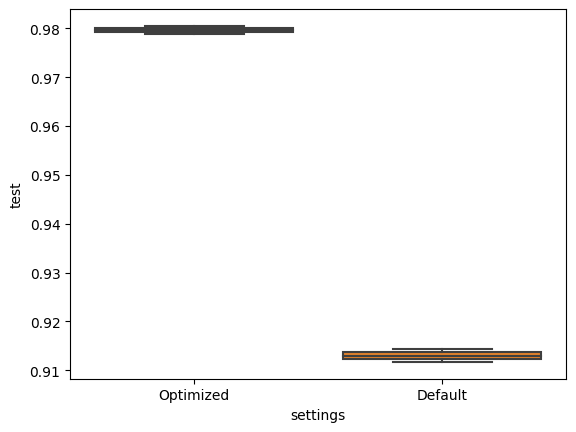

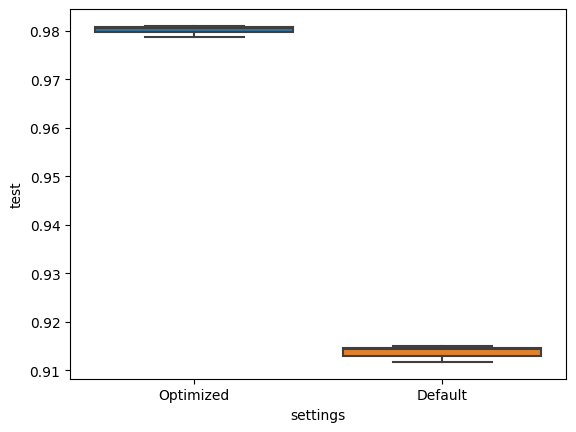

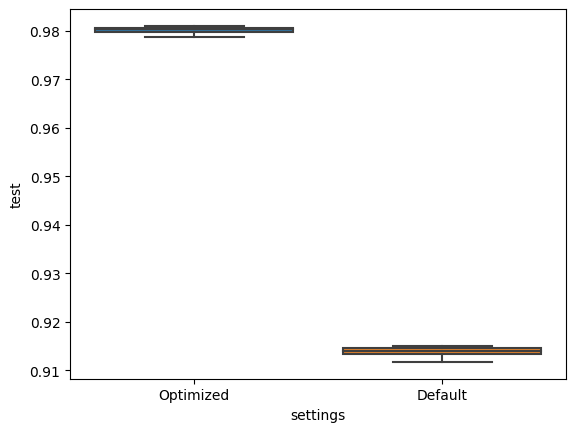

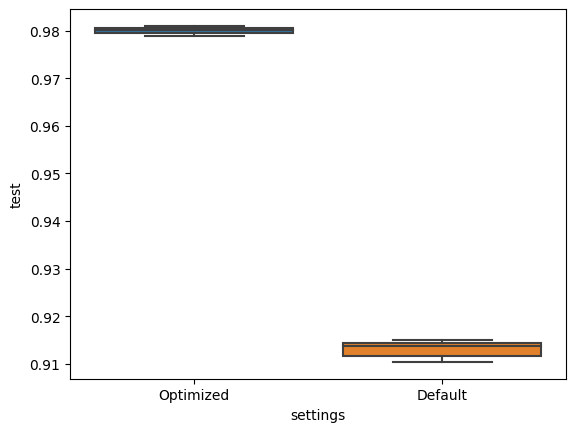

In [36]:

rep = 5
for _ in range(rep):
   
    loss_noise = 0.74304649
    activation_noise = 0.02883355
    input_noise = 0.30363384
    gradient_noise =  0.30922167
    weight_noise = 0.
    gradient_dropout = 0.
    dropout = 0. 
    drop_connect = 0.
    batch_size = 1024
    double_batch_on = 65
    drnn = 0.
    weight_std = 0.1488505
    verbose = 0
    epochs = 100
    patience = np.inf
    save_best = False
    sleep = 0
    cut_threshold = 0.12
    max_batch = len(nn.dataset.X_train)



    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
                  drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, patience, verbose=verbose,
                  max_batch=max_batch, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)

    nn.create_model()
    nn.fit()
    
    
    row = ['Optimized', nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    loss_noise = 0.0
    activation_noise = 0.0
    input_noise = 0.0
    gradient_noise = 0.0
    weight_noise = 0.0
    gradient_dropout = .0
    dropout = 0.0
    drop_connect = 0.0
    batch_size = len(nn.dataset.X_train)
    double_batch_on = np.inf
    drnn = 0.0
    weight_std = 0.1

    verbose = 0

    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
                  drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, patience, verbose=verbose,
                  max_batch=max_batch, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)

    nn.create_model()
    nn.fit()
    
    row = ['Default', nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    #sns.boxplot(x='settings', y='validation', data=exp_df)
    #plt.show()
    
   
    sns.boxplot(x='settings', y='test', data=exp_df)
    plt.show()
    
    

    

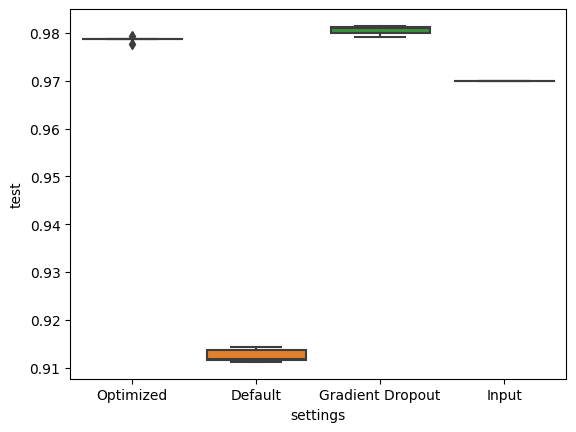

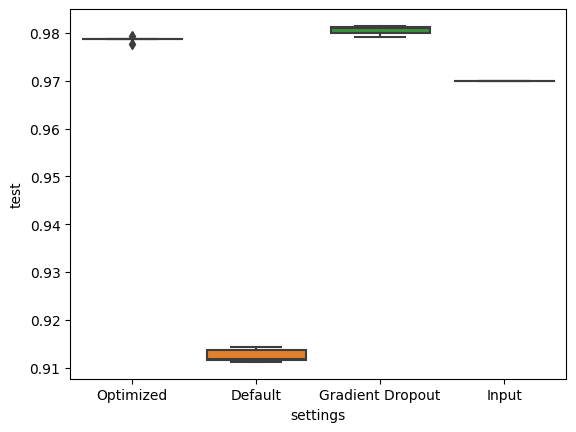

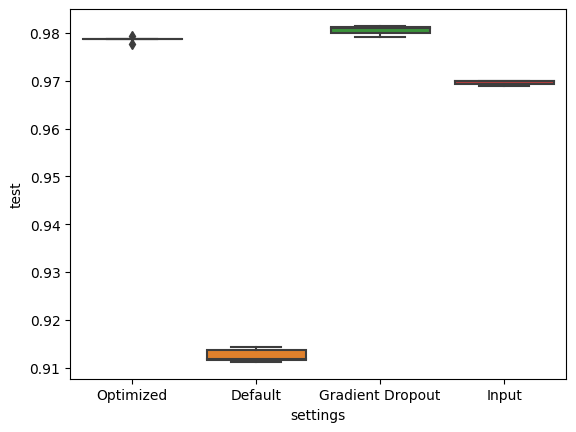

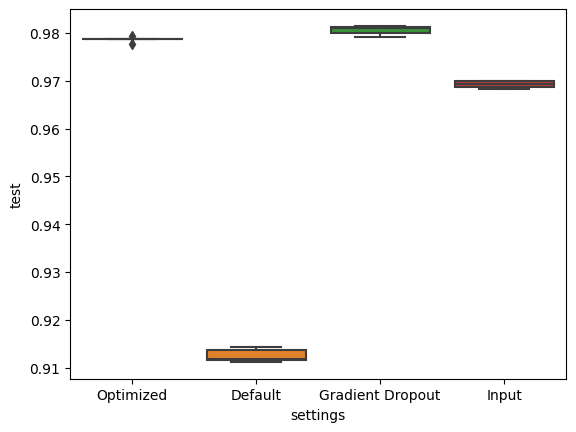

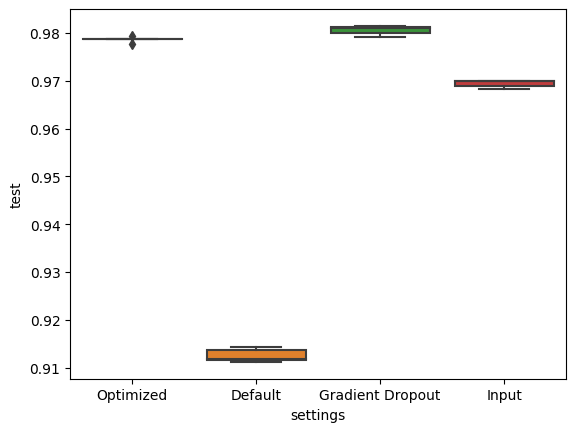

In [26]:
rep = 5
for _ in range(rep):
    loss_noise = 0.74304649
    activation_noise = 0.02883355
    input_noise = 0.30363384
    gradient_noise =  0.30922167
    weight_noise = 0.
    gradient_dropout = 0.
    dropout = 0. 
    drop_connect = 0.
    batch_size = 1024
    double_batch_on = 65
    drnn = 0.
    weight_std = 0.1488505
    verbose = 0
    epochs = 100
    patience = np.inf
    save_best = False
    sleep = 0
    cut_threshold = 0.12
    max_batch = len(nn.dataset.X_train)



    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
                  drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, patience, verbose=verbose,
                  max_batch=max_batch, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)

    nn.create_model()
    nn.fit()
    
    row = ['Input', nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    
    #sns.boxplot(x='settings', y='validation', data=exp_df)
    #plt.ylim(.95, 1.)

    #plt.show()


    sns.boxplot(x='settings', y='test', data=exp_df)
    #plt.ylim(.95, 1.)

    plt.show()

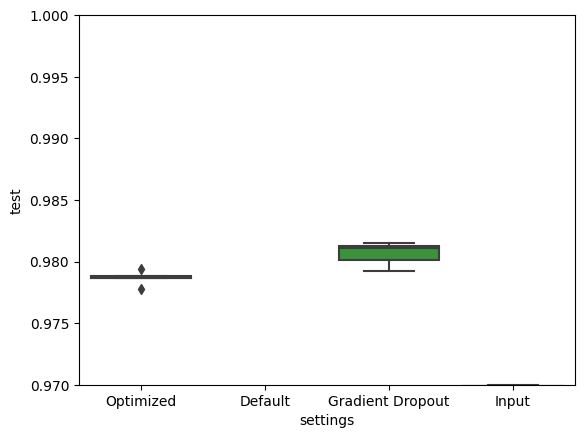

In [27]:
#sns.boxplot(x='settings', y='validation', data=exp_df)
#plt.ylim(.7, 1.)
#plt.show()


sns.boxplot(x='settings', y='test', data=exp_df)
plt.ylim(.97, 1.)
plt.show()

In [20]:
exp_df.to_excel('mnist-fc2x50-aug.xlsx', index=False)

In [40]:
exp_df = pd.read_excel('mnist-fc2x50-aug.xlsx')

In [41]:
exp_df = exp_df[exp_df['method'] == 'Optimized']
#exp_df = exp_df[exp_df['init'] == 0.0]
exp_df

method      loss  activation     input  gradient noise    weight  \
5   Optimized  0.000000    0.027970  0.013146        0.499289  0.000000   
6   Optimized  0.000000    0.027970  0.013146        0.499289  0.000000   
7   Optimized  0.000000    0.027970  0.013146        0.499289  0.000000   
8   Optimized  0.000000    0.027970  0.013146        0.499289  0.000000   
9   Optimized  0.000000    0.027970  0.013146        0.499289  0.000000   
10  Optimized  0.360172    0.016204  0.237905        0.368690  0.000000   
11  Optimized  0.360172    0.016204  0.237905        0.368690  0.000000   
12  Optimized  0.360172    0.016204  0.237905        0.368690  0.000000   
13  Optimized  0.360172    0.016204  0.237905        0.368690  0.000000   
14  Optimized  0.360172    0.016204  0.237905        0.368690  0.000000   
15  Optimized  0.086445    0.018303  0.115986        0.158536  0.000000   
16  Optimized  0.086445    0.018303  0.115986        0.158536  0.000000   
17  Optimized  0.086445    0.018303  0.115986        0.158536  0.000000   
18  Optimized  0.086445    0.018303  0.115986        0.158536  0.000000   
19  Optimized  0.086445    0.018303  0.115986        0.158536  0.000000   
20  Optimized  0.028193    0.057624  0.000000        0.244689  0.000099   
21  Optimized  0.028193    0.057624  0.000000        0.244689  0.000099   
22  Optimized  0.028193    0.057624  0.000000        0.244689  0.000099   
23  Optimized  0.028193    0.057624  0.000000        0.244689  0.000099   
24  Optimized  0.028193    0.057624  0.000000        0.244689  0.000099   
25  Optimized  0.000000    0.000000  0.261131        0.000000  0.000000   
26  Optimized  0.000000    0.000000  0.261131        0.000000  0.000000   
27  Optimized  0.000000    0.000000  0.261131        0.000000  0.000000   
28  Optimized  0.000000    0.000000  0.261131        0.000000  0.000000   
29  Optimized  0.000000    0.000000  0.261131        0.000000  0.000000   

    gradient dropout   dropout  dropconnect       batch  increase batch  \
5           0.167311  0.000000     0.034399  155.288984        0.630380   
6           0.167311  0.000000     0.034399  155.288984        0.630380   
7           0.167311  0.000000     0.034399  155.288984        0.630380   
8           0.167311  0.000000     0.034399  155.288984        0.630380   
9           0.167311  0.000000     0.034399  155.288984        0.630380   
10          0.218943  0.007908     0.000000   25.171285        0.528405   
11          0.218943  0.007908     0.000000   25.171285        0.528405   
12          0.218943  0.007908     0.000000   25.171285        0.528405   
13          0.218943  0.007908     0.000000   25.171285        0.528405   
14          0.218943  0.007908     0.000000   25.171285        0.528405   
15          0.000000  0.010394     0.022625  219.049417        0.286934   
16          0.000000  0.010394     0.022625  219.049417        0.286934   
17          0.000000  0.010394     0.022625  219.049417        0.286934   
18          0.000000  0.010394     0.022625  219.049417        0.286934   
19          0.000000  0.010394     0.022625  219.049417        0.286934   
20          0.136174  0.000000     0.013791   62.972019        0.205778   
21          0.136174  0.000000     0.013791   62.972019        0.205778   
22          0.136174  0.000000     0.013791   62.972019        0.205778   
23          0.136174  0.000000     0.013791   62.972019        0.205778   
24          0.136174  0.000000     0.013791   62.972019        0.205778   
25          0.222850  0.000000     0.000000   16.000000        0.261858   
26          0.222850  0.000000     0.000000   16.000000        0.261858   
27          0.222850  0.000000     0.000000   16.000000        0.261858   
28          0.222850  0.000000     0.000000   16.000000        0.261858   
29          0.222850  0.000000     0.000000   16.000000        0.261858   

        drnn      init  label smoothing      flip  rotation      zoom  \
5   0.017503  0.021202         0

In [6]:
exp_df = exp_df.loc[:-4]

In [11]:
import GPUtil

gpu_temp = GPUtil.showUtilization()
print(gpu_temp)


| ID | GPU | MEM |
------------------
|  0 |  6% | 90% |
None


In [18]:
import os

start = time.time()
temp = os.popen("nvidia-smi --query-gpu=temperature.gpu --format=csv,noheader").read()
print(temp)
print(time.time()-start)


36

0.04717373847961426


In [10]:
int(temp)

34

In [7]:
import GPUtil

def get_gpu_utilization():
    gpu = GPUtil.getGPUs()[0]
    return gpu.load

In [8]:
get_gpu_utilization()

0.03

In [11]:
type(GPUtil.getGPUs()[0].load)

float

In [37]:
y_true = tf.constant([[1.0, 0.0], [0.0, 1.0]])
y_pred = tf.constant([[0.9, 0.1], [0.5, 0.5]])

nn.loss_fn(y_true, y_pred)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.02297003, 0.61075664], dtype=float32)>

In [39]:
l = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
l + tf.random.normal(tf.shape(l), 0.0, 0.1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.11953739, 0.6605057 ], dtype=float32)>

In [40]:
l

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.10536055, 0.6931472 ], dtype=float32)>

In [48]:
tf.random.normal(tf.shape(l), 1.0, 0.1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0274761 , 0.94532096], dtype=float32)>

loss                 0.867344
activation           0.100000
input                0.219901
gradient noise       0.167953
weight               0.000000
gradient dropout     0.000000
dropout              0.044673
dropconnect          0.000000
batch               16.000000
increase batch       0.252731
drnn                 0.000000
init                 0.000000
label smoothing      0.000000
test                 0.975900
Name: 445, dtype: float32
6

loss_noise: 0.8673439621925354 , activation_noise: 0.10000000149011612 , input_noise: 0.21990138292312622 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.167952761054039 , batch_size: 16 , dropout: 0.044673170894384384 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8119
Validation acc: 0.9336
Time taken: 6.02s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9143
Validation acc: 0.9493
Time taken: 5.93s
Patience:  1

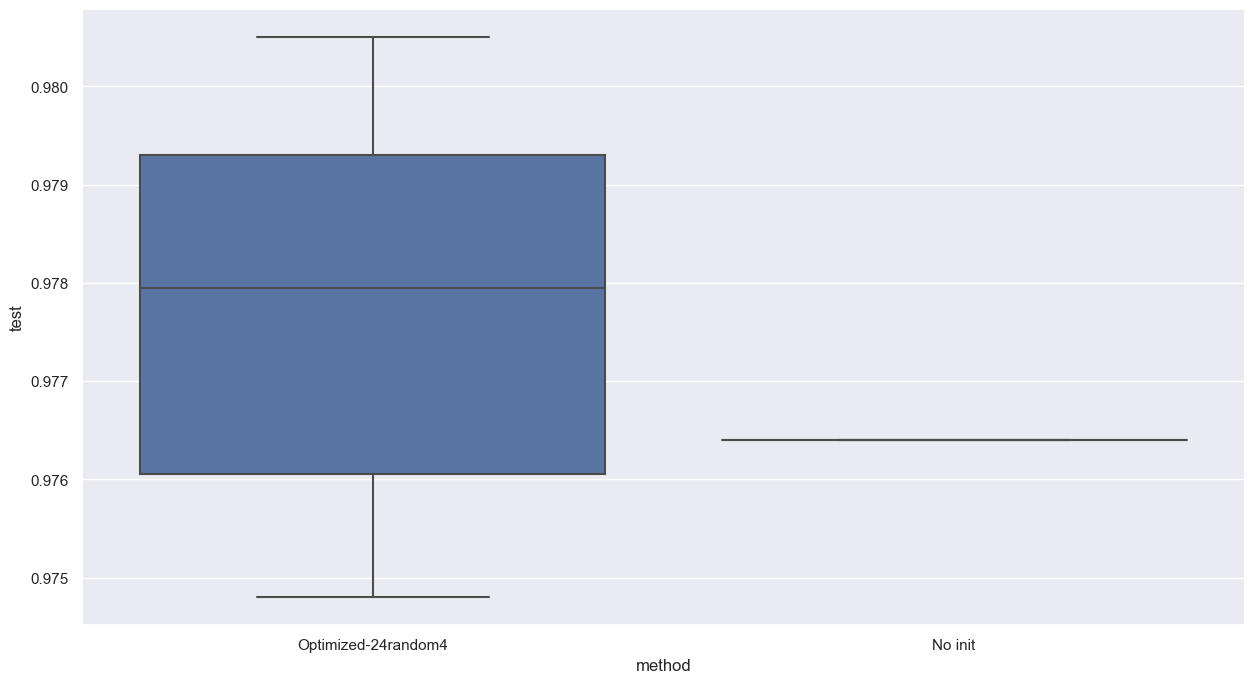

loss                 0.867344
activation           0.100000
input                0.219901
gradient noise       0.167953
weight               0.000000
gradient dropout     0.000000
dropout              0.044673
dropconnect          0.000000
batch               16.000000
increase batch       0.252731
drnn                 0.000000
init                 0.000000
label smoothing      0.000000
test                 0.976200
Name: 446, dtype: float32
6

loss_noise: 0.8673439621925354 , activation_noise: 0.10000000149011612 , input_noise: 0.21990138292312622 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.167952761054039 , batch_size: 16 , dropout: 0.044673170894384384 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8408
Validation acc: 0.9287
Time taken: 5.92s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9170
Validation acc: 0.9498
Time taken: 5.71s
Patience:  1

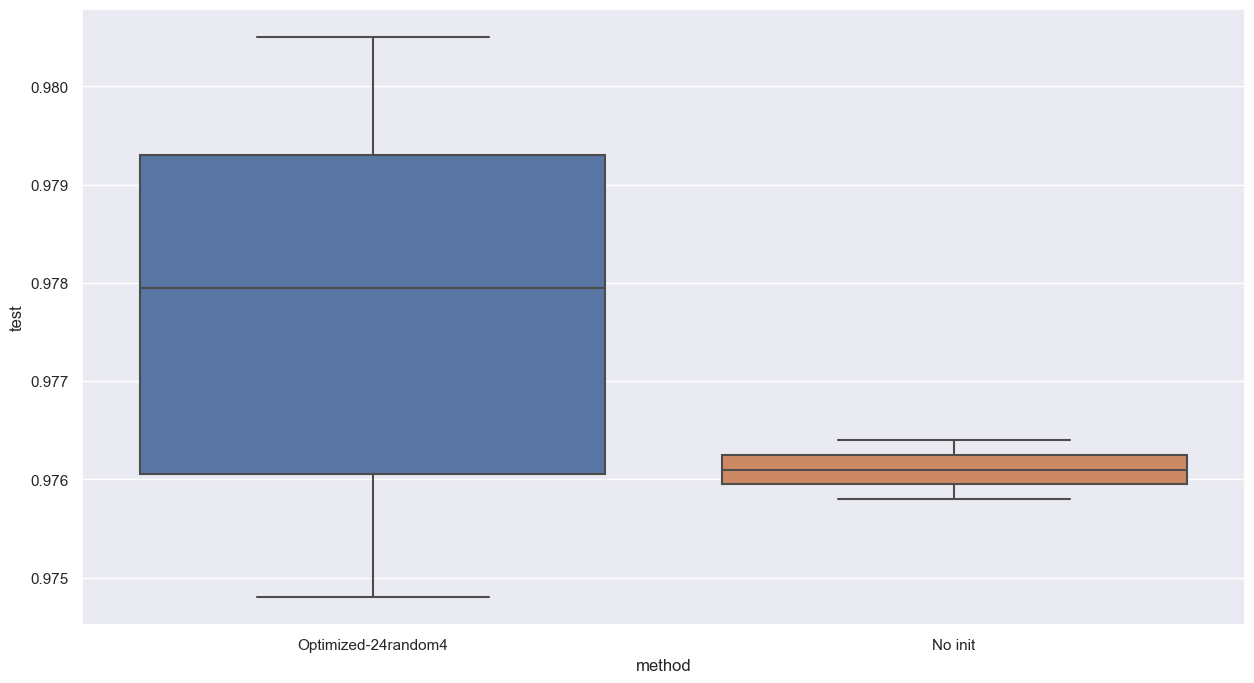

loss                 0.867344
activation           0.100000
input                0.219901
gradient noise       0.167953
weight               0.000000
gradient dropout     0.000000
dropout              0.044673
dropconnect          0.000000
batch               16.000000
increase batch       0.252731
drnn                 0.000000
init                 0.000000
label smoothing      0.000000
test                 0.976900
Name: 447, dtype: float32
6

loss_noise: 0.8673439621925354 , activation_noise: 0.10000000149011612 , input_noise: 0.21990138292312622 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.167952761054039 , batch_size: 16 , dropout: 0.044673170894384384 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8370
Validation acc: 0.9231
Time taken: 5.75s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9132
Validation acc: 0.9510
Time taken: 5.70s
Patience:  1

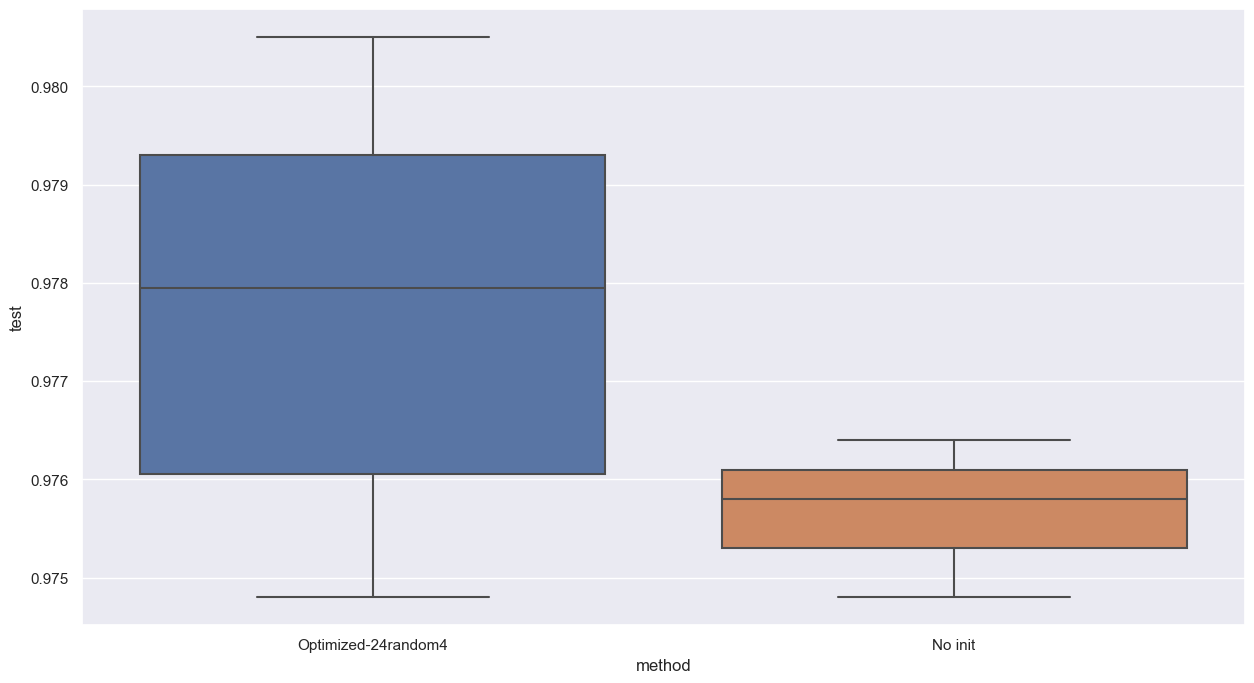

loss                 0.867344
activation           0.100000
input                0.219901
gradient noise       0.167953
weight               0.000000
gradient dropout     0.000000
dropout              0.044673
dropconnect          0.000000
batch               16.000000
increase batch       0.252731
drnn                 0.000000
init                 0.000000
label smoothing      0.000000
test                 0.974800
Name: 448, dtype: float32
6

loss_noise: 0.8673439621925354 , activation_noise: 0.10000000149011612 , input_noise: 0.21990138292312622 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.167952761054039 , batch_size: 16 , dropout: 0.044673170894384384 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8351
Validation acc: 0.9319
Time taken: 6.14s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9145
Validation acc: 0.9498
Time taken: 6.03s
Patience:  1

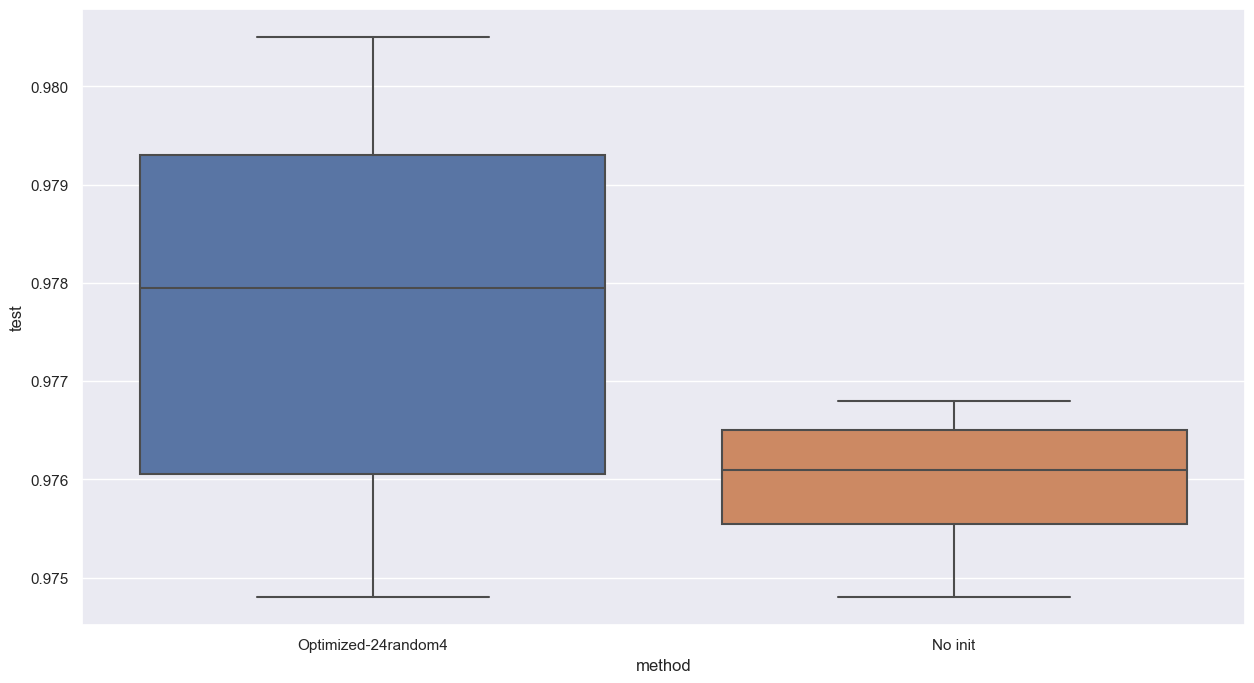

loss                 0.867344
activation           0.100000
input                0.219901
gradient noise       0.167953
weight               0.000000
gradient dropout     0.000000
dropout              0.044673
dropconnect          0.000000
batch               16.000000
increase batch       0.252731
drnn                 0.000000
init                 0.000000
label smoothing      0.000000
test                 0.976000
Name: 449, dtype: float32
6

loss_noise: 0.8673439621925354 , activation_noise: 0.10000000149011612 , input_noise: 0.21990138292312622 , label_smoothing: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.167952761054039 , batch_size: 16 , dropout: 0.044673170894384384 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8429
Validation acc: 0.9322
Time taken: 5.92s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9158
Validation acc: 0.9521
Time taken: 6.25s
Patience:  1

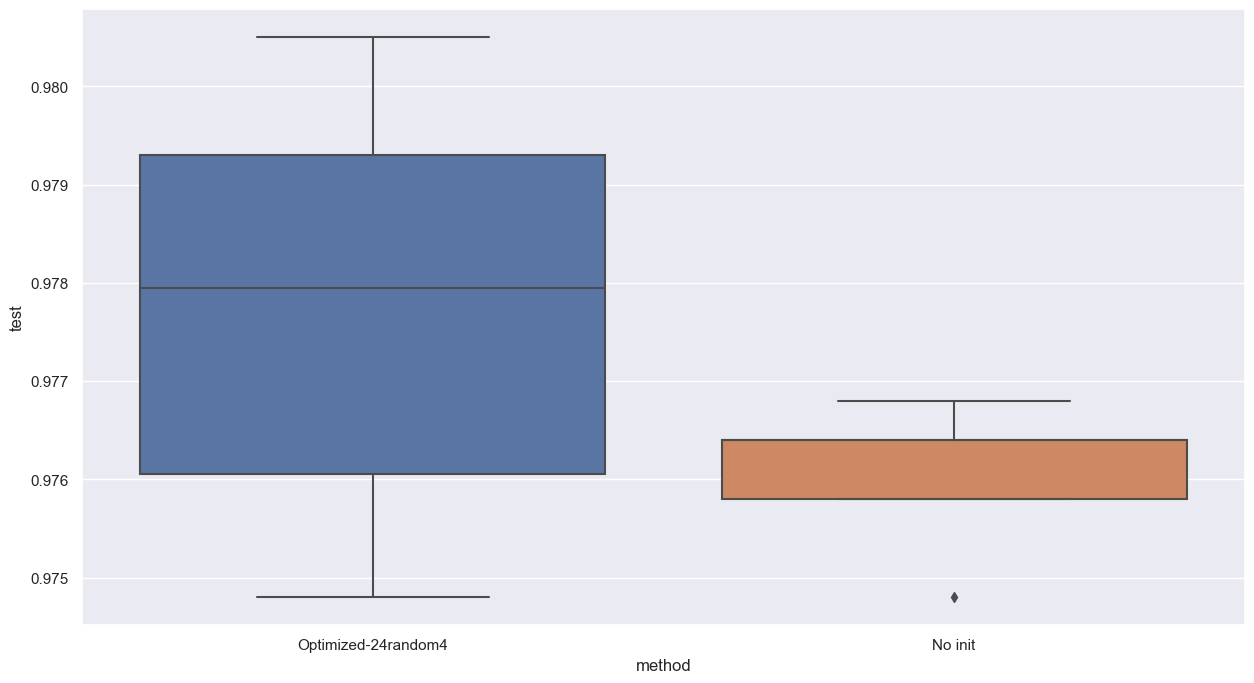

loss                 0.308065
activation           0.025222
input                0.144778
gradient noise       0.526449
weight               0.000000
gradient dropout     0.000000
dropout              0.000000
dropconnect          0.000000
batch               16.000000
increase batch       0.056573
drnn                 0.000000
init                 0.000000
label smoothing      0.010963
test                 0.979000
Name: 450, dtype: float32
2

loss_noise: 0.308065265417099 , activation_noise: 0.025221992284059525 , input_noise: 0.14477795362472534 , label_smoothing: 0.010962903499603271 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5264491438865662 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8618
Validation acc: 0.9353
Time taken: 5.68s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9378
Validation acc: 0.9539
Time taken: 5.73s
Patience:  

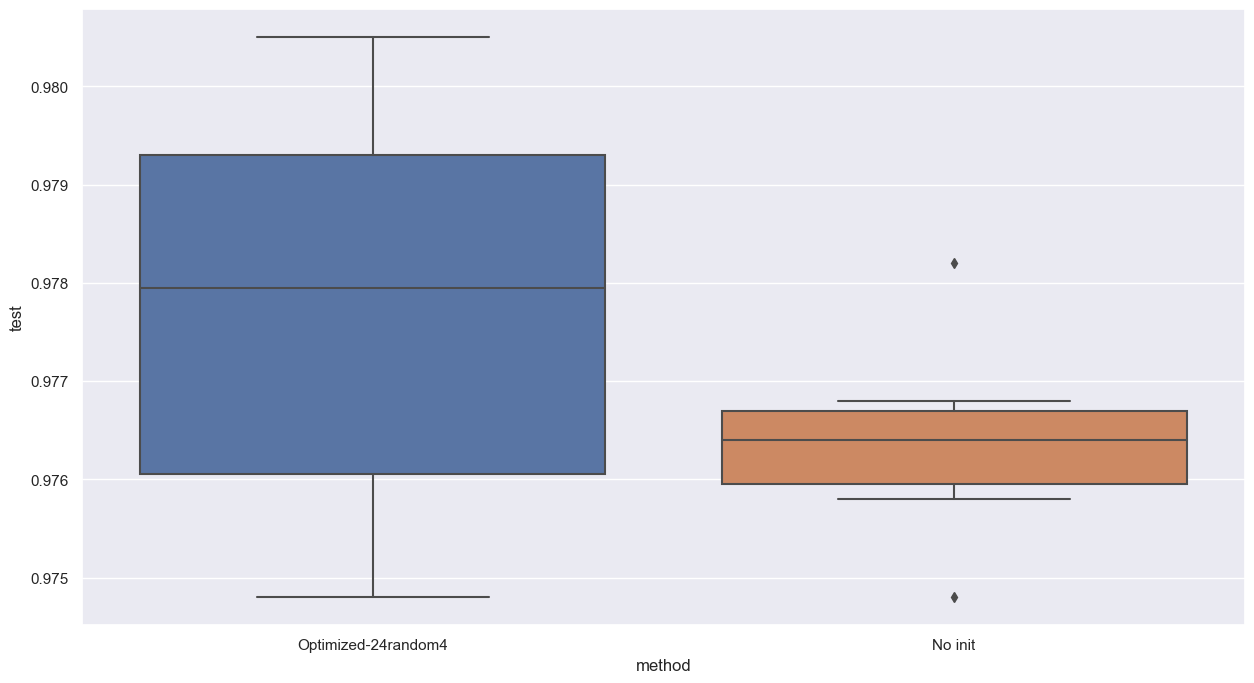

loss                 0.308065
activation           0.025222
input                0.144778
gradient noise       0.526449
weight               0.000000
gradient dropout     0.000000
dropout              0.000000
dropconnect          0.000000
batch               16.000000
increase batch       0.056573
drnn                 0.000000
init                 0.000000
label smoothing      0.010963
test                 0.979000
Name: 451, dtype: float32
2

loss_noise: 0.308065265417099 , activation_noise: 0.025221992284059525 , input_noise: 0.14477795362472534 , label_smoothing: 0.010962903499603271 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5264491438865662 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8652
Validation acc: 0.9375
Time taken: 5.93s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9416
Validation acc: 0.9559
Time taken: 5.94s
Patience:  

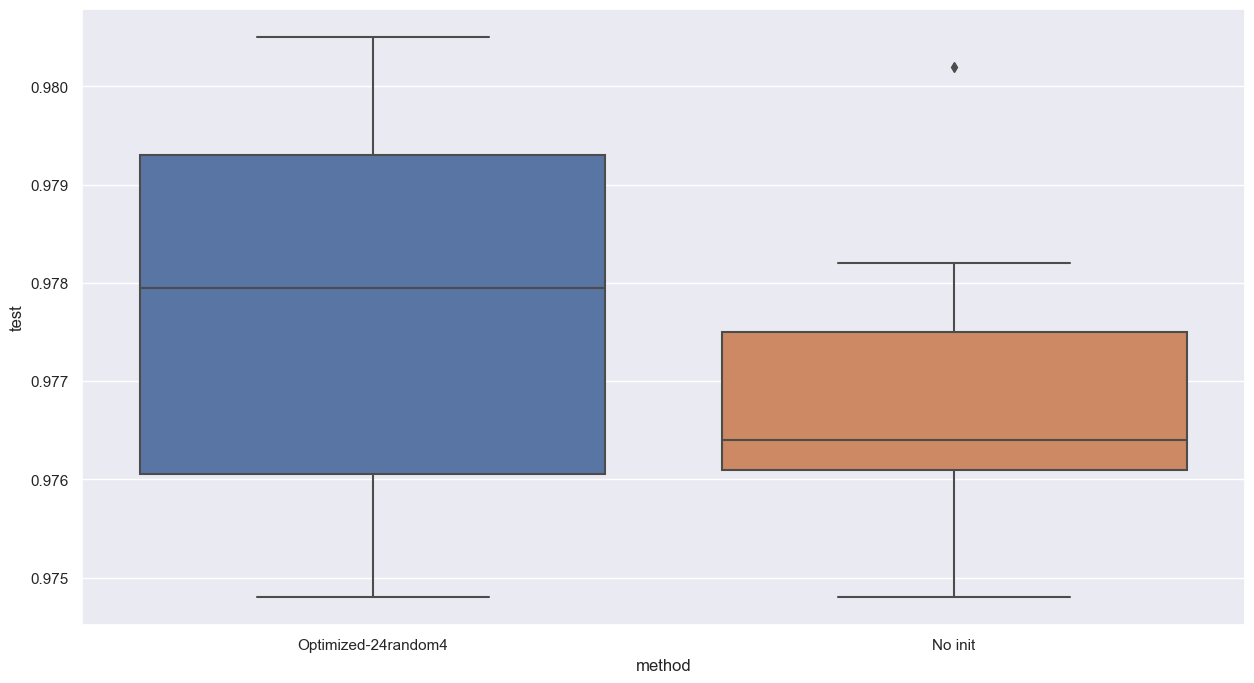

loss                 0.308065
activation           0.025222
input                0.144778
gradient noise       0.526449
weight               0.000000
gradient dropout     0.000000
dropout              0.000000
dropconnect          0.000000
batch               16.000000
increase batch       0.056573
drnn                 0.000000
init                 0.000000
label smoothing      0.010963
test                 0.979500
Name: 452, dtype: float32
2

loss_noise: 0.308065265417099 , activation_noise: 0.025221992284059525 , input_noise: 0.14477795362472534 , label_smoothing: 0.010962903499603271 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5264491438865662 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8616
Validation acc: 0.9319
Time taken: 6.11s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9423
Validation acc: 0.9532
Time taken: 6.75s
Patience:  

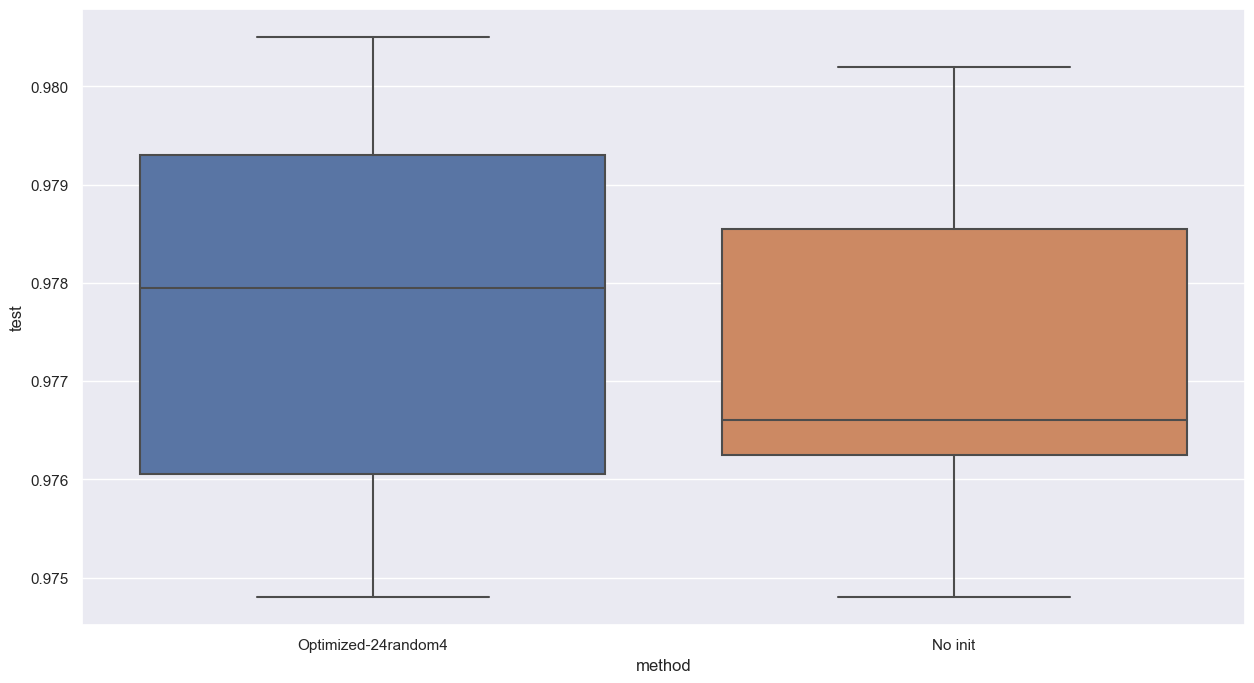

loss                 0.308065
activation           0.025222
input                0.144778
gradient noise       0.526449
weight               0.000000
gradient dropout     0.000000
dropout              0.000000
dropconnect          0.000000
batch               16.000000
increase batch       0.056573
drnn                 0.000000
init                 0.000000
label smoothing      0.010963
test                 0.980500
Name: 453, dtype: float32
2

loss_noise: 0.308065265417099 , activation_noise: 0.025221992284059525 , input_noise: 0.14477795362472534 , label_smoothing: 0.010962903499603271 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5264491438865662 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8559
Validation acc: 0.9390
Time taken: 6.83s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9395
Validation acc: 0.9594
Time taken: 6.75s
Patience:  

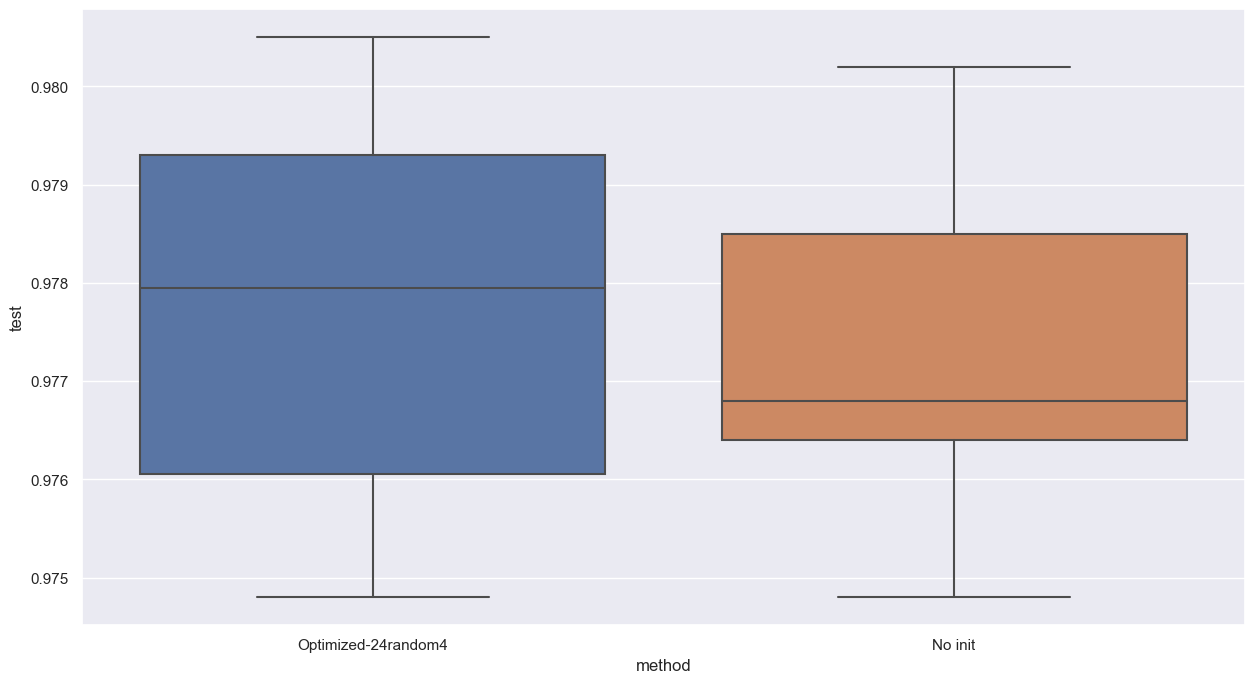

loss                 0.308065
activation           0.025222
input                0.144778
gradient noise       0.526449
weight               0.000000
gradient dropout     0.000000
dropout              0.000000
dropconnect          0.000000
batch               16.000000
increase batch       0.056573
drnn                 0.000000
init                 0.000000
label smoothing      0.010963
test                 0.979400
Name: 454, dtype: float32
2

loss_noise: 0.308065265417099 , activation_noise: 0.025221992284059525 , input_noise: 0.14477795362472534 , label_smoothing: 0.010962903499603271 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.5264491438865662 , batch_size: 16 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0.0 , weight_std: 0.05

Start of epoch 0
cuurent batch: 16
Training acc: 0.8617
Validation acc: 0.9383
Time taken: 6.93s
Patience:  1

Start of epoch 1
cuurent batch: 16
Training acc: 0.9424
Validation acc: 0.9561
Time taken: 6.76s
Patience:  

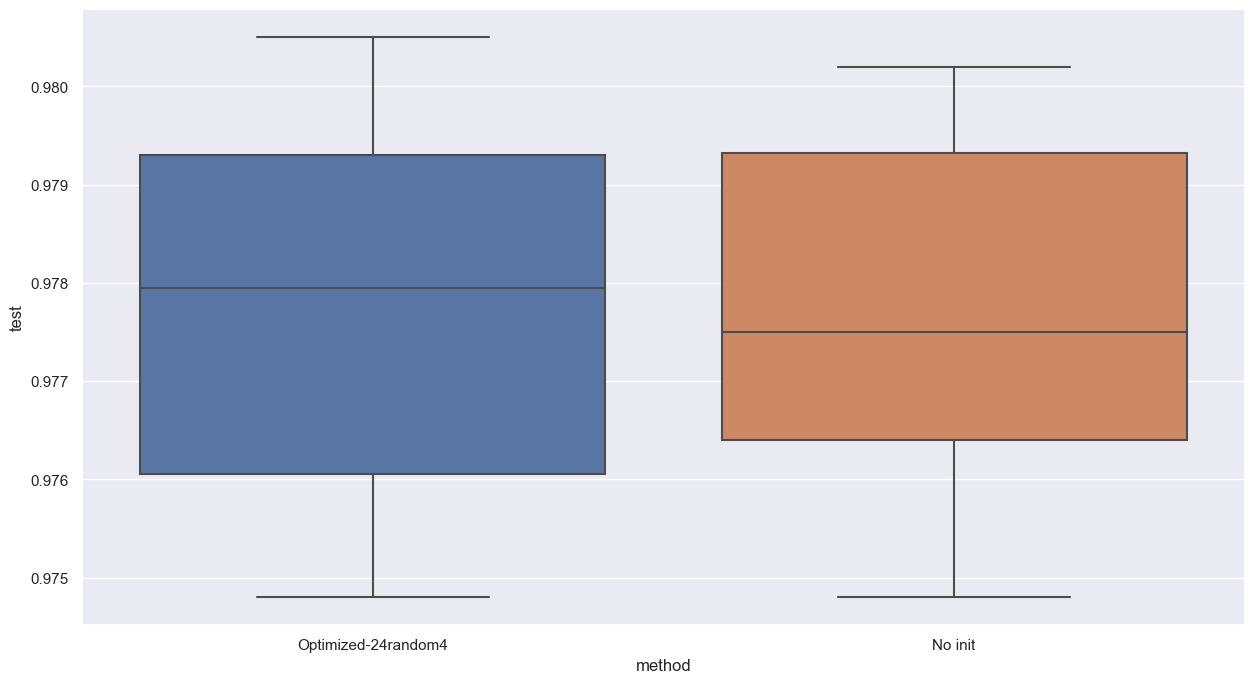

In [104]:
import copy

default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]

settings = []
for idx, row in exp_df[exp_df['method'] == 'Optimized-24random4'].iloc[:, 1:].iterrows():
        setting = row.astype(np.float32)
        print(setting)
        
        i = 11

        if (setting[i] == default_settings[i]):
            print(methods[i], setting[i])


            line = []
            line .append('No '+methods[i])
            for value in setting:
                line.append(value)


        else:
            temp_setting = copy.copy(setting)
            temp_setting[i] = default_settings[i]

            if (methods[i] == 'increase batch'):
                temp_setting[i-1] = setting[i-1]

            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No '+methods[i])
            for value in temp_setting[:-1]:
                line.append(value)
            line.append(fitness)

        exp_df.loc[len(exp_df)] = line
        sns.set(rc={'figure.figsize':(15,8)})
        sns.boxplot(x='method', y='test', data=exp_df)
        #plt.ylim(0.9, 1.0)
        plt.show()

            

In [6]:
import tensorflow as tf

In [21]:
exp_df

method  loss  activation     input  gradient noise  weight  \
0           default   0.0         0.0  0.000000             0.0     0.0   
1           default   0.0         0.0  0.000000             0.0     0.0   
2           default   0.0         0.0  0.000000             0.0     0.0   
3           default   0.0         0.0  0.000000             0.0     0.0   
4           default   0.0         0.0  0.000000             0.0     0.0   
..              ...   ...         ...       ...             ...     ...   
475         No flip   0.0         0.0  0.261131             0.0     0.0   
476     No rotation   0.0         0.0  0.261131             0.0     0.0   
477         No zoom   0.0         0.0  0.261131             0.0     0.0   
478  No translation   0.0         0.0  0.261131             0.0     0.0   
479     No contrast   0.0         0.0  0.261131             0.0     0.0   

     gradient dropout  dropout  dropconnect  batch  increase batch      drnn  \
0             0.00000      0.0          0.0   32.0        1.000000  0.000000   
1             0.00000      0.0          0.0   32.0        1.000000  0.000000   
2             0.00000      0.0          0.0   32.0        1.000000  0.000000   
3             0.00000      0.0          0.0   32.0        1.000000  0.000000   
4             0.00000      0.0          0.0   32.0        1.000000  0.000000   
..                ...      ...          ...    ...             ...       ...   
475           0.22285      0.0          0.0   16.0        0.261858  0.051063   
476           0.22285      0.0          0.0   16.0        0.261858  0.051063   
477           0.22285      0.0          0.0   16.0        0.261858  0.051063   
478           0.22285      0.0          0.0   16.0        0.261858  0.051063   
479           0.22285      0.0          0.0   16.0        0.261858  0.051063   

         init  label smoothing      flip  rotation  zoom  translation  \
0    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
1    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
2    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
3    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
4    0.050000              0.0  0.000000  0.000000   0.0     0.000000   
..        ...              ...       ...       ...   ...          ...   
475  0.023819              0.0  0.000000  0.154241   0.0     0.358419   
476  0.023819              0.0  2.055565  0.000000   0.0     0.358419   
477  0.023819              0.0  2.055565  0.154241   0.0     0.358419   
478  0.023819              0.0  2.055565  0.154241   0.0     0.000000   
479  0.023819              0.0  2.055565  0.154241   0.0     0.358419   

     contrast    test  
0    0.000000  0.9719  
1    0.000000  0.9712  
2    0.000000  0.9688  
3    0.000000  0.9735  
4    0.000000  0.9717  
..        ...     ...  
475  0.394561  0.9801  
476  0.394561  0.9827  
477  0.394561  0.9808  
478  0.394561  0.9812  
479  0.000000  0.9798  

[480 rows x 20 columns]